In [1]:
import numpy as np
import pandas as pd

In [9]:
games_table = pd.read_csv('games.csv')

In [10]:
games_table

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [78]:
games_table.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [223]:
objectives = []
for o in ["firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald"]:
    column = games_table[o].to_numpy()
    games_table['t1_'+o] = (column == 1).astype(np.int32)
    games_table['t2_'+o] = (column == 2).astype(np.int32)
    objectives.append('t1_'+o)
    objectives.append('t2_'+o)
objectives += ["t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills']

In [224]:
games_table

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_firstTower,t2_firstTower,t1_firstInhibitor,t2_firstInhibitor,t1_firstBaron,t2_firstBaron,t1_firstDragon,t2_firstDragon,t1_firstRiftHerald,t2_firstRiftHerald
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,1,0,1,0,1,0,1,0,0,1
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,1,0,1,0,0,0,1,0,1,0
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,1,0,1,0,1,0,0,1,0,0
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,1,0,1,0,1,0,1,0,0,0
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,0,1,0,1,0,0,0,1,0,0
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,1,0,0,1,0,1,0,1,0,1
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,0,1,0,1,0,0,1,0,0,0
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,0,1,0,1,0,0,0,1,0,0


In [225]:
winner_table = games_table[["winner"]]

In [226]:
winner_table

,winner
0,1
1,1
2,1
3,1
4,1
...,...
51485,2
51486,2
51487,2
51488,2


In [227]:
winner_array = winner_table.to_numpy()

In [228]:
winner_array

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [1]])

In [229]:
winner_array_binary = winner_array - 1

In [230]:
winner_array_binary

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [231]:
objectives_table = games_table[objectives]

In [247]:
len(objectives)

20

In [232]:
objectives_table

,t1_firstBlood,t2_firstBlood,t1_firstTower,t2_firstTower,t1_firstInhibitor,t2_firstInhibitor,t1_firstBaron,t2_firstBaron,t1_firstDragon,t2_firstDragon,t1_firstRiftHerald,t2_firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,0,1,1,0,1,0,1,0,1,0,0,1,11,1,2,3,5,0,0,1
1,1,0,1,0,1,0,0,0,1,0,1,0,10,4,0,2,2,0,0,0
2,0,1,1,0,1,0,1,0,0,1,0,0,8,1,1,1,2,0,0,1
3,1,0,1,0,1,0,1,0,1,0,0,0,9,2,1,2,0,0,0,0
4,0,1,1,0,1,0,1,0,1,0,0,0,9,2,1,3,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1,0,0,1,0,1,0,0,0,1,0,0,2,0,0,0,10,2,0,4
51486,1,0,1,0,0,1,0,1,0,1,0,1,5,4,0,2,11,7,4,4
51487,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,10,2,0,2
51488,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,11,3,0,1


In [250]:
objectives_array = objectives_table.to_numpy()

In [251]:
objectives_array.shape

(51490, 20)

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [254]:
acc_min = 1.0
i_min = 0
for i in range(10000):
    print(str(i))
    X_train, X_test, y_train, y_test = train_test_split(objectives_array,winner_array_binary,test_size=0.999, random_state=i)
    model = LogisticRegression(penalty='none')
    model.fit(X_train,y_train)
    preds_train = model.predict(X_train)
    acc_train = (preds_train == np.squeeze(y_train)).mean()
    print('Acc_train: '+str(acc_train))
    preds_test = model.predict(X_test)
    acc_test = (preds_test == np.squeeze(y_test)).mean()
    print('Acc_test: '+str(acc_test))
    if acc_test < acc_min:
        i_min = i
        acc_min = acc_test

0
Acc_train: 1.0
Acc_test: 0.953187270359066
1
Acc_train: 1.0
Acc_test: 0.9149283617488676
2
Acc_train: 1.0
Acc_test: 0.947257917144579
3
Acc_train: 1.0
Acc_test: 0.9557534166682867
4
Acc_train: 1.0
Acc_test: 0.9308695736697836
5
Acc_train: 1.0
Acc_test: 0.9528373413168997
6
Acc_train: 1.0
Acc_test: 0.9570753708275822
7
Acc_train: 1.0
Acc_test: 0.9472384766422365
8
Acc_train: 1.0
Acc_test: 0.9516903516786874
9
Acc_train: 1.0
Acc_test: 0.9569198468088416
10


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9260677695911662
11
Acc_train: 1.0
Acc_test: 0.9555978926495461
12
Acc_train: 1.0
Acc_test: 0.9411535994090088
13
Acc_train: 1.0
Acc_test: 0.9482105017593655
14
Acc_train: 1.0
Acc_test: 0.93724605843815
15
Acc_train: 1.0
Acc_test: 0.9507572075662435
16
Acc_train: 1.0
Acc_test: 0.9427282800987578
17
Acc_train: 0.9803921568627451
Acc_test: 0.9388207391278991
18
Acc_train: 1.0
Acc_test: 0.9199051303485682
19
Acc_train: 1.0
Acc_test: 0.9260483290888236
20
Acc_train: 1.0
Acc_test: 0.9523318882559926
21
Acc_train: 1.0
Acc_test: 0.9553451661190925
22
Acc_train: 1.0
Acc_test: 0.9507766480685861
23


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9470440716188107
24
Acc_train: 1.0
Acc_test: 0.9569587278135268
25
Acc_train: 0.9803921568627451
Acc_test: 0.949435253406948
26
Acc_train: 1.0
Acc_test: 0.9532067108614086
27
Acc_train: 1.0
Acc_test: 0.9557339761659441
28
Acc_train: 0.9803921568627451
Acc_test: 0.953284472870779
29
Acc_train: 1.0
Acc_test: 0.9579696339353408
30
Acc_train: 1.0
Acc_test: 0.9258539240653979
31
Acc_train: 1.0
Acc_test: 0.9521763642372519
32
Acc_train: 1.0
Acc_test: 0.9403954198176481
33
Acc_train: 1.0
Acc_test: 0.9453333074126635
34
Acc_train: 1.0
Acc_test: 0.9432337331596649
35
Acc_train: 1.0
Acc_test: 0.9417562549816287
36


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9409008728785552
37
Acc_train: 1.0
Acc_test: 0.9518069946927429
38
Acc_train: 1.0
Acc_test: 0.9412508019207216
39
Acc_train: 0.9803921568627451
Acc_test: 0.9568420847994712
40
Acc_train: 1.0
Acc_test: 0.948327144773421
41
Acc_train: 1.0
Acc_test: 0.9470246311164681
42
Acc_train: 1.0
Acc_test: 0.939190108672408
43
Acc_train: 1.0
Acc_test: 0.9479383347265693
44
Acc_train: 1.0
Acc_test: 0.9583973249868777
45
Acc_train: 1.0
Acc_test: 0.9562588697291938
46
Acc_train: 1.0
Acc_test: 0.9442251987791365
47
Acc_train: 1.0

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.


Acc_test: 0.9153754933027469
48
Acc_train: 1.0
Acc_test: 0.9518264351950855
49
Acc_train: 0.9803921568627451
Acc_test: 0.9538482474387138
50
Acc_train: 1.0
Acc_test: 0.932891385913412
51
Acc_train: 1.0
Acc_test: 0.9514376251482338
52
Acc_train: 1.0
Acc_test: 0.9328136239040417
53
Acc_train: 1.0
Acc_test: 0.9467135830789868
54
Acc_train: 1.0
Acc_test: 0.953148389354381
55
Acc_train: 1.0
Acc_test: 0.9415035284511751
56
Acc_train: 1.0
Acc_test: 0.9466747020743016
57
Acc_train: 1.0
Acc_test: 0.9575419428838041
58


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9056746826337992
59
Acc_train: 1.0
Acc_test: 0.9532261513637512
60
Acc_train: 1.0
Acc_test: 0.9278174148019985
61
Acc_train: 1.0
Acc_test: 0.9473551196562919
62
Acc_train: 1.0
Acc_test: 0.9509516125896693
63
Acc_train: 1.0
Acc_test: 0.9483660257781061
64
Acc_train: 0.9803921568627451
Acc_test: 0.932755302397014
65
Acc_train: 1.0
Acc_test: 0.9375182254709462
66
Acc_train: 1.0
Acc_test: 0.9470440716188107
67
Acc_train: 1.0
Acc_test: 0.9379264760201403
68
Acc_train: 1.0
Acc_test: 0.931452788740061
69


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9495518964210036
70
Acc_train: 1.0
Acc_test: 0.9502128735006513
71
Acc_train: 1.0
Acc_test: 0.9338050895235133
72
Acc_train: 1.0
Acc_test: 0.9269231516942398
73
Acc_train: 1.0
Acc_test: 0.9479577752289119
74
Acc_train: 1.0
Acc_test: 0.9529734248332977
75
Acc_train: 1.0
Acc_test: 0.9547619510488151
76
Acc_train: 1.0
Acc_test: 0.9443807227978771
77
Acc_train: 1.0
Acc_test: 0.9497268609420867
78
Acc_train: 1.0
Acc_test: 0.9479188942242267
79
Acc_train: 1.0
Acc_test: 0.9483854662804487
80


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.923482182779603
81
Acc_train: 1.0
Acc_test: 0.9459359629852835
82
Acc_train: 1.0
Acc_test: 0.9375376659732888
83
Acc_train: 1.0
Acc_test: 0.9537510449270009
84
Acc_train: 1.0
Acc_test: 0.9337467680164856
85
Acc_train: 1.0
Acc_test: 0.9499212659655125
86
Acc_train: 1.0
Acc_test: 0.9520597212231964
87
Acc_train: 1.0
Acc_test: 0.9444196038025623
88
Acc_train: 1.0
Acc_test: 0.9462664515251074
89
Acc_train: 1.0
Acc_test: 0.951340422636521
90
Acc_train: 1.0
Acc_test: 0.9474523221680048
91


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9455860339431171
92
Acc_train: 1.0
Acc_test: 0.9518264351950855
93
Acc_train: 1.0
Acc_test: 0.9283811893699333
94
Acc_train: 1.0
Acc_test: 0.9534788778942048
95
Acc_train: 1.0
Acc_test: 0.9478216917125138
96
Acc_train: 1.0
Acc_test: 0.9548008320535003
97
Acc_train: 0.9803921568627451
Acc_test: 0.9435642216994887
98
Acc_train: 1.0
Acc_test: 0.9233072182585198
99
Acc_train: 1.0
Acc_test: 0.9376348684850017
100
Acc_train: 1.0
Acc_test: 0.9485409902991894
101
Acc_train: 1.0
Acc_test: 0.9199634518555959
102


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9330274694298101
103
Acc_train: 1.0
Acc_test: 0.9359435447811971
104
Acc_train: 1.0
Acc_test: 0.911526273838916
105
Acc_train: 1.0
Acc_test: 0.9473162386516067
106
Acc_train: 1.0
Acc_test: 0.9215575730476876
107
Acc_train: 1.0
Acc_test: 0.95050448103579
108
Acc_train: 1.0
Acc_test: 0.9475884056844028
109
Acc_train: 1.0
Acc_test: 0.9046248955072999
110
Acc_train: 0.9803921568627451
Acc_test: 0.9506600050545306
111
Acc_train: 1.0
Acc_test: 0.9451194618868951
112
Acc_train: 0.9803921568627451
Acc_test: 0.9342133400727075
113


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9552674041097222
114
Acc_train: 1.0
Acc_test: 0.937109974921752
115
Acc_train: 1.0
Acc_test: 0.9230544917280663
116
Acc_train: 1.0
Acc_test: 0.9423977915589339
117
Acc_train: 1.0
Acc_test: 0.9254456735162037
118
Acc_train: 1.0
Acc_test: 0.9478216917125138
119
Acc_train: 1.0
Acc_test: 0.9507377670639009
120
Acc_train: 1.0
Acc_test: 0.953887128443399
121
Acc_train: 1.0
Acc_test: 0.9491047648671241
122
Acc_train: 1.0
Acc_test: 0.9525846147864461
123
Acc_train: 1.0
Acc_test: 0.9432531736620074
124


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9481521802523377
125
Acc_train: 1.0
Acc_test: 0.9446528898306732
126
Acc_train: 1.0
Acc_test: 0.9569392873111842
127
Acc_train: 1.0
Acc_test: 0.9316083127588017
128
Acc_train: 1.0
Acc_test: 0.9474523221680048
129
Acc_train: 1.0
Acc_test: 0.934466066603161
130
Acc_train: 1.0
Acc_test: 0.9414257664418049
131
Acc_train: 0.9803921568627451
Acc_test: 0.9334746009836894
132
Acc_train: 1.0
Acc_test: 0.9416784929722584
133
Acc_train: 1.0
Acc_test: 0.9380625595365384
134
Acc_train: 0.9803921568627451
Acc_test: 0.9173584245416901
135
Acc_train: 1.0
Acc_test: 0.952215245241937
136


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9550535585839538
137
Acc_train: 0.9803921568627451
Acc_test: 0.9571336923346099
138
Acc_train: 1.0
Acc_test: 0.9491242053694667
139
Acc_train: 1.0
Acc_test: 0.9099710336515096
140
Acc_train: 1.0
Acc_test: 0.9489298003460409
141
Acc_train: 1.0
Acc_test: 0.9534983183965474
142
Acc_train: 1.0
Acc_test: 0.9427088395964152
143
Acc_train: 0.9803921568627451
Acc_test: 0.9567448822877583
144
Acc_train: 1.0
Acc_test: 0.9388596201325842
145
Acc_train: 1.0
Acc_test: 0.9527012578005015
146
Acc_train: 1.0
Acc_test: 0.94327261416435
147
Acc_train: 1.0
Acc_test: 0.9358852232741695
148


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9336884465094578
149
Acc_train: 1.0
Acc_test: 0.9514181846458912
150
Acc_train: 1.0
Acc_test: 0.9507960885709287
151
Acc_train: 1.0
Acc_test: 0.9404343008223333
152
Acc_train: 1.0
Acc_test: 0.9465580590602461
153
Acc_train: 0.9803921568627451
Acc_test: 0.9413674449347771
154
Acc_train: 1.0
Acc_test: 0.9351076031804662
155
Acc_train: 1.0
Acc_test: 0.9490270028577539
156
Acc_train: 1.0
Acc_test: 0.9347382336359572
157
Acc_train: 1.0
Acc_test: 0.951243220124808
158
Acc_train: 1.0
Acc_test: 0.9472773576469216
159
Acc_train: 1.0
Acc_test: 0.9404343008223333
160
Acc_train: 1.0
Acc_test: 0.9252123874880926
161


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9511460176130951
162
Acc_train: 1.0
Acc_test: 0.9309084546744688
163
Acc_train: 1.0
Acc_test: 0.9545869865277319
164
Acc_train: 1.0
Acc_test: 0.942300589047221
165
Acc_train: 1.0
Acc_test: 0.9047415385213554
166
Acc_train: 1.0
Acc_test: 0.93664340286553
167
Acc_train: 1.0
Acc_test: 0.9260094480841385
168
Acc_train: 1.0
Acc_test: 0.9539065689457416
169
Acc_train: 1.0
Acc_test: 0.9393067516864636
170
Acc_train: 1.0
Acc_test: 0.9440891152627384
171
Acc_train: 1.0
Acc_test: 0.9459748439899687
172


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9504850405334474
173
Acc_train: 1.0
Acc_test: 0.9480938587453099
174
Acc_train: 1.0
Acc_test: 0.9503100760123642
175
Acc_train: 1.0
Acc_test: 0.9520208402185113
176
Acc_train: 1.0
Acc_test: 0.9387235366161861
177
Acc_train: 1.0
Acc_test: 0.949571336923346
178
Acc_train: 1.0
Acc_test: 0.9478411322148564
179
Acc_train: 1.0
Acc_test: 0.9545092245183615
180
Acc_train: 0.9803921568627451
Acc_test: 0.9500573494819106
181
Acc_train: 1.0
Acc_test: 0.9450222593751822
182
Acc_train: 1.0
Acc_test: 0.9470829526234958
183


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9421061840237952
184
Acc_train: 1.0
Acc_test: 0.9378875950154552
185
Acc_train: 1.0
Acc_test: 0.9328330644063842
186
Acc_train: 1.0
Acc_test: 0.9396372402262875
187
Acc_train: 1.0
Acc_test: 0.9387624176208713
188
Acc_train: 0.9803921568627451
Acc_test: 0.9362545928186784
189
Acc_train: 1.0
Acc_test: 0.9494741344116332
190
Acc_train: 1.0
Acc_test: 0.9424366725636191
191
Acc_train: 1.0
Acc_test: 0.8824238418320729
192
Acc_train: 1.0
Acc_test: 0.9280507008301094
193
Acc_train: 1.0
Acc_test: 0.9512043391201228
194


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9472773576469216
195
Acc_train: 1.0
Acc_test: 0.9527206983028441
196
Acc_train: 1.0
Acc_test: 0.9427477206011003
197
Acc_train: 1.0
Acc_test: 0.9355936157390307
198
Acc_train: 1.0
Acc_test: 0.9515348276599467
199
Acc_train: 1.0
Acc_test: 0.9447695328447288
200
Acc_train: 1.0
Acc_test: 0.9538093664340287
201
Acc_train: 1.0
Acc_test: 0.9494158129046054
202
Acc_train: 1.0
Acc_test: 0.9388790606349268
203
Acc_train: 1.0
Acc_test: 0.8832597834328039
204
Acc_train: 1.0
Acc_test: 0.9430004471315538
205


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9318804797915978
206
Acc_train: 1.0
Acc_test: 0.9212854060148914
207
Acc_train: 1.0
Acc_test: 0.9566087987713603
208
Acc_train: 1.0
Acc_test: 0.9501156709889383
209
Acc_train: 1.0
Acc_test: 0.9563560722409067
210
Acc_train: 1.0
Acc_test: 0.9487548358249577
211
Acc_train: 1.0
Acc_test: 0.9478022512101713
212
Acc_train: 1.0
Acc_test: 0.9494935749139758
213
Acc_train: 1.0
Acc_test: 0.9292560119753495
214
Acc_train: 1.0
Acc_test: 0.9488714788390132
215
Acc_train: 1.0
Acc_test: 0.949435253406948
216


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9359629852835397
217
Acc_train: 1.0
Acc_test: 0.949571336923346
218
Acc_train: 1.0
Acc_test: 0.955092439588639
219
Acc_train: 1.0
Acc_test: 0.944711211337701
220
Acc_train: 1.0
Acc_test: 0.9529539843309551
221
Acc_train: 1.0
Acc_test: 0.9307529306557282
222
Acc_train: 1.0
Acc_test: 0.9325414568712456
223
Acc_train: 1.0
Acc_test: 0.9413868854371197
224
Acc_train: 1.0
Acc_test: 0.9462081300180797
225
Acc_train: 0.9803921568627451
Acc_test: 0.9357296992554288
226
Acc_train: 1.0
Acc_test: 0.9530900678473532
227


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9393650731934913
228
Acc_train: 1.0
Acc_test: 0.9459942844923113
229
Acc_train: 1.0
Acc_test: 0.9529734248332977
230
Acc_train: 1.0
Acc_test: 0.9394622757052042
231
Acc_train: 1.0
Acc_test: 0.8781274908143626
232
Acc_train: 0.9803921568627451
Acc_test: 0.9538676879410564
233
Acc_train: 1.0
Acc_test: 0.94688854760007
234
Acc_train: 0.9803921568627451
Acc_test: 0.8579288088804214
235
Acc_train: 1.0
Acc_test: 0.9556367736542313
236
Acc_train: 1.0
Acc_test: 0.9376543089873443
237
Acc_train: 1.0
Acc_test: 0.9555590116448609
238


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9548785940628706
239
Acc_train: 0.9803921568627451
Acc_test: 0.9430004471315538
240
Acc_train: 1.0
Acc_test: 0.9527595793075293
241
Acc_train: 1.0
Acc_test: 0.9509321720873267
242
Acc_train: 1.0
Acc_test: 0.9489298003460409
243
Acc_train: 1.0
Acc_test: 0.9537121639223157
244
Acc_train: 1.0
Acc_test: 0.9520986022278816
245
Acc_train: 1.0
Acc_test: 0.9153171717957193
246
Acc_train: 1.0
Acc_test: 0.9482493827640506
247
Acc_train: 1.0
Acc_test: 0.9466941425766442
248
Acc_train: 1.0
Acc_test: 0.9427282800987578
249


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9553646066214351
250
Acc_train: 1.0
Acc_test: 0.9390151441513249
251
Acc_train: 1.0
Acc_test: 0.945449950426719
252
Acc_train: 1.0
Acc_test: 0.9425338750753319
253
Acc_train: 1.0
Acc_test: 0.9467135830789868
254
Acc_train: 1.0
Acc_test: 0.8774859542370574
255
Acc_train: 1.0
Acc_test: 0.9532455918660938
256
Acc_train: 0.9803921568627451
Acc_test: 0.9457221174595152
257
Acc_train: 1.0
Acc_test: 0.9524290907677054
258
Acc_train: 0.9803921568627451
Acc_test: 0.9440307937557106
259
Acc_train: 1.0
Acc_test: 0.9478411322148564
260
Acc_train: 1.0
Acc_test: 0.9327941834016991
261


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9482882637687358
262
Acc_train: 1.0
Acc_test: 0.9515153871576042
263
Acc_train: 1.0
Acc_test: 0.9554229281284629
264
Acc_train: 1.0
Acc_test: 0.9564727152549621
265
Acc_train: 1.0
Acc_test: 0.9469857501117829
266
Acc_train: 1.0
Acc_test: 0.9466747020743016
267
Acc_train: 1.0
Acc_test: 0.9469468691070977
268
Acc_train: 1.0
Acc_test: 0.9135869670872295
269
Acc_train: 0.9803921568627451
Acc_test: 0.9483465852757635
270
Acc_train: 0.9803921568627451
Acc_test: 0.946655261571959
271
Acc_train: 1.0
Acc_test: 0.9453916289196913
272
Acc_train: 1.0
Acc_test: 0.9490853243647815
273


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9464414160461906
274
Acc_train: 1.0
Acc_test: 0.9515153871576042
275
Acc_train: 1.0
Acc_test: 0.94568323645483
276
Acc_train: 1.0
Acc_test: 0.9195357608040592
277
Acc_train: 0.9803921568627451
Acc_test: 0.9570753708275822
278
Acc_train: 0.9803921568627451
Acc_test: 0.9492797293882074
279
Acc_train: 1.0
Acc_test: 0.9495130154163184
280
Acc_train: 1.0
Acc_test: 0.9591749450805809
281
Acc_train: 1.0
Acc_test: 0.9495518964210036
282
Acc_train: 1.0
Acc_test: 0.9546841890394447
283
Acc_train: 1.0
Acc_test: 0.9504267190264196
284
Acc_train: 1.0
Acc_test: 0.9369350104006687
285


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9531678298567235
286
Acc_train: 1.0
Acc_test: 0.9551507610956668
287
Acc_train: 1.0
Acc_test: 0.9254262330138611
288
Acc_train: 1.0
Acc_test: 0.9285755943933591
289
Acc_train: 1.0
Acc_test: 0.9406675868504443
290
Acc_train: 1.0
Acc_test: 0.9541787359785376
291
Acc_train: 1.0
Acc_test: 0.9452361049009507
292
Acc_train: 1.0
Acc_test: 0.9492019673788371
293
Acc_train: 0.9803921568627451
Acc_test: 0.9544703435136764
294
Acc_train: 1.0
Acc_test: 0.9466941425766442
295
Acc_train: 1.0
Acc_test: 0.9033029413480045
296
Acc_train: 1.0
Acc_test: 0.9506016835475029
297


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9434475786854333
298
Acc_train: 1.0
Acc_test: 0.9385485720951029
299
Acc_train: 1.0
Acc_test: 0.9518264351950855
300
Acc_train: 1.0
Acc_test: 0.9533233538754642
301
Acc_train: 1.0
Acc_test: 0.9528179008145571
302
Acc_train: 1.0
Acc_test: 0.9497851824491145
303
Acc_train: 1.0
Acc_test: 0.9470635121211533
304
Acc_train: 1.0
Acc_test: 0.935535294232003
305
Acc_train: 1.0
Acc_test: 0.9434475786854333
306
Acc_train: 1.0
Acc_test: 0.9330663504344953
307
Acc_train: 1.0
Acc_test: 0.9549174750675558
308
Acc_train: 1.0
Acc_test: 0.9491825268764945
309
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9496490989327164
310
Acc_train: 1.0
Acc_test: 0.9473551196562919
311
Acc_train: 0.9803921568627451
Acc_test: 0.9527206983028441
312
Acc_train: 1.0
Acc_test: 0.9104181652053889
313
Acc_train: 1.0
Acc_test: 0.9517681136880577
314
Acc_train: 1.0
Acc_test: 0.9485409902991894
315
Acc_train: 0.9803921568627451
Acc_test: 0.952448531270048
316
Acc_train: 0.9803921568627451
Acc_test: 0.9482299422617081
317
Acc_train: 1.0
Acc_test: 0.9495518964210036
318
Acc_train: 1.0
Acc_test: 0.937479344466261
319
Acc_train: 1.0
Acc_test: 0.9352631271992068
320
Acc_train: 0.9803921568627451
Acc_test: 0.9370127724100391
321
Acc_train: 1.0
Acc_test: 0.9525262932794183
322


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9418923384980268
323
Acc_train: 1.0
Acc_test: 0.9473940006609771
324
Acc_train: 1.0
Acc_test: 0.9452555454032933
325
Acc_train: 1.0
Acc_test: 0.9466163805672738
326
Acc_train: 1.0
Acc_test: 0.9413674449347771
327
Acc_train: 1.0
Acc_test: 0.8957017049320555
328
Acc_train: 1.0
Acc_test: 0.9481910612570229
329
Acc_train: 1.0
Acc_test: 0.9539843309551119
330
Acc_train: 1.0
Acc_test: 0.941834016990999
331
Acc_train: 1.0
Acc_test: 0.9532261513637512
332
Acc_train: 1.0
Acc_test: 0.957872431423628
333
Acc_train: 1.0
Acc_test: 0.8778747642839091
334
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9520013997161687
335
Acc_train: 1.0
Acc_test: 0.9533233538754642
336
Acc_train: 1.0
Acc_test: 0.9432920546666926
337
Acc_train: 1.0
Acc_test: 0.9458582009759132
338
Acc_train: 1.0
Acc_test: 0.9541787359785376
339
Acc_train: 1.0
Acc_test: 0.8529325997783783
340
Acc_train: 1.0
Acc_test: 0.9399677287661113
341
Acc_train: 1.0
Acc_test: 0.9519430782091409
342
Acc_train: 0.9803921568627451
Acc_test: 0.9483854662804487
343
Acc_train: 1.0
Acc_test: 0.9524290907677054
344
Acc_train: 1.0
Acc_test: 0.9462081300180797
345
Acc_train: 1.0
Acc_test: 0.9487937168296429
346


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9509516125896693
347
Acc_train: 1.0
Acc_test: 0.9318999202939404
348
Acc_train: 1.0
Acc_test: 0.9493186103928926
349
Acc_train: 1.0
Acc_test: 0.953187270359066
350
Acc_train: 1.0
Acc_test: 0.9463442135344777
351
Acc_train: 0.9803921568627451
Acc_test: 0.9454693909290616
352
Acc_train: 0.9803921568627451
Acc_test: 0.9540426524621396
353
Acc_train: 1.0
Acc_test: 0.9607107447656448
354
Acc_train: 1.0
Acc_test: 0.9369155698983261
355
Acc_train: 1.0
Acc_test: 0.9549174750675558
356
Acc_train: 1.0
Acc_test: 0.9482688232663932
357
Acc_train: 1.0
Acc_test: 0.945547152938432
358


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497268609420867
359
Acc_train: 1.0
Acc_test: 0.9518264351950855
360
Acc_train: 1.0
Acc_test: 0.9237543498123991
361
Acc_train: 1.0
Acc_test: 0.9497463014444293
362
Acc_train: 1.0
Acc_test: 0.945547152938432
363
Acc_train: 0.9803921568627451
Acc_test: 0.9490853243647815
364
Acc_train: 1.0
Acc_test: 0.933863411030541
365
Acc_train: 1.0
Acc_test: 0.9117206788623418
366
Acc_train: 1.0
Acc_test: 0.9487937168296429
367
Acc_train: 1.0
Acc_test: 0.9393650731934913
368
Acc_train: 1.0
Acc_test: 0.9513015416318358
369
Acc_train: 1.0
Acc_test: 0.9381014405412236
370


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9509321720873267
371
Acc_train: 1.0
Acc_test: 0.9343105425844204
372
Acc_train: 1.0
Acc_test: 0.9494158129046054
373
Acc_train: 1.0
Acc_test: 0.9525068527770758
374
Acc_train: 0.9803921568627451
Acc_test: 0.9351464841851513
375
Acc_train: 1.0
Acc_test: 0.9207993934563269
376
Acc_train: 1.0
Acc_test: 0.9341355780633371
377
Acc_train: 1.0
Acc_test: 0.9453138669103209
378
Acc_train: 1.0
Acc_test: 0.9510488151013822
379
Acc_train: 1.0
Acc_test: 0.9520013997161687
380
Acc_train: 1.0
Acc_test: 0.9290227259472384
381


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9237349093100565
382
Acc_train: 1.0
Acc_test: 0.9467135830789868
383
Acc_train: 1.0
Acc_test: 0.9356324967437158
384
Acc_train: 1.0
Acc_test: 0.9544314625089912
385
Acc_train: 1.0
Acc_test: 0.9494158129046054
386
Acc_train: 1.0
Acc_test: 0.9439335912439978
387
Acc_train: 1.0
Acc_test: 0.9522735667489648
388
Acc_train: 1.0
Acc_test: 0.9196135228134295
389
Acc_train: 1.0
Acc_test: 0.9443029607885067
390
Acc_train: 1.0
Acc_test: 0.9536538424152881
391
Acc_train: 1.0
Acc_test: 0.9427282800987578
392
Acc_train: 1.0
Acc_test: 0.9155504578238302
393


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9423977915589339
394
Acc_train: 1.0
Acc_test: 0.9515737086646319
395
Acc_train: 1.0
Acc_test: 0.951476506152919
396
Acc_train: 1.0
Acc_test: 0.9512237796224654
397
Acc_train: 1.0
Acc_test: 0.9515348276599467
398
Acc_train: 1.0
Acc_test: 0.939151227667723
399
Acc_train: 1.0
Acc_test: 0.953887128443399
400
Acc_train: 1.0
Acc_test: 0.9367406053772429
401
Acc_train: 1.0
Acc_test: 0.9426505180893874
402
Acc_train: 1.0
Acc_test: 0.947860572717199
403
Acc_train: 1.0
Acc_test: 0.9484243472851338
404
Acc_train: 1.0
Acc_test: 0.9471218336281809
405


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9389762631466397
406
Acc_train: 1.0
Acc_test: 0.9442057582767939
407
Acc_train: 1.0
Acc_test: 0.9452944264079783
408
Acc_train: 1.0
Acc_test: 0.9015727366395148
409
Acc_train: 0.9803921568627451
Acc_test: 0.9478022512101713
410
Acc_train: 1.0
Acc_test: 0.9303641206088765
411
Acc_train: 1.0
Acc_test: 0.9539454499504267
412
Acc_train: 1.0
Acc_test: 0.9401815742918797
413
Acc_train: 1.0
Acc_test: 0.9460331654969965
414
Acc_train: 0.9803921568627451
Acc_test: 0.9462470110227649
415
Acc_train: 1.0
Acc_test: 0.9529151033262699
416


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9236571473006863
417
Acc_train: 1.0
Acc_test: 0.9378487140107701
418
Acc_train: 1.0
Acc_test: 0.9059857306712805
419
Acc_train: 1.0
Acc_test: 0.9510682556037248
420
Acc_train: 1.0
Acc_test: 0.9390345846536674
421
Acc_train: 1.0
Acc_test: 0.9502906355100216
422
Acc_train: 1.0
Acc_test: 0.9480549777406249
423
Acc_train: 1.0
Acc_test: 0.9317055152705146
424
Acc_train: 1.0
Acc_test: 0.9214798110383172
425
Acc_train: 1.0
Acc_test: 0.946052605999339
426
Acc_train: 1.0
Acc_test: 0.9416784929722584
427
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9218102995781411
428
Acc_train: 1.0
Acc_test: 0.94508058088221
429
Acc_train: 1.0
Acc_test: 0.9474134411633197
430
Acc_train: 1.0
Acc_test: 0.9331246719415229
431
Acc_train: 1.0
Acc_test: 0.9482882637687358
432
Acc_train: 1.0
Acc_test: 0.8711677909757188
433
Acc_train: 0.9803921568627451
Acc_test: 0.9313167052236629
434
Acc_train: 1.0
Acc_test: 0.9448278543517564
435
Acc_train: 1.0
Acc_test: 0.9586500515173312
436
Acc_train: 1.0
Acc_test: 0.939889966756741
437
Acc_train: 1.0
Acc_test: 0.9520597212231964
438
Acc_train: 1.0
Acc_test: 0.9513209821341784
439


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9400066097707965
440
Acc_train: 1.0
Acc_test: 0.95592838118937
441
Acc_train: 1.0
Acc_test: 0.9585139680009331
442
Acc_train: 1.0
Acc_test: 0.9316666342658294
443
Acc_train: 1.0
Acc_test: 0.9536538424152881
444
Acc_train: 1.0
Acc_test: 0.9533622348801493
445
Acc_train: 1.0
Acc_test: 0.946052605999339
446
Acc_train: 0.9803921568627451
Acc_test: 0.9357685802601139
447
Acc_train: 1.0
Acc_test: 0.9530706273450106
448
Acc_train: 1.0
Acc_test: 0.9343105425844204
449
Acc_train: 1.0
Acc_test: 0.9471995956375513
450
Acc_train: 1.0
Acc_test: 0.9464802970508758
451


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9403176578082778
452
Acc_train: 1.0
Acc_test: 0.9484826687921616
453
Acc_train: 1.0
Acc_test: 0.9485409902991894
454
Acc_train: 1.0
Acc_test: 0.9285561538910165
455
Acc_train: 1.0
Acc_test: 0.9498435039561423
456
Acc_train: 1.0
Acc_test: 0.9382958455646494
457
Acc_train: 1.0
Acc_test: 0.9555978926495461
458
Acc_train: 1.0
Acc_test: 0.9252512684927778
459
Acc_train: 1.0
Acc_test: 0.9049359435447812
460
Acc_train: 1.0
Acc_test: 0.9506988860592158
461
Acc_train: 1.0
Acc_test: 0.9565115962596473
462
Acc_train: 1.0
Acc_test: 0.9366628433678726
463


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9167946499737554
464
Acc_train: 1.0
Acc_test: 0.9392289896770932
465
Acc_train: 1.0
Acc_test: 0.9436225432065165
466
Acc_train: 1.0
Acc_test: 0.929742024533914
467
Acc_train: 1.0
Acc_test: 0.952215245241937
468
Acc_train: 1.0
Acc_test: 0.9561033457104532
469
Acc_train: 1.0
Acc_test: 0.9380625595365384
470
Acc_train: 0.9803921568627451
Acc_test: 0.9376737494896868
471
Acc_train: 1.0
Acc_test: 0.9533233538754642
472
Acc_train: 1.0
Acc_test: 0.946791345088357
473
Acc_train: 0.9803921568627451
Acc_test: 0.9501351114912809
474
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9525068527770758
475
Acc_train: 1.0
Acc_test: 0.9534011158848344
476
Acc_train: 1.0
Acc_test: 0.9277979742996559
477
Acc_train: 1.0
Acc_test: 0.9251929469857502
478
Acc_train: 1.0
Acc_test: 0.9537899259316861
479
Acc_train: 1.0
Acc_test: 0.9528373413168997
480
Acc_train: 1.0
Acc_test: 0.8874783724411439
481
Acc_train: 1.0
Acc_test: 0.9386068936021307
482
Acc_train: 1.0
Acc_test: 0.9421256245261378
483
Acc_train: 1.0
Acc_test: 0.9393456326911488
484
Acc_train: 1.0
Acc_test: 0.9542759384902506
485


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9191663912595501
486
Acc_train: 1.0
Acc_test: 0.9500962304865957
487
Acc_train: 1.0
Acc_test: 0.9512043391201228
488
Acc_train: 1.0
Acc_test: 0.891599758937771
489
Acc_train: 0.9803921568627451
Acc_test: 0.9421450650284804
490
Acc_train: 1.0
Acc_test: 0.9517292326833725
491
Acc_train: 1.0
Acc_test: 0.9527206983028441
492
Acc_train: 1.0
Acc_test: 0.9543731410019635
493
Acc_train: 1.0
Acc_test: 0.9398316452497133
494
Acc_train: 1.0
Acc_test: 0.9134508835708315
495
Acc_train: 1.0
Acc_test: 0.9521180427302242
496


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.95050448103579
497
Acc_train: 1.0
Acc_test: 0.9569392873111842
498
Acc_train: 1.0
Acc_test: 0.9498629444584848
499
Acc_train: 1.0
Acc_test: 0.9294892980034604
500
Acc_train: 0.9803921568627451
Acc_test: 0.9415424094558603
501
Acc_train: 1.0
Acc_test: 0.9497851824491145
502
Acc_train: 1.0
Acc_test: 0.9511654581154377
503
Acc_train: 1.0
Acc_test: 0.9378875950154552
504
Acc_train: 1.0
Acc_test: 0.9399482882637687
505
Acc_train: 1.0
Acc_test: 0.9542370574855654
506
Acc_train: 1.0
Acc_test: 0.9474134411633197
507


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9301697155854507
508
Acc_train: 1.0
Acc_test: 0.9206827504422714
509
Acc_train: 1.0
Acc_test: 0.9522541262466222
510
Acc_train: 1.0
Acc_test: 0.9534594373918622
511
Acc_train: 1.0
Acc_test: 0.9391706681700656
512
Acc_train: 1.0
Acc_test: 0.9485409902991894
513
Acc_train: 1.0
Acc_test: 0.9582029199634519
514
Acc_train: 1.0
Acc_test: 0.9410175158926106
515
Acc_train: 1.0
Acc_test: 0.954023211959797
516
Acc_train: 0.9803921568627451
Acc_test: 0.9499601469701977
517
Acc_train: 1.0
Acc_test: 0.9479966562335971
518


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9507572075662435
519
Acc_train: 1.0
Acc_test: 0.9277202122902856
520
Acc_train: 1.0
Acc_test: 0.9548202725558429
521
Acc_train: 1.0
Acc_test: 0.9418728979956842
522
Acc_train: 0.9803921568627451
Acc_test: 0.9300919535760804
523
Acc_train: 0.9803921568627451
Acc_test: 0.9505433620404751
524
Acc_train: 1.0
Acc_test: 0.9510099340966971
525
Acc_train: 1.0
Acc_test: 0.951612589669317
526
Acc_train: 0.9803921568627451
Acc_test: 0.9458387604735706
527
Acc_train: 1.0
Acc_test: 0.9367017243725578
528
Acc_train: 1.0
Acc_test: 0.9535760804059177
529


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9492602888858648
530
Acc_train: 1.0
Acc_test: 0.9562783102315364
531
Acc_train: 0.9803921568627451
Acc_test: 0.9265343416473881
532
Acc_train: 0.9607843137254902
Acc_test: 0.9593693501040067
533
Acc_train: 1.0
Acc_test: 0.9496879799374016
534
Acc_train: 1.0
Acc_test: 0.9512821011294932
535
Acc_train: 1.0
Acc_test: 0.930480763622932
536
Acc_train: 1.0
Acc_test: 0.9071521608118354
537
Acc_train: 1.0
Acc_test: 0.951340422636521
538
Acc_train: 1.0
Acc_test: 0.9499018254631699
539
Acc_train: 1.0
Acc_test: 0.947724489200801
540


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9367794863819281
541
Acc_train: 1.0
Acc_test: 0.9361962713116507
542
Acc_train: 0.9803921568627451
Acc_test: 0.9473745601586345
543
Acc_train: 1.0
Acc_test: 0.9408814323762126
544
Acc_train: 1.0
Acc_test: 0.9247846964365559
545
Acc_train: 1.0
Acc_test: 0.8980928867201928
546
Acc_train: 1.0
Acc_test: 0.9571725733392951
547
Acc_train: 1.0
Acc_test: 0.9327358618946714
548
Acc_train: 1.0
Acc_test: 0.937382141954548
549
Acc_train: 1.0
Acc_test: 0.9509710530920119
550
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9479188942242267
551
Acc_train: 1.0
Acc_test: 0.9570753708275822
552
Acc_train: 1.0
Acc_test: 0.9238126713194269
553
Acc_train: 1.0
Acc_test: 0.9264760201403605
554
Acc_train: 1.0
Acc_test: 0.9525651742841035
555
Acc_train: 1.0
Acc_test: 0.9336495655047726
556
Acc_train: 1.0
Acc_test: 0.9411730399113513
557
Acc_train: 1.0
Acc_test: 0.94929916989055
558
Acc_train: 1.0
Acc_test: 0.9468496665953848
559
Acc_train: 1.0
Acc_test: 0.9466358210696164
560
Acc_train: 1.0
Acc_test: 0.9376931899920294
561


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9535371994012325
562
Acc_train: 1.0
Acc_test: 0.9557339761659441
563
Acc_train: 1.0
Acc_test: 0.9408231108691849
564
Acc_train: 1.0
Acc_test: 0.9530706273450106
565
Acc_train: 1.0
Acc_test: 0.9507960885709287
566
Acc_train: 1.0
Acc_test: 0.9523902097630202
567
Acc_train: 1.0
Acc_test: 0.9388596201325842
568
Acc_train: 1.0
Acc_test: 0.9478994537218842
569
Acc_train: 1.0
Acc_test: 0.9503295165147068
570
Acc_train: 1.0
Acc_test: 0.9355158537296604
571
Acc_train: 1.0
Acc_test: 0.9470440716188107
572


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9487159548202726
573
Acc_train: 1.0
Acc_test: 0.9481910612570229
574
Acc_train: 0.9803921568627451
Acc_test: 0.9338050895235133
575
Acc_train: 1.0
Acc_test: 0.9225295981648166
576
Acc_train: 1.0
Acc_test: 0.9336495655047726
577
Acc_train: 1.0
Acc_test: 0.9500962304865957
578
Acc_train: 1.0
Acc_test: 0.9074243278446315
579
Acc_train: 1.0
Acc_test: 0.9230933727327514
580
Acc_train: 1.0
Acc_test: 0.95412041447151
581
Acc_train: 1.0
Acc_test: 0.9439335912439978
582
Acc_train: 1.0
Acc_test: 0.9452361049009507
583


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9451194618868951
584
Acc_train: 0.9803921568627451
Acc_test: 0.952079161725539
585
Acc_train: 1.0
Acc_test: 0.9507960885709287
586
Acc_train: 1.0
Acc_test: 0.955695095161259
587
Acc_train: 1.0
Acc_test: 0.9464802970508758
588
Acc_train: 1.0
Acc_test: 0.951243220124808
589
Acc_train: 1.0
Acc_test: 0.9044888119909018
590
Acc_train: 1.0
Acc_test: 0.9394622757052042
591
Acc_train: 1.0
Acc_test: 0.932891385913412
592
Acc_train: 1.0
Acc_test: 0.9442251987791365
593
Acc_train: 1.0
Acc_test: 0.9297614650362566
594


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9510488151013822
595
Acc_train: 1.0
Acc_test: 0.9467719045860145
596
Acc_train: 1.0
Acc_test: 0.941095277901981
597
Acc_train: 1.0
Acc_test: 0.9493769318999203
598
Acc_train: 1.0
Acc_test: 0.9322498493361069
599
Acc_train: 1.0
Acc_test: 0.9460137249946539
600
Acc_train: 1.0
Acc_test: 0.9238126713194269
601
Acc_train: 1.0
Acc_test: 0.9487937168296429
602
Acc_train: 1.0
Acc_test: 0.9135286455802017
603
Acc_train: 1.0
Acc_test: 0.8533797313322576
604
Acc_train: 1.0
Acc_test: 0.9470246311164681
605


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9605746612492467
606
Acc_train: 1.0
Acc_test: 0.9533622348801493
607
Acc_train: 1.0
Acc_test: 0.9565699177666751
608
Acc_train: 1.0
Acc_test: 0.955461809133148
609
Acc_train: 1.0
Acc_test: 0.951243220124808
610
Acc_train: 1.0
Acc_test: 0.9413674449347771
611
Acc_train: 1.0
Acc_test: 0.9384319290810474
612
Acc_train: 1.0
Acc_test: 0.9431948521549797
613
Acc_train: 1.0
Acc_test: 0.9561033457104532
614
Acc_train: 0.9803921568627451
Acc_test: 0.9481132992476525
615
Acc_train: 1.0
Acc_test: 0.9528373413168997
616


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9440502342580532
617
Acc_train: 1.0
Acc_test: 0.9541592954761952
618
Acc_train: 0.9803921568627451
Acc_test: 0.9461303680087093
619
Acc_train: 1.0
Acc_test: 0.9425144345729893
620
Acc_train: 1.0
Acc_test: 0.9607496257703299
621
Acc_train: 1.0
Acc_test: 0.9531095083496958
622
Acc_train: 1.0
Acc_test: 0.9484049067827912
623
Acc_train: 1.0
Acc_test: 0.8953906568945742
624
Acc_train: 1.0
Acc_test: 0.9347382336359572
625
Acc_train: 1.0
Acc_test: 0.9499795874725403
626
Acc_train: 1.0
Acc_test: 0.9427282800987578
627


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9547036295417873
628
Acc_train: 1.0
Acc_test: 0.9471995956375513
629
Acc_train: 0.9803921568627451
Acc_test: 0.94086199187387
630
Acc_train: 1.0
Acc_test: 0.9534399968895196
631
Acc_train: 1.0
Acc_test: 0.9565893582690177
632
Acc_train: 1.0
Acc_test: 0.9529928653356403
633
Acc_train: 1.0
Acc_test: 0.9417368144792861
634
Acc_train: 0.9803921568627451
Acc_test: 0.93845136958339
635
Acc_train: 1.0
Acc_test: 0.9430782091409242
636
Acc_train: 1.0
Acc_test: 0.9499795874725403
637
Acc_train: 0.9803921568627451
Acc_test: 0.9561227862127958
638


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9488520383366706
639
Acc_train: 1.0
Acc_test: 0.9459359629852835
640
Acc_train: 1.0
Acc_test: 0.9519819592138261
641
Acc_train: 1.0
Acc_test: 0.9523902097630202
642
Acc_train: 1.0
Acc_test: 0.9383736075740197
643
Acc_train: 1.0
Acc_test: 0.948327144773421
644
Acc_train: 1.0
Acc_test: 0.9325608973735882
645
Acc_train: 1.0
Acc_test: 0.9447695328447288
646
Acc_train: 0.9803921568627451
Acc_test: 0.95412041447151
647
Acc_train: 1.0
Acc_test: 0.9478800132195416
648
Acc_train: 1.0
Acc_test: 0.9468496665953848
649


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9510293745990397
650
Acc_train: 1.0
Acc_test: 0.957872431423628
651
Acc_train: 1.0
Acc_test: 0.9475106436750326
652
Acc_train: 1.0
Acc_test: 0.9509904935943545
653
Acc_train: 1.0
Acc_test: 0.9454888314314042
654
Acc_train: 1.0
Acc_test: 0.9400843717801668
655
Acc_train: 1.0
Acc_test: 0.9533427943778067
656
Acc_train: 1.0
Acc_test: 0.94025933630125
657
Acc_train: 1.0
Acc_test: 0.9539454499504267
658
Acc_train: 1.0
Acc_test: 0.9271758782246933
659
Acc_train: 1.0
Acc_test: 0.9498435039561423
660


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9423200295495635
661
Acc_train: 1.0
Acc_test: 0.9528567818192422
662
Acc_train: 1.0
Acc_test: 0.9547230700441299
663
Acc_train: 1.0
Acc_test: 0.9526040552887887
664
Acc_train: 1.0
Acc_test: 0.9450611403798674
665
Acc_train: 1.0
Acc_test: 0.9544703435136764
666
Acc_train: 1.0
Acc_test: 0.9262038531075643
667
Acc_train: 0.9803921568627451
Acc_test: 0.8890141721262077
668
Acc_train: 1.0
Acc_test: 0.9487159548202726
669
Acc_train: 1.0
Acc_test: 0.9525651742841035
670
Acc_train: 1.0
Acc_test: 0.9500962304865957
671


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9328136239040417
672
Acc_train: 1.0
Acc_test: 0.9490270028577539
673
Acc_train: 1.0
Acc_test: 0.9440891152627384
674
Acc_train: 1.0
Acc_test: 0.9199828923579385
675
Acc_train: 0.9803921568627451
Acc_test: 0.9362157118139933
676
Acc_train: 1.0
Acc_test: 0.9318804797915978
677
Acc_train: 1.0
Acc_test: 0.9449639378681545
678
Acc_train: 1.0
Acc_test: 0.9082019479383348
679
Acc_train: 1.0
Acc_test: 0.946791345088357
680
Acc_train: 1.0
Acc_test: 0.9452749859056359
681
Acc_train: 1.0
Acc_test: 0.9492214078811797
682


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9512237796224654
683
Acc_train: 1.0
Acc_test: 0.9523902097630202
684
Acc_train: 0.9803921568627451
Acc_test: 0.9124788584537025
685
Acc_train: 0.9803921568627451
Acc_test: 0.9181943661424211
686
Acc_train: 1.0
Acc_test: 0.95231244775365
687
Acc_train: 1.0
Acc_test: 0.941697933474601
688
Acc_train: 1.0
Acc_test: 0.9433114951690351
689
Acc_train: 1.0
Acc_test: 0.9507766480685861
690
Acc_train: 1.0
Acc_test: 0.9497657419467719
691
Acc_train: 1.0
Acc_test: 0.9326775403876436
692
Acc_train: 1.0
Acc_test: 0.9547425105464725
693


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9514959466552616
694
Acc_train: 1.0
Acc_test: 0.9473940006609771
695
Acc_train: 1.0
Acc_test: 0.9463442135344777
696
Acc_train: 1.0
Acc_test: 0.9365850813585023
697
Acc_train: 1.0
Acc_test: 0.9397344427380003
698
Acc_train: 1.0
Acc_test: 0.9326192188806158
699
Acc_train: 1.0
Acc_test: 0.9419506600050546
700
Acc_train: 1.0
Acc_test: 0.9492019673788371
701
Acc_train: 1.0
Acc_test: 0.9063745407181322
702
Acc_train: 1.0
Acc_test: 0.9344855071055036
703
Acc_train: 1.0
Acc_test: 0.9396177997239449
704


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9525651742841035
705
Acc_train: 0.9803921568627451
Acc_test: 0.9451194618868951
706
Acc_train: 1.0
Acc_test: 0.9306362876416726
707
Acc_train: 1.0
Acc_test: 0.9079881024125663
708
Acc_train: 1.0
Acc_test: 0.9463247730321351
709
Acc_train: 0.9803921568627451
Acc_test: 0.9466941425766442
710
Acc_train: 1.0
Acc_test: 0.9512043391201228
711
Acc_train: 1.0
Acc_test: 0.9429421256245262
712
Acc_train: 1.0
Acc_test: 0.910320962693676
713
Acc_train: 1.0
Acc_test: 0.9570559303252396
714
Acc_train: 0.9803921568627451
Acc_test: 0.9520208402185113
715
Acc_train: 1.0
Acc_test: 0.9179610801143101
716
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9521374832325668
717
Acc_train: 1.0
Acc_test: 0.8892668986566613
718
Acc_train: 1.0
Acc_test: 0.9539065689457416
719
Acc_train: 1.0
Acc_test: 0.9400843717801668
720
Acc_train: 1.0
Acc_test: 0.95412041447151
721
Acc_train: 1.0
Acc_test: 0.9478800132195416
722
Acc_train: 1.0
Acc_test: 0.9277396527926282
723
Acc_train: 0.9803921568627451
Acc_test: 0.9548397130581854
724
Acc_train: 1.0
Acc_test: 0.9461109275063667
725
Acc_train: 1.0
Acc_test: 0.9445362468166177
726
Acc_train: 1.0
Acc_test: 0.9535177588988899
727
Acc_train: 1.0
Acc_test: 0.9467719045860145
728
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9535371994012325
729
Acc_train: 1.0
Acc_test: 0.9569392873111842
730
Acc_train: 1.0
Acc_test: 0.9415812904605455
731
Acc_train: 1.0
Acc_test: 0.9467719045860145
732
Acc_train: 1.0
Acc_test: 0.9440502342580532
733
Acc_train: 1.0
Acc_test: 0.9551896421003518
734
Acc_train: 0.9803921568627451
Acc_test: 0.9578141099166002
735
Acc_train: 0.9803921568627451
Acc_test: 0.9510876961060674
736
Acc_train: 1.0
Acc_test: 0.9344077450961333
737
Acc_train: 1.0
Acc_test: 0.937109974921752
738
Acc_train: 1.0
Acc_test: 0.9494741344116332
739


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.936410116837419
740
Acc_train: 1.0
Acc_test: 0.9526429362934739
741
Acc_train: 1.0
Acc_test: 0.9550341180816112
742
Acc_train: 1.0
Acc_test: 0.8869923598825794
743
Acc_train: 1.0
Acc_test: 0.8808880421470091
744
Acc_train: 1.0
Acc_test: 0.9545481055230467
745
Acc_train: 1.0
Acc_test: 0.9525651742841035
746
Acc_train: 1.0
Acc_test: 0.9340189350492817
747
Acc_train: 1.0
Acc_test: 0.9130231925192946
748
Acc_train: 1.0
Acc_test: 0.9550146775792686
749
Acc_train: 1.0
Acc_test: 0.9513015416318358
750


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9351464841851513
751
Acc_train: 1.0
Acc_test: 0.9551118800909816
752
Acc_train: 1.0
Acc_test: 0.9468691070977274
753
Acc_train: 1.0
Acc_test: 0.9496296584303738
754
Acc_train: 1.0
Acc_test: 0.9388790606349268
755
Acc_train: 1.0
Acc_test: 0.9444390443049049
756
Acc_train: 1.0
Acc_test: 0.9363906763350764
757
Acc_train: 1.0
Acc_test: 0.952079161725539
758
Acc_train: 1.0
Acc_test: 0.9542953789925932
759
Acc_train: 1.0
Acc_test: 0.9301891560877933
760
Acc_train: 1.0
Acc_test: 0.9284200703746185
761


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9508155290732713
762
Acc_train: 1.0
Acc_test: 0.9505628025428177
763
Acc_train: 1.0
Acc_test: 0.9410369563949532
764
Acc_train: 1.0
Acc_test: 0.9419895410097396
765
Acc_train: 1.0
Acc_test: 0.9318415987869126
766
Acc_train: 1.0
Acc_test: 0.9250179824646669
767
Acc_train: 1.0
Acc_test: 0.9567060012830731
768
Acc_train: 1.0
Acc_test: 0.9497851824491145
769
Acc_train: 1.0
Acc_test: 0.9409397538832404
770
Acc_train: 1.0
Acc_test: 0.957269775851008
771
Acc_train: 1.0
Acc_test: 0.9537510449270009
772


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9400454907754816
773
Acc_train: 1.0
Acc_test: 0.9387818581232139
774
Acc_train: 1.0
Acc_test: 0.9480938587453099
775
Acc_train: 1.0
Acc_test: 0.9402398957989074
776
Acc_train: 1.0
Acc_test: 0.9304224421159043
777
Acc_train: 1.0
Acc_test: 0.9312778242189779
778
Acc_train: 0.9803921568627451
Acc_test: 0.9397733237426855
779
Acc_train: 1.0
Acc_test: 0.9490464433600965
780
Acc_train: 1.0
Acc_test: 0.9540815334668248
781
Acc_train: 1.0
Acc_test: 0.9458776414782558
782
Acc_train: 1.0
Acc_test: 0.9568809658041564
783


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.95592838118937
784
Acc_train: 1.0
Acc_test: 0.9521180427302242
785
Acc_train: 1.0
Acc_test: 0.9549369155698983
786
Acc_train: 1.0
Acc_test: 0.954023211959797
787
Acc_train: 1.0
Acc_test: 0.9519430782091409
788
Acc_train: 0.9803921568627451
Acc_test: 0.9575808238884893
789
Acc_train: 1.0
Acc_test: 0.9519236377067983
790
Acc_train: 1.0
Acc_test: 0.9514570656505764
791
Acc_train: 1.0
Acc_test: 0.9513209821341784
792
Acc_train: 1.0
Acc_test: 0.9358269017671417
793
Acc_train: 1.0
Acc_test: 0.9539065689457416
794


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9335329224907172
795
Acc_train: 1.0
Acc_test: 0.9120900484068508
796
Acc_train: 1.0
Acc_test: 0.9227823246952701
797
Acc_train: 1.0
Acc_test: 0.9312778242189779
798
Acc_train: 1.0
Acc_test: 0.9434475786854333
799
Acc_train: 0.9803921568627451
Acc_test: 0.9431559711502945
800
Acc_train: 1.0
Acc_test: 0.9337662085188281
801
Acc_train: 1.0
Acc_test: 0.9502517545053364
802
Acc_train: 1.0
Acc_test: 0.9481521802523377
803
Acc_train: 1.0
Acc_test: 0.9533427943778067
804
Acc_train: 1.0
Acc_test: 0.9497851824491145
805


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9547036295417873
806
Acc_train: 1.0
Acc_test: 0.9525068527770758
807
Acc_train: 1.0
Acc_test: 0.8933882851532884
808
Acc_train: 1.0
Acc_test: 0.9394428352028616
809
Acc_train: 0.9803921568627451
Acc_test: 0.9348548766500127
810
Acc_train: 1.0
Acc_test: 0.9518847567021131
811
Acc_train: 1.0
Acc_test: 0.9531095083496958
812
Acc_train: 1.0
Acc_test: 0.9422617080425358
813
Acc_train: 1.0
Acc_test: 0.9466747020743016
814
Acc_train: 1.0
Acc_test: 0.9541009739691674
815
Acc_train: 1.0
Acc_test: 0.9567060012830731
816


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9442446392814791
817
Acc_train: 1.0
Acc_test: 0.9494546939092906
818
Acc_train: 1.0
Acc_test: 0.936137949804623
819
Acc_train: 1.0
Acc_test: 0.9134120025661463
820
Acc_train: 1.0
Acc_test: 0.9518069946927429
821
Acc_train: 1.0
Acc_test: 0.9142285036645347
822
Acc_train: 1.0
Acc_test: 0.9519236377067983
823
Acc_train: 1.0
Acc_test: 0.9362351523163358
824
Acc_train: 1.0
Acc_test: 0.945916522482941
825
Acc_train: 1.0
Acc_test: 0.9214798110383172
826
Acc_train: 1.0
Acc_test: 0.9454693909290616
827
Acc_train: 1.0
Acc_test: 0.9236377067983437
828


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9539065689457416
829
Acc_train: 1.0
Acc_test: 0.9422228270378507
830
Acc_train: 1.0
Acc_test: 0.9448084138494138
831
Acc_train: 1.0
Acc_test: 0.9384902505880752
832
Acc_train: 1.0
Acc_test: 0.9481327397499951
833
Acc_train: 1.0
Acc_test: 0.9583584439821925
834
Acc_train: 1.0
Acc_test: 0.9530123058379828
835
Acc_train: 1.0
Acc_test: 0.9412508019207216
836
Acc_train: 0.9803921568627451
Acc_test: 0.943039328136239
837
Acc_train: 1.0
Acc_test: 0.9548008320535003
838
Acc_train: 1.0
Acc_test: 0.9499795874725403
839
Acc_train: 1.0
Acc_test: 0.9441863177744513
840


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.946791345088357
841
Acc_train: 1.0
Acc_test: 0.924220921868621
842
Acc_train: 1.0
Acc_test: 0.952681817298159
843
Acc_train: 1.0
Acc_test: 0.9348159956453275
844
Acc_train: 1.0
Acc_test: 0.9545286650207041
845
Acc_train: 1.0
Acc_test: 0.9524096502653628
846
Acc_train: 1.0
Acc_test: 0.9498240634537997
847
Acc_train: 1.0
Acc_test: 0.9473356791539493
848
Acc_train: 1.0
Acc_test: 0.9445556873189603
849
Acc_train: 1.0
Acc_test: 0.945547152938432
850
Acc_train: 1.0
Acc_test: 0.9552090826026944
851
Acc_train: 1.0
Acc_test: 0.9583195629775073
852


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9501739924959661
853
Acc_train: 1.0
Acc_test: 0.9454305099243765
854
Acc_train: 1.0
Acc_test: 0.9513209821341784
855
Acc_train: 1.0
Acc_test: 0.9576002643908319
856
Acc_train: 1.0
Acc_test: 0.9534399968895196
857
Acc_train: 1.0
Acc_test: 0.9352631271992068
858
Acc_train: 1.0
Acc_test: 0.9534788778942048
859
Acc_train: 0.9803921568627451
Acc_test: 0.9275646882715449
860
Acc_train: 1.0
Acc_test: 0.9451389023892377
861
Acc_train: 1.0
Acc_test: 0.9270786757129804
862
Acc_train: 0.9803921568627451
Acc_test: 0.9189914267384669
863
Acc_train: 1.0
Acc_test: 0.9470246311164681
864


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529151033262699
865
Acc_train: 1.0
Acc_test: 0.9313750267306907
866
Acc_train: 1.0
Acc_test: 0.9580668364470538
867
Acc_train: 1.0
Acc_test: 0.9416784929722584
868
Acc_train: 1.0
Acc_test: 0.9547425105464725
869
Acc_train: 1.0
Acc_test: 0.9432920546666926
870
Acc_train: 1.0
Acc_test: 0.9494158129046054
871
Acc_train: 1.0
Acc_test: 0.9446917708353584
872
Acc_train: 1.0
Acc_test: 0.9561422267151383
873
Acc_train: 1.0
Acc_test: 0.9286144753980443
874
Acc_train: 1.0
Acc_test: 0.9450028188728397
875
Acc_train: 0.9803921568627451
Acc_test: 0.9294504169987753
876
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9567448822877583
877
Acc_train: 1.0
Acc_test: 0.9139757771340812
878
Acc_train: 1.0
Acc_test: 0.9267093061684714
879
Acc_train: 1.0
Acc_test: 0.9271758782246933
880
Acc_train: 1.0
Acc_test: 0.9527595793075293
881
Acc_train: 1.0
Acc_test: 0.9338439705281985
882
Acc_train: 1.0
Acc_test: 0.9399094072590836
883
Acc_train: 1.0
Acc_test: 0.9370322129123817
884
Acc_train: 1.0
Acc_test: 0.9415035284511751
885
Acc_train: 0.9803921568627451
Acc_test: 0.9545286650207041
886
Acc_train: 1.0
Acc_test: 0.9472190361398939
887
Acc_train: 1.0
Acc_test: 0.9464608565485332
888
Acc_train: 1.0
Acc_test: 0.9521374832325668
889


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9385680125974455
890
Acc_train: 1.0
Acc_test: 0.9335134819883746
891
Acc_train: 1.0
Acc_test: 0.9257761620560275
892
Acc_train: 0.9803921568627451
Acc_test: 0.9460720465016816
893
Acc_train: 1.0
Acc_test: 0.942300589047221
894
Acc_train: 1.0
Acc_test: 0.9591555045782383
895
Acc_train: 1.0
Acc_test: 0.9521374832325668
896
Acc_train: 0.9803921568627451
Acc_test: 0.9561811077198235
897
Acc_train: 1.0
Acc_test: 0.9534788778942048
898
Acc_train: 0.9803921568627451
Acc_test: 0.9122455724255915
899
Acc_train: 1.0
Acc_test: 0.9406870273527868
900
Acc_train: 1.0
Acc_test: 0.952681817298159
901


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9342716615797352
902
Acc_train: 1.0
Acc_test: 0.9507766480685861
903
Acc_train: 1.0
Acc_test: 0.9124594179513599
904
Acc_train: 1.0
Acc_test: 0.9348743171523552
905
Acc_train: 1.0
Acc_test: 0.9471995956375513
906
Acc_train: 1.0
Acc_test: 0.8760667975660491
907
Acc_train: 1.0
Acc_test: 0.9511460176130951
908
Acc_train: 1.0
Acc_test: 0.9537899259316861
909
Acc_train: 1.0
Acc_test: 0.946791345088357
910
Acc_train: 1.0
Acc_test: 0.9492019673788371
911
Acc_train: 1.0
Acc_test: 0.9491630863741519
912


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9361768308093081
913
Acc_train: 1.0
Acc_test: 0.8950212873500651
914
Acc_train: 0.9803921568627451
Acc_test: 0.9470440716188107
915
Acc_train: 1.0
Acc_test: 0.9514181846458912
916
Acc_train: 1.0
Acc_test: 0.9522346857442796
917
Acc_train: 1.0
Acc_test: 0.9540037714574544
918
Acc_train: 1.0
Acc_test: 0.9557534166682867
919
Acc_train: 1.0
Acc_test: 0.9376931899920294
920
Acc_train: 1.0
Acc_test: 0.9551507610956668
921
Acc_train: 1.0
Acc_test: 0.9379264760201403
922
Acc_train: 1.0
Acc_test: 0.9514959466552616
923


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9469274286047551
924
Acc_train: 1.0
Acc_test: 0.9486770738155874
925
Acc_train: 1.0
Acc_test: 0.9560839052081106
926
Acc_train: 1.0
Acc_test: 0.9398705262543984
927
Acc_train: 1.0
Acc_test: 0.9511654581154377
928
Acc_train: 1.0
Acc_test: 0.9434281381830907
929
Acc_train: 1.0
Acc_test: 0.922412955150761
930
Acc_train: 1.0
Acc_test: 0.9583390034798499
931
Acc_train: 1.0
Acc_test: 0.9567060012830731
932
Acc_train: 1.0
Acc_test: 0.9461109275063667
933
Acc_train: 1.0
Acc_test: 0.9514376251482338
934
Acc_train: 0.9803921568627451
Acc_test: 0.9528373413168997
935


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.935399210715605
936
Acc_train: 1.0
Acc_test: 0.9138202531153405
937
Acc_train: 1.0
Acc_test: 0.9476661676937732
938
Acc_train: 1.0
Acc_test: 0.94869651431793
939
Acc_train: 1.0
Acc_test: 0.953051186842668
940
Acc_train: 1.0
Acc_test: 0.9427671611034429
941
Acc_train: 1.0
Acc_test: 0.9337078870118004
942
Acc_train: 1.0
Acc_test: 0.9404343008223333
943
Acc_train: 1.0
Acc_test: 0.9454693909290616
944
Acc_train: 1.0
Acc_test: 0.8400435467252474
945
Acc_train: 1.0
Acc_test: 0.9536927234199731
946
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9470246311164681
947
Acc_train: 1.0
Acc_test: 0.9182526876494489
948
Acc_train: 1.0
Acc_test: 0.9231905752444644
949
Acc_train: 1.0
Acc_test: 0.9073465658352612
950
Acc_train: 1.0
Acc_test: 0.9464608565485332
951
Acc_train: 1.0
Acc_test: 0.9532067108614086
952
Acc_train: 1.0
Acc_test: 0.9455082719337468
953
Acc_train: 1.0
Acc_test: 0.9418145764886565
954
Acc_train: 1.0
Acc_test: 0.9541592954761952
955
Acc_train: 1.0
Acc_test: 0.9463636540368203
956
Acc_train: 1.0
Acc_test: 0.9495518964210036
957
Acc_train: 1.0
Acc_test: 0.9552868446120648
958


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9499018254631699
959
Acc_train: 0.9803921568627451
Acc_test: 0.9553840471237777
960
Acc_train: 1.0
Acc_test: 0.9523707692606777
961
Acc_train: 1.0
Acc_test: 0.9554812496354905
962
Acc_train: 1.0
Acc_test: 0.9445945683236455
963
Acc_train: 1.0
Acc_test: 0.9519625187114835
964
Acc_train: 1.0
Acc_test: 0.9479383347265693
965
Acc_train: 1.0
Acc_test: 0.9553062851144074
966
Acc_train: 1.0
Acc_test: 0.9303057991018487
967
Acc_train: 1.0
Acc_test: 0.9506211240498454
968
Acc_train: 1.0
Acc_test: 0.9463830945391629
969


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9385291315927603
970
Acc_train: 1.0
Acc_test: 0.955228523105037
971
Acc_train: 0.9803921568627451
Acc_test: 0.9526623767958164
972
Acc_train: 1.0
Acc_test: 0.9525262932794183
973
Acc_train: 1.0
Acc_test: 0.9259316860747682
974
Acc_train: 0.9803921568627451
Acc_test: 0.9333773984719765
975
Acc_train: 1.0
Acc_test: 0.950407278524077
976
Acc_train: 1.0
Acc_test: 0.944711211337701
977
Acc_train: 1.0
Acc_test: 0.9436614242112016
978
Acc_train: 1.0
Acc_test: 0.9532261513637512
979


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9534011158848344
980
Acc_train: 1.0
Acc_test: 0.9339800540445965
981
Acc_train: 1.0
Acc_test: 0.9414840879488326
982
Acc_train: 1.0
Acc_test: 0.9357491397577713
983
Acc_train: 1.0
Acc_test: 0.9242014813662786
984
Acc_train: 0.9803921568627451
Acc_test: 0.9419506600050546
985
Acc_train: 1.0
Acc_test: 0.9467719045860145
986
Acc_train: 1.0
Acc_test: 0.9075604113610296
987
Acc_train: 1.0
Acc_test: 0.9510293745990397
988
Acc_train: 1.0
Acc_test: 0.9512237796224654
989
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9475689651820604
990
Acc_train: 1.0
Acc_test: 0.9449639378681545
991
Acc_train: 1.0
Acc_test: 0.9502517545053364
992
Acc_train: 0.9803921568627451
Acc_test: 0.945819319971228
993
Acc_train: 1.0
Acc_test: 0.9493574913975777
994
Acc_train: 1.0
Acc_test: 0.9418145764886565
995
Acc_train: 1.0
Acc_test: 0.9325997783782733
996
Acc_train: 1.0
Acc_test: 0.954489784016019
997
Acc_train: 1.0
Acc_test: 0.957269775851008
998
Acc_train: 1.0
Acc_test: 0.9542953789925932
999
Acc_train: 1.0
Acc_test: 0.9419701005073972
1000


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9514570656505764
1001
Acc_train: 1.0
Acc_test: 0.9230739322304088
1002
Acc_train: 0.9803921568627451
Acc_test: 0.9466941425766442
1003
Acc_train: 1.0
Acc_test: 0.9512626606271506
1004
Acc_train: 1.0
Acc_test: 0.9300725130737378
1005
Acc_train: 1.0
Acc_test: 0.9388207391278991
1006
Acc_train: 1.0
Acc_test: 0.9528567818192422
1007
Acc_train: 1.0
Acc_test: 0.9035362273761154
1008
Acc_train: 1.0
Acc_test: 0.9241431598592508
1009
Acc_train: 1.0
Acc_test: 0.9476078461867454
1010
Acc_train: 1.0
Acc_test: 0.9565310367619899
1011


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9554229281284629
1012
Acc_train: 1.0
Acc_test: 0.9328330644063842
1013
Acc_train: 1.0
Acc_test: 0.9536538424152881
1014
Acc_train: 1.0
Acc_test: 0.9399482882637687
1015
Acc_train: 1.0
Acc_test: 0.941697933474601
1016
Acc_train: 1.0
Acc_test: 0.9524874122747332
1017
Acc_train: 1.0
Acc_test: 0.938179202550594
1018
Acc_train: 1.0
Acc_test: 0.9499795874725403
1019
Acc_train: 1.0
Acc_test: 0.9517097921810299
1020
Acc_train: 1.0
Acc_test: 0.9462081300180797
1021
Acc_train: 1.0
Acc_test: 0.954023211959797
1022


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9372266179358074
1023
Acc_train: 1.0
Acc_test: 0.9552479636073796
1024
Acc_train: 1.0
Acc_test: 0.9165224829409592
1025
Acc_train: 1.0
Acc_test: 0.9293726549894049
1026
Acc_train: 1.0
Acc_test: 0.9432337331596649
1027
Acc_train: 1.0
Acc_test: 0.9444001633002197
1028
Acc_train: 1.0
Acc_test: 0.9576002643908319
1029
Acc_train: 1.0
Acc_test: 0.9564921557573047
1030
Acc_train: 1.0
Acc_test: 0.9567448822877583
1031
Acc_train: 1.0
Acc_test: 0.9472773576469216
1032
Acc_train: 1.0
Acc_test: 0.9527595793075293
1033
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.944847294854099
1034
Acc_train: 1.0
Acc_test: 0.9343494235891056
1035
Acc_train: 1.0
Acc_test: 0.9310639786932094
1036
Acc_train: 1.0
Acc_test: 0.9568420847994712
1037
Acc_train: 1.0
Acc_test: 0.9550146775792686
1038
Acc_train: 1.0
Acc_test: 0.9537899259316861
1039
Acc_train: 0.9803921568627451
Acc_test: 0.9581834794611093
1040
Acc_train: 1.0
Acc_test: 0.9517486731857151
1041
Acc_train: 1.0
Acc_test: 0.9547230700441299
1042
Acc_train: 1.0
Acc_test: 0.9525846147864461
1043
Acc_train: 1.0
Acc_test: 0.9526429362934739
1044
Acc_train: 1.0
Acc_test: 0.9448667353564416
1045


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9521763642372519
1046
Acc_train: 1.0
Acc_test: 0.9172029005229495
1047
Acc_train: 1.0
Acc_test: 0.9484437877874764
1048
Acc_train: 0.9803921568627451
Acc_test: 0.9564532747526197
1049
Acc_train: 1.0
Acc_test: 0.9407453488598145
1050
Acc_train: 0.9803921568627451
Acc_test: 0.9491242053694667
1051
Acc_train: 1.0
Acc_test: 0.9457804389665428
1052
Acc_train: 1.0
Acc_test: 0.9188747837244114
1053
Acc_train: 1.0
Acc_test: 0.9336690060071152
1054
Acc_train: 1.0
Acc_test: 0.9533427943778067
1055
Acc_train: 1.0
Acc_test: 0.9474717626703474
1056
Acc_train: 1.0
Acc_test: 0.9513987441435486
1057


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9469274286047551
1058
Acc_train: 1.0
Acc_test: 0.9534594373918622
1059
Acc_train: 1.0
Acc_test: 0.9019032251793386
1060
Acc_train: 0.9803921568627451
Acc_test: 0.9327747428993565
1061
Acc_train: 1.0
Acc_test: 0.9451389023892377
1062
Acc_train: 1.0
Acc_test: 0.9262427341122494
1063
Acc_train: 1.0
Acc_test: 0.9498629444584848
1064
Acc_train: 1.0
Acc_test: 0.9370322129123817
1065
Acc_train: 1.0
Acc_test: 0.9315694317541166
1066
Acc_train: 1.0
Acc_test: 0.953420556387177
1067
Acc_train: 1.0
Acc_test: 0.9416201714652307
1068
Acc_train: 1.0
Acc_test: 0.944108555765081
1069


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9505239215381326
1070
Acc_train: 1.0
Acc_test: 0.9452555454032933
1071
Acc_train: 1.0
Acc_test: 0.9393650731934913
1072
Acc_train: 1.0
Acc_test: 0.9523318882559926
1073
Acc_train: 1.0
Acc_test: 0.9290032854448959
1074
Acc_train: 1.0
Acc_test: 0.9504656000311048
1075
Acc_train: 1.0
Acc_test: 0.9328136239040417
1076
Acc_train: 1.0
Acc_test: 0.9294309764964327
1077
Acc_train: 1.0
Acc_test: 0.9518653161997706
1078
Acc_train: 1.0
Acc_test: 0.9215770135500301
1079
Acc_train: 0.9803921568627451
Acc_test: 0.9269231516942398
1080
Acc_train: 1.0
Acc_test: 0.9199634518555959
1081


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9429810066292112
1082
Acc_train: 1.0
Acc_test: 0.951379303641206
1083
Acc_train: 1.0
Acc_test: 0.9481327397499951
1084
Acc_train: 1.0
Acc_test: 0.9485215497968468
1085
Acc_train: 0.9803921568627451
Acc_test: 0.9134508835708315
1086
Acc_train: 1.0
Acc_test: 0.9462470110227649
1087
Acc_train: 0.9803921568627451
Acc_test: 0.955092439588639
1088
Acc_train: 1.0
Acc_test: 0.9492214078811797
1089
Acc_train: 1.0
Acc_test: 0.9528179008145571
1090
Acc_train: 1.0
Acc_test: 0.9515542681622893
1091
Acc_train: 0.9607843137254902
Acc_test: 0.9380431190341958
1092
Acc_train: 1.0
Acc_test: 0.9555784521472035
1093


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9421645055308229
1094
Acc_train: 1.0
Acc_test: 0.9331052314391803
1095
Acc_train: 1.0
Acc_test: 0.9551118800909816
1096
Acc_train: 1.0
Acc_test: 0.9548397130581854
1097
Acc_train: 1.0
Acc_test: 0.9441474367697661
1098
Acc_train: 1.0
Acc_test: 0.9574447403720913
1099
Acc_train: 1.0
Acc_test: 0.9121872509185638
1100
Acc_train: 1.0
Acc_test: 0.9570559303252396
1101
Acc_train: 1.0
Acc_test: 0.9395594782169171
1102
Acc_train: 1.0
Acc_test: 0.9558700596823422
1103
Acc_train: 1.0
Acc_test: 0.952079161725539
1104
Acc_train: 1.0
Acc_test: 0.953148389354381
1105


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9509710530920119
1106
Acc_train: 1.0
Acc_test: 0.9335134819883746
1107
Acc_train: 1.0
Acc_test: 0.9391123466630378
1108
Acc_train: 1.0
Acc_test: 0.9496490989327164
1109
Acc_train: 1.0
Acc_test: 0.9434086976807481
1110
Acc_train: 0.9803921568627451
Acc_test: 0.9073271253329186
1111
Acc_train: 1.0
Acc_test: 0.9345438286125314
1112
Acc_train: 1.0
Acc_test: 0.9370710939170668
1113
Acc_train: 1.0
Acc_test: 0.9411730399113513
1114
Acc_train: 0.9803921568627451
Acc_test: 0.9452361049009507
1115
Acc_train: 1.0
Acc_test: 0.912731584984156
1116
Acc_train: 1.0
Acc_test: 0.9248041369388985
1117


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9538288069363713
1118
Acc_train: 1.0
Acc_test: 0.9259705670794534
1119
Acc_train: 1.0
Acc_test: 0.9394817162075468
1120
Acc_train: 1.0
Acc_test: 0.9515737086646319
1121
Acc_train: 1.0
Acc_test: 0.9487742763273003
1122
Acc_train: 1.0
Acc_test: 0.936371235832734
1123
Acc_train: 1.0
Acc_test: 0.9508932910826415
1124
Acc_train: 1.0
Acc_test: 0.9529928653356403
1125
Acc_train: 0.9803921568627451
Acc_test: 0.9442640797838217
1126
Acc_train: 1.0
Acc_test: 0.9234433017749178
1127
Acc_train: 1.0
Acc_test: 0.9426505180893874
1128


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.944944497365812
1129
Acc_train: 1.0
Acc_test: 0.9409008728785552
1130
Acc_train: 1.0
Acc_test: 0.940492622329361
1131
Acc_train: 0.9803921568627451
Acc_test: 0.9502323140029938
1132
Acc_train: 1.0
Acc_test: 0.9462081300180797
1133
Acc_train: 1.0
Acc_test: 0.9575030618791189
1134
Acc_train: 1.0
Acc_test: 0.9505433620404751
1135
Acc_train: 1.0
Acc_test: 0.927836855304341
1136
Acc_train: 0.9803921568627451
Acc_test: 0.9388012986255565
1137
Acc_train: 1.0
Acc_test: 0.951476506152919
1138
Acc_train: 1.0
Acc_test: 0.9302280370924785
1139


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9475689651820604
1140
Acc_train: 1.0
Acc_test: 0.9498435039561423
1141
Acc_train: 1.0
Acc_test: 0.9561033457104532
1142
Acc_train: 1.0
Acc_test: 0.9268453896848694
1143
Acc_train: 1.0
Acc_test: 0.9453527479150061
1144
Acc_train: 0.9803921568627451
Acc_test: 0.9562783102315364
1145
Acc_train: 1.0
Acc_test: 0.9195357608040592
1146
Acc_train: 1.0
Acc_test: 0.9416784929722584
1147
Acc_train: 1.0
Acc_test: 0.950271195007679
1148
Acc_train: 0.9803921568627451
Acc_test: 0.94929916989055
1149
Acc_train: 1.0
Acc_test: 0.9138202531153405
1150


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529928653356403
1151
Acc_train: 1.0
Acc_test: 0.945547152938432
1152
Acc_train: 1.0
Acc_test: 0.9544120220066487
1153
Acc_train: 1.0
Acc_test: 0.9374015824568906
1154
Acc_train: 1.0
Acc_test: 0.9573669783627209
1155
Acc_train: 1.0
Acc_test: 0.9455277124360894
1156
Acc_train: 1.0
Acc_test: 0.9510099340966971
1157
Acc_train: 1.0
Acc_test: 0.9511460176130951
1158
Acc_train: 1.0
Acc_test: 0.956064464705768
1159
Acc_train: 0.9803921568627451
Acc_test: 0.9437197457182294
1160
Acc_train: 1.0
Acc_test: 0.8998230914286826
1161
Acc_train: 1.0
Acc_test: 0.9483465852757635
1162


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9457026769571726
1163
Acc_train: 1.0
Acc_test: 0.9476856081961158
1164
Acc_train: 1.0
Acc_test: 0.8811407686774626
1165
Acc_train: 1.0
Acc_test: 0.9343105425844204
1166
Acc_train: 1.0
Acc_test: 0.9472190361398939
1167
Acc_train: 1.0
Acc_test: 0.9357880207624565
1168
Acc_train: 1.0
Acc_test: 0.9375376659732888
1169
Acc_train: 0.9803921568627451
Acc_test: 0.9408814323762126
1170
Acc_train: 1.0
Acc_test: 0.9253484710044908
1171
Acc_train: 1.0
Acc_test: 0.9460137249946539
1172
Acc_train: 1.0
Acc_test: 0.9364489978421042
1173
Acc_train: 1.0
Acc_test: 0.9244347673943895
1174


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9497657419467719
1175
Acc_train: 1.0
Acc_test: 0.9403759793153055
1176
Acc_train: 1.0
Acc_test: 0.9492602888858648
1177
Acc_train: 1.0
Acc_test: 0.9490270028577539
1178
Acc_train: 1.0
Acc_test: 0.9552479636073796
1179
Acc_train: 1.0
Acc_test: 0.9567448822877583
1180
Acc_train: 1.0
Acc_test: 0.9541592954761952
1181
Acc_train: 1.0
Acc_test: 0.922276871634363
1182
Acc_train: 1.0
Acc_test: 0.9144617896926457
1183
Acc_train: 1.0
Acc_test: 0.9472967981492642
1184
Acc_train: 1.0
Acc_test: 0.9465774995625887
1185
Acc_train: 1.0
Acc_test: 0.9318027177822275
1186


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9320165633079959
1187
Acc_train: 1.0
Acc_test: 0.9357102587530862
1188
Acc_train: 1.0
Acc_test: 0.9463636540368203
1189
Acc_train: 1.0
Acc_test: 0.9511265771107525
1190
Acc_train: 1.0
Acc_test: 0.9512237796224654
1191
Acc_train: 1.0
Acc_test: 0.9588833375454422
1192
Acc_train: 1.0
Acc_test: 0.9472967981492642
1193
Acc_train: 1.0
Acc_test: 0.9547425105464725
1194
Acc_train: 1.0
Acc_test: 0.9402204552965648
1195
Acc_train: 1.0
Acc_test: 0.9426116370847023
1196
Acc_train: 1.0
Acc_test: 0.9433698166760629
1197
Acc_train: 0.9803921568627451
Acc_test: 0.9388790606349268
1198


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9399871692684539
1199
Acc_train: 1.0
Acc_test: 0.9549563560722409
1200
Acc_train: 1.0
Acc_test: 0.9565115962596473
1201
Acc_train: 1.0
Acc_test: 0.917086257508894
1202
Acc_train: 1.0
Acc_test: 0.9563949532455919
1203
Acc_train: 1.0
Acc_test: 0.9489881218530687
1204
Acc_train: 1.0
Acc_test: 0.9520986022278816
1205
Acc_train: 1.0
Acc_test: 0.9329108264157546
1206
Acc_train: 1.0
Acc_test: 0.9473551196562919
1207
Acc_train: 1.0
Acc_test: 0.9534594373918622
1208
Acc_train: 1.0
Acc_test: 0.9189525457337817
1209
Acc_train: 1.0
Acc_test: 0.9482299422617081
1210


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9426310775870449
1211
Acc_train: 0.9803921568627451
Acc_test: 0.9450028188728397
1212
Acc_train: 0.9803921568627451
Acc_test: 0.9221213476156224
1213
Acc_train: 1.0
Acc_test: 0.9530706273450106
1214
Acc_train: 1.0
Acc_test: 0.958708373024359
1215
Acc_train: 1.0
Acc_test: 0.9511848986177803
1216
Acc_train: 1.0
Acc_test: 0.9599720056766267
1217
Acc_train: 1.0
Acc_test: 0.9116429168529715
1218
Acc_train: 1.0
Acc_test: 0.9387624176208713
1219
Acc_train: 1.0
Acc_test: 0.9527012578005015
1220
Acc_train: 1.0
Acc_test: 0.932755302397014
1221


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9229184082116682
1222
Acc_train: 0.9803921568627451
Acc_test: 0.9061412546900212
1223
Acc_train: 1.0
Acc_test: 0.952448531270048
1224
Acc_train: 1.0
Acc_test: 0.9287894399191275
1225
Acc_train: 0.9803921568627451
Acc_test: 0.9505822430451603
1226
Acc_train: 1.0
Acc_test: 0.9309278951768114
1227
Acc_train: 1.0
Acc_test: 0.9380236785318533
1228
Acc_train: 1.0
Acc_test: 0.9435447811971461
1229
Acc_train: 1.0
Acc_test: 0.9482105017593655
1230
Acc_train: 1.0
Acc_test: 0.941231361418379
1231
Acc_train: 1.0
Acc_test: 0.9423977915589339
1232


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9329302669180972
1233
Acc_train: 1.0
Acc_test: 0.9468496665953848
1234
Acc_train: 1.0
Acc_test: 0.9537899259316861
1235
Acc_train: 1.0
Acc_test: 0.9478994537218842
1236
Acc_train: 1.0
Acc_test: 0.9579113124283132
1237
Acc_train: 1.0
Acc_test: 0.9301891560877933
1238
Acc_train: 1.0
Acc_test: 0.9456249149478022
1239
Acc_train: 1.0
Acc_test: 0.9551118800909816
1240
Acc_train: 0.9803921568627451
Acc_test: 0.9521569237349093
1241
Acc_train: 1.0
Acc_test: 0.9483660257781061
1242
Acc_train: 1.0
Acc_test: 0.9370516534147242
1243


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9364489978421042
1244
Acc_train: 1.0
Acc_test: 0.9518847567021131
1245
Acc_train: 1.0
Acc_test: 0.9374599039639184
1246
Acc_train: 1.0
Acc_test: 0.9485409902991894
1247
Acc_train: 1.0
Acc_test: 0.9513015416318358
1248
Acc_train: 1.0
Acc_test: 0.956064464705768
1249
Acc_train: 1.0
Acc_test: 0.9529928653356403
1250
Acc_train: 0.9803921568627451
Acc_test: 0.9257956025583701
1251
Acc_train: 1.0
Acc_test: 0.9426505180893874
1252
Acc_train: 1.0
Acc_test: 0.9560839052081106
1253
Acc_train: 1.0
Acc_test: 0.9299558700596824
1254


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9458387604735706
1255
Acc_train: 1.0
Acc_test: 0.9462275705204223
1256
Acc_train: 0.9803921568627451
Acc_test: 0.9401621337895372
1257
Acc_train: 1.0
Acc_test: 0.9140146581387663
1258
Acc_train: 0.9803921568627451
Acc_test: 0.9500962304865957
1259
Acc_train: 1.0
Acc_test: 0.9534011158848344
1260
Acc_train: 1.0
Acc_test: 0.9479772157312545
1261
Acc_train: 1.0
Acc_test: 0.9382958455646494
1262
Acc_train: 1.0
Acc_test: 0.9356519372460584
1263
Acc_train: 1.0
Acc_test: 0.9327941834016991
1264
Acc_train: 1.0
Acc_test: 0.9475495246797178
1265


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.954489784016019
1266
Acc_train: 1.0
Acc_test: 0.949668539435059
1267
Acc_train: 1.0
Acc_test: 0.9381014405412236
1268
Acc_train: 1.0
Acc_test: 0.9518653161997706
1269
Acc_train: 1.0
Acc_test: 0.9508349695756139
1270
Acc_train: 1.0
Acc_test: 0.9186414976963004
1271
Acc_train: 1.0
Acc_test: 0.9184276521705321
1272
Acc_train: 1.0
Acc_test: 0.9480355372382823
1273
Acc_train: 1.0
Acc_test: 0.9461109275063667
1274
Acc_train: 0.9803921568627451
Acc_test: 0.9465386185579036
1275
Acc_train: 1.0
Acc_test: 0.9547230700441299
1276


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9382375240576216
1277
Acc_train: 1.0
Acc_test: 0.9496490989327164
1278
Acc_train: 1.0
Acc_test: 0.9396761212309727
1279
Acc_train: 0.9803921568627451
Acc_test: 0.9432142926573223
1280
Acc_train: 1.0
Acc_test: 0.9542759384902506
1281
Acc_train: 1.0
Acc_test: 0.9429810066292112
1282
Acc_train: 1.0
Acc_test: 0.9249013394506114
1283
Acc_train: 1.0
Acc_test: 0.9499990279748829
1284
Acc_train: 1.0
Acc_test: 0.938082000038881
1285
Acc_train: 1.0
Acc_test: 0.9379847975271681
1286
Acc_train: 1.0
Acc_test: 0.9423977915589339
1287


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497268609420867
1288
Acc_train: 0.9803921568627451
Acc_test: 0.9389373821419545
1289
Acc_train: 1.0
Acc_test: 0.9434281381830907
1290
Acc_train: 1.0
Acc_test: 0.9392484301794358
1291
Acc_train: 1.0
Acc_test: 0.9413285639300919
1292
Acc_train: 1.0
Acc_test: 0.9474328816656622
1293
Acc_train: 1.0
Acc_test: 0.9464414160461906
1294
Acc_train: 1.0
Acc_test: 0.9517292326833725
1295
Acc_train: 0.9803921568627451
Acc_test: 0.9478411322148564
1296
Acc_train: 1.0
Acc_test: 0.9439141507416552
1297
Acc_train: 1.0
Acc_test: 0.9509321720873267
1298


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9238126713194269
1299
Acc_train: 1.0
Acc_test: 0.9451194618868951
1300
Acc_train: 1.0
Acc_test: 0.95110713660841
1301
Acc_train: 0.9803921568627451
Acc_test: 0.9472384766422365
1302
Acc_train: 1.0
Acc_test: 0.951340422636521
1303
Acc_train: 1.0
Acc_test: 0.9402010147942222
1304
Acc_train: 1.0
Acc_test: 0.9514376251482338
1305
Acc_train: 1.0
Acc_test: 0.9481910612570229
1306
Acc_train: 0.9803921568627451
Acc_test: 0.9325025758665604
1307
Acc_train: 1.0
Acc_test: 0.9428449231128132
1308
Acc_train: 1.0
Acc_test: 0.9532455918660938
1309
Acc_train: 1.0
Acc_test: 0.9505822430451603
1310


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9219658235968817
1311
Acc_train: 1.0
Acc_test: 0.9418728979956842
1312
Acc_train: 1.0
Acc_test: 0.943505900192461
1313
Acc_train: 1.0
Acc_test: 0.9544703435136764
1314
Acc_train: 1.0
Acc_test: 0.9391123466630378
1315
Acc_train: 1.0
Acc_test: 0.9474523221680048
1316
Acc_train: 1.0
Acc_test: 0.9555784521472035
1317
Acc_train: 1.0
Acc_test: 0.924220921868621
1318
Acc_train: 1.0
Acc_test: 0.9362545928186784
1319
Acc_train: 1.0
Acc_test: 0.9313167052236629
1320
Acc_train: 1.0
Acc_test: 0.9503295165147068
1321
Acc_train: 1.0
Acc_test: 0.9507377670639009
1322
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9506211240498454
1323
Acc_train: 1.0
Acc_test: 0.9543342599972783
1324
Acc_train: 0.9803921568627451
Acc_test: 0.9421645055308229
1325
Acc_train: 1.0
Acc_test: 0.9600303271836544
1326
Acc_train: 0.9607843137254902
Acc_test: 0.9365462003538172
1327
Acc_train: 1.0
Acc_test: 0.9457804389665428
1328
Acc_train: 1.0
Acc_test: 0.9507960885709287
1329
Acc_train: 1.0
Acc_test: 0.9490075623554113
1330
Acc_train: 1.0
Acc_test: 0.9509904935943545
1331
Acc_train: 1.0
Acc_test: 0.9548785940628706
1332
Acc_train: 1.0
Acc_test: 0.9452361049009507
1333
Acc_train: 1.0
Acc_test: 0.9439335912439978
1334


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9487353953226151
1335
Acc_train: 0.9803921568627451
Acc_test: 0.9451583428915803
1336
Acc_train: 1.0
Acc_test: 0.9504656000311048
1337
Acc_train: 1.0
Acc_test: 0.9423200295495635
1338
Acc_train: 1.0
Acc_test: 0.9416396119675733
1339
Acc_train: 1.0
Acc_test: 0.9347576741382997
1340
Acc_train: 1.0
Acc_test: 0.9468107855906996
1341
Acc_train: 1.0
Acc_test: 0.9598942436672564
1342
Acc_train: 1.0
Acc_test: 0.9175917105698012
1343
Acc_train: 1.0
Acc_test: 0.9337856490211707
1344
Acc_train: 1.0
Acc_test: 0.9574641808744337
1345
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9328136239040417
1346
Acc_train: 1.0
Acc_test: 0.8738894613036801
1347
Acc_train: 1.0
Acc_test: 0.9511654581154377
1348
Acc_train: 1.0
Acc_test: 0.9339994945469391
1349
Acc_train: 1.0
Acc_test: 0.9513987441435486
1350
Acc_train: 1.0
Acc_test: 0.9401815742918797
1351
Acc_train: 1.0
Acc_test: 0.9535566399035751
1352
Acc_train: 1.0
Acc_test: 0.9556173331518887
1353
Acc_train: 0.9803921568627451
Acc_test: 0.9453916289196913
1354
Acc_train: 1.0
Acc_test: 0.9424949940706467
1355
Acc_train: 1.0
Acc_test: 0.9125177394583877
1356
Acc_train: 1.0
Acc_test: 0.9444001633002197
1357


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9510488151013822
1358
Acc_train: 1.0
Acc_test: 0.9406675868504443
1359
Acc_train: 1.0
Acc_test: 0.9406675868504443
1360
Acc_train: 1.0
Acc_test: 0.9297031435292288
1361
Acc_train: 1.0
Acc_test: 0.9553451661190925
1362
Acc_train: 1.0
Acc_test: 0.9570948113299248
1363
Acc_train: 1.0
Acc_test: 0.9573864188650635
1364
Acc_train: 1.0
Acc_test: 0.9305974066369875
1365
Acc_train: 1.0
Acc_test: 0.9493769318999203
1366
Acc_train: 1.0
Acc_test: 0.9451972238962655
1367
Acc_train: 1.0
Acc_test: 0.9497074204397442
1368


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9496296584303738
1369
Acc_train: 1.0
Acc_test: 0.9544703435136764
1370
Acc_train: 1.0
Acc_test: 0.9315305507494314
1371
Acc_train: 0.9803921568627451
Acc_test: 0.9603219347187931
1372
Acc_train: 1.0
Acc_test: 0.9506794455568732
1373
Acc_train: 1.0
Acc_test: 0.9389762631466397
1374
Acc_train: 1.0
Acc_test: 0.9515542681622893
1375
Acc_train: 1.0
Acc_test: 0.94025933630125
1376
Acc_train: 1.0
Acc_test: 0.9221991096249927
1377
Acc_train: 1.0
Acc_test: 0.9531289488520384
1378
Acc_train: 1.0
Acc_test: 0.94929916989055
1379


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9483077042710784
1380
Acc_train: 1.0
Acc_test: 0.8962849200023328
1381
Acc_train: 1.0
Acc_test: 0.9544509030113338
1382
Acc_train: 1.0
Acc_test: 0.9464025350415055
1383
Acc_train: 1.0
Acc_test: 0.9428838041174984
1384
Acc_train: 1.0
Acc_test: 0.9458582009759132
1385
Acc_train: 1.0
Acc_test: 0.9321526468243939
1386
Acc_train: 1.0
Acc_test: 0.9375765469779739
1387
Acc_train: 1.0
Acc_test: 0.9395400377145745
1388
Acc_train: 1.0
Acc_test: 0.9542370574855654
1389
Acc_train: 1.0
Acc_test: 0.9482493827640506
1390
Acc_train: 1.0
Acc_test: 0.9296059410175159
1391
Acc_train: 1.0
Acc_test: 0.9421256245261378
1392
Acc_train: 1.0
Acc_test: 0.950407278524077
1393
Acc_train: 1.0
Acc_test: 0.9365850813585023
1394
Acc_train: 1.0
Acc_test: 0.9409397538832404
1395
Acc_train: 1.0
Acc_test: 0.9457026769571726
1396
Acc_train: 1.0
Acc_test: 0.9542759384902506
1397
Acc_train: 1.0
Acc_test: 0.9451389023892377
1398
Acc_train: 0.9803921568627451
Acc_test: 0.9306751686463578
1399
Acc_tr

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529151033262699
1401
Acc_train: 1.0
Acc_test: 0.9511460176130951
1402
Acc_train: 1.0
Acc_test: 0.9491436458718093
1403
Acc_train: 1.0
Acc_test: 0.934699352631272
1404
Acc_train: 1.0
Acc_test: 0.9238515523241121
1405
Acc_train: 1.0
Acc_test: 0.9303641206088765
1406
Acc_train: 1.0
Acc_test: 0.9235988257936585
1407
Acc_train: 1.0
Acc_test: 0.9406092653434165
1408
Acc_train: 1.0
Acc_test: 0.9306557281440152
1409
Acc_train: 1.0
Acc_test: 0.9340189350492817
1410


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9517681136880577
1411
Acc_train: 1.0
Acc_test: 0.9535371994012325
1412
Acc_train: 1.0
Acc_test: 0.9528179008145571
1413
Acc_train: 1.0
Acc_test: 0.9511265771107525
1414
Acc_train: 0.9803921568627451
Acc_test: 0.921538132545345
1415
Acc_train: 1.0
Acc_test: 0.9570948113299248
1416
Acc_train: 0.9803921568627451
Acc_test: 0.9508738505802989
1417
Acc_train: 0.9803921568627451
Acc_test: 0.9471607146328661
1418
Acc_train: 1.0
Acc_test: 0.9432337331596649
1419
Acc_train: 1.0
Acc_test: 0.8974319096405451
1420
Acc_train: 0.9607843137254902
Acc_test: 0.9372071774334649
1421


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9418923384980268
1422
Acc_train: 1.0
Acc_test: 0.9549369155698983
1423
Acc_train: 0.9803921568627451
Acc_test: 0.9411730399113513
1424
Acc_train: 0.9803921568627451
Acc_test: 0.9481716207546803
1425
Acc_train: 0.9803921568627451
Acc_test: 0.9277396527926282
1426
Acc_train: 1.0
Acc_test: 0.9516320301716596
1427
Acc_train: 1.0
Acc_test: 0.9083574719570754
1428
Acc_train: 1.0
Acc_test: 0.939889966756741
1429
Acc_train: 0.9803921568627451
Acc_test: 0.9324831353642178
1430
Acc_train: 1.0
Acc_test: 0.9474523221680048
1431
Acc_train: 1.0
Acc_test: 0.9469079881024126
1432


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.958105717451739
1433
Acc_train: 1.0
Acc_test: 0.9458776414782558
1434
Acc_train: 1.0
Acc_test: 0.9553451661190925
1435
Acc_train: 1.0
Acc_test: 0.9420478625167674
1436
Acc_train: 1.0
Acc_test: 0.9321526468243939
1437
Acc_train: 1.0
Acc_test: 0.9443807227978771
1438
Acc_train: 1.0
Acc_test: 0.9496490989327164
1439
Acc_train: 1.0
Acc_test: 0.9504461595287622
1440
Acc_train: 0.9803921568627451
Acc_test: 0.9352631271992068
1441
Acc_train: 1.0
Acc_test: 0.9250374229670094
1442
Acc_train: 1.0
Acc_test: 0.9543148194949358
1443
Acc_train: 1.0
Acc_test: 0.9468496665953848
1444


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9230933727327514
1445
Acc_train: 1.0
Acc_test: 0.9473551196562919
1446
Acc_train: 1.0
Acc_test: 0.9527790198098719
1447
Acc_train: 1.0
Acc_test: 0.94508058088221
1448
Acc_train: 1.0
Acc_test: 0.9425338750753319
1449
Acc_train: 1.0
Acc_test: 0.9522346857442796
1450
Acc_train: 1.0
Acc_test: 0.9424949940706467
1451
Acc_train: 1.0
Acc_test: 0.9508544100779565
1452
Acc_train: 1.0
Acc_test: 0.9565504772643325
1453
Acc_train: 1.0
Acc_test: 0.9462081300180797
1454
Acc_train: 0.9803921568627451
Acc_test: 0.9443224012908493
1455
Acc_train: 0.9803921568627451
Acc_test: 0.9537899259316861
1456


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9510488151013822
1457
Acc_train: 1.0
Acc_test: 0.928672796905072
1458
Acc_train: 1.0
Acc_test: 0.9405703843387313
1459
Acc_train: 1.0
Acc_test: 0.9151227667722934
1460
Acc_train: 1.0
Acc_test: 0.9514959466552616
1461
Acc_train: 1.0
Acc_test: 0.9235405042866308
1462
Acc_train: 1.0
Acc_test: 0.9339217325375687
1463
Acc_train: 1.0
Acc_test: 0.9477828107078287
1464
Acc_train: 1.0
Acc_test: 0.948599311806217
1465
Acc_train: 1.0
Acc_test: 0.9229961702210385
1466
Acc_train: 1.0
Acc_test: 0.9480160967359397
1467
Acc_train: 1.0
Acc_test: 0.9534399968895196
1468
Acc_train: 1.0
Acc_test: 0.9545675460253893
1469


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9276618907832579
1470
Acc_train: 1.0
Acc_test: 0.8918913664729097
1471
Acc_train: 1.0
Acc_test: 0.9457221174595152
1472
Acc_train: 1.0
Acc_test: 0.9498046229514571
1473
Acc_train: 1.0
Acc_test: 0.9306557281440152
1474
Acc_train: 1.0
Acc_test: 0.9394817162075468
1475
Acc_train: 1.0
Acc_test: 0.9484243472851338
1476
Acc_train: 1.0
Acc_test: 0.9302669180971637
1477
Acc_train: 1.0
Acc_test: 0.9330274694298101
1478
Acc_train: 1.0
Acc_test: 0.9292560119753495
1479
Acc_train: 1.0
Acc_test: 0.9499018254631699
1480
Acc_train: 1.0
Acc_test: 0.9513987441435486
1481


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9561033457104532
1482
Acc_train: 1.0
Acc_test: 0.9370322129123817
1483
Acc_train: 1.0
Acc_test: 0.9471995956375513
1484
Acc_train: 0.9803921568627451
Acc_test: 0.9442835202861642
1485
Acc_train: 1.0
Acc_test: 0.9207993934563269
1486
Acc_train: 1.0
Acc_test: 0.9442057582767939
1487
Acc_train: 1.0
Acc_test: 0.9533622348801493
1488
Acc_train: 1.0
Acc_test: 0.9448667353564416
1489
Acc_train: 1.0
Acc_test: 0.9501739924959661
1490
Acc_train: 1.0
Acc_test: 0.9543537004996209
1491
Acc_train: 1.0
Acc_test: 0.9322498493361069
1492
Acc_train: 0.9803921568627451
Acc_test: 0.9381986430529365
1493


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9508544100779565
1494
Acc_train: 1.0
Acc_test: 0.9524290907677054
1495
Acc_train: 1.0
Acc_test: 0.936371235832734
1496
Acc_train: 1.0
Acc_test: 0.9419701005073972
1497
Acc_train: 1.0
Acc_test: 0.9209549174750675
1498
Acc_train: 1.0
Acc_test: 0.9515348276599467
1499
Acc_train: 1.0
Acc_test: 0.9544120220066487
1500
Acc_train: 0.9607843137254902
Acc_test: 0.952681817298159
1501
Acc_train: 1.0
Acc_test: 0.9563755127432493
1502
Acc_train: 1.0
Acc_test: 0.9100099146561947
1503
Acc_train: 1.0
Acc_test: 0.9200023328602811
1504
Acc_train: 1.0
Acc_test: 0.9438947102393126
1505


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9580473959447112
1506
Acc_train: 0.9803921568627451
Acc_test: 0.9407647893621571
1507
Acc_train: 1.0
Acc_test: 0.9417173739769436
1508
Acc_train: 1.0
Acc_test: 0.9439919127510255
1509
Acc_train: 1.0
Acc_test: 0.9503100760123642
1510
Acc_train: 1.0
Acc_test: 0.9561811077198235
1511
Acc_train: 1.0
Acc_test: 0.9410369563949532
1512
Acc_train: 1.0
Acc_test: 0.9501351114912809
1513
Acc_train: 1.0
Acc_test: 0.9398122047473707
1514
Acc_train: 0.9803921568627451
Acc_test: 0.9444001633002197
1515
Acc_train: 1.0
Acc_test: 0.9551702015980092
1516
Acc_train: 1.0
Acc_test: 0.9536538424152881
1517


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9433114951690351
1518
Acc_train: 1.0
Acc_test: 0.9489298003460409
1519
Acc_train: 1.0
Acc_test: 0.9103987247030463
1520
Acc_train: 1.0
Acc_test: 0.9257956025583701
1521
Acc_train: 1.0
Acc_test: 0.9541787359785376
1522
Acc_train: 1.0
Acc_test: 0.9542370574855654
1523
Acc_train: 1.0
Acc_test: 0.9508932910826415
1524
Acc_train: 1.0
Acc_test: 0.9472190361398939
1525
Acc_train: 0.9803921568627451
Acc_test: 0.9279923793230818
1526
Acc_train: 1.0
Acc_test: 0.9275452477692023
1527
Acc_train: 1.0
Acc_test: 0.8975291121522581
1528
Acc_train: 1.0
Acc_test: 0.9265926631544159
1529


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9538093664340287
1530
Acc_train: 1.0
Acc_test: 0.9518264351950855
1531
Acc_train: 1.0
Acc_test: 0.9405509438363887
1532
Acc_train: 1.0
Acc_test: 0.9455277124360894
1533
Acc_train: 1.0
Acc_test: 0.9411147184043236
1534
Acc_train: 1.0
Acc_test: 0.9571531328369525
1535
Acc_train: 0.9803921568627451
Acc_test: 0.9553062851144074
1536
Acc_train: 1.0
Acc_test: 0.9486187523085596
1537
Acc_train: 0.9803921568627451
Acc_test: 0.9438558292346274
1538
Acc_train: 1.0
Acc_test: 0.9486576333132448
1539
Acc_train: 1.0
Acc_test: 0.9446528898306732
1540
Acc_train: 1.0
Acc_test: 0.9349715196640681
1541


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9471412741305235
1542
Acc_train: 1.0
Acc_test: 0.9409397538832404
1543
Acc_train: 0.9803921568627451
Acc_test: 0.9517875541904003
1544
Acc_train: 1.0
Acc_test: 0.935302008203892
1545
Acc_train: 1.0
Acc_test: 0.9384124885787049
1546
Acc_train: 1.0
Acc_test: 0.9512821011294932
1547
Acc_train: 1.0
Acc_test: 0.9575030618791189
1548
Acc_train: 1.0
Acc_test: 0.9499212659655125
1549
Acc_train: 0.9803921568627451
Acc_test: 0.9485215497968468
1550
Acc_train: 0.9607843137254902
Acc_test: 0.9063745407181322
1551
Acc_train: 0.9803921568627451
Acc_test: 0.9366239623631875
1552
Acc_train: 1.0
Acc_test: 0.9522735667489648
1553


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9398705262543984
1554
Acc_train: 1.0
Acc_test: 0.9218102995781411
1555
Acc_train: 1.0
Acc_test: 0.946519178055561
1556
Acc_train: 0.9803921568627451
Acc_test: 0.9191663912595501
1557
Acc_train: 1.0
Acc_test: 0.9151033262699508
1558
Acc_train: 1.0
Acc_test: 0.9499018254631699
1559
Acc_train: 1.0
Acc_test: 0.9242598028733062
1560
Acc_train: 1.0
Acc_test: 0.9511848986177803
1561
Acc_train: 1.0
Acc_test: 0.9226073601741869
1562
Acc_train: 1.0
Acc_test: 0.9497657419467719
1563
Acc_train: 1.0
Acc_test: 0.951243220124808
1564
Acc_train: 1.0
Acc_test: 0.9535566399035751
1565


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9171640195182643
1566
Acc_train: 1.0
Acc_test: 0.9461303680087093
1567
Acc_train: 1.0
Acc_test: 0.9408036703668423
1568
Acc_train: 1.0
Acc_test: 0.9544314625089912
1569
Acc_train: 1.0
Acc_test: 0.9446917708353584
1570
Acc_train: 1.0
Acc_test: 0.9507766480685861
1571
Acc_train: 1.0
Acc_test: 0.9537510449270009
1572
Acc_train: 0.9803921568627451
Acc_test: 0.9417756954839713
1573
Acc_train: 1.0
Acc_test: 0.9527595793075293
1574
Acc_train: 1.0
Acc_test: 0.9351464841851513
1575
Acc_train: 1.0
Acc_test: 0.9421061840237952
1576
Acc_train: 1.0
Acc_test: 0.9537704854293435
1577


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9442251987791365
1578
Acc_train: 1.0
Acc_test: 0.9179610801143101
1579
Acc_train: 1.0
Acc_test: 0.9266121036567585
1580
Acc_train: 1.0
Acc_test: 0.9499407064678551
1581
Acc_train: 1.0
Acc_test: 0.9554229281284629
1582
Acc_train: 1.0
Acc_test: 0.9538482474387138
1583
Acc_train: 0.9607843137254902
Acc_test: 0.9551702015980092
1584
Acc_train: 1.0
Acc_test: 0.9553257256167499
1585
Acc_train: 0.9803921568627451
Acc_test: 0.9279923793230818
1586
Acc_train: 1.0
Acc_test: 0.9292948929800346
1587
Acc_train: 0.9803921568627451
Acc_test: 0.9482299422617081
1588
Acc_train: 1.0
Acc_test: 0.9097766286280837
1589


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9528373413168997
1590
Acc_train: 0.9803921568627451
Acc_test: 0.9323859328525049
1591
Acc_train: 1.0
Acc_test: 0.9464802970508758
1592
Acc_train: 1.0
Acc_test: 0.9277979742996559
1593
Acc_train: 1.0
Acc_test: 0.9513987441435486
1594
Acc_train: 1.0
Acc_test: 0.9509321720873267
1595
Acc_train: 1.0
Acc_test: 0.946052605999339
1596
Acc_train: 0.9803921568627451
Acc_test: 0.9404148603199907
1597
Acc_train: 0.9803921568627451
Acc_test: 0.935399210715605
1598
Acc_train: 1.0
Acc_test: 0.9135869670872295
1599
Acc_train: 1.0
Acc_test: 0.9528373413168997
1600
Acc_train: 1.0
Acc_test: 0.9482688232663932
1601


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9520208402185113
1602
Acc_train: 1.0
Acc_test: 0.9563949532455919
1603
Acc_train: 1.0
Acc_test: 0.9431754116526371
1604
Acc_train: 1.0
Acc_test: 0.9571142518322674
1605
Acc_train: 1.0
Acc_test: 0.9473940006609771
1606
Acc_train: 1.0
Acc_test: 0.9530123058379828
1607
Acc_train: 1.0
Acc_test: 0.9307723711580708
1608
Acc_train: 1.0
Acc_test: 0.953051186842668
1609
Acc_train: 1.0
Acc_test: 0.9486576333132448
1610
Acc_train: 1.0
Acc_test: 0.9490075623554113
1611
Acc_train: 1.0
Acc_test: 0.9551313205933242
1612
Acc_train: 1.0
Acc_test: 0.9553646066214351
1613
Acc_train: 1.0
Acc_test: 0.9527401388051867
1614


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9543342599972783
1615
Acc_train: 0.9607843137254902
Acc_test: 0.9554812496354905
1616
Acc_train: 1.0
Acc_test: 0.8688738116992943
1617
Acc_train: 1.0
Acc_test: 0.9149672427535528
1618
Acc_train: 1.0
Acc_test: 0.952448531270048
1619
Acc_train: 1.0
Acc_test: 0.9528956628239273
1620
Acc_train: 1.0
Acc_test: 0.8933882851532884
1621
Acc_train: 0.9803921568627451
Acc_test: 0.9307334901533856
1622
Acc_train: 1.0
Acc_test: 0.9588250160384144
1623
Acc_train: 1.0
Acc_test: 0.9281090223371372
1624
Acc_train: 1.0
Acc_test: 0.938684655611501
1625
Acc_train: 1.0
Acc_test: 0.9360601877952526
1626


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9207216314469566
1627
Acc_train: 1.0
Acc_test: 0.944847294854099
1628
Acc_train: 1.0
Acc_test: 0.949571336923346
1629
Acc_train: 1.0
Acc_test: 0.9429226851221836
1630
Acc_train: 1.0
Acc_test: 0.9396177997239449
1631
Acc_train: 1.0
Acc_test: 0.9369933319076965
1632
Acc_train: 1.0
Acc_test: 0.9382958455646494
1633
Acc_train: 1.0
Acc_test: 0.9547425105464725
1634
Acc_train: 1.0
Acc_test: 0.9499018254631699
1635
Acc_train: 1.0
Acc_test: 0.9487159548202726
1636
Acc_train: 0.9803921568627451
Acc_test: 0.9544314625089912
1637
Acc_train: 1.0
Acc_test: 0.952448531270048
1638
Acc_train: 1.0
Acc_test: 0.9545286650207041
1639


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9442835202861642
1640
Acc_train: 1.0
Acc_test: 0.9542953789925932
1641
Acc_train: 1.0
Acc_test: 0.9245319699061024
1642
Acc_train: 0.9803921568627451
Acc_test: 0.9423589105542487
1643
Acc_train: 1.0
Acc_test: 0.9493769318999203
1644
Acc_train: 1.0
Acc_test: 0.9420284220144248
1645
Acc_train: 1.0
Acc_test: 0.9538676879410564
1646
Acc_train: 1.0
Acc_test: 0.9162308754058205
1647
Acc_train: 1.0
Acc_test: 0.9491630863741519
1648
Acc_train: 1.0
Acc_test: 0.9520402807208538
1649
Acc_train: 1.0
Acc_test: 0.9577169074048874
1650
Acc_train: 1.0
Acc_test: 0.9490075623554113
1651
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9504461595287622
1652
Acc_train: 1.0
Acc_test: 0.9427477206011003
1653
Acc_train: 1.0
Acc_test: 0.9188164622173837
1654
Acc_train: 1.0
Acc_test: 0.9532067108614086
1655
Acc_train: 1.0
Acc_test: 0.9455665934407745
1656
Acc_train: 1.0
Acc_test: 0.9513598631388636
1657
Acc_train: 1.0
Acc_test: 0.952448531270048
1658
Acc_train: 1.0
Acc_test: 0.9237543498123991
1659
Acc_train: 1.0
Acc_test: 0.9395594782169171
1660
Acc_train: 1.0
Acc_test: 0.94327261416435
1661
Acc_train: 1.0
Acc_test: 0.9382569645599642
1662


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9475106436750326
1663
Acc_train: 1.0
Acc_test: 0.9487937168296429
1664
Acc_train: 1.0
Acc_test: 0.9390151441513249
1665
Acc_train: 1.0
Acc_test: 0.924920779952954
1666
Acc_train: 1.0
Acc_test: 0.9258344835630553
1667
Acc_train: 1.0
Acc_test: 0.9308890141721262
1668
Acc_train: 0.9803921568627451
Acc_test: 0.9489492408483835
1669
Acc_train: 0.9803921568627451
Acc_test: 0.887983825502051
1670
Acc_train: 1.0
Acc_test: 0.9285950348957017
1671
Acc_train: 1.0
Acc_test: 0.9541787359785376
1672
Acc_train: 1.0
Acc_test: 0.9394622757052042
1673


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9555006901378331
1674
Acc_train: 1.0
Acc_test: 0.9367406053772429
1675
Acc_train: 1.0
Acc_test: 0.9521374832325668
1676
Acc_train: 1.0
Acc_test: 0.9454888314314042
1677
Acc_train: 1.0
Acc_test: 0.9509710530920119
1678
Acc_train: 1.0
Acc_test: 0.9454888314314042
1679
Acc_train: 1.0
Acc_test: 0.94568323645483
1680
Acc_train: 1.0
Acc_test: 0.9041972044557631
1681
Acc_train: 1.0
Acc_test: 0.9474134411633197
1682
Acc_train: 1.0
Acc_test: 0.9515931491669745
1683
Acc_train: 1.0
Acc_test: 0.9503878380217344
1684


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9272536402340636
1685
Acc_train: 1.0
Acc_test: 0.9467330235813294
1686
Acc_train: 1.0
Acc_test: 0.9335134819883746
1687
Acc_train: 1.0
Acc_test: 0.94146464744649
1688
Acc_train: 1.0
Acc_test: 0.9357102587530862
1689
Acc_train: 1.0
Acc_test: 0.899939734442738
1690
Acc_train: 1.0
Acc_test: 0.9401621337895372
1691
Acc_train: 1.0
Acc_test: 0.9415812904605455
1692
Acc_train: 1.0
Acc_test: 0.9180971636307083
1693
Acc_train: 1.0
Acc_test: 0.9451583428915803
1694
Acc_train: 1.0
Acc_test: 0.943136530647952
1695


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9465774995625887
1696
Acc_train: 1.0
Acc_test: 0.8692043002391182
1697
Acc_train: 0.9803921568627451
Acc_test: 0.9388790606349268
1698
Acc_train: 1.0
Acc_test: 0.9501351114912809
1699
Acc_train: 1.0
Acc_test: 0.9403759793153055
1700
Acc_train: 1.0
Acc_test: 0.9533816753824919
1701
Acc_train: 1.0
Acc_test: 0.8812768521938606
1702
Acc_train: 1.0
Acc_test: 0.9497268609420867
1703
Acc_train: 1.0
Acc_test: 0.9586306110149886
1704
Acc_train: 1.0
Acc_test: 0.9255623165302591
1705
Acc_train: 1.0
Acc_test: 0.949065883862439
1706


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.95231244775365
1707
Acc_train: 1.0
Acc_test: 0.9485215497968468
1708
Acc_train: 0.9803921568627451
Acc_test: 0.9487742763273003
1709
Acc_train: 1.0
Acc_test: 0.944711211337701
1710
Acc_train: 1.0
Acc_test: 0.9379653570248255
1711
Acc_train: 1.0
Acc_test: 0.9367406053772429
1712
Acc_train: 1.0
Acc_test: 0.9501934329983087
1713
Acc_train: 1.0
Acc_test: 0.9419117790003694
1714
Acc_train: 1.0
Acc_test: 0.9560839052081106
1715
Acc_train: 0.9803921568627451
Acc_test: 0.9499795874725403
1716
Acc_train: 1.0
Acc_test: 0.9428254826104706
1717


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.955695095161259
1718
Acc_train: 1.0
Acc_test: 0.9468302260930422
1719
Acc_train: 0.9803921568627451
Acc_test: 0.946791345088357
1720
Acc_train: 1.0
Acc_test: 0.9328719454110694
1721
Acc_train: 1.0
Acc_test: 0.9523902097630202
1722
Acc_train: 1.0
Acc_test: 0.948832597834328
1723
Acc_train: 1.0
Acc_test: 0.9314139077353759
1724
Acc_train: 1.0
Acc_test: 0.9533039133731216
1725
Acc_train: 1.0
Acc_test: 0.9329885884251249
1726
Acc_train: 1.0
Acc_test: 0.9233655397655476
1727
Acc_train: 1.0
Acc_test: 0.9417756954839713
1728
Acc_train: 1.0
Acc_test: 0.9246680534225005
1729


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9412119209160364
1730
Acc_train: 0.9803921568627451
Acc_test: 0.9352825677015494
1731
Acc_train: 1.0
Acc_test: 0.9545675460253893
1732
Acc_train: 1.0
Acc_test: 0.9547230700441299
1733
Acc_train: 1.0
Acc_test: 0.9523707692606777
1734
Acc_train: 1.0
Acc_test: 0.9497074204397442
1735
Acc_train: 1.0
Acc_test: 0.9501351114912809
1736
Acc_train: 1.0
Acc_test: 0.9528179008145571
1737
Acc_train: 1.0
Acc_test: 0.9423589105542487
1738
Acc_train: 1.0
Acc_test: 0.9475689651820604
1739
Acc_train: 1.0
Acc_test: 0.9310445381908669
1740


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9372266179358074
1741
Acc_train: 1.0
Acc_test: 0.9227434436905849
1742
Acc_train: 1.0
Acc_test: 0.9442835202861642
1743
Acc_train: 1.0
Acc_test: 0.9494741344116332
1744
Acc_train: 1.0
Acc_test: 0.9500962304865957
1745
Acc_train: 1.0
Acc_test: 0.9508738505802989
1746
Acc_train: 1.0
Acc_test: 0.9529928653356403
1747
Acc_train: 1.0
Acc_test: 0.9524874122747332
1748
Acc_train: 1.0
Acc_test: 0.9521374832325668
1749
Acc_train: 1.0
Acc_test: 0.9411147184043236
1750
Acc_train: 0.9803921568627451
Acc_test: 0.945916522482941
1751
Acc_train: 1.0
Acc_test: 0.9194774392970314
1752


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9571920138416377
1753
Acc_train: 1.0
Acc_test: 0.9427671611034429
1754
Acc_train: 1.0
Acc_test: 0.9476467271914306
1755
Acc_train: 1.0
Acc_test: 0.9551118800909816
1756
Acc_train: 1.0
Acc_test: 0.9445751278213029
1757
Acc_train: 1.0
Acc_test: 0.9520597212231964
1758
Acc_train: 1.0
Acc_test: 0.9494935749139758
1759
Acc_train: 1.0
Acc_test: 0.9420478625167674
1760
Acc_train: 1.0
Acc_test: 0.9515931491669745
1761
Acc_train: 1.0
Acc_test: 0.9425338750753319
1762
Acc_train: 1.0
Acc_test: 0.9537121639223157
1763
Acc_train: 1.0
Acc_test: 0.925892805070083
1764
Acc_train: 0.9803921568627451
Acc_test: 0.9510099340966971
1765


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9535955209082603
1766
Acc_train: 1.0
Acc_test: 0.951612589669317
1767
Acc_train: 1.0
Acc_test: 0.9504656000311048
1768
Acc_train: 1.0
Acc_test: 0.9441474367697661
1769
Acc_train: 1.0
Acc_test: 0.9153171717957193
1770
Acc_train: 1.0
Acc_test: 0.9514181846458912
1771
Acc_train: 1.0
Acc_test: 0.95592838118937
1772
Acc_train: 1.0
Acc_test: 0.9481521802523377
1773
Acc_train: 1.0
Acc_test: 0.9481521802523377
1774
Acc_train: 1.0
Acc_test: 0.9102432006843056
1775
Acc_train: 1.0
Acc_test: 0.9471412741305235
1776
Acc_train: 1.0
Acc_test: 0.9558700596823422
1777
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.8683877991407298
1778
Acc_train: 1.0
Acc_test: 0.9531095083496958
1779
Acc_train: 1.0
Acc_test: 0.9497851824491145
1780
Acc_train: 0.9803921568627451
Acc_test: 0.9542370574855654
1781
Acc_train: 1.0
Acc_test: 0.9478216917125138
1782
Acc_train: 1.0
Acc_test: 0.9487742763273003
1783
Acc_train: 1.0
Acc_test: 0.944711211337701
1784
Acc_train: 1.0
Acc_test: 0.9139174556270534
1785
Acc_train: 1.0
Acc_test: 0.9499212659655125
1786
Acc_train: 1.0
Acc_test: 0.9120511674021656
1787
Acc_train: 1.0
Acc_test: 0.94869651431793
1788
Acc_train: 0.9803921568627451
Acc_test: 0.9528956628239273
1789


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9332801959602636
1790
Acc_train: 1.0
Acc_test: 0.9529151033262699
1791
Acc_train: 1.0
Acc_test: 0.9454110694220339
1792
Acc_train: 1.0
Acc_test: 0.9452166643986081
1793
Acc_train: 0.9803921568627451
Acc_test: 0.9555978926495461
1794
Acc_train: 1.0
Acc_test: 0.9460914870040242
1795
Acc_train: 1.0
Acc_test: 0.9416396119675733
1796
Acc_train: 1.0
Acc_test: 0.9503295165147068
1797
Acc_train: 1.0
Acc_test: 0.9288672019284978
1798
Acc_train: 1.0
Acc_test: 0.9188359027197263
1799
Acc_train: 1.0
Acc_test: 0.9473162386516067
1800
Acc_train: 1.0
Acc_test: 0.9477050486984584
1801


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9472190361398939
1802
Acc_train: 1.0
Acc_test: 0.9424561130659617
1803
Acc_train: 1.0
Acc_test: 0.9335718034954024
1804
Acc_train: 0.9803921568627451
Acc_test: 0.9260677695911662
1805
Acc_train: 1.0
Acc_test: 0.9415618499582029
1806
Acc_train: 1.0
Acc_test: 0.9406870273527868
1807
Acc_train: 1.0
Acc_test: 0.9435447811971461
1808
Acc_train: 1.0
Acc_test: 0.9468302260930422
1809
Acc_train: 0.9803921568627451
Acc_test: 0.9136841695989424
1810
Acc_train: 1.0
Acc_test: 0.9399677287661113
1811
Acc_train: 1.0
Acc_test: 0.9348743171523552
1812
Acc_train: 0.9803921568627451
Acc_test: 0.9494935749139758
1813


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9499795874725403
1814
Acc_train: 1.0
Acc_test: 0.945819319971228
1815
Acc_train: 0.9803921568627451
Acc_test: 0.9387818581232139
1816
Acc_train: 1.0
Acc_test: 0.9512821011294932
1817
Acc_train: 1.0
Acc_test: 0.9520986022278816
1818
Acc_train: 1.0
Acc_test: 0.9508544100779565
1819
Acc_train: 1.0
Acc_test: 0.9535177588988899
1820
Acc_train: 1.0
Acc_test: 0.9519430782091409
1821
Acc_train: 1.0
Acc_test: 0.948463228289819
1822
Acc_train: 1.0
Acc_test: 0.9534594373918622
1823
Acc_train: 1.0
Acc_test: 0.9404731818270184
1824
Acc_train: 1.0
Acc_test: 0.9213826085266044
1825


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9411147184043236
1826
Acc_train: 1.0
Acc_test: 0.9508932910826415
1827
Acc_train: 1.0
Acc_test: 0.9485409902991894
1828
Acc_train: 1.0
Acc_test: 0.9426116370847023
1829
Acc_train: 1.0
Acc_test: 0.9491242053694667
1830
Acc_train: 1.0
Acc_test: 0.9543148194949358
1831
Acc_train: 1.0
Acc_test: 0.9506794455568732
1832
Acc_train: 1.0
Acc_test: 0.9475495246797178
1833
Acc_train: 1.0
Acc_test: 0.9394039541981765
1834
Acc_train: 1.0
Acc_test: 0.953187270359066
1835
Acc_train: 1.0
Acc_test: 0.9537121639223157
1836
Acc_train: 1.0
Acc_test: 0.9274286047551469
1837


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9528567818192422
1838
Acc_train: 1.0
Acc_test: 0.9516514706740022
1839
Acc_train: 1.0
Acc_test: 0.9506211240498454
1840
Acc_train: 0.9803921568627451
Acc_test: 0.9396955617333151
1841
Acc_train: 1.0
Acc_test: 0.9546064270300745
1842
Acc_train: 1.0
Acc_test: 0.9527401388051867
1843
Acc_train: 1.0
Acc_test: 0.945449950426719
1844
Acc_train: 1.0
Acc_test: 0.9371294154240946
1845
Acc_train: 1.0
Acc_test: 0.9492602888858648
1846
Acc_train: 1.0
Acc_test: 0.9437780672252571
1847
Acc_train: 1.0
Acc_test: 0.9314916697447462
1848
Acc_train: 1.0
Acc_test: 0.9369933319076965
1849


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9179027586072824
1850
Acc_train: 1.0
Acc_test: 0.9463830945391629
1851
Acc_train: 1.0
Acc_test: 0.8908804603510955
1852
Acc_train: 1.0
Acc_test: 0.9537510449270009
1853
Acc_train: 1.0
Acc_test: 0.9411730399113513
1854
Acc_train: 1.0
Acc_test: 0.9477050486984584
1855
Acc_train: 1.0
Acc_test: 0.9508349695756139
1856
Acc_train: 1.0
Acc_test: 0.9513209821341784
1857
Acc_train: 1.0
Acc_test: 0.8820155912828788
1858
Acc_train: 1.0
Acc_test: 0.9548202725558429
1859
Acc_train: 1.0
Acc_test: 0.9266898656661288
1860
Acc_train: 1.0
Acc_test: 0.9061995761970489
1861
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9508738505802989
1862
Acc_train: 1.0
Acc_test: 0.9533233538754642
1863
Acc_train: 1.0
Acc_test: 0.9404731818270184
1864
Acc_train: 1.0
Acc_test: 0.9536927234199731
1865
Acc_train: 1.0
Acc_test: 0.9537316044246583
1866
Acc_train: 1.0
Acc_test: 0.9540426524621396
1867
Acc_train: 1.0
Acc_test: 0.9397150022356577
1868
Acc_train: 1.0
Acc_test: 0.9557339761659441
1869
Acc_train: 1.0
Acc_test: 0.9340383755516243
1870
Acc_train: 1.0
Acc_test: 0.9549757965745835
1871
Acc_train: 1.0
Acc_test: 0.9508932910826415
1872
Acc_train: 1.0
Acc_test: 0.94508058088221
1873


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9352825677015494
1874
Acc_train: 1.0
Acc_test: 0.9579113124283132
1875
Acc_train: 1.0
Acc_test: 0.9341550185656797
1876
Acc_train: 1.0
Acc_test: 0.9472773576469216
1877
Acc_train: 1.0
Acc_test: 0.9196524038181146
1878
Acc_train: 1.0
Acc_test: 0.932288730340792
1879
Acc_train: 1.0
Acc_test: 0.9293532144870623
1880
Acc_train: 1.0
Acc_test: 0.9338439705281985
1881
Acc_train: 1.0
Acc_test: 0.9312195027119501
1882
Acc_train: 1.0
Acc_test: 0.9450611403798674
1883
Acc_train: 1.0
Acc_test: 0.9509127315849841
1884


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9295281790081455
1885
Acc_train: 1.0
Acc_test: 0.9055385991174012
1886
Acc_train: 1.0
Acc_test: 0.9041194424463929
1887
Acc_train: 1.0
Acc_test: 0.9468691070977274
1888
Acc_train: 1.0
Acc_test: 0.9471801551352087
1889
Acc_train: 1.0
Acc_test: 0.9434475786854333
1890
Acc_train: 1.0
Acc_test: 0.9529151033262699
1891
Acc_train: 1.0
Acc_test: 0.9417756954839713
1892
Acc_train: 1.0
Acc_test: 0.9246680534225005
1893
Acc_train: 1.0
Acc_test: 0.9446723303330158
1894


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9448278543517564
1895
Acc_train: 1.0
Acc_test: 0.9533233538754642
1896
Acc_train: 1.0
Acc_test: 0.9498823849608274
1897
Acc_train: 1.0
Acc_test: 0.9375182254709462
1898
Acc_train: 1.0
Acc_test: 0.9406481463481017
1899
Acc_train: 1.0
Acc_test: 0.9046054550049574
1900
Acc_train: 1.0
Acc_test: 0.9489103598436983
1901
Acc_train: 1.0
Acc_test: 0.9385485720951029
1902
Acc_train: 1.0
Acc_test: 0.9217519780711133
1903
Acc_train: 1.0
Acc_test: 0.9557728571706293
1904
Acc_train: 1.0
Acc_test: 0.9473745601586345
1905


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9413480044324345
1906
Acc_train: 1.0
Acc_test: 0.9515542681622893
1907
Acc_train: 1.0
Acc_test: 0.9324053733548475
1908
Acc_train: 1.0
Acc_test: 0.9487548358249577
1909
Acc_train: 1.0
Acc_test: 0.9337662085188281
1910
Acc_train: 0.9803921568627451
Acc_test: 0.9259122455724256
1911
Acc_train: 1.0
Acc_test: 0.9567448822877583
1912
Acc_train: 1.0
Acc_test: 0.9548785940628706
1913
Acc_train: 1.0
Acc_test: 0.94869651431793
1914
Acc_train: 1.0
Acc_test: 0.9608468282820428
1915
Acc_train: 1.0
Acc_test: 0.9438169482299422
1916


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9423783510565913
1917
Acc_train: 1.0
Acc_test: 0.9161725538987927
1918
Acc_train: 1.0
Acc_test: 0.9438363887322848
1919
Acc_train: 1.0
Acc_test: 0.9558117381753144
1920
Acc_train: 1.0
Acc_test: 0.9433503761737203
1921
Acc_train: 1.0
Acc_test: 0.9428643636151558
1922
Acc_train: 1.0
Acc_test: 0.9281479033418224
1923
Acc_train: 1.0
Acc_test: 0.9510876961060674
1924
Acc_train: 1.0
Acc_test: 0.9475300841773752
1925
Acc_train: 1.0
Acc_test: 0.954995237076926
1926
Acc_train: 1.0
Acc_test: 0.8957794669414257
1927


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9527790198098719
1928
Acc_train: 1.0
Acc_test: 0.95773634790723
1929
Acc_train: 1.0
Acc_test: 0.9541592954761952
1930
Acc_train: 0.9803921568627451
Acc_test: 0.9275841287738875
1931
Acc_train: 1.0
Acc_test: 0.9480355372382823
1932
Acc_train: 1.0
Acc_test: 0.9528762223215848
1933
Acc_train: 1.0
Acc_test: 0.9543925815043061
1934
Acc_train: 1.0
Acc_test: 0.924182040863936
1935
Acc_train: 1.0
Acc_test: 0.951340422636521
1936
Acc_train: 1.0
Acc_test: 0.9536149614106029
1937
Acc_train: 1.0
Acc_test: 0.9552674041097222
1938


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9330080289274675
1939
Acc_train: 1.0
Acc_test: 0.9525262932794183
1940
Acc_train: 1.0
Acc_test: 0.9434475786854333
1941
Acc_train: 1.0
Acc_test: 0.9514570656505764
1942
Acc_train: 1.0
Acc_test: 0.895215692373491
1943
Acc_train: 1.0
Acc_test: 0.9480549777406249
1944
Acc_train: 1.0
Acc_test: 0.9323276113454771
1945
Acc_train: 1.0
Acc_test: 0.9480355372382823
1946
Acc_train: 1.0
Acc_test: 0.9456443554501448
1947
Acc_train: 1.0
Acc_test: 0.950407278524077
1948
Acc_train: 1.0
Acc_test: 0.9426893990940726
1949


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9524290907677054
1950
Acc_train: 1.0
Acc_test: 0.9456637959524874
1951
Acc_train: 1.0
Acc_test: 0.9552479636073796
1952
Acc_train: 1.0
Acc_test: 0.9495518964210036
1953
Acc_train: 1.0
Acc_test: 0.9493380508952352
1954
Acc_train: 1.0
Acc_test: 0.9172223410252921
1955
Acc_train: 1.0
Acc_test: 0.949668539435059
1956
Acc_train: 1.0
Acc_test: 0.9434670191877758
1957
Acc_train: 1.0
Acc_test: 0.951379303641206
1958
Acc_train: 1.0
Acc_test: 0.9305002041252746
1959
Acc_train: 1.0
Acc_test: 0.9157643033495986
1960


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513209821341784
1961
Acc_train: 1.0
Acc_test: 0.9515348276599467
1962
Acc_train: 1.0
Acc_test: 0.9184470926728747
1963
Acc_train: 1.0
Acc_test: 0.9101071171679076
1964
Acc_train: 1.0
Acc_test: 0.9470635121211533
1965
Acc_train: 1.0
Acc_test: 0.9480938587453099
1966
Acc_train: 1.0
Acc_test: 0.9569392873111842
1967
Acc_train: 0.9803921568627451
Acc_test: 0.9352825677015494
1968
Acc_train: 1.0
Acc_test: 0.9471218336281809
1969
Acc_train: 1.0
Acc_test: 0.870837302435895
1970
Acc_train: 1.0
Acc_test: 0.9533039133731216
1971


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.956200548222166
1972
Acc_train: 1.0
Acc_test: 0.9394428352028616
1973
Acc_train: 1.0
Acc_test: 0.9405898248410739
1974
Acc_train: 1.0
Acc_test: 0.932755302397014
1975
Acc_train: 1.0
Acc_test: 0.9558506191799996
1976
Acc_train: 1.0
Acc_test: 0.9428643636151558
1977
Acc_train: 1.0
Acc_test: 0.9419117790003694
1978
Acc_train: 1.0
Acc_test: 0.9501156709889383
1979
Acc_train: 1.0
Acc_test: 0.9199440113532533
1980
Acc_train: 1.0
Acc_test: 0.9543731410019635
1981
Acc_train: 1.0
Acc_test: 0.9526623767958164
1982


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9485021092945042
1983
Acc_train: 1.0
Acc_test: 0.953187270359066
1984
Acc_train: 1.0
Acc_test: 0.9552674041097222
1985
Acc_train: 1.0
Acc_test: 0.9468107855906996
1986
Acc_train: 1.0
Acc_test: 0.9316277532611442
1987
Acc_train: 1.0
Acc_test: 0.9290810474542662
1988
Acc_train: 1.0
Acc_test: 0.9519430782091409
1989
Acc_train: 1.0
Acc_test: 0.9506600050545306
1990
Acc_train: 1.0
Acc_test: 0.9555395711425183
1991
Acc_train: 1.0
Acc_test: 0.9453138669103209
1992
Acc_train: 1.0
Acc_test: 0.9364489978421042
1993


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9117984408717121
1994
Acc_train: 0.9803921568627451
Acc_test: 0.9534011158848344
1995
Acc_train: 0.9803921568627451
Acc_test: 0.9192830342736056
1996
Acc_train: 1.0
Acc_test: 0.9351659246874939
1997
Acc_train: 1.0
Acc_test: 0.9182721281517915
1998
Acc_train: 0.9803921568627451
Acc_test: 0.9308695736697836
1999
Acc_train: 1.0
Acc_test: 0.9416201714652307
2000
Acc_train: 1.0
Acc_test: 0.9418923384980268
2001
Acc_train: 1.0
Acc_test: 0.9509516125896693
2002
Acc_train: 1.0
Acc_test: 0.9053053130892902
2003
Acc_train: 1.0
Acc_test: 0.9487742763273003
2004


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9505239215381326
2005
Acc_train: 1.0
Acc_test: 0.929742024533914
2006
Acc_train: 1.0
Acc_test: 0.9378487140107701
2007
Acc_train: 1.0
Acc_test: 0.9545869865277319
2008
Acc_train: 1.0
Acc_test: 0.8790023134197787
2009
Acc_train: 1.0
Acc_test: 0.9409397538832404
2010
Acc_train: 1.0
Acc_test: 0.9519819592138261
2011
Acc_train: 1.0
Acc_test: 0.9477050486984584
2012
Acc_train: 1.0
Acc_test: 0.9536732829176305
2013
Acc_train: 1.0
Acc_test: 0.9456249149478022
2014
Acc_train: 1.0
Acc_test: 0.9309667761814965
2015


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.952681817298159
2016
Acc_train: 1.0
Acc_test: 0.9299947510643675
2017
Acc_train: 1.0
Acc_test: 0.9513015416318358
2018
Acc_train: 1.0
Acc_test: 0.9545092245183615
2019
Acc_train: 1.0
Acc_test: 0.9500184684772255
2020
Acc_train: 1.0
Acc_test: 0.9382569645599642
2021
Acc_train: 1.0
Acc_test: 0.9306168471393301
2022
Acc_train: 1.0
Acc_test: 0.9398510857520558
2023
Acc_train: 1.0
Acc_test: 0.9463442135344777
2024
Acc_train: 1.0
Acc_test: 0.9457998794688854
2025
Acc_train: 1.0
Acc_test: 0.9532067108614086
2026


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9179027586072824
2027
Acc_train: 1.0
Acc_test: 0.951612589669317
2028
Acc_train: 1.0
Acc_test: 0.9316083127588017
2029
Acc_train: 1.0
Acc_test: 0.9496490989327164
2030
Acc_train: 1.0
Acc_test: 0.9062578977040767
2031
Acc_train: 0.9803921568627451
Acc_test: 0.938917941639612
2032
Acc_train: 1.0
Acc_test: 0.9468691070977274
2033
Acc_train: 1.0
Acc_test: 0.9490464433600965
2034
Acc_train: 1.0
Acc_test: 0.9510488151013822
2035
Acc_train: 1.0
Acc_test: 0.9520208402185113
2036
Acc_train: 1.0
Acc_test: 0.9527790198098719
2037


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9242986838779914
2038
Acc_train: 1.0
Acc_test: 0.8897140302105406
2039
Acc_train: 1.0
Acc_test: 0.946752464083672
2040
Acc_train: 1.0
Acc_test: 0.9477050486984584
2041
Acc_train: 0.9803921568627451
Acc_test: 0.9508544100779565
2042
Acc_train: 1.0
Acc_test: 0.9510682556037248
2043
Acc_train: 1.0
Acc_test: 0.9273702832481191
2044
Acc_train: 1.0
Acc_test: 0.9529151033262699
2045
Acc_train: 1.0
Acc_test: 0.9550729990862964
2046
Acc_train: 0.9803921568627451
Acc_test: 0.9274091642528043
2047
Acc_train: 1.0
Acc_test: 0.9509127315849841
2048


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8908415793464103
2049
Acc_train: 1.0
Acc_test: 0.9501739924959661
2050
Acc_train: 0.9803921568627451
Acc_test: 0.9493574913975777
2051
Acc_train: 1.0
Acc_test: 0.9408231108691849
2052
Acc_train: 1.0
Acc_test: 0.9501351114912809
2053
Acc_train: 1.0
Acc_test: 0.9469079881024126
2054
Acc_train: 1.0
Acc_test: 0.9424561130659617
2055
Acc_train: 1.0
Acc_test: 0.9510488151013822
2056
Acc_train: 1.0
Acc_test: 0.9445362468166177
2057
Acc_train: 1.0
Acc_test: 0.9517681136880577
2058
Acc_train: 1.0
Acc_test: 0.9475495246797178
2059


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.934096697058652
2060
Acc_train: 1.0
Acc_test: 0.9529734248332977
2061
Acc_train: 0.9803921568627451
Acc_test: 0.9479577752289119
2062
Acc_train: 1.0
Acc_test: 0.8903361262855032
2063
Acc_train: 1.0
Acc_test: 0.9577169074048874
2064
Acc_train: 1.0
Acc_test: 0.9299169890549972
2065
Acc_train: 1.0
Acc_test: 0.9526040552887887
2066
Acc_train: 1.0
Acc_test: 0.9483077042710784
2067
Acc_train: 1.0
Acc_test: 0.9529345438286125
2068
Acc_train: 1.0
Acc_test: 0.9395400377145745
2069
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9517875541904003
2070
Acc_train: 1.0
Acc_test: 0.9475689651820604
2071
Acc_train: 1.0
Acc_test: 0.9514959466552616
2072
Acc_train: 1.0
Acc_test: 0.9497657419467719
2073
Acc_train: 1.0
Acc_test: 0.9361573903069655
2074
Acc_train: 1.0
Acc_test: 0.9344077450961333
2075
Acc_train: 1.0
Acc_test: 0.9375765469779739
2076
Acc_train: 1.0
Acc_test: 0.9407647893621571
2077
Acc_train: 1.0
Acc_test: 0.9486187523085596
2078
Acc_train: 1.0
Acc_test: 0.934699352631272
2079
Acc_train: 0.9803921568627451
Acc_test: 0.9455082719337468
2080


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.925523435525574
2081
Acc_train: 1.0
Acc_test: 0.9502323140029938
2082
Acc_train: 1.0
Acc_test: 0.9498240634537997
2083
Acc_train: 1.0
Acc_test: 0.936410116837419
2084
Acc_train: 1.0
Acc_test: 0.9351659246874939
2085
Acc_train: 1.0
Acc_test: 0.9540620929644822
2086
Acc_train: 0.9803921568627451
Acc_test: 0.9291976904683217
2087
Acc_train: 1.0
Acc_test: 0.9476661676937732
2088
Acc_train: 1.0
Acc_test: 0.9236377067983437
2089
Acc_train: 1.0
Acc_test: 0.9395400377145745
2090
Acc_train: 1.0
Acc_test: 0.9457998794688854
2091


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9496102179280312
2092
Acc_train: 1.0
Acc_test: 0.9491047648671241
2093
Acc_train: 1.0
Acc_test: 0.9266704251637863
2094
Acc_train: 1.0
Acc_test: 0.951379303641206
2095
Acc_train: 1.0
Acc_test: 0.955831178677657
2096
Acc_train: 1.0
Acc_test: 0.9563755127432493
2097
Acc_train: 1.0
Acc_test: 0.938684655611501
2098
Acc_train: 1.0
Acc_test: 0.9507572075662435
2099
Acc_train: 1.0
Acc_test: 0.9386068936021307
2100
Acc_train: 1.0
Acc_test: 0.951340422636521
2101
Acc_train: 1.0
Acc_test: 0.9539454499504267
2102


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9570753708275822
2103
Acc_train: 1.0
Acc_test: 0.9368183673866133
2104
Acc_train: 1.0
Acc_test: 0.9490270028577539
2105
Acc_train: 1.0
Acc_test: 0.9383347265693346
2106
Acc_train: 1.0
Acc_test: 0.9122844534302766
2107
Acc_train: 1.0
Acc_test: 0.9504267190264196
2108
Acc_train: 1.0
Acc_test: 0.9483465852757635
2109
Acc_train: 1.0
Acc_test: 0.9576002643908319
2110
Acc_train: 1.0
Acc_test: 0.9535566399035751
2111
Acc_train: 1.0
Acc_test: 0.9358463422694843
2112
Acc_train: 1.0
Acc_test: 0.9491436458718093
2113


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9391706681700656
2114
Acc_train: 1.0
Acc_test: 0.938917941639612
2115
Acc_train: 1.0
Acc_test: 0.9217519780711133
2116
Acc_train: 1.0
Acc_test: 0.9517875541904003
2117
Acc_train: 1.0
Acc_test: 0.9468302260930422
2118
Acc_train: 1.0
Acc_test: 0.9344077450961333
2119
Acc_train: 1.0
Acc_test: 0.9439141507416552
2120
Acc_train: 1.0
Acc_test: 0.9335718034954024
2121
Acc_train: 1.0
Acc_test: 0.9445362468166177
2122
Acc_train: 1.0
Acc_test: 0.9351270436828087
2123
Acc_train: 1.0
Acc_test: 0.9488714788390132
2124


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9384708100857326
2125
Acc_train: 1.0
Acc_test: 0.9509710530920119
2126
Acc_train: 0.9803921568627451
Acc_test: 0.9528956628239273
2127
Acc_train: 1.0
Acc_test: 0.9440502342580532
2128
Acc_train: 1.0
Acc_test: 0.942903244619841
2129
Acc_train: 1.0
Acc_test: 0.904527692995587
2130
Acc_train: 1.0
Acc_test: 0.9353797702132624
2131
Acc_train: 1.0
Acc_test: 0.9525262932794183
2132
Acc_train: 1.0
Acc_test: 0.9373627014522056
2133
Acc_train: 1.0
Acc_test: 0.9508738505802989
2134
Acc_train: 1.0
Acc_test: 0.9191275102548649
2135


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9494158129046054
2136
Acc_train: 1.0
Acc_test: 0.9461498085110519
2137
Acc_train: 0.9803921568627451
Acc_test: 0.9571920138416377
2138
Acc_train: 1.0
Acc_test: 0.9591360640758957
2139
Acc_train: 1.0
Acc_test: 0.9478994537218842
2140
Acc_train: 1.0
Acc_test: 0.9572503353486654
2141
Acc_train: 1.0
Acc_test: 0.9230350512257237
2142
Acc_train: 1.0
Acc_test: 0.9384319290810474
2143
Acc_train: 1.0
Acc_test: 0.9328136239040417
2144
Acc_train: 1.0
Acc_test: 0.905130348568207
2145
Acc_train: 1.0
Acc_test: 0.9537121639223157
2146


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9441863177744513
2147
Acc_train: 1.0
Acc_test: 0.9532455918660938
2148
Acc_train: 1.0
Acc_test: 0.9511654581154377
2149
Acc_train: 1.0
Acc_test: 0.9552479636073796
2150
Acc_train: 1.0
Acc_test: 0.94146464744649
2151
Acc_train: 1.0
Acc_test: 0.9247458154318707
2152
Acc_train: 1.0
Acc_test: 0.9562394292268512
2153
Acc_train: 1.0
Acc_test: 0.9221019071132798
2154
Acc_train: 1.0
Acc_test: 0.9543731410019635
2155
Acc_train: 1.0
Acc_test: 0.9510293745990397
2156
Acc_train: 0.9803921568627451
Acc_test: 0.9515737086646319
2157


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9294115359940901
2158
Acc_train: 1.0
Acc_test: 0.9510099340966971
2159
Acc_train: 1.0
Acc_test: 0.9518458756974281
2160
Acc_train: 1.0
Acc_test: 0.9514376251482338
2161
Acc_train: 1.0
Acc_test: 0.9473356791539493
2162
Acc_train: 1.0
Acc_test: 0.9524290907677054
2163
Acc_train: 1.0
Acc_test: 0.9450028188728397
2164
Acc_train: 1.0
Acc_test: 0.9549174750675558
2165
Acc_train: 1.0
Acc_test: 0.9483854662804487
2166
Acc_train: 1.0
Acc_test: 0.9397538832403429
2167
Acc_train: 1.0
Acc_test: 0.9399677287661113
2168


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9518458756974281
2169
Acc_train: 1.0
Acc_test: 0.9510876961060674
2170
Acc_train: 1.0
Acc_test: 0.936371235832734
2171
Acc_train: 1.0
Acc_test: 0.9236960283053715
2172
Acc_train: 1.0
Acc_test: 0.9475300841773752
2173
Acc_train: 1.0
Acc_test: 0.9576197048931745
2174
Acc_train: 1.0
Acc_test: 0.9513987441435486
2175
Acc_train: 1.0
Acc_test: 0.9513015416318358
2176
Acc_train: 1.0
Acc_test: 0.9253095899998056
2177
Acc_train: 1.0
Acc_test: 0.9453138669103209
2178
Acc_train: 1.0
Acc_test: 0.9541398549738526
2179


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9540426524621396
2180
Acc_train: 1.0
Acc_test: 0.9274091642528043
2181
Acc_train: 0.9607843137254902
Acc_test: 0.9369738914053539
2182
Acc_train: 1.0
Acc_test: 0.9325608973735882
2183
Acc_train: 1.0
Acc_test: 0.9430782091409242
2184
Acc_train: 0.9803921568627451
Acc_test: 0.9180388421236805
2185
Acc_train: 1.0
Acc_test: 0.9374987849686036
2186
Acc_train: 1.0
Acc_test: 0.9406481463481017
2187
Acc_train: 1.0
Acc_test: 0.9539648904527693
2188
Acc_train: 0.9803921568627451
Acc_test: 0.9416201714652307
2189
Acc_train: 1.0
Acc_test: 0.9396955617333151
2190


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.921538132545345
2191
Acc_train: 1.0
Acc_test: 0.9450222593751822
2192
Acc_train: 1.0
Acc_test: 0.9419117790003694
2193
Acc_train: 1.0
Acc_test: 0.9382569645599642
2194
Acc_train: 1.0
Acc_test: 0.953051186842668
2195
Acc_train: 1.0
Acc_test: 0.9190303077431521
2196
Acc_train: 1.0
Acc_test: 0.9531678298567235
2197
Acc_train: 1.0
Acc_test: 0.9482493827640506
2198
Acc_train: 1.0
Acc_test: 0.9067827912673263
2199
Acc_train: 1.0
Acc_test: 0.9495130154163184
2200
Acc_train: 1.0
Acc_test: 0.9461498085110519
2201


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9574447403720913
2202
Acc_train: 1.0
Acc_test: 0.8962849200023328
2203
Acc_train: 0.9803921568627451
Acc_test: 0.9563366317385641
2204
Acc_train: 1.0
Acc_test: 0.9539260094480841
2205
Acc_train: 1.0
Acc_test: 0.9520986022278816
2206
Acc_train: 1.0
Acc_test: 0.9435447811971461
2207
Acc_train: 1.0
Acc_test: 0.9234044207702327
2208
Acc_train: 0.9803921568627451
Acc_test: 0.9526040552887887
2209
Acc_train: 1.0
Acc_test: 0.9486381928109022
2210
Acc_train: 1.0
Acc_test: 0.9213437275219192
2211
Acc_train: 1.0
Acc_test: 0.9518264351950855
2212


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9404148603199907
2213
Acc_train: 1.0
Acc_test: 0.9503100760123642
2214
Acc_train: 0.9803921568627451
Acc_test: 0.9502517545053364
2215
Acc_train: 1.0
Acc_test: 0.9453721884173487
2216
Acc_train: 1.0
Acc_test: 0.94869651431793
2217
Acc_train: 1.0
Acc_test: 0.9435642216994887
2218
Acc_train: 1.0
Acc_test: 0.9419506600050546
2219
Acc_train: 1.0
Acc_test: 0.9419506600050546
2220
Acc_train: 1.0
Acc_test: 0.9491436458718093
2221
Acc_train: 1.0
Acc_test: 0.9597776006532008
2222
Acc_train: 1.0
Acc_test: 0.9448667353564416
2223


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9517681136880577
2224
Acc_train: 1.0
Acc_test: 0.9503489570170494
2225
Acc_train: 1.0
Acc_test: 0.926962032698925
2226
Acc_train: 1.0
Acc_test: 0.9291004879566088
2227
Acc_train: 1.0
Acc_test: 0.9582612414704796
2228
Acc_train: 0.9803921568627451
Acc_test: 0.9104570462100741
2229
Acc_train: 1.0
Acc_test: 0.9530706273450106
2230
Acc_train: 1.0
Acc_test: 0.9552674041097222
2231
Acc_train: 1.0
Acc_test: 0.9529345438286125
2232
Acc_train: 1.0
Acc_test: 0.926028888586481
2233
Acc_train: 1.0
Acc_test: 0.9571725733392951
2234


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9322109683314217
2235
Acc_train: 1.0
Acc_test: 0.949532455918661
2236
Acc_train: 0.9803921568627451
Acc_test: 0.9438169482299422
2237
Acc_train: 1.0
Acc_test: 0.9465386185579036
2238
Acc_train: 1.0
Acc_test: 0.9360213067905675
2239
Acc_train: 1.0
Acc_test: 0.954995237076926
2240
Acc_train: 1.0
Acc_test: 0.954023211959797
2241
Acc_train: 1.0
Acc_test: 0.9354769727249752
2242
Acc_train: 1.0
Acc_test: 0.8892474581543187
2243
Acc_train: 1.0
Acc_test: 0.9464025350415055
2244
Acc_train: 1.0
Acc_test: 0.9500379089795681
2245


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9141313011528218
2246
Acc_train: 1.0
Acc_test: 0.9474328816656622
2247
Acc_train: 1.0
Acc_test: 0.9454693909290616
2248
Acc_train: 1.0
Acc_test: 0.9481910612570229
2249
Acc_train: 1.0
Acc_test: 0.9417562549816287
2250
Acc_train: 1.0
Acc_test: 0.9565699177666751
2251
Acc_train: 1.0
Acc_test: 0.9528567818192422
2252
Acc_train: 1.0
Acc_test: 0.9379070355177977
2253
Acc_train: 1.0
Acc_test: 0.9465774995625887
2254
Acc_train: 1.0
Acc_test: 0.9274480452574895
2255
Acc_train: 1.0
Acc_test: 0.9503878380217344
2256


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9425533155776745
2257
Acc_train: 1.0
Acc_test: 0.927700771787943
2258
Acc_train: 1.0
Acc_test: 0.9395983592216023
2259
Acc_train: 1.0
Acc_test: 0.9549174750675558
2260
Acc_train: 1.0
Acc_test: 0.9473356791539493
2261
Acc_train: 1.0
Acc_test: 0.9395400377145745
2262
Acc_train: 1.0
Acc_test: 0.9499795874725403
2263
Acc_train: 1.0
Acc_test: 0.9538676879410564
2264
Acc_train: 1.0
Acc_test: 0.9549174750675558
2265
Acc_train: 1.0
Acc_test: 0.9509904935943545
2266
Acc_train: 1.0
Acc_test: 0.9353408892085772
2267


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9477633702054861
2268
Acc_train: 1.0
Acc_test: 0.9501351114912809
2269
Acc_train: 1.0
Acc_test: 0.9482493827640506
2270
Acc_train: 0.9803921568627451
Acc_test: 0.9207993934563269
2271
Acc_train: 1.0
Acc_test: 0.9144423491903031
2272
Acc_train: 1.0
Acc_test: 0.958980540057155
2273
Acc_train: 1.0
Acc_test: 0.9089018060226677
2274
Acc_train: 1.0
Acc_test: 0.9477828107078287
2275
Acc_train: 1.0
Acc_test: 0.9446917708353584
2276
Acc_train: 1.0
Acc_test: 0.9498046229514571
2277
Acc_train: 1.0
Acc_test: 0.9441279962674235
2278


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9401621337895372
2279
Acc_train: 1.0
Acc_test: 0.9389568226442971
2280
Acc_train: 1.0
Acc_test: 0.954489784016019
2281
Acc_train: 1.0
Acc_test: 0.9551702015980092
2282
Acc_train: 1.0
Acc_test: 0.9505239215381326
2283
Acc_train: 1.0
Acc_test: 0.9479383347265693
2284
Acc_train: 1.0
Acc_test: 0.9525068527770758
2285
Acc_train: 1.0
Acc_test: 0.9478994537218842
2286
Acc_train: 1.0
Acc_test: 0.9474523221680048
2287
Acc_train: 1.0
Acc_test: 0.9520013997161687
2288
Acc_train: 1.0
Acc_test: 0.9349909601664107
2289


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9350881626781236
2290
Acc_train: 1.0
Acc_test: 0.8778553237815665
2291
Acc_train: 1.0
Acc_test: 0.9480744182429673
2292
Acc_train: 1.0
Acc_test: 0.9527595793075293
2293
Acc_train: 1.0
Acc_test: 0.9054413966056883
2294
Acc_train: 1.0
Acc_test: 0.9491630863741519
2295
Acc_train: 1.0
Acc_test: 0.9507572075662435
2296
Acc_train: 1.0
Acc_test: 0.951476506152919
2297
Acc_train: 1.0
Acc_test: 0.9376543089873443
2298
Acc_train: 1.0
Acc_test: 0.9477439297031436
2299
Acc_train: 1.0
Acc_test: 0.9406481463481017
2300


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9419895410097396
2301
Acc_train: 1.0
Acc_test: 0.933863411030541
2302
Acc_train: 1.0
Acc_test: 0.9434086976807481
2303
Acc_train: 1.0
Acc_test: 0.9528567818192422
2304
Acc_train: 1.0
Acc_test: 0.939423394700519
2305
Acc_train: 1.0
Acc_test: 0.9353797702132624
2306
Acc_train: 1.0
Acc_test: 0.9359824257858823
2307
Acc_train: 1.0
Acc_test: 0.93543809172029
2308
Acc_train: 1.0
Acc_test: 0.9491630863741519
2309
Acc_train: 1.0
Acc_test: 0.9546258675324171
2310
Acc_train: 1.0
Acc_test: 0.9309667761814965
2311


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9440696747603958
2312
Acc_train: 1.0
Acc_test: 0.9417562549816287
2313
Acc_train: 1.0
Acc_test: 0.9027780477847548
2314
Acc_train: 1.0
Acc_test: 0.934602150119559
2315
Acc_train: 1.0
Acc_test: 0.9360796282975952
2316
Acc_train: 1.0
Acc_test: 0.9511654581154377
2317
Acc_train: 1.0
Acc_test: 0.9424172320612765
2318
Acc_train: 1.0
Acc_test: 0.9469274286047551
2319
Acc_train: 1.0
Acc_test: 0.95592838118937
2320
Acc_train: 1.0
Acc_test: 0.9413480044324345
2321
Acc_train: 1.0
Acc_test: 0.9402398957989074
2322


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9437780672252571
2323
Acc_train: 1.0
Acc_test: 0.9489492408483835
2324
Acc_train: 1.0
Acc_test: 0.9525068527770758
2325
Acc_train: 1.0
Acc_test: 0.9536927234199731
2326
Acc_train: 1.0
Acc_test: 0.9284200703746185
2327
Acc_train: 1.0
Acc_test: 0.9105153677171018
2328
Acc_train: 1.0
Acc_test: 0.9493380508952352
2329
Acc_train: 1.0
Acc_test: 0.9562199887245086
2330
Acc_train: 1.0
Acc_test: 0.9182721281517915
2331
Acc_train: 0.9803921568627451
Acc_test: 0.9440696747603958
2332
Acc_train: 0.9803921568627451
Acc_test: 0.936274033321021
2333
Acc_train: 1.0
Acc_test: 0.9486770738155874
2334


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9501934329983087
2335
Acc_train: 1.0
Acc_test: 0.9489492408483835
2336
Acc_train: 1.0
Acc_test: 0.9475106436750326
2337
Acc_train: 1.0
Acc_test: 0.9224323956531036
2338
Acc_train: 1.0
Acc_test: 0.9523902097630202
2339
Acc_train: 1.0
Acc_test: 0.9537510449270009
2340
Acc_train: 1.0
Acc_test: 0.9566476797760454
2341
Acc_train: 1.0
Acc_test: 0.9199245708509108
2342
Acc_train: 1.0
Acc_test: 0.9412119209160364
2343
Acc_train: 1.0
Acc_test: 0.954489784016019
2344
Acc_train: 1.0
Acc_test: 0.9442057582767939
2345


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9137813721106554
2346
Acc_train: 0.9803921568627451
Acc_test: 0.9492214078811797
2347
Acc_train: 1.0
Acc_test: 0.9463442135344777
2348
Acc_train: 1.0
Acc_test: 0.9405120628317035
2349
Acc_train: 1.0
Acc_test: 0.9496102179280312
2350
Acc_train: 1.0
Acc_test: 0.9501739924959661
2351
Acc_train: 1.0
Acc_test: 0.9263204961216198
2352
Acc_train: 1.0
Acc_test: 0.929042166449581
2353
Acc_train: 0.9803921568627451
Acc_test: 0.9420089815120822
2354
Acc_train: 1.0
Acc_test: 0.9513987441435486
2355
Acc_train: 1.0
Acc_test: 0.940123252784852
2356


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9525651742841035
2357
Acc_train: 1.0
Acc_test: 0.9585722895079609
2358
Acc_train: 1.0
Acc_test: 0.9539065689457416
2359
Acc_train: 1.0
Acc_test: 0.9523707692606777
2360
Acc_train: 1.0
Acc_test: 0.9426310775870449
2361
Acc_train: 1.0
Acc_test: 0.9423589105542487
2362
Acc_train: 1.0
Acc_test: 0.9400454907754816
2363
Acc_train: 1.0
Acc_test: 0.9325803378759308
2364
Acc_train: 1.0
Acc_test: 0.9460720465016816
2365
Acc_train: 1.0
Acc_test: 0.9357685802601139
2366
Acc_train: 1.0
Acc_test: 0.9456249149478022
2367


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.928769999416785
2368
Acc_train: 1.0
Acc_test: 0.9230156107233811
2369
Acc_train: 1.0
Acc_test: 0.9434475786854333
2370
Acc_train: 1.0
Acc_test: 0.9354575322226326
2371
Acc_train: 1.0
Acc_test: 0.945449950426719
2372
Acc_train: 1.0
Acc_test: 0.9166974474620424
2373
Acc_train: 1.0
Acc_test: 0.9454305099243765
2374
Acc_train: 1.0
Acc_test: 0.9544120220066487
2375
Acc_train: 1.0
Acc_test: 0.9024669997472735
2376
Acc_train: 1.0
Acc_test: 0.9146950757207566
2377
Acc_train: 1.0
Acc_test: 0.9409203133808978
2378


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.944711211337701
2379
Acc_train: 1.0
Acc_test: 0.9521763642372519
2380
Acc_train: 1.0
Acc_test: 0.932891385913412
2381
Acc_train: 1.0
Acc_test: 0.9505822430451603
2382
Acc_train: 1.0
Acc_test: 0.9178833181049398
2383
Acc_train: 1.0
Acc_test: 0.9375959874803165
2384
Acc_train: 1.0
Acc_test: 0.9342133400727075
2385
Acc_train: 1.0
Acc_test: 0.9526429362934739
2386
Acc_train: 0.9803921568627451
Acc_test: 0.95110713660841
2387
Acc_train: 1.0
Acc_test: 0.9554812496354905
2388
Acc_train: 1.0
Acc_test: 0.9487742763273003
2389
Acc_train: 1.0
Acc_test: 0.9523318882559926
2390


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9183304496588192
2391
Acc_train: 1.0
Acc_test: 0.941931219502712
2392
Acc_train: 1.0
Acc_test: 0.9354964132273178
2393
Acc_train: 1.0
Acc_test: 0.9385291315927603
2394
Acc_train: 1.0
Acc_test: 0.94749120317269
2395
Acc_train: 1.0
Acc_test: 0.9408231108691849
2396
Acc_train: 1.0
Acc_test: 0.9424172320612765
2397
Acc_train: 1.0
Acc_test: 0.9531095083496958
2398
Acc_train: 1.0
Acc_test: 0.9112346663037773
2399
Acc_train: 1.0
Acc_test: 0.956667120278388
2400
Acc_train: 1.0
Acc_test: 0.9549174750675558
2401
Acc_train: 1.0
Acc_test: 0.9479188942242267
2402
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.941834016990999
2403
Acc_train: 1.0
Acc_test: 0.9483077042710784
2404
Acc_train: 1.0
Acc_test: 0.9368766888936411
2405
Acc_train: 0.9803921568627451
Acc_test: 0.9410758373996384
2406
Acc_train: 1.0
Acc_test: 0.9380042380295107
2407
Acc_train: 1.0
Acc_test: 0.9373627014522056
2408
Acc_train: 1.0
Acc_test: 0.94447792530959
2409
Acc_train: 1.0
Acc_test: 0.9526234957911313
2410
Acc_train: 1.0
Acc_test: 0.9201578568790217
2411
Acc_train: 1.0
Acc_test: 0.9282645463558779
2412
Acc_train: 1.0
Acc_test: 0.95412041447151
2413
Acc_train: 1.0
Acc_test: 0.9253095899998056
2414
Acc_train: 1.0
Acc_test: 0.9447695328447288
2415


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9469468691070977
2416
Acc_train: 1.0
Acc_test: 0.9313361457260055
2417
Acc_train: 1.0
Acc_test: 0.9461109275063667
2418
Acc_train: 1.0
Acc_test: 0.9384319290810474
2419
Acc_train: 1.0
Acc_test: 0.951379303641206
2420
Acc_train: 1.0
Acc_test: 0.9308695736697836
2421
Acc_train: 0.9803921568627451
Acc_test: 0.9505628025428177
2422
Acc_train: 1.0
Acc_test: 0.942300589047221
2423
Acc_train: 0.9803921568627451
Acc_test: 0.9545869865277319
2424
Acc_train: 1.0
Acc_test: 0.9392289896770932
2425
Acc_train: 1.0
Acc_test: 0.9517681136880577
2426
Acc_train: 1.0
Acc_test: 0.9377515114990571
2427


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9538482474387138
2428
Acc_train: 0.9803921568627451
Acc_test: 0.9394039541981765
2429
Acc_train: 1.0
Acc_test: 0.9438169482299422
2430
Acc_train: 1.0
Acc_test: 0.929275452477692
2431
Acc_train: 1.0
Acc_test: 0.9479577752289119
2432
Acc_train: 1.0
Acc_test: 0.9211493224984934
2433
Acc_train: 1.0
Acc_test: 0.9425533155776745
2434
Acc_train: 1.0
Acc_test: 0.9365656408561597
2435
Acc_train: 1.0
Acc_test: 0.9389373821419545
2436
Acc_train: 1.0
Acc_test: 0.939889966756741
2437
Acc_train: 1.0
Acc_test: 0.9381014405412236
2438


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9470440716188107
2439
Acc_train: 1.0
Acc_test: 0.9493186103928926
2440
Acc_train: 1.0
Acc_test: 0.9560450242034254
2441
Acc_train: 1.0
Acc_test: 0.9366045218608449
2442
Acc_train: 1.0
Acc_test: 0.9316471937634868
2443
Acc_train: 1.0
Acc_test: 0.9405509438363887
2444
Acc_train: 1.0
Acc_test: 0.9356324967437158
2445
Acc_train: 1.0
Acc_test: 0.9464025350415055
2446
Acc_train: 1.0
Acc_test: 0.9041194424463929
2447
Acc_train: 1.0
Acc_test: 0.9460720465016816
2448
Acc_train: 1.0
Acc_test: 0.927700771787943
2449


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.902583642761329
2450
Acc_train: 1.0
Acc_test: 0.9174167460487179
2451
Acc_train: 1.0
Acc_test: 0.9545481055230467
2452
Acc_train: 1.0
Acc_test: 0.947724489200801
2453
Acc_train: 1.0
Acc_test: 0.9458970819805984
2454
Acc_train: 0.9803921568627451
Acc_test: 0.9428449231128132
2455
Acc_train: 1.0
Acc_test: 0.9424172320612765
2456
Acc_train: 1.0
Acc_test: 0.9152394097863489
2457
Acc_train: 1.0
Acc_test: 0.8898889947316239
2458
Acc_train: 1.0
Acc_test: 0.9375765469779739
2459
Acc_train: 1.0
Acc_test: 0.947724489200801
2460
Acc_train: 1.0
Acc_test: 0.9293143334823771
2461


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9351853651898365
2462
Acc_train: 1.0
Acc_test: 0.8807130776259259
2463
Acc_train: 0.9803921568627451
Acc_test: 0.9393650731934913
2464
Acc_train: 1.0
Acc_test: 0.9451583428915803
2465
Acc_train: 1.0
Acc_test: 0.931686074768172
2466
Acc_train: 1.0
Acc_test: 0.9510099340966971
2467
Acc_train: 1.0
Acc_test: 0.9407259083574719
2468
Acc_train: 1.0
Acc_test: 0.9542370574855654
2469
Acc_train: 1.0
Acc_test: 0.9524096502653628
2470
Acc_train: 1.0
Acc_test: 0.929275452477692
2471
Acc_train: 1.0
Acc_test: 0.9055385991174012
2472
Acc_train: 1.0
Acc_test: 0.9315694317541166
2473


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9535955209082603
2474
Acc_train: 1.0
Acc_test: 0.9473745601586345
2475
Acc_train: 1.0
Acc_test: 0.9560061431987402
2476
Acc_train: 1.0
Acc_test: 0.9401038122825094
2477
Acc_train: 1.0
Acc_test: 0.9267093061684714
2478
Acc_train: 1.0
Acc_test: 0.9452361049009507
2479
Acc_train: 1.0
Acc_test: 0.9483660257781061
2480
Acc_train: 0.9803921568627451
Acc_test: 0.9502128735006513
2481
Acc_train: 1.0
Acc_test: 0.9573280973580357
2482
Acc_train: 1.0
Acc_test: 0.9506211240498454
2483
Acc_train: 1.0
Acc_test: 0.935302008203892
2484
Acc_train: 1.0
Acc_test: 0.9428254826104706
2485
Acc_train: 1.0
Acc_test: 0.9478800132195416
2486


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9399677287661113
2487
Acc_train: 1.0
Acc_test: 0.9449056163611268
2488
Acc_train: 1.0
Acc_test: 0.9412119209160364
2489
Acc_train: 1.0
Acc_test: 0.9485798713038744
2490
Acc_train: 1.0
Acc_test: 0.9554812496354905
2491
Acc_train: 0.9803921568627451
Acc_test: 0.9367600458795855
2492
Acc_train: 1.0
Acc_test: 0.9255039950232314
2493
Acc_train: 1.0
Acc_test: 0.9503100760123642
2494
Acc_train: 1.0
Acc_test: 0.9295865005151733
2495
Acc_train: 0.9803921568627451
Acc_test: 0.9474134411633197
2496
Acc_train: 1.0
Acc_test: 0.9527984603122145
2497
Acc_train: 1.0
Acc_test: 0.949532455918661
2498


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9468302260930422
2499
Acc_train: 1.0
Acc_test: 0.9471412741305235
2500
Acc_train: 1.0
Acc_test: 0.9499601469701977
2501
Acc_train: 1.0
Acc_test: 0.9432337331596649
2502
Acc_train: 1.0
Acc_test: 0.9541009739691674
2503
Acc_train: 0.9803921568627451
Acc_test: 0.9446334493283306
2504
Acc_train: 1.0
Acc_test: 0.9540620929644822
2505
Acc_train: 1.0
Acc_test: 0.942903244619841
2506
Acc_train: 1.0
Acc_test: 0.9382569645599642
2507
Acc_train: 1.0
Acc_test: 0.9532261513637512
2508
Acc_train: 1.0
Acc_test: 0.9187192597056708
2509
Acc_train: 1.0
Acc_test: 0.948832597834328
2510
Acc_train: 1.0
Acc_test: 0.9541009739691674
2511


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9367211648749003
2512
Acc_train: 1.0
Acc_test: 0.9222379906296778
2513
Acc_train: 1.0
Acc_test: 0.9545092245183615
2514
Acc_train: 1.0
Acc_test: 0.9579113124283132
2515
Acc_train: 1.0
Acc_test: 0.9516903516786874
2516
Acc_train: 1.0
Acc_test: 0.9474523221680048
2517
Acc_train: 1.0
Acc_test: 0.9297225840315714
2518
Acc_train: 0.9803921568627451
Acc_test: 0.9463442135344777
2519
Acc_train: 1.0
Acc_test: 0.9552868446120648
2520
Acc_train: 1.0
Acc_test: 0.9533233538754642
2521
Acc_train: 1.0
Acc_test: 0.9335134819883746
2522
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9349715196640681
2523
Acc_train: 1.0
Acc_test: 0.9462470110227649
2524
Acc_train: 1.0
Acc_test: 0.9083963529617606
2525
Acc_train: 1.0
Acc_test: 0.9432337331596649
2526
Acc_train: 1.0
Acc_test: 0.9398705262543984
2527
Acc_train: 1.0
Acc_test: 0.9524290907677054
2528
Acc_train: 1.0
Acc_test: 0.9476661676937732
2529
Acc_train: 1.0
Acc_test: 0.9518458756974281
2530
Acc_train: 1.0
Acc_test: 0.9293920954917475
2531
Acc_train: 1.0
Acc_test: 0.9381208810435662
2532
Acc_train: 1.0
Acc_test: 0.9459359629852835
2533
Acc_train: 1.0
Acc_test: 0.9446334493283306
2534
Acc_train: 1.0
Acc_test: 0.9560450242034254
2535


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9555978926495461
2536
Acc_train: 1.0
Acc_test: 0.9311611812049223
2537
Acc_train: 1.0
Acc_test: 0.9498629444584848
2538
Acc_train: 1.0
Acc_test: 0.9535371994012325
2539
Acc_train: 1.0
Acc_test: 0.9420284220144248
2540
Acc_train: 1.0
Acc_test: 0.9548397130581854
2541
Acc_train: 1.0
Acc_test: 0.9411147184043236
2542
Acc_train: 1.0
Acc_test: 0.9469857501117829
2543
Acc_train: 1.0
Acc_test: 0.9453916289196913
2544
Acc_train: 1.0
Acc_test: 0.9284200703746185
2545
Acc_train: 1.0
Acc_test: 0.9517681136880577
2546
Acc_train: 1.0
Acc_test: 0.9540620929644822
2547


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9455277124360894
2548
Acc_train: 1.0
Acc_test: 0.9448667353564416
2549
Acc_train: 1.0
Acc_test: 0.9513015416318358
2550
Acc_train: 1.0
Acc_test: 0.9548202725558429
2551
Acc_train: 1.0
Acc_test: 0.9514570656505764
2552
Acc_train: 1.0
Acc_test: 0.9573864188650635
2553
Acc_train: 1.0
Acc_test: 0.9469468691070977
2554
Acc_train: 1.0
Acc_test: 0.9450611403798674
2555
Acc_train: 1.0
Acc_test: 0.9303446801065339
2556
Acc_train: 1.0
Acc_test: 0.9532650323684364
2557
Acc_train: 1.0
Acc_test: 0.9451389023892377
2558
Acc_train: 0.9803921568627451
Acc_test: 0.950640564552188
2559


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9550146775792686
2560
Acc_train: 1.0
Acc_test: 0.9561616672174809
2561
Acc_train: 1.0
Acc_test: 0.9562783102315364
2562
Acc_train: 1.0
Acc_test: 0.9343494235891056
2563
Acc_train: 1.0
Acc_test: 0.9541009739691674
2564
Acc_train: 1.0
Acc_test: 0.9309862166838391
2565
Acc_train: 1.0
Acc_test: 0.9392484301794358
2566
Acc_train: 1.0
Acc_test: 0.9481327397499951
2567
Acc_train: 1.0
Acc_test: 0.9494935749139758
2568
Acc_train: 1.0
Acc_test: 0.9561811077198235
2569
Acc_train: 1.0
Acc_test: 0.949571336923346
2570
Acc_train: 1.0
Acc_test: 0.9328719454110694
2571


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9378875950154552
2572
Acc_train: 1.0
Acc_test: 0.9498435039561423
2573
Acc_train: 1.0
Acc_test: 0.9226851221835572
2574
Acc_train: 0.9803921568627451
Acc_test: 0.9251929469857502
2575
Acc_train: 1.0
Acc_test: 0.9461303680087093
2576
Acc_train: 1.0
Acc_test: 0.9304030016135617
2577
Acc_train: 1.0
Acc_test: 0.9537121639223157
2578
Acc_train: 1.0
Acc_test: 0.9409397538832404
2579
Acc_train: 1.0
Acc_test: 0.9525651742841035
2580
Acc_train: 1.0
Acc_test: 0.9534788778942048
2581
Acc_train: 1.0
Acc_test: 0.9475106436750326
2582
Acc_train: 1.0
Acc_test: 0.9394428352028616
2583


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9442835202861642
2584
Acc_train: 1.0
Acc_test: 0.9406481463481017
2585
Acc_train: 1.0
Acc_test: 0.950368397519392
2586
Acc_train: 0.9803921568627451
Acc_test: 0.9559478216917126
2587
Acc_train: 1.0
Acc_test: 0.9317249557728572
2588
Acc_train: 1.0
Acc_test: 0.9490853243647815
2589
Acc_train: 1.0
Acc_test: 0.9498046229514571
2590
Acc_train: 1.0
Acc_test: 0.94749120317269
2591
Acc_train: 1.0
Acc_test: 0.9150838857676082
2592
Acc_train: 0.9803921568627451
Acc_test: 0.943739186220572
2593
Acc_train: 1.0
Acc_test: 0.9460914870040242
2594
Acc_train: 1.0
Acc_test: 0.9325025758665604
2595


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9235405042866308
2596
Acc_train: 1.0
Acc_test: 0.9052275510799199
2597
Acc_train: 0.9803921568627451
Acc_test: 0.929275452477692
2598
Acc_train: 1.0
Acc_test: 0.956667120278388
2599
Acc_train: 1.0
Acc_test: 0.9267481871731565
2600
Acc_train: 1.0
Acc_test: 0.9260677695911662
2601
Acc_train: 1.0
Acc_test: 0.9438169482299422
2602
Acc_train: 1.0
Acc_test: 0.9579113124283132
2603
Acc_train: 1.0
Acc_test: 0.9387040961138435
2604
Acc_train: 1.0
Acc_test: 0.8992204358560625
2605
Acc_train: 1.0
Acc_test: 0.9523513287583352
2606
Acc_train: 1.0
Acc_test: 0.9388985011372694
2607


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9427477206011003
2608
Acc_train: 1.0
Acc_test: 0.9457609984642004
2609
Acc_train: 1.0
Acc_test: 0.9384902505880752
2610
Acc_train: 1.0
Acc_test: 0.9298586675479694
2611
Acc_train: 1.0
Acc_test: 0.9512043391201228
2612
Acc_train: 1.0
Acc_test: 0.9507960885709287
2613
Acc_train: 1.0
Acc_test: 0.9461109275063667
2614
Acc_train: 1.0
Acc_test: 0.9261649721028792
2615
Acc_train: 1.0
Acc_test: 0.9365267598514746
2616
Acc_train: 1.0
Acc_test: 0.9225490386671592
2617
Acc_train: 1.0
Acc_test: 0.9508349695756139
2618
Acc_train: 1.0
Acc_test: 0.8412099768658022
2619
Acc_train: 1.0
Acc_test: 0.9482882637687358
2620


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9434864596901184
2621
Acc_train: 1.0
Acc_test: 0.9460914870040242
2622
Acc_train: 1.0
Acc_test: 0.9488714788390132
2623
Acc_train: 1.0
Acc_test: 0.9443418417931919
2624
Acc_train: 1.0
Acc_test: 0.9436225432065165
2625
Acc_train: 1.0
Acc_test: 0.9324053733548475
2626
Acc_train: 1.0
Acc_test: 0.923210015746807
2627
Acc_train: 1.0
Acc_test: 0.9545675460253893
2628
Acc_train: 1.0
Acc_test: 0.9564727152549621
2629
Acc_train: 1.0
Acc_test: 0.9466163805672738
2630
Acc_train: 1.0
Acc_test: 0.95412041447151
2631


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9121872509185638
2632
Acc_train: 1.0
Acc_test: 0.9400649312778242
2633
Acc_train: 1.0
Acc_test: 0.929139368961294
2634
Acc_train: 1.0
Acc_test: 0.9273119617410914
2635
Acc_train: 1.0
Acc_test: 0.9337467680164856
2636
Acc_train: 1.0
Acc_test: 0.9511265771107525
2637
Acc_train: 0.9803921568627451
Acc_test: 0.9535371994012325
2638
Acc_train: 0.9803921568627451
Acc_test: 0.9260872100935088
2639
Acc_train: 0.9803921568627451
Acc_test: 0.9545675460253893
2640
Acc_train: 1.0
Acc_test: 0.9563949532455919
2641
Acc_train: 1.0
Acc_test: 0.9454305099243765
2642


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9456054744454597
2643
Acc_train: 1.0
Acc_test: 0.9311223002002372
2644
Acc_train: 1.0
Acc_test: 0.94266995859173
2645
Acc_train: 1.0
Acc_test: 0.9506794455568732
2646
Acc_train: 1.0
Acc_test: 0.9387818581232139
2647
Acc_train: 1.0
Acc_test: 0.9471218336281809
2648
Acc_train: 1.0
Acc_test: 0.9499407064678551
2649
Acc_train: 1.0
Acc_test: 0.9207410719492992
2650
Acc_train: 1.0
Acc_test: 0.941834016990999
2651
Acc_train: 1.0
Acc_test: 0.9518264351950855
2652
Acc_train: 1.0
Acc_test: 0.9520013997161687
2653


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9479188942242267
2654
Acc_train: 1.0
Acc_test: 0.9505239215381326
2655
Acc_train: 1.0
Acc_test: 0.9220824666109372
2656
Acc_train: 1.0
Acc_test: 0.9527401388051867
2657
Acc_train: 0.9803921568627451
Acc_test: 0.9549369155698983
2658
Acc_train: 1.0
Acc_test: 0.9335329224907172
2659
Acc_train: 1.0
Acc_test: 0.9357685802601139
2660
Acc_train: 1.0
Acc_test: 0.9403370983106204
2661
Acc_train: 1.0
Acc_test: 0.9339411730399113
2662
Acc_train: 1.0
Acc_test: 0.9384319290810474
2663
Acc_train: 1.0
Acc_test: 0.9498435039561423
2664


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9358269017671417
2665
Acc_train: 1.0
Acc_test: 0.9548785940628706
2666
Acc_train: 1.0
Acc_test: 0.9502906355100216
2667
Acc_train: 1.0
Acc_test: 0.954023211959797
2668
Acc_train: 1.0
Acc_test: 0.9429226851221836
2669
Acc_train: 1.0
Acc_test: 0.9325608973735882
2670
Acc_train: 1.0
Acc_test: 0.9513015416318358
2671
Acc_train: 1.0
Acc_test: 0.9467135830789868
2672
Acc_train: 1.0
Acc_test: 0.9490853243647815
2673
Acc_train: 1.0
Acc_test: 0.9215186920430024
2674
Acc_train: 1.0
Acc_test: 0.9541981764808802
2675


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9508544100779565
2676
Acc_train: 1.0
Acc_test: 0.932891385913412
2677
Acc_train: 1.0
Acc_test: 0.9430976496432668
2678
Acc_train: 1.0
Acc_test: 0.9557728571706293
2679
Acc_train: 1.0
Acc_test: 0.9510293745990397
2680
Acc_train: 1.0
Acc_test: 0.9551313205933242
2681
Acc_train: 1.0
Acc_test: 0.9461109275063667
2682
Acc_train: 1.0
Acc_test: 0.9276618907832579
2683
Acc_train: 1.0
Acc_test: 0.9536344019129455
2684
Acc_train: 1.0
Acc_test: 0.9278562958066836
2685
Acc_train: 1.0
Acc_test: 0.9434281381830907
2686


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.941095277901981
2687
Acc_train: 1.0
Acc_test: 0.9504656000311048
2688
Acc_train: 1.0
Acc_test: 0.9299364295573398
2689
Acc_train: 0.9803921568627451
Acc_test: 0.9457998794688854
2690
Acc_train: 1.0
Acc_test: 0.9499018254631699
2691
Acc_train: 1.0
Acc_test: 0.9338050895235133
2692
Acc_train: 1.0
Acc_test: 0.9388985011372694
2693
Acc_train: 1.0
Acc_test: 0.953148389354381
2694
Acc_train: 1.0
Acc_test: 0.9535955209082603
2695
Acc_train: 0.9803921568627451
Acc_test: 0.9381208810435662
2696
Acc_train: 0.9803921568627451
Acc_test: 0.957639145395517
2697


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9538676879410564
2698
Acc_train: 1.0
Acc_test: 0.9534788778942048
2699
Acc_train: 1.0
Acc_test: 0.9414840879488326
2700
Acc_train: 0.9803921568627451
Acc_test: 0.9555978926495461
2701
Acc_train: 1.0
Acc_test: 0.9145589922043585
2702
Acc_train: 1.0
Acc_test: 0.9464608565485332
2703
Acc_train: 1.0
Acc_test: 0.9555590116448609
2704
Acc_train: 1.0
Acc_test: 0.9373238204475204
2705
Acc_train: 1.0
Acc_test: 0.9487937168296429
2706
Acc_train: 1.0
Acc_test: 0.9433503761737203
2707
Acc_train: 1.0
Acc_test: 0.9541398549738526
2708


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9540620929644822
2709
Acc_train: 1.0
Acc_test: 0.9368378078889559
2710
Acc_train: 1.0
Acc_test: 0.93845136958339
2711
Acc_train: 0.9803921568627451
Acc_test: 0.9515542681622893
2712
Acc_train: 1.0
Acc_test: 0.9095822236046579
2713
Acc_train: 1.0
Acc_test: 0.9364684383444468
2714
Acc_train: 1.0
Acc_test: 0.9412702424230642
2715
Acc_train: 1.0
Acc_test: 0.9443807227978771
2716
Acc_train: 1.0
Acc_test: 0.9491630863741519
2717
Acc_train: 1.0
Acc_test: 0.9461886895157371
2718
Acc_train: 1.0
Acc_test: 0.9473551196562919
2719


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9412702424230642
2720
Acc_train: 1.0
Acc_test: 0.9428060421081281
2721
Acc_train: 1.0
Acc_test: 0.9555395711425183
2722
Acc_train: 1.0
Acc_test: 0.9509904935943545
2723
Acc_train: 0.9803921568627451
Acc_test: 0.9390345846536674
2724
Acc_train: 1.0
Acc_test: 0.9464608565485332
2725
Acc_train: 1.0
Acc_test: 0.9405898248410739
2726
Acc_train: 1.0
Acc_test: 0.8956433834250277
2727
Acc_train: 1.0
Acc_test: 0.9389957036489823
2728
Acc_train: 0.9803921568627451
Acc_test: 0.9559478216917126
2729
Acc_train: 1.0
Acc_test: 0.9535760804059177
2730


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9443418417931919
2731
Acc_train: 1.0
Acc_test: 0.9499990279748829
2732
Acc_train: 1.0
Acc_test: 0.9187970217150411
2733
Acc_train: 1.0
Acc_test: 0.9411730399113513
2734
Acc_train: 1.0
Acc_test: 0.944847294854099
2735
Acc_train: 1.0
Acc_test: 0.9449639378681545
2736
Acc_train: 1.0
Acc_test: 0.9407259083574719
2737
Acc_train: 1.0
Acc_test: 0.9547619510488151
2738
Acc_train: 1.0
Acc_test: 0.9602830537141079
2739
Acc_train: 0.9803921568627451
Acc_test: 0.951379303641206
2740
Acc_train: 1.0
Acc_test: 0.9058885281595677
2741


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9440307937557106
2742
Acc_train: 1.0
Acc_test: 0.9402204552965648
2743
Acc_train: 1.0
Acc_test: 0.927934057816054
2744
Acc_train: 1.0
Acc_test: 0.9428449231128132
2745
Acc_train: 1.0
Acc_test: 0.9557922976729719
2746
Acc_train: 1.0
Acc_test: 0.9334746009836894
2747
Acc_train: 1.0
Acc_test: 0.9407453488598145
2748
Acc_train: 1.0
Acc_test: 0.9545286650207041
2749
Acc_train: 0.9803921568627451
Acc_test: 0.9499990279748829
2750
Acc_train: 1.0
Acc_test: 0.9435447811971461
2751
Acc_train: 1.0
Acc_test: 0.9229572892163533
2752


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9384124885787049
2753
Acc_train: 1.0
Acc_test: 0.9374599039639184
2754
Acc_train: 1.0
Acc_test: 0.9302085965901359
2755
Acc_train: 1.0
Acc_test: 0.9468302260930422
2756
Acc_train: 1.0
Acc_test: 0.9477439297031436
2757
Acc_train: 0.9803921568627451
Acc_test: 0.9569198468088416
2758
Acc_train: 1.0
Acc_test: 0.9504267190264196
2759
Acc_train: 0.9803921568627451
Acc_test: 0.9493186103928926
2760
Acc_train: 1.0
Acc_test: 0.9473940006609771
2761
Acc_train: 1.0
Acc_test: 0.9477439297031436
2762
Acc_train: 1.0
Acc_test: 0.9452944264079783
2763


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.943739186220572
2764
Acc_train: 1.0
Acc_test: 0.9522541262466222
2765
Acc_train: 1.0
Acc_test: 0.9362351523163358
2766
Acc_train: 1.0
Acc_test: 0.9398510857520558
2767
Acc_train: 1.0
Acc_test: 0.9513209821341784
2768
Acc_train: 1.0
Acc_test: 0.955228523105037
2769
Acc_train: 0.9803921568627451
Acc_test: 0.9113318688154902
2770
Acc_train: 0.9803921568627451
Acc_test: 0.9495130154163184
2771
Acc_train: 1.0
Acc_test: 0.9306168471393301
2772
Acc_train: 1.0
Acc_test: 0.9395205972122319
2773
Acc_train: 1.0
Acc_test: 0.9336690060071152
2774


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9530123058379828
2775
Acc_train: 1.0
Acc_test: 0.9457998794688854
2776
Acc_train: 1.0
Acc_test: 0.943505900192461
2777
Acc_train: 0.9803921568627451
Acc_test: 0.9508544100779565
2778
Acc_train: 1.0
Acc_test: 0.9527790198098719
2779
Acc_train: 1.0
Acc_test: 0.9387429771185287
2780
Acc_train: 1.0
Acc_test: 0.9416590524699158
2781
Acc_train: 1.0
Acc_test: 0.9396372402262875
2782
Acc_train: 1.0
Acc_test: 0.9349326386593829
2783
Acc_train: 0.9803921568627451
Acc_test: 0.952681817298159
2784
Acc_train: 1.0
Acc_test: 0.9283617488675907
2785


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9579696339353408
2786
Acc_train: 1.0
Acc_test: 0.9458582009759132
2787
Acc_train: 1.0
Acc_test: 0.9227823246952701
2788
Acc_train: 1.0
Acc_test: 0.9402204552965648
2789
Acc_train: 1.0
Acc_test: 0.9370710939170668
2790
Acc_train: 1.0
Acc_test: 0.952448531270048
2791
Acc_train: 1.0
Acc_test: 0.9395983592216023
2792
Acc_train: 1.0
Acc_test: 0.9215575730476876
2793
Acc_train: 1.0
Acc_test: 0.9525068527770758
2794
Acc_train: 0.9803921568627451
Acc_test: 0.952681817298159
2795
Acc_train: 1.0
Acc_test: 0.9539454499504267
2796


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9486187523085596
2797
Acc_train: 1.0
Acc_test: 0.9487742763273003
2798
Acc_train: 1.0
Acc_test: 0.946052605999339
2799
Acc_train: 1.0
Acc_test: 0.9517097921810299
2800
Acc_train: 1.0
Acc_test: 0.9382958455646494
2801
Acc_train: 1.0
Acc_test: 0.9518458756974281
2802
Acc_train: 1.0
Acc_test: 0.9471801551352087
2803
Acc_train: 1.0
Acc_test: 0.9456443554501448
2804
Acc_train: 1.0
Acc_test: 0.9542176169832228
2805
Acc_train: 1.0
Acc_test: 0.951243220124808
2806
Acc_train: 1.0
Acc_test: 0.9467719045860145
2807


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9542176169832228
2808
Acc_train: 1.0
Acc_test: 0.9513598631388636
2809
Acc_train: 1.0
Acc_test: 0.9116234763506289
2810
Acc_train: 1.0
Acc_test: 0.9532455918660938
2811
Acc_train: 1.0
Acc_test: 0.9446528898306732
2812
Acc_train: 1.0
Acc_test: 0.9473940006609771
2813
Acc_train: 0.9803921568627451
Acc_test: 0.9554034876261203
2814
Acc_train: 1.0
Acc_test: 0.9494546939092906
2815
Acc_train: 1.0
Acc_test: 0.9403176578082778
2816
Acc_train: 1.0
Acc_test: 0.9262038531075643
2817
Acc_train: 1.0
Acc_test: 0.9301891560877933
2818


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9425921965823597
2819
Acc_train: 1.0
Acc_test: 0.9447695328447288
2820
Acc_train: 0.9803921568627451
Acc_test: 0.9002507824802193
2821
Acc_train: 1.0
Acc_test: 0.9471801551352087
2822
Acc_train: 1.0
Acc_test: 0.9245125294037598
2823
Acc_train: 1.0
Acc_test: 0.9546064270300745
2824
Acc_train: 1.0
Acc_test: 0.93664340286553
2825
Acc_train: 0.9803921568627451
Acc_test: 0.9586694920196738
2826
Acc_train: 1.0
Acc_test: 0.9556367736542313
2827
Acc_train: 1.0
Acc_test: 0.9556756546589164
2828
Acc_train: 1.0
Acc_test: 0.9485215497968468
2829


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9256789595443147
2830
Acc_train: 1.0
Acc_test: 0.9509127315849841
2831
Acc_train: 1.0
Acc_test: 0.909212854060149
2832
Acc_train: 1.0
Acc_test: 0.925990007581796
2833
Acc_train: 1.0
Acc_test: 0.9248235774412411
2834
Acc_train: 1.0
Acc_test: 0.9478411322148564
2835
Acc_train: 1.0
Acc_test: 0.9490853243647815
2836
Acc_train: 1.0
Acc_test: 0.9298975485526546
2837
Acc_train: 1.0
Acc_test: 0.9511848986177803
2838
Acc_train: 1.0
Acc_test: 0.9313555862283481
2839
Acc_train: 1.0
Acc_test: 0.9511265771107525
2840


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9565310367619899
2841
Acc_train: 1.0
Acc_test: 0.9516514706740022
2842
Acc_train: 1.0
Acc_test: 0.9315888722564591
2843
Acc_train: 1.0
Acc_test: 0.946519178055561
2844
Acc_train: 1.0
Acc_test: 0.9369155698983261
2845
Acc_train: 1.0
Acc_test: 0.9519819592138261
2846
Acc_train: 1.0
Acc_test: 0.9571142518322674
2847
Acc_train: 1.0
Acc_test: 0.9478994537218842
2848
Acc_train: 1.0
Acc_test: 0.9479772157312545
2849
Acc_train: 1.0
Acc_test: 0.9529539843309551
2850
Acc_train: 1.0
Acc_test: 0.9498823849608274
2851


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9382569645599642
2852
Acc_train: 1.0
Acc_test: 0.9468691070977274
2853
Acc_train: 1.0
Acc_test: 0.9338828515328836
2854
Acc_train: 1.0
Acc_test: 0.9086879604968993
2855
Acc_train: 1.0
Acc_test: 0.8769610606738079
2856
Acc_train: 1.0
Acc_test: 0.9330469099321527
2857
Acc_train: 0.9803921568627451
Acc_test: 0.9540037714574544
2858
Acc_train: 1.0
Acc_test: 0.9532650323684364
2859
Acc_train: 1.0
Acc_test: 0.9380042380295107
2860
Acc_train: 1.0
Acc_test: 0.9271175567176656
2861


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9140924201481366
2862
Acc_train: 1.0
Acc_test: 0.917688913081514
2863
Acc_train: 1.0
Acc_test: 0.9485215497968468
2864
Acc_train: 1.0
Acc_test: 0.95231244775365
2865
Acc_train: 1.0
Acc_test: 0.9502128735006513
2866
Acc_train: 1.0
Acc_test: 0.9533622348801493
2867
Acc_train: 1.0
Acc_test: 0.9358463422694843
2868
Acc_train: 1.0
Acc_test: 0.9551702015980092
2869
Acc_train: 1.0
Acc_test: 0.9482105017593655
2870
Acc_train: 1.0
Acc_test: 0.9508349695756139
2871
Acc_train: 1.0
Acc_test: 0.933494041486032
2872


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9452555454032933
2873
Acc_train: 1.0
Acc_test: 0.9563755127432493
2874
Acc_train: 0.9803921568627451
Acc_test: 0.9531095083496958
2875
Acc_train: 1.0
Acc_test: 0.9512043391201228
2876
Acc_train: 1.0
Acc_test: 0.9499601469701977
2877
Acc_train: 1.0
Acc_test: 0.9412119209160364
2878
Acc_train: 1.0
Acc_test: 0.9098349501351115
2879
Acc_train: 1.0
Acc_test: 0.9469079881024126
2880
Acc_train: 1.0
Acc_test: 0.931549991251774
2881
Acc_train: 1.0
Acc_test: 0.9381014405412236
2882
Acc_train: 1.0
Acc_test: 0.9545869865277319
2883


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9470829526234958
2884
Acc_train: 1.0
Acc_test: 0.9499018254631699
2885
Acc_train: 1.0
Acc_test: 0.9551118800909816
2886
Acc_train: 1.0
Acc_test: 0.956200548222166
2887
Acc_train: 1.0
Acc_test: 0.9440696747603958
2888
Acc_train: 1.0
Acc_test: 0.9511460176130951
2889
Acc_train: 0.9803921568627451
Acc_test: 0.9216936565640856
2890
Acc_train: 1.0
Acc_test: 0.9534983183965474
2891
Acc_train: 1.0
Acc_test: 0.9220630261085947
2892
Acc_train: 1.0
Acc_test: 0.9450611403798674
2893
Acc_train: 0.9803921568627451
Acc_test: 0.9497268609420867
2894


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9541787359785376
2895
Acc_train: 1.0
Acc_test: 0.9490075623554113
2896
Acc_train: 1.0
Acc_test: 0.9475300841773752
2897
Acc_train: 1.0
Acc_test: 0.9383736075740197
2898
Acc_train: 1.0
Acc_test: 0.9404343008223333
2899
Acc_train: 1.0
Acc_test: 0.9353797702132624
2900
Acc_train: 1.0
Acc_test: 0.9325997783782733
2901
Acc_train: 1.0
Acc_test: 0.9343494235891056
2902
Acc_train: 1.0
Acc_test: 0.954995237076926
2903
Acc_train: 1.0
Acc_test: 0.9459359629852835
2904
Acc_train: 1.0
Acc_test: 0.9478411322148564
2905
Acc_train: 1.0
Acc_test: 0.9564532747526197
2906


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9099710336515096
2907
Acc_train: 1.0
Acc_test: 0.922412955150761
2908
Acc_train: 1.0
Acc_test: 0.9527984603122145
2909
Acc_train: 1.0
Acc_test: 0.9221213476156224
2910
Acc_train: 1.0
Acc_test: 0.95412041447151
2911
Acc_train: 1.0
Acc_test: 0.9452361049009507
2912
Acc_train: 1.0
Acc_test: 0.9266121036567585
2913
Acc_train: 1.0
Acc_test: 0.8991426738466922
2914
Acc_train: 0.9803921568627451
Acc_test: 0.9463053325297925
2915
Acc_train: 1.0
Acc_test: 0.9518069946927429
2916
Acc_train: 1.0
Acc_test: 0.9532261513637512
2917
Acc_train: 1.0
Acc_test: 0.9521958047395944
2918
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.914772837730127
2919
Acc_train: 1.0
Acc_test: 0.9454693909290616
2920
Acc_train: 1.0
Acc_test: 0.9262816151169346
2921
Acc_train: 1.0
Acc_test: 0.8929994751064367
2922
Acc_train: 1.0
Acc_test: 0.9471412741305235
2923
Acc_train: 1.0
Acc_test: 0.9517681136880577
2924
Acc_train: 1.0
Acc_test: 0.9585528490056183
2925
Acc_train: 1.0
Acc_test: 0.9393845136958339
2926
Acc_train: 1.0
Acc_test: 0.9506016835475029
2927
Acc_train: 1.0
Acc_test: 0.9550535585839538
2928
Acc_train: 1.0
Acc_test: 0.9014172126207741
2929
Acc_train: 1.0
Acc_test: 0.9416201714652307
2930
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.93543809172029
2931
Acc_train: 1.0
Acc_test: 0.9465386185579036
2932
Acc_train: 1.0
Acc_test: 0.9519430782091409
2933
Acc_train: 1.0
Acc_test: 0.9360601877952526
2934
Acc_train: 1.0
Acc_test: 0.9413285639300919
2935
Acc_train: 1.0
Acc_test: 0.9515737086646319
2936
Acc_train: 1.0
Acc_test: 0.9334357199790042
2937
Acc_train: 1.0
Acc_test: 0.9515348276599467
2938
Acc_train: 1.0
Acc_test: 0.9481132992476525
2939
Acc_train: 1.0
Acc_test: 0.9446334493283306
2940
Acc_train: 0.9607843137254902
Acc_test: 0.948599311806217
2941
Acc_train: 1.0
Acc_test: 0.9512237796224654
2942
Acc_train: 1.0
Acc_test: 0.9552479636073796
2943


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9442057582767939
2944
Acc_train: 1.0
Acc_test: 0.955092439588639
2945
Acc_train: 0.9803921568627451
Acc_test: 0.9459748439899687
2946
Acc_train: 1.0
Acc_test: 0.9554423686308054
2947
Acc_train: 1.0
Acc_test: 0.9456637959524874
2948
Acc_train: 0.9803921568627451
Acc_test: 0.9461886895157371
2949
Acc_train: 1.0
Acc_test: 0.9112346663037773
2950
Acc_train: 1.0
Acc_test: 0.9527401388051867
2951
Acc_train: 1.0
Acc_test: 0.9392484301794358
2952
Acc_train: 1.0
Acc_test: 0.9421839460331655
2953
Acc_train: 1.0
Acc_test: 0.9328525049087268
2954
Acc_train: 1.0
Acc_test: 0.9553646066214351
2955


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9515153871576042
2956
Acc_train: 0.9803921568627451
Acc_test: 0.9306751686463578
2957
Acc_train: 1.0
Acc_test: 0.946052605999339
2958
Acc_train: 0.9803921568627451
Acc_test: 0.9201189758743366
2959
Acc_train: 1.0
Acc_test: 0.954256497987908
2960
Acc_train: 1.0
Acc_test: 0.9497851824491145
2961
Acc_train: 1.0
Acc_test: 0.9568809658041564
2962
Acc_train: 1.0
Acc_test: 0.940998075390268
2963
Acc_train: 1.0
Acc_test: 0.925290149497463
2964
Acc_train: 1.0
Acc_test: 0.9467719045860145
2965
Acc_train: 1.0
Acc_test: 0.9172417815276347
2966
Acc_train: 1.0
Acc_test: 0.9464608565485332
2967


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9543731410019635
2968
Acc_train: 1.0
Acc_test: 0.94266995859173
2969
Acc_train: 1.0
Acc_test: 0.9231711347421218
2970
Acc_train: 1.0
Acc_test: 0.951379303641206
2971
Acc_train: 1.0
Acc_test: 0.9464997375532184
2972
Acc_train: 0.9803921568627451
Acc_test: 0.9593887906063493
2973
Acc_train: 1.0
Acc_test: 0.9145978732090437
2974
Acc_train: 1.0
Acc_test: 0.9436225432065165
2975
Acc_train: 0.9803921568627451
Acc_test: 0.9478411322148564
2976
Acc_train: 1.0
Acc_test: 0.9435642216994887
2977
Acc_train: 1.0
Acc_test: 0.9558895001846848
2978
Acc_train: 1.0
Acc_test: 0.9146173137113863
2979


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9360990687999378
2980
Acc_train: 0.9803921568627451
Acc_test: 0.9520402807208538
2981
Acc_train: 1.0
Acc_test: 0.9303641206088765
2982
Acc_train: 1.0
Acc_test: 0.9516514706740022
2983
Acc_train: 1.0
Acc_test: 0.9499601469701977
2984
Acc_train: 1.0
Acc_test: 0.9343883045937907
2985
Acc_train: 1.0
Acc_test: 0.9314139077353759
2986
Acc_train: 1.0
Acc_test: 0.9529539843309551
2987
Acc_train: 1.0
Acc_test: 0.9466941425766442
2988
Acc_train: 1.0
Acc_test: 0.952448531270048
2989
Acc_train: 1.0
Acc_test: 0.9352242461945217
2990
Acc_train: 1.0
Acc_test: 0.9145201111996734
2991


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9416201714652307
2992
Acc_train: 1.0
Acc_test: 0.9360018662882249
2993
Acc_train: 1.0
Acc_test: 0.9489686813507261
2994
Acc_train: 1.0
Acc_test: 0.9246680534225005
2995
Acc_train: 1.0
Acc_test: 0.9027391667800696
2996
Acc_train: 1.0
Acc_test: 0.9324442543595326
2997
Acc_train: 1.0
Acc_test: 0.9504461595287622
2998
Acc_train: 1.0
Acc_test: 0.9430782091409242
2999
Acc_train: 1.0
Acc_test: 0.9465774995625887
3000
Acc_train: 1.0
Acc_test: 0.9195552013064018
3001
Acc_train: 1.0
Acc_test: 0.9533427943778067
3002
Acc_train: 1.0
Acc_test: 0.9461109275063667
3003


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.905499718112716
3004
Acc_train: 1.0
Acc_test: 0.9447695328447288
3005
Acc_train: 1.0
Acc_test: 0.9332607554579211
3006
Acc_train: 1.0
Acc_test: 0.9521374832325668
3007
Acc_train: 1.0
Acc_test: 0.9529734248332977
3008
Acc_train: 1.0
Acc_test: 0.8973930286358599
3009
Acc_train: 1.0
Acc_test: 0.9367794863819281
3010
Acc_train: 1.0
Acc_test: 0.9503295165147068
3011
Acc_train: 1.0
Acc_test: 0.9560450242034254
3012
Acc_train: 1.0
Acc_test: 0.9194774392970314
3013
Acc_train: 0.9803921568627451
Acc_test: 0.9174167460487179
3014
Acc_train: 1.0
Acc_test: 0.9536149614106029
3015


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9508932910826415
3016
Acc_train: 1.0
Acc_test: 0.9327747428993565
3017
Acc_train: 1.0
Acc_test: 0.9386652151091585
3018
Acc_train: 0.9803921568627451
Acc_test: 0.9481910612570229
3019
Acc_train: 1.0
Acc_test: 0.9410175158926106
3020
Acc_train: 1.0
Acc_test: 0.8785163008612142
3021
Acc_train: 1.0
Acc_test: 0.9294309764964327
3022
Acc_train: 1.0
Acc_test: 0.9567643227901009
3023
Acc_train: 1.0
Acc_test: 0.9472967981492642
3024
Acc_train: 1.0
Acc_test: 0.9398122047473707
3025
Acc_train: 1.0
Acc_test: 0.9471995956375513
3026
Acc_train: 1.0
Acc_test: 0.9492797293882074
3027
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9126149419701005
3028
Acc_train: 1.0
Acc_test: 0.9527790198098719
3029
Acc_train: 1.0
Acc_test: 0.954489784016019
3030
Acc_train: 0.9803921568627451
Acc_test: 0.9500962304865957
3031
Acc_train: 1.0
Acc_test: 0.9132175975427205
3032
Acc_train: 1.0
Acc_test: 0.9185831761892728
3033
Acc_train: 1.0
Acc_test: 0.9348743171523552
3034
Acc_train: 1.0
Acc_test: 0.9495130154163184
3035
Acc_train: 1.0
Acc_test: 0.9536344019129455
3036
Acc_train: 1.0
Acc_test: 0.9099710336515096
3037
Acc_train: 1.0
Acc_test: 0.9503878380217344
3038
Acc_train: 1.0
Acc_test: 0.9508155290732713
3039


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9289255234355256
3040
Acc_train: 1.0
Acc_test: 0.8778942047862517
3041
Acc_train: 1.0
Acc_test: 0.9344855071055036
3042
Acc_train: 1.0
Acc_test: 0.9549174750675558
3043
Acc_train: 1.0
Acc_test: 0.9252512684927778
3044
Acc_train: 1.0
Acc_test: 0.9278757363090262
3045
Acc_train: 1.0
Acc_test: 0.9263788176286475
3046
Acc_train: 1.0
Acc_test: 0.9371877369311223
3047
Acc_train: 1.0
Acc_test: 0.9322304088337643
3048
Acc_train: 1.0
Acc_test: 0.9460331654969965
3049
Acc_train: 1.0
Acc_test: 0.9220630261085947
3050
Acc_train: 1.0
Acc_test: 0.9556173331518887
3051


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9386263341044733
3052
Acc_train: 0.9803921568627451
Acc_test: 0.930111394078423
3053
Acc_train: 1.0
Acc_test: 0.9463636540368203
3054
Acc_train: 1.0
Acc_test: 0.9482688232663932
3055
Acc_train: 1.0
Acc_test: 0.9548008320535003
3056
Acc_train: 1.0
Acc_test: 0.9511265771107525
3057
Acc_train: 0.9803921568627451
Acc_test: 0.9509904935943545
3058
Acc_train: 1.0
Acc_test: 0.9480160967359397
3059
Acc_train: 1.0
Acc_test: 0.9473551196562919
3060
Acc_train: 0.9607843137254902
Acc_test: 0.9327747428993565
3061
Acc_train: 1.0
Acc_test: 0.9423783510565913
3062
Acc_train: 0.9803921568627451
Acc_test: 0.9388596201325842
3063


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9382569645599642
3064
Acc_train: 1.0
Acc_test: 0.9245319699061024
3065
Acc_train: 1.0
Acc_test: 0.9474328816656622
3066
Acc_train: 0.9803921568627451
Acc_test: 0.9488520383366706
3067
Acc_train: 1.0
Acc_test: 0.9432337331596649
3068
Acc_train: 1.0
Acc_test: 0.9513209821341784
3069
Acc_train: 0.9803921568627451
Acc_test: 0.9525457337817609
3070
Acc_train: 1.0
Acc_test: 0.9502906355100216
3071
Acc_train: 1.0
Acc_test: 0.9173778650440327
3072
Acc_train: 1.0
Acc_test: 0.940123252784852
3073
Acc_train: 1.0
Acc_test: 0.93845136958339
3074
Acc_train: 1.0
Acc_test: 0.9461303680087093
3075
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9447500923423862
3076
Acc_train: 1.0
Acc_test: 0.9469663096094403
3077
Acc_train: 1.0
Acc_test: 0.9445362468166177
3078
Acc_train: 0.9803921568627451
Acc_test: 0.9527595793075293
3079
Acc_train: 1.0
Acc_test: 0.9564338342502771
3080
Acc_train: 1.0
Acc_test: 0.9027780477847548
3081
Acc_train: 1.0
Acc_test: 0.9589027780477848
3082
Acc_train: 1.0
Acc_test: 0.9542759384902506
3083
Acc_train: 1.0
Acc_test: 0.9174361865510605
3084
Acc_train: 1.0
Acc_test: 0.955461809133148
3085
Acc_train: 1.0
Acc_test: 0.9401815742918797
3086
Acc_train: 1.0
Acc_test: 0.9164447209315889
3087
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9458582009759132
3088
Acc_train: 1.0
Acc_test: 0.9330080289274675
3089
Acc_train: 1.0
Acc_test: 0.9300141915667101
3090
Acc_train: 1.0
Acc_test: 0.9330857909368379
3091
Acc_train: 1.0
Acc_test: 0.9398122047473707
3092
Acc_train: 1.0
Acc_test: 0.9150838857676082
3093
Acc_train: 1.0
Acc_test: 0.9216158945547153
3094
Acc_train: 0.9803921568627451
Acc_test: 0.948832597834328
3095
Acc_train: 1.0
Acc_test: 0.9419506600050546
3096
Acc_train: 1.0
Acc_test: 0.9532261513637512
3097
Acc_train: 1.0
Acc_test: 0.9506794455568732
3098
Acc_train: 1.0
Acc_test: 0.9490270028577539
3099


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9500962304865957
3100
Acc_train: 1.0
Acc_test: 0.9464219755438481
3101
Acc_train: 1.0
Acc_test: 0.9460137249946539
3102
Acc_train: 1.0
Acc_test: 0.9424755535683043
3103
Acc_train: 1.0
Acc_test: 0.9361962713116507
3104
Acc_train: 1.0
Acc_test: 0.9415424094558603
3105
Acc_train: 1.0
Acc_test: 0.9424561130659617
3106
Acc_train: 1.0
Acc_test: 0.9483854662804487
3107
Acc_train: 1.0
Acc_test: 0.9497657419467719
3108
Acc_train: 1.0
Acc_test: 0.9359435447811971
3109
Acc_train: 0.9607843137254902
Acc_test: 0.9299753105620249
3110
Acc_train: 1.0
Acc_test: 0.950407278524077
3111


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9113707498201754
3112
Acc_train: 1.0
Acc_test: 0.9320943253173662
3113
Acc_train: 1.0
Acc_test: 0.9461886895157371
3114
Acc_train: 1.0
Acc_test: 0.9497851824491145
3115
Acc_train: 1.0
Acc_test: 0.932522016368903
3116
Acc_train: 0.9803921568627451
Acc_test: 0.9424366725636191
3117
Acc_train: 1.0
Acc_test: 0.9482493827640506
3118
Acc_train: 1.0
Acc_test: 0.9469857501117829
3119
Acc_train: 1.0
Acc_test: 0.9359435447811971
3120
Acc_train: 1.0
Acc_test: 0.9353797702132624
3121
Acc_train: 1.0
Acc_test: 0.9398510857520558
3122
Acc_train: 1.0
Acc_test: 0.9399482882637687
3123


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.921538132545345
3124
Acc_train: 1.0
Acc_test: 0.94688854760007
3125
Acc_train: 1.0
Acc_test: 0.9395400377145745
3126
Acc_train: 1.0
Acc_test: 0.9461109275063667
3127
Acc_train: 1.0
Acc_test: 0.9436614242112016
3128
Acc_train: 1.0
Acc_test: 0.9273119617410914
3129
Acc_train: 1.0
Acc_test: 0.9378487140107701
3130
Acc_train: 1.0
Acc_test: 0.9417368144792861
3131
Acc_train: 1.0
Acc_test: 0.9437780672252571
3132
Acc_train: 1.0
Acc_test: 0.8839207605124516
3133
Acc_train: 1.0
Acc_test: 0.9435253406948035
3134
Acc_train: 1.0
Acc_test: 0.956297750733879
3135
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9579696339353408
3136
Acc_train: 1.0
Acc_test: 0.933863411030541
3137
Acc_train: 1.0
Acc_test: 0.9497851824491145
3138
Acc_train: 1.0
Acc_test: 0.947627286689088
3139
Acc_train: 1.0
Acc_test: 0.9396955617333151
3140
Acc_train: 1.0
Acc_test: 0.9531095083496958
3141
Acc_train: 1.0
Acc_test: 0.9533233538754642
3142
Acc_train: 1.0
Acc_test: 0.9370905344194094
3143
Acc_train: 1.0
Acc_test: 0.9429226851221836
3144
Acc_train: 1.0
Acc_test: 0.9193413557806334
3145
Acc_train: 1.0
Acc_test: 0.9567060012830731
3146
Acc_train: 1.0
Acc_test: 0.9489881218530687
3147
Acc_train: 1.0
Acc_test: 0.9533039133731216
3148


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9293143334823771
3149
Acc_train: 1.0
Acc_test: 0.9378681545131127
3150
Acc_train: 1.0
Acc_test: 0.9415229689535177
3151
Acc_train: 1.0
Acc_test: 0.9210715604891231
3152
Acc_train: 1.0
Acc_test: 0.9373043799451778
3153
Acc_train: 1.0
Acc_test: 0.947724489200801
3154
Acc_train: 1.0
Acc_test: 0.9528373413168997
3155
Acc_train: 1.0
Acc_test: 0.9328525049087268
3156
Acc_train: 1.0
Acc_test: 0.9198856898462257
3157
Acc_train: 1.0
Acc_test: 0.9546647485371021
3158
Acc_train: 1.0
Acc_test: 0.9470635121211533
3159
Acc_train: 1.0
Acc_test: 0.9291588094636365
3160


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9557922976729719
3161
Acc_train: 1.0
Acc_test: 0.9370127724100391
3162
Acc_train: 1.0
Acc_test: 0.9541787359785376
3163
Acc_train: 1.0
Acc_test: 0.9540037714574544
3164
Acc_train: 0.9803921568627451
Acc_test: 0.9535177588988899
3165
Acc_train: 1.0
Acc_test: 0.9060829331829935
3166
Acc_train: 1.0
Acc_test: 0.9553840471237777
3167
Acc_train: 1.0
Acc_test: 0.951379303641206
3168
Acc_train: 1.0
Acc_test: 0.9505822430451603
3169
Acc_train: 1.0
Acc_test: 0.958008514940026
3170
Acc_train: 1.0
Acc_test: 0.9533039133731216
3171
Acc_train: 1.0
Acc_test: 0.9528956628239273
3172


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.953887128443399
3173
Acc_train: 1.0
Acc_test: 0.9535177588988899
3174
Acc_train: 1.0
Acc_test: 0.9265732226520733
3175
Acc_train: 1.0
Acc_test: 0.9299947510643675
3176
Acc_train: 1.0
Acc_test: 0.9416396119675733
3177
Acc_train: 1.0
Acc_test: 0.9444001633002197
3178
Acc_train: 1.0
Acc_test: 0.9539260094480841
3179
Acc_train: 1.0
Acc_test: 0.9310056571861817
3180
Acc_train: 1.0
Acc_test: 0.9517292326833725
3181
Acc_train: 1.0
Acc_test: 0.9509127315849841
3182
Acc_train: 1.0
Acc_test: 0.9501156709889383
3183
Acc_train: 1.0
Acc_test: 0.9450222593751822
3184
Acc_train: 0.9803921568627451


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9364684383444468
3185
Acc_train: 1.0
Acc_test: 0.9523513287583352
3186
Acc_train: 0.9803921568627451
Acc_test: 0.9270786757129804
3187
Acc_train: 1.0
Acc_test: 0.9434864596901184
3188
Acc_train: 1.0
Acc_test: 0.8798576955228523
3189
Acc_train: 1.0
Acc_test: 0.923482182779603
3190
Acc_train: 1.0
Acc_test: 0.9503489570170494
3191
Acc_train: 0.9803921568627451
Acc_test: 0.9543342599972783
3192
Acc_train: 1.0
Acc_test: 0.945819319971228
3193
Acc_train: 1.0
Acc_test: 0.9545675460253893
3194
Acc_train: 1.0
Acc_test: 0.9518264351950855
3195
Acc_train: 1.0
Acc_test: 0.9371294154240946
3196
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9524874122747332
3197
Acc_train: 1.0
Acc_test: 0.909251735064834
3198
Acc_train: 1.0
Acc_test: 0.9431170901456094
3199
Acc_train: 1.0
Acc_test: 0.9465580590602461
3200
Acc_train: 0.9803921568627451
Acc_test: 0.9534983183965474
3201
Acc_train: 1.0
Acc_test: 0.9543342599972783
3202
Acc_train: 1.0
Acc_test: 0.9553062851144074
3203
Acc_train: 1.0
Acc_test: 0.9494935749139758
3204
Acc_train: 1.0
Acc_test: 0.9453527479150061
3205
Acc_train: 1.0
Acc_test: 0.9248430179435837
3206
Acc_train: 1.0
Acc_test: 0.9501156709889383
3207
Acc_train: 1.0
Acc_test: 0.9377320709967145
3208


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9463247730321351
3209
Acc_train: 1.0
Acc_test: 0.9351464841851513
3210
Acc_train: 1.0
Acc_test: 0.9457026769571726
3211
Acc_train: 1.0
Acc_test: 0.9548397130581854
3212
Acc_train: 1.0
Acc_test: 0.934602150119559
3213
Acc_train: 0.9803921568627451
Acc_test: 0.9440502342580532
3214
Acc_train: 1.0
Acc_test: 0.9523318882559926
3215
Acc_train: 1.0
Acc_test: 0.9518458756974281
3216
Acc_train: 1.0
Acc_test: 0.9470440716188107
3217
Acc_train: 0.9803921568627451
Acc_test: 0.9450611403798674
3218
Acc_train: 1.0
Acc_test: 0.9527206983028441
3219
Acc_train: 1.0
Acc_test: 0.9492019673788371
3220


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9431948521549797
3221
Acc_train: 1.0
Acc_test: 0.9494158129046054
3222
Acc_train: 1.0
Acc_test: 0.9339994945469391
3223
Acc_train: 1.0
Acc_test: 0.9472190361398939
3224
Acc_train: 0.9803921568627451
Acc_test: 0.939151227667723
3225
Acc_train: 1.0
Acc_test: 0.9505628025428177
3226
Acc_train: 0.9803921568627451
Acc_test: 0.9302085965901359
3227
Acc_train: 1.0
Acc_test: 0.9424755535683043
3228
Acc_train: 1.0
Acc_test: 0.9366239623631875
3229
Acc_train: 1.0
Acc_test: 0.9283423083652481
3230
Acc_train: 1.0
Acc_test: 0.9582029199634519
3231
Acc_train: 1.0
Acc_test: 0.9436808647135442
3232


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.947860572717199
3233
Acc_train: 1.0
Acc_test: 0.9424561130659617
3234
Acc_train: 1.0
Acc_test: 0.9407259083574719
3235
Acc_train: 1.0
Acc_test: 0.9321137658197087
3236
Acc_train: 1.0
Acc_test: 0.9556562141565738
3237
Acc_train: 1.0
Acc_test: 0.9509321720873267
3238
Acc_train: 0.9803921568627451
Acc_test: 0.9341161375609945
3239
Acc_train: 1.0
Acc_test: 0.9415812904605455
3240
Acc_train: 1.0
Acc_test: 0.9467135830789868
3241
Acc_train: 1.0
Acc_test: 0.9190303077431521
3242
Acc_train: 0.9803921568627451
Acc_test: 0.9450416998775248
3243
Acc_train: 1.0
Acc_test: 0.9404731818270184
3244
Acc_train: 1.0
Acc_test: 0.9544314625089912
3245
Acc_train: 1.0
Acc_test: 0.948327144773421
3246
Acc_train: 1.0
Acc_test: 0.9548202725558429
3247
Acc_train: 1.0
Acc_test: 0.9452166643986081
3248
Acc_train: 0.9607843137254902
Acc_test: 0.951476506152919
3249
Acc_train: 1.0
Acc_test: 0.9380236785318533
3250
Acc_train: 1.0
Acc_test: 0.9438363887322848
3251
Acc_train: 1.0
Acc_test: 0.

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9425338750753319
3257
Acc_train: 1.0
Acc_test: 0.9517486731857151
3258
Acc_train: 1.0
Acc_test: 0.9511265771107525
3259
Acc_train: 1.0
Acc_test: 0.9512626606271506
3260
Acc_train: 1.0
Acc_test: 0.9388985011372694
3261
Acc_train: 1.0
Acc_test: 0.9414257664418049
3262
Acc_train: 1.0
Acc_test: 0.9543925815043061
3263
Acc_train: 1.0
Acc_test: 0.9377320709967145
3264
Acc_train: 1.0
Acc_test: 0.9444390443049049
3265
Acc_train: 1.0
Acc_test: 0.9491047648671241
3266
Acc_train: 1.0
Acc_test: 0.928769999416785
3267
Acc_train: 0.9803921568627451
Acc_test: 0.9395594782169171
3268


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9555006901378331
3269
Acc_train: 1.0
Acc_test: 0.9223935146484186
3270
Acc_train: 0.9803921568627451
Acc_test: 0.9355741752366881
3271
Acc_train: 1.0
Acc_test: 0.9429421256245262
3272
Acc_train: 1.0
Acc_test: 0.9560450242034254
3273
Acc_train: 1.0
Acc_test: 0.9422811485448784
3274
Acc_train: 1.0
Acc_test: 0.9526623767958164
3275
Acc_train: 1.0
Acc_test: 0.9481132992476525
3276
Acc_train: 1.0
Acc_test: 0.9464219755438481
3277
Acc_train: 1.0
Acc_test: 0.9554812496354905
3278
Acc_train: 1.0
Acc_test: 0.9519819592138261
3279
Acc_train: 1.0
Acc_test: 0.9462081300180797
3280


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9205272264235308
3281
Acc_train: 1.0
Acc_test: 0.9442057582767939
3282
Acc_train: 1.0
Acc_test: 0.9351659246874939
3283
Acc_train: 1.0
Acc_test: 0.9459748439899687
3284
Acc_train: 1.0
Acc_test: 0.9424755535683043
3285
Acc_train: 1.0
Acc_test: 0.9567837632924435
3286
Acc_train: 1.0
Acc_test: 0.9516320301716596
3287
Acc_train: 1.0
Acc_test: 0.9496490989327164
3288
Acc_train: 1.0
Acc_test: 0.9498240634537997
3289
Acc_train: 1.0
Acc_test: 0.9527401388051867
3290
Acc_train: 1.0
Acc_test: 0.9545286650207041
3291
Acc_train: 1.0
Acc_test: 0.9579113124283132
3292


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.938684655611501
3293
Acc_train: 0.9803921568627451
Acc_test: 0.9472773576469216
3294
Acc_train: 1.0
Acc_test: 0.935302008203892
3295
Acc_train: 1.0
Acc_test: 0.8937187736931123
3296
Acc_train: 1.0
Acc_test: 0.946752464083672
3297
Acc_train: 1.0
Acc_test: 0.9452166643986081
3298
Acc_train: 1.0
Acc_test: 0.9526040552887887
3299
Acc_train: 1.0
Acc_test: 0.9476078461867454
3300
Acc_train: 1.0
Acc_test: 0.9265537821497307
3301
Acc_train: 1.0
Acc_test: 0.9434475786854333
3302
Acc_train: 1.0
Acc_test: 0.9338245300258559
3303


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9521958047395944
3304
Acc_train: 1.0
Acc_test: 0.9468691070977274
3305
Acc_train: 1.0
Acc_test: 0.9191469507572075
3306
Acc_train: 1.0
Acc_test: 0.9214798110383172
3307
Acc_train: 1.0
Acc_test: 0.9199051303485682
3308
Acc_train: 1.0
Acc_test: 0.9513598631388636
3309
Acc_train: 1.0
Acc_test: 0.9415424094558603
3310
Acc_train: 1.0
Acc_test: 0.9304224421159043
3311
Acc_train: 1.0
Acc_test: 0.9415229689535177
3312
Acc_train: 1.0
Acc_test: 0.9418534574933416
3313
Acc_train: 1.0
Acc_test: 0.9511460176130951
3314


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9421256245261378
3315
Acc_train: 1.0
Acc_test: 0.9490270028577539
3316
Acc_train: 1.0
Acc_test: 0.948560430801532
3317
Acc_train: 1.0
Acc_test: 0.9443418417931919
3318
Acc_train: 1.0
Acc_test: 0.9509710530920119
3319
Acc_train: 1.0
Acc_test: 0.9494546939092906
3320
Acc_train: 1.0
Acc_test: 0.916580804447987
3321
Acc_train: 0.9803921568627451
Acc_test: 0.9347965551429849
3322
Acc_train: 1.0
Acc_test: 0.9565310367619899
3323
Acc_train: 1.0
Acc_test: 0.9496296584303738
3324
Acc_train: 1.0
Acc_test: 0.9564727152549621
3325


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9583778844845351
3326
Acc_train: 1.0
Acc_test: 0.9492797293882074
3327
Acc_train: 1.0
Acc_test: 0.9502517545053364
3328
Acc_train: 1.0
Acc_test: 0.9464608565485332
3329
Acc_train: 1.0
Acc_test: 0.9281284628394798
3330
Acc_train: 1.0
Acc_test: 0.9441863177744513
3331
Acc_train: 1.0
Acc_test: 0.9510488151013822
3332
Acc_train: 1.0
Acc_test: 0.9493574913975777
3333
Acc_train: 0.9803921568627451
Acc_test: 0.9470440716188107
3334
Acc_train: 1.0
Acc_test: 0.9423589105542487
3335
Acc_train: 1.0
Acc_test: 0.9490464433600965
3336


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9419117790003694
3337
Acc_train: 1.0
Acc_test: 0.9569587278135268
3338
Acc_train: 1.0
Acc_test: 0.940998075390268
3339
Acc_train: 1.0
Acc_test: 0.9495907774256886
3340
Acc_train: 1.0
Acc_test: 0.9538676879410564
3341
Acc_train: 1.0
Acc_test: 0.9224712766577888
3342
Acc_train: 1.0
Acc_test: 0.9458776414782558
3343
Acc_train: 1.0
Acc_test: 0.9492797293882074
3344
Acc_train: 1.0
Acc_test: 0.9539065689457416
3345
Acc_train: 1.0
Acc_test: 0.9439919127510255
3346
Acc_train: 1.0
Acc_test: 0.9508544100779565
3347


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9574447403720913
3348
Acc_train: 1.0
Acc_test: 0.9516320301716596
3349
Acc_train: 0.9803921568627451
Acc_test: 0.947627286689088
3350
Acc_train: 1.0
Acc_test: 0.9165030424386166
3351
Acc_train: 1.0
Acc_test: 0.9455665934407745
3352
Acc_train: 1.0
Acc_test: 0.9405509438363887
3353
Acc_train: 0.9803921568627451
Acc_test: 0.9516320301716596
3354
Acc_train: 1.0
Acc_test: 0.9512237796224654
3355
Acc_train: 1.0
Acc_test: 0.9564727152549621
3356
Acc_train: 1.0
Acc_test: 0.9529539843309551
3357
Acc_train: 1.0
Acc_test: 0.94749120317269
3358


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9489298003460409
3359
Acc_train: 1.0
Acc_test: 0.9422811485448784
3360
Acc_train: 1.0
Acc_test: 0.9525846147864461
3361
Acc_train: 1.0
Acc_test: 0.9503878380217344
3362
Acc_train: 1.0
Acc_test: 0.9527984603122145
3363
Acc_train: 1.0
Acc_test: 0.9489492408483835
3364
Acc_train: 1.0
Acc_test: 0.9366045218608449
3365
Acc_train: 1.0
Acc_test: 0.920702190944614
3366
Acc_train: 1.0
Acc_test: 0.9320748848150237
3367
Acc_train: 1.0
Acc_test: 0.9500184684772255
3368
Acc_train: 1.0
Acc_test: 0.9501934329983087
3369


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.860825443729466
3370
Acc_train: 1.0
Acc_test: 0.9263593771263049
3371
Acc_train: 1.0
Acc_test: 0.9492214078811797
3372
Acc_train: 0.9803921568627451
Acc_test: 0.9496296584303738
3373
Acc_train: 0.9803921568627451
Acc_test: 0.9511265771107525
3374
Acc_train: 1.0
Acc_test: 0.9489298003460409
3375
Acc_train: 1.0
Acc_test: 0.9513015416318358
3376
Acc_train: 0.9803921568627451
Acc_test: 0.9149283617488676
3377
Acc_train: 1.0
Acc_test: 0.9476661676937732
3378
Acc_train: 1.0
Acc_test: 0.9522346857442796
3379
Acc_train: 1.0
Acc_test: 0.9433503761737203
3380


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9329497074204397
3381
Acc_train: 1.0
Acc_test: 0.9494158129046054
3382
Acc_train: 1.0
Acc_test: 0.9517681136880577
3383
Acc_train: 1.0
Acc_test: 0.883026497404693
3384
Acc_train: 1.0
Acc_test: 0.9374404634615758
3385
Acc_train: 1.0
Acc_test: 0.9514376251482338
3386
Acc_train: 1.0
Acc_test: 0.93905402515601
3387
Acc_train: 1.0
Acc_test: 0.924220921868621
3388
Acc_train: 0.9803921568627451
Acc_test: 0.9521958047395944
3389
Acc_train: 1.0
Acc_test: 0.9316666342658294
3390
Acc_train: 1.0
Acc_test: 0.9404343008223333
3391


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9426116370847023
3392
Acc_train: 1.0
Acc_test: 0.9534788778942048
3393
Acc_train: 1.0
Acc_test: 0.9572892163533506
3394
Acc_train: 1.0
Acc_test: 0.9466747020743016
3395
Acc_train: 0.9803921568627451
Acc_test: 0.9430976496432668
3396
Acc_train: 1.0
Acc_test: 0.9483854662804487
3397
Acc_train: 1.0
Acc_test: 0.9157837438519412
3398
Acc_train: 1.0
Acc_test: 0.9552868446120648
3399
Acc_train: 1.0
Acc_test: 0.9533427943778067
3400
Acc_train: 1.0
Acc_test: 0.9174945080580882
3401
Acc_train: 1.0
Acc_test: 0.9310639786932094
3402


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9163863994245611
3403
Acc_train: 1.0
Acc_test: 0.9565893582690177
3404
Acc_train: 1.0
Acc_test: 0.9453527479150061
3405
Acc_train: 1.0
Acc_test: 0.9553451661190925
3406
Acc_train: 1.0
Acc_test: 0.947724489200801
3407
Acc_train: 1.0
Acc_test: 0.9297614650362566
3408
Acc_train: 1.0
Acc_test: 0.9394428352028616
3409
Acc_train: 1.0
Acc_test: 0.9302280370924785
3410
Acc_train: 1.0
Acc_test: 0.9529151033262699
3411
Acc_train: 1.0
Acc_test: 0.9508544100779565
3412
Acc_train: 1.0
Acc_test: 0.9469468691070977
3413


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9511654581154377
3414
Acc_train: 1.0
Acc_test: 0.9241626003615934
3415
Acc_train: 1.0
Acc_test: 0.9390151441513249
3416
Acc_train: 1.0
Acc_test: 0.9453721884173487
3417
Acc_train: 1.0
Acc_test: 0.9529539843309551
3418
Acc_train: 1.0
Acc_test: 0.9469663096094403
3419
Acc_train: 1.0
Acc_test: 0.9443612822955345
3420
Acc_train: 1.0
Acc_test: 0.9573280973580357
3421
Acc_train: 0.9803921568627451
Acc_test: 0.9276230097785727
3422
Acc_train: 1.0
Acc_test: 0.9467330235813294
3423
Acc_train: 1.0
Acc_test: 0.9565310367619899
3424


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9536538424152881
3425
Acc_train: 1.0
Acc_test: 0.953187270359066
3426
Acc_train: 1.0
Acc_test: 0.9271953187270359
3427
Acc_train: 1.0
Acc_test: 0.950640564552188
3428
Acc_train: 1.0
Acc_test: 0.9492019673788371
3429
Acc_train: 1.0
Acc_test: 0.9390929061606952
3430
Acc_train: 1.0
Acc_test: 0.9432337331596649
3431
Acc_train: 1.0
Acc_test: 0.8934271661579736
3432
Acc_train: 1.0
Acc_test: 0.9430004471315538
3433
Acc_train: 1.0
Acc_test: 0.9491047648671241
3434
Acc_train: 1.0
Acc_test: 0.9437586267229146
3435


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529539843309551
3436
Acc_train: 1.0
Acc_test: 0.9452749859056359
3437
Acc_train: 1.0
Acc_test: 0.9400843717801668
3438
Acc_train: 1.0
Acc_test: 0.9571336923346099
3439
Acc_train: 1.0
Acc_test: 0.9540815334668248
3440
Acc_train: 1.0
Acc_test: 0.9451777833939229
3441
Acc_train: 1.0
Acc_test: 0.945547152938432
3442
Acc_train: 1.0
Acc_test: 0.9353603297109198
3443
Acc_train: 1.0
Acc_test: 0.9229572892163533
3444
Acc_train: 0.9803921568627451
Acc_test: 0.9432920546666926
3445
Acc_train: 1.0
Acc_test: 0.9441279962674235
3446


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9544120220066487
3447
Acc_train: 1.0
Acc_test: 0.9481910612570229
3448
Acc_train: 1.0
Acc_test: 0.9431559711502945
3449
Acc_train: 1.0
Acc_test: 0.9511265771107525
3450
Acc_train: 1.0
Acc_test: 0.9561227862127958
3451
Acc_train: 1.0
Acc_test: 0.9392678706817784
3452
Acc_train: 1.0
Acc_test: 0.9494158129046054
3453
Acc_train: 1.0
Acc_test: 0.934466066603161
3454
Acc_train: 1.0
Acc_test: 0.9413674449347771
3455
Acc_train: 0.9803921568627451
Acc_test: 0.949668539435059
3456
Acc_train: 1.0
Acc_test: 0.9512043391201228
3457


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9483660257781061
3458
Acc_train: 1.0
Acc_test: 0.9409008728785552
3459
Acc_train: 1.0
Acc_test: 0.9549369155698983
3460
Acc_train: 1.0
Acc_test: 0.9360213067905675
3461
Acc_train: 1.0
Acc_test: 0.9476078461867454
3462
Acc_train: 1.0
Acc_test: 0.9505239215381326
3463
Acc_train: 1.0
Acc_test: 0.9434475786854333
3464
Acc_train: 1.0
Acc_test: 0.9465386185579036
3465
Acc_train: 0.9803921568627451
Acc_test: 0.9481327397499951
3466
Acc_train: 1.0
Acc_test: 0.9536732829176305
3467
Acc_train: 1.0
Acc_test: 0.9524096502653628
3468


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9445362468166177
3469
Acc_train: 1.0
Acc_test: 0.9389957036489823
3470
Acc_train: 1.0
Acc_test: 0.9520986022278816
3471
Acc_train: 1.0
Acc_test: 0.9448667353564416
3472
Acc_train: 0.9803921568627451
Acc_test: 0.9428060421081281
3473
Acc_train: 1.0
Acc_test: 0.8451369583390035
3474
Acc_train: 1.0
Acc_test: 0.9422422675401932
3475
Acc_train: 1.0
Acc_test: 0.9553062851144074
3476
Acc_train: 1.0
Acc_test: 0.9541981764808802
3477
Acc_train: 1.0
Acc_test: 0.9410563968972958
3478
Acc_train: 0.9803921568627451
Acc_test: 0.957036489822897
3479


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9155698983261727
3480
Acc_train: 1.0
Acc_test: 0.9579890744376834
3481
Acc_train: 1.0
Acc_test: 0.9453916289196913
3482
Acc_train: 1.0
Acc_test: 0.9462664515251074
3483
Acc_train: 1.0
Acc_test: 0.9280895818347946
3484
Acc_train: 1.0
Acc_test: 0.9443807227978771
3485
Acc_train: 1.0
Acc_test: 0.956200548222166
3486
Acc_train: 1.0
Acc_test: 0.9279534983183966
3487
Acc_train: 1.0
Acc_test: 0.94327261416435
3488
Acc_train: 1.0
Acc_test: 0.9439335912439978
3489
Acc_train: 1.0
Acc_test: 0.9439919127510255
3490


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9567254417854157
3491
Acc_train: 1.0
Acc_test: 0.9345827096172165
3492
Acc_train: 1.0
Acc_test: 0.9530706273450106
3493
Acc_train: 1.0
Acc_test: 0.9507183265615583
3494
Acc_train: 1.0
Acc_test: 0.9508349695756139
3495
Acc_train: 0.9803921568627451
Acc_test: 0.949532455918661
3496
Acc_train: 1.0
Acc_test: 0.9446723303330158
3497
Acc_train: 1.0
Acc_test: 0.949571336923346
3498
Acc_train: 1.0
Acc_test: 0.9525846147864461
3499
Acc_train: 0.9803921568627451
Acc_test: 0.9482105017593655
3500
Acc_train: 1.0
Acc_test: 0.9422617080425358
3501


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9336106845000874
3502
Acc_train: 1.0
Acc_test: 0.9541592954761952
3503
Acc_train: 1.0
Acc_test: 0.9423394700519061
3504
Acc_train: 1.0
Acc_test: 0.9356130562413733
3505
Acc_train: 1.0
Acc_test: 0.9466941425766442
3506
Acc_train: 0.9803921568627451
Acc_test: 0.9555201306401757
3507
Acc_train: 1.0
Acc_test: 0.9451194618868951
3508
Acc_train: 1.0
Acc_test: 0.9534983183965474
3509
Acc_train: 1.0
Acc_test: 0.9491436458718093
3510
Acc_train: 1.0
Acc_test: 0.9495518964210036
3511
Acc_train: 0.9803921568627451
Acc_test: 0.9341938995703649
3512


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529734248332977
3513
Acc_train: 1.0
Acc_test: 0.9499018254631699
3514
Acc_train: 1.0
Acc_test: 0.9468107855906996
3515
Acc_train: 1.0
Acc_test: 0.9505239215381326
3516
Acc_train: 1.0
Acc_test: 0.8905499718112716
3517
Acc_train: 1.0
Acc_test: 0.9367211648749003
3518
Acc_train: 1.0
Acc_test: 0.9531678298567235
3519
Acc_train: 1.0
Acc_test: 0.9471218336281809
3520
Acc_train: 1.0
Acc_test: 0.9237349093100565
3521
Acc_train: 1.0
Acc_test: 0.9119734053927954
3522
Acc_train: 0.9803921568627451
Acc_test: 0.9429615661268688
3523


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9510293745990397
3524
Acc_train: 1.0
Acc_test: 0.9542176169832228
3525
Acc_train: 0.9803921568627451
Acc_test: 0.9449250568634694
3526
Acc_train: 1.0
Acc_test: 0.9534011158848344
3527
Acc_train: 1.0
Acc_test: 0.9537704854293435
3528
Acc_train: 1.0
Acc_test: 0.9533427943778067
3529
Acc_train: 1.0
Acc_test: 0.9264760201403605
3530
Acc_train: 1.0
Acc_test: 0.9499018254631699
3531
Acc_train: 1.0
Acc_test: 0.9506211240498454
3532
Acc_train: 1.0
Acc_test: 0.9304224421159043
3533
Acc_train: 1.0
Acc_test: 0.9495518964210036
3534


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9535177588988899
3535
Acc_train: 1.0
Acc_test: 0.8891113746379207
3536
Acc_train: 1.0
Acc_test: 0.9433892571784055
3537
Acc_train: 1.0
Acc_test: 0.934329983086763
3538
Acc_train: 1.0
Acc_test: 0.9360601877952526
3539
Acc_train: 1.0
Acc_test: 0.9484243472851338
3540
Acc_train: 1.0
Acc_test: 0.9432531736620074
3541
Acc_train: 1.0
Acc_test: 0.9504656000311048
3542
Acc_train: 1.0
Acc_test: 0.9511460176130951
3543
Acc_train: 1.0
Acc_test: 0.9451000213845526
3544
Acc_train: 1.0
Acc_test: 0.9462275705204223
3545


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9236571473006863
3546
Acc_train: 1.0
Acc_test: 0.9437586267229146
3547
Acc_train: 1.0
Acc_test: 0.9508738505802989
3548
Acc_train: 1.0
Acc_test: 0.9537316044246583
3549
Acc_train: 1.0
Acc_test: 0.9539843309551119
3550
Acc_train: 1.0
Acc_test: 0.9356324967437158
3551
Acc_train: 1.0
Acc_test: 0.9347576741382997
3552
Acc_train: 1.0
Acc_test: 0.9417951359863139
3553
Acc_train: 1.0
Acc_test: 0.9306946091487004
3554
Acc_train: 1.0
Acc_test: 0.9382375240576216
3555
Acc_train: 1.0
Acc_test: 0.955695095161259
3556


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9500184684772255
3557
Acc_train: 1.0
Acc_test: 0.9470829526234958
3558
Acc_train: 1.0
Acc_test: 0.9286533564027295
3559
Acc_train: 0.9803921568627451
Acc_test: 0.9564338342502771
3560
Acc_train: 1.0
Acc_test: 0.9178055560955695
3561
Acc_train: 0.9803921568627451
Acc_test: 0.9330274694298101
3562
Acc_train: 1.0
Acc_test: 0.9572503353486654
3563
Acc_train: 1.0
Acc_test: 0.955695095161259
3564
Acc_train: 1.0
Acc_test: 0.9253484710044908
3565
Acc_train: 1.0
Acc_test: 0.9178444371002547
3566
Acc_train: 1.0
Acc_test: 0.9284589513793037
3567


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9538288069363713
3568
Acc_train: 1.0
Acc_test: 0.9428449231128132
3569
Acc_train: 1.0
Acc_test: 0.9336106845000874
3570
Acc_train: 1.0
Acc_test: 0.9582612414704796
3571
Acc_train: 1.0
Acc_test: 0.9494741344116332
3572
Acc_train: 1.0
Acc_test: 0.9126538229747857
3573
Acc_train: 1.0
Acc_test: 0.9491825268764945
3574
Acc_train: 1.0
Acc_test: 0.9347187931336146
3575
Acc_train: 1.0
Acc_test: 0.9165419234433018
3576
Acc_train: 1.0
Acc_test: 0.9255428760279165
3577
Acc_train: 1.0
Acc_test: 0.9492408483835222
3578


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9516320301716596
3579
Acc_train: 1.0
Acc_test: 0.9549757965745835
3580
Acc_train: 1.0
Acc_test: 0.9461886895157371
3581
Acc_train: 1.0
Acc_test: 0.9491242053694667
3582
Acc_train: 1.0
Acc_test: 0.9161531133964501
3583
Acc_train: 1.0
Acc_test: 0.9299558700596824
3584
Acc_train: 1.0
Acc_test: 0.946752464083672
3585
Acc_train: 1.0
Acc_test: 0.9507572075662435
3586
Acc_train: 1.0
Acc_test: 0.9478216917125138
3587
Acc_train: 1.0
Acc_test: 0.9559089406870274
3588
Acc_train: 1.0
Acc_test: 0.9520402807208538
3589


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9453916289196913
3590
Acc_train: 1.0
Acc_test: 0.9198468088415405
3591
Acc_train: 1.0
Acc_test: 0.9413285639300919
3592
Acc_train: 1.0
Acc_test: 0.9507960885709287
3593
Acc_train: 0.9803921568627451
Acc_test: 0.9368183673866133
3594
Acc_train: 1.0
Acc_test: 0.9347187931336146
3595
Acc_train: 1.0
Acc_test: 0.9230933727327514
3596
Acc_train: 1.0
Acc_test: 0.9496490989327164
3597
Acc_train: 1.0
Acc_test: 0.9552090826026944
3598
Acc_train: 1.0
Acc_test: 0.951476506152919
3599
Acc_train: 1.0
Acc_test: 0.9547813915511577
3600


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9395789187192597
3601
Acc_train: 1.0
Acc_test: 0.908143626431307
3602
Acc_train: 1.0
Acc_test: 0.9550146775792686
3603
Acc_train: 1.0
Acc_test: 0.9541398549738526
3604
Acc_train: 1.0
Acc_test: 0.9432920546666926
3605
Acc_train: 1.0
Acc_test: 0.935399210715605
3606
Acc_train: 1.0
Acc_test: 0.9519041972044557
3607
Acc_train: 1.0
Acc_test: 0.9523902097630202
3608
Acc_train: 1.0
Acc_test: 0.9431170901456094
3609
Acc_train: 1.0
Acc_test: 0.9453721884173487
3610
Acc_train: 1.0
Acc_test: 0.9466747020743016
3611


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9427477206011003
3612
Acc_train: 1.0
Acc_test: 0.9479188942242267
3613
Acc_train: 1.0
Acc_test: 0.9493186103928926
3614
Acc_train: 1.0
Acc_test: 0.9413091234277494
3615
Acc_train: 1.0
Acc_test: 0.9468302260930422
3616
Acc_train: 1.0
Acc_test: 0.9380236785318533
3617
Acc_train: 1.0
Acc_test: 0.9539454499504267
3618
Acc_train: 1.0
Acc_test: 0.9293143334823771
3619
Acc_train: 1.0
Acc_test: 0.9399677287661113
3620
Acc_train: 1.0
Acc_test: 0.9487937168296429
3621
Acc_train: 1.0
Acc_test: 0.9546841890394447
3622


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9177083535838566
3623
Acc_train: 1.0
Acc_test: 0.9417173739769436
3624
Acc_train: 1.0
Acc_test: 0.9487742763273003
3625
Acc_train: 1.0
Acc_test: 0.9513598631388636
3626
Acc_train: 1.0
Acc_test: 0.9479188942242267
3627
Acc_train: 1.0
Acc_test: 0.934563269114874
3628
Acc_train: 0.9803921568627451
Acc_test: 0.9469079881024126
3629
Acc_train: 1.0
Acc_test: 0.9506016835475029
3630
Acc_train: 1.0
Acc_test: 0.9066661482532709
3631
Acc_train: 1.0
Acc_test: 0.9301502750831081
3632
Acc_train: 0.9803921568627451
Acc_test: 0.948599311806217
3633


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.949532455918661
3634
Acc_train: 1.0
Acc_test: 0.9541787359785376
3635
Acc_train: 0.9803921568627451
Acc_test: 0.9433114951690351
3636
Acc_train: 0.9803921568627451
Acc_test: 0.9502323140029938
3637
Acc_train: 1.0
Acc_test: 0.9525068527770758
3638
Acc_train: 1.0
Acc_test: 0.9454110694220339
3639
Acc_train: 1.0
Acc_test: 0.9523513287583352
3640
Acc_train: 1.0
Acc_test: 0.9400843717801668
3641
Acc_train: 1.0
Acc_test: 0.95592838118937
3642
Acc_train: 1.0
Acc_test: 0.9491047648671241
3643
Acc_train: 0.9803921568627451
Acc_test: 0.9522346857442796
3644


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9523513287583352
3645
Acc_train: 1.0
Acc_test: 0.9483660257781061
3646
Acc_train: 1.0
Acc_test: 0.9413868854371197
3647
Acc_train: 1.0
Acc_test: 0.914539551702016
3648
Acc_train: 1.0
Acc_test: 0.9273119617410914
3649
Acc_train: 1.0
Acc_test: 0.9460331654969965
3650
Acc_train: 1.0
Acc_test: 0.9535760804059177
3651
Acc_train: 1.0
Acc_test: 0.9536149614106029
3652
Acc_train: 0.9803921568627451
Acc_test: 0.9522930072513074
3653
Acc_train: 1.0
Acc_test: 0.9463247730321351
3654
Acc_train: 1.0
Acc_test: 0.9463053325297925
3655


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9372071774334649
3656
Acc_train: 1.0
Acc_test: 0.9347382336359572
3657
Acc_train: 1.0
Acc_test: 0.9514376251482338
3658
Acc_train: 1.0
Acc_test: 0.9521958047395944
3659
Acc_train: 1.0
Acc_test: 0.9468496665953848
3660
Acc_train: 1.0
Acc_test: 0.9532455918660938
3661
Acc_train: 1.0
Acc_test: 0.9486187523085596
3662
Acc_train: 1.0
Acc_test: 0.9406481463481017
3663
Acc_train: 1.0
Acc_test: 0.950368397519392
3664
Acc_train: 1.0
Acc_test: 0.9527206983028441
3665
Acc_train: 1.0
Acc_test: 0.9417368144792861
3666


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9443612822955345
3667
Acc_train: 1.0
Acc_test: 0.9449833783704971
3668
Acc_train: 1.0
Acc_test: 0.9249985419623243
3669
Acc_train: 1.0
Acc_test: 0.9527012578005015
3670
Acc_train: 1.0
Acc_test: 0.9223546336437334
3671
Acc_train: 1.0
Acc_test: 0.9453916289196913
3672
Acc_train: 1.0
Acc_test: 0.922510157662474
3673
Acc_train: 1.0
Acc_test: 0.9300919535760804
3674
Acc_train: 1.0
Acc_test: 0.9464608565485332
3675
Acc_train: 1.0
Acc_test: 0.9522930072513074
3676
Acc_train: 1.0
Acc_test: 0.9348159956453275
3677


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9076770543750851
3678
Acc_train: 1.0
Acc_test: 0.9458387604735706
3679
Acc_train: 1.0
Acc_test: 0.9298197865432842
3680
Acc_train: 1.0
Acc_test: 0.935671377748401
3681
Acc_train: 1.0
Acc_test: 0.9463247730321351
3682
Acc_train: 1.0
Acc_test: 0.9490270028577539
3683
Acc_train: 1.0
Acc_test: 0.9460914870040242
3684
Acc_train: 1.0
Acc_test: 0.9527206983028441
3685
Acc_train: 1.0
Acc_test: 0.9298975485526546
3686
Acc_train: 1.0
Acc_test: 0.9503100760123642
3687
Acc_train: 0.9803921568627451
Acc_test: 0.9536538424152881
3688


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.936410116837419
3689
Acc_train: 1.0
Acc_test: 0.9394622757052042
3690
Acc_train: 0.9803921568627451
Acc_test: 0.9153366122980617
3691
Acc_train: 1.0
Acc_test: 0.9118762028810824
3692
Acc_train: 1.0
Acc_test: 0.9536732829176305
3693
Acc_train: 1.0
Acc_test: 0.954859153560528
3694
Acc_train: 1.0
Acc_test: 0.9416784929722584
3695
Acc_train: 1.0
Acc_test: 0.9108847372616108
3696
Acc_train: 1.0
Acc_test: 0.9557534166682867
3697
Acc_train: 1.0
Acc_test: 0.9534011158848344
3698
Acc_train: 1.0
Acc_test: 0.932288730340792
3699


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9227434436905849
3700
Acc_train: 1.0
Acc_test: 0.9386263341044733
3701
Acc_train: 1.0
Acc_test: 0.9500573494819106
3702
Acc_train: 1.0
Acc_test: 0.9559672621940551
3703
Acc_train: 1.0
Acc_test: 0.9490464433600965
3704
Acc_train: 1.0
Acc_test: 0.9088434845156399
3705
Acc_train: 1.0
Acc_test: 0.9384319290810474
3706
Acc_train: 1.0
Acc_test: 0.9557728571706293
3707
Acc_train: 0.9803921568627451
Acc_test: 0.9464802970508758
3708
Acc_train: 1.0
Acc_test: 0.9510682556037248
3709
Acc_train: 1.0
Acc_test: 0.9522541262466222
3710


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9375182254709462
3711
Acc_train: 1.0
Acc_test: 0.9409397538832404
3712
Acc_train: 1.0
Acc_test: 0.9474134411633197
3713
Acc_train: 1.0
Acc_test: 0.9487353953226151
3714
Acc_train: 1.0
Acc_test: 0.9511848986177803
3715
Acc_train: 1.0
Acc_test: 0.9231711347421218
3716
Acc_train: 1.0
Acc_test: 0.9392678706817784
3717
Acc_train: 1.0
Acc_test: 0.9303641206088765
3718
Acc_train: 1.0
Acc_test: 0.9388790606349268
3719
Acc_train: 1.0
Acc_test: 0.9488714788390132
3720
Acc_train: 1.0
Acc_test: 0.9550341180816112
3721
Acc_train: 1.0
Acc_test: 0.9481327397499951
3722


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9431754116526371
3723
Acc_train: 1.0
Acc_test: 0.9423783510565913
3724
Acc_train: 1.0
Acc_test: 0.9500962304865957
3725
Acc_train: 1.0
Acc_test: 0.9425921965823597
3726
Acc_train: 1.0
Acc_test: 0.9517292326833725
3727
Acc_train: 1.0
Acc_test: 0.9521374832325668
3728
Acc_train: 1.0
Acc_test: 0.9169307334901534
3729
Acc_train: 1.0
Acc_test: 0.9541787359785376
3730
Acc_train: 1.0
Acc_test: 0.9554034876261203
3731
Acc_train: 1.0
Acc_test: 0.94025933630125
3732
Acc_train: 1.0
Acc_test: 0.9540037714574544
3733
Acc_train: 1.0
Acc_test: 0.9438169482299422
3734


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9100099146561947
3735
Acc_train: 1.0
Acc_test: 0.9441668772721087
3736
Acc_train: 1.0
Acc_test: 0.9498046229514571
3737
Acc_train: 1.0
Acc_test: 0.9418923384980268
3738
Acc_train: 1.0
Acc_test: 0.9498823849608274
3739
Acc_train: 1.0
Acc_test: 0.9513987441435486
3740
Acc_train: 1.0
Acc_test: 0.9515931491669745
3741
Acc_train: 1.0
Acc_test: 0.9388012986255565
3742
Acc_train: 0.9803921568627451
Acc_test: 0.9479577752289119
3743
Acc_train: 1.0
Acc_test: 0.8867201928497832
3744
Acc_train: 1.0
Acc_test: 0.9528179008145571
3745
Acc_train: 1.0
Acc_test: 0.9424755535683043
3746


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513598631388636
3747
Acc_train: 1.0
Acc_test: 0.9486187523085596
3748
Acc_train: 1.0
Acc_test: 0.9443029607885067
3749
Acc_train: 1.0
Acc_test: 0.9497463014444293
3750
Acc_train: 1.0
Acc_test: 0.9218686210851689
3751
Acc_train: 1.0
Acc_test: 0.9238126713194269
3752
Acc_train: 1.0
Acc_test: 0.94508058088221
3753
Acc_train: 1.0
Acc_test: 0.9375182254709462
3754
Acc_train: 1.0
Acc_test: 0.9535177588988899
3755
Acc_train: 1.0
Acc_test: 0.9540037714574544
3756
Acc_train: 1.0
Acc_test: 0.9547813915511577
3757
Acc_train: 1.0
Acc_test: 0.8887031240887264
3758


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8650634732401485
3759
Acc_train: 0.9803921568627451
Acc_test: 0.9497657419467719
3760
Acc_train: 1.0
Acc_test: 0.9353603297109198
3761
Acc_train: 0.9803921568627451
Acc_test: 0.9443029607885067
3762
Acc_train: 1.0
Acc_test: 0.9510099340966971
3763
Acc_train: 1.0
Acc_test: 0.9447889733470712
3764
Acc_train: 1.0
Acc_test: 0.9403759793153055
3765
Acc_train: 1.0
Acc_test: 0.9465580590602461
3766
Acc_train: 1.0
Acc_test: 0.9448278543517564
3767
Acc_train: 1.0
Acc_test: 0.9270009137036102
3768
Acc_train: 1.0
Acc_test: 0.9499212659655125
3769
Acc_train: 1.0
Acc_test: 0.9496490989327164
3770


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.949532455918661
3771
Acc_train: 1.0
Acc_test: 0.9479383347265693
3772
Acc_train: 1.0
Acc_test: 0.8900833997550497
3773
Acc_train: 1.0
Acc_test: 0.9267676276754991
3774
Acc_train: 1.0
Acc_test: 0.9515931491669745
3775
Acc_train: 1.0
Acc_test: 0.9564532747526197
3776
Acc_train: 1.0
Acc_test: 0.9383736075740197
3777
Acc_train: 1.0
Acc_test: 0.9476856081961158
3778
Acc_train: 1.0
Acc_test: 0.9522930072513074
3779
Acc_train: 1.0
Acc_test: 0.919594082311087
3780
Acc_train: 1.0
Acc_test: 0.9407647893621571
3781


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9509321720873267
3782
Acc_train: 1.0
Acc_test: 0.9519236377067983
3783
Acc_train: 1.0
Acc_test: 0.9563560722409067
3784
Acc_train: 1.0
Acc_test: 0.943505900192461
3785
Acc_train: 1.0
Acc_test: 0.9541981764808802
3786
Acc_train: 1.0
Acc_test: 0.9568226442971286
3787
Acc_train: 1.0
Acc_test: 0.928906082933183
3788
Acc_train: 1.0
Acc_test: 0.9535177588988899
3789
Acc_train: 1.0
Acc_test: 0.9506988860592158
3790
Acc_train: 1.0
Acc_test: 0.9423200295495635
3791
Acc_train: 0.9803921568627451
Acc_test: 0.9575419428838041
3792


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9249985419623243
3793
Acc_train: 1.0
Acc_test: 0.9443224012908493
3794
Acc_train: 1.0
Acc_test: 0.9362934738233636
3795
Acc_train: 1.0
Acc_test: 0.9493769318999203
3796
Acc_train: 1.0
Acc_test: 0.9515542681622893
3797
Acc_train: 1.0
Acc_test: 0.9431559711502945
3798
Acc_train: 1.0
Acc_test: 0.9500184684772255
3799
Acc_train: 1.0
Acc_test: 0.9527790198098719
3800
Acc_train: 1.0
Acc_test: 0.939190108672408
3801
Acc_train: 1.0
Acc_test: 0.953420556387177
3802
Acc_train: 1.0
Acc_test: 0.948832597834328
3803


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9358074612647991
3804
Acc_train: 1.0
Acc_test: 0.9489881218530687
3805
Acc_train: 1.0
Acc_test: 0.9543148194949358
3806
Acc_train: 1.0
Acc_test: 0.9517875541904003
3807
Acc_train: 1.0
Acc_test: 0.9452749859056359
3808
Acc_train: 1.0
Acc_test: 0.9540037714574544
3809
Acc_train: 1.0
Acc_test: 0.9563171912362215
3810
Acc_train: 1.0
Acc_test: 0.9576002643908319
3811
Acc_train: 1.0
Acc_test: 0.955092439588639
3812
Acc_train: 0.9803921568627451
Acc_test: 0.9470440716188107
3813
Acc_train: 1.0
Acc_test: 0.9545481055230467
3814


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9379653570248255
3815
Acc_train: 1.0
Acc_test: 0.9481132992476525
3816
Acc_train: 1.0
Acc_test: 0.9447500923423862
3817
Acc_train: 1.0
Acc_test: 0.9528956628239273
3818
Acc_train: 1.0
Acc_test: 0.9529151033262699
3819
Acc_train: 1.0
Acc_test: 0.9560839052081106
3820
Acc_train: 0.9803921568627451
Acc_test: 0.9573280973580357
3821
Acc_train: 1.0
Acc_test: 0.9049748245494663
3822
Acc_train: 1.0
Acc_test: 0.9543537004996209
3823
Acc_train: 1.0
Acc_test: 0.9507183265615583
3824
Acc_train: 1.0
Acc_test: 0.9529151033262699
3825


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9356908182507436
3826
Acc_train: 1.0
Acc_test: 0.9550341180816112
3827
Acc_train: 1.0
Acc_test: 0.9544314625089912
3828
Acc_train: 1.0
Acc_test: 0.942903244619841
3829
Acc_train: 1.0
Acc_test: 0.9450028188728397
3830
Acc_train: 0.9803921568627451
Acc_test: 0.9529539843309551
3831
Acc_train: 1.0
Acc_test: 0.9543731410019635
3832
Acc_train: 1.0
Acc_test: 0.9445168063142751
3833
Acc_train: 1.0
Acc_test: 0.9444390443049049
3834
Acc_train: 1.0
Acc_test: 0.9463247730321351
3835
Acc_train: 1.0
Acc_test: 0.9469663096094403
3836


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9375571064756313
3837
Acc_train: 1.0
Acc_test: 0.9545675460253893
3838
Acc_train: 1.0
Acc_test: 0.9524096502653628
3839
Acc_train: 0.9803921568627451
Acc_test: 0.9040027994323373
3840
Acc_train: 1.0
Acc_test: 0.9554034876261203
3841
Acc_train: 1.0
Acc_test: 0.9448084138494138
3842
Acc_train: 1.0
Acc_test: 0.9056163611267715
3843
Acc_train: 1.0
Acc_test: 0.9451583428915803
3844
Acc_train: 1.0
Acc_test: 0.9471801551352087
3845
Acc_train: 1.0
Acc_test: 0.9217130970664282
3846
Acc_train: 1.0
Acc_test: 0.9089990085343805
3847


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9445751278213029
3848
Acc_train: 1.0
Acc_test: 0.949668539435059
3849
Acc_train: 1.0
Acc_test: 0.9508155290732713
3850
Acc_train: 1.0
Acc_test: 0.9484243472851338
3851
Acc_train: 1.0
Acc_test: 0.9209743579774101
3852
Acc_train: 0.9803921568627451
Acc_test: 0.9499018254631699
3853
Acc_train: 1.0
Acc_test: 0.956297750733879
3854
Acc_train: 1.0
Acc_test: 0.952681817298159
3855
Acc_train: 1.0
Acc_test: 0.9487742763273003
3856
Acc_train: 1.0
Acc_test: 0.951612589669317
3857
Acc_train: 1.0
Acc_test: 0.9421839460331655
3858


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9374210229592332
3859
Acc_train: 1.0
Acc_test: 0.8962654794999902
3860
Acc_train: 1.0
Acc_test: 0.929644822022201
3861
Acc_train: 1.0
Acc_test: 0.9585139680009331
3862
Acc_train: 1.0
Acc_test: 0.9453527479150061
3863
Acc_train: 1.0
Acc_test: 0.9372071774334649
3864
Acc_train: 0.9803921568627451
Acc_test: 0.9555201306401757
3865
Acc_train: 1.0
Acc_test: 0.9246680534225005
3866
Acc_train: 1.0
Acc_test: 0.9433114951690351
3867
Acc_train: 1.0
Acc_test: 0.9546453080347597
3868
Acc_train: 1.0
Acc_test: 0.9487937168296429
3869


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.952079161725539
3870
Acc_train: 1.0
Acc_test: 0.9487548358249577
3871
Acc_train: 1.0
Acc_test: 0.9278757363090262
3872
Acc_train: 1.0
Acc_test: 0.9412702424230642
3873
Acc_train: 0.9803921568627451
Acc_test: 0.9360796282975952
3874
Acc_train: 1.0
Acc_test: 0.9583973249868777
3875
Acc_train: 1.0
Acc_test: 0.9359629852835397
3876
Acc_train: 1.0
Acc_test: 0.9266704251637863
3877
Acc_train: 1.0
Acc_test: 0.9554229281284629
3878
Acc_train: 1.0
Acc_test: 0.9456443554501448
3879
Acc_train: 1.0
Acc_test: 0.9439530317463404
3880


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9399482882637687
3881
Acc_train: 1.0
Acc_test: 0.9474328816656622
3882
Acc_train: 1.0
Acc_test: 0.931549991251774
3883
Acc_train: 1.0
Acc_test: 0.9516903516786874
3884
Acc_train: 1.0
Acc_test: 0.9376931899920294
3885
Acc_train: 1.0
Acc_test: 0.9413480044324345
3886
Acc_train: 1.0
Acc_test: 0.9417562549816287
3887
Acc_train: 1.0
Acc_test: 0.9281284628394798
3888
Acc_train: 1.0
Acc_test: 0.9539454499504267
3889
Acc_train: 1.0
Acc_test: 0.9269814732012676
3890
Acc_train: 1.0
Acc_test: 0.9172223410252921
3891
Acc_train: 1.0
Acc_test: 0.8976651956686561
3892


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9274091642528043
3893
Acc_train: 1.0
Acc_test: 0.9393261921888062
3894
Acc_train: 1.0
Acc_test: 0.94869651431793
3895
Acc_train: 1.0
Acc_test: 0.9340383755516243
3896
Acc_train: 1.0
Acc_test: 0.942903244619841
3897
Acc_train: 1.0
Acc_test: 0.955228523105037
3898
Acc_train: 1.0
Acc_test: 0.9415424094558603
3899
Acc_train: 1.0
Acc_test: 0.943641983708859
3900
Acc_train: 1.0
Acc_test: 0.9550729990862964
3901
Acc_train: 1.0
Acc_test: 0.9311028596978946
3902
Acc_train: 1.0
Acc_test: 0.9482299422617081
3903
Acc_train: 1.0
Acc_test: 0.9269231516942398
3904


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8947685608196115
3905
Acc_train: 1.0
Acc_test: 0.9450416998775248
3906
Acc_train: 1.0
Acc_test: 0.9488520383366706
3907
Acc_train: 0.9803921568627451
Acc_test: 0.9421256245261378
3908
Acc_train: 1.0
Acc_test: 0.9378487140107701
3909
Acc_train: 1.0
Acc_test: 0.9465386185579036
3910
Acc_train: 1.0
Acc_test: 0.9545092245183615
3911
Acc_train: 1.0
Acc_test: 0.9531678298567235
3912
Acc_train: 1.0
Acc_test: 0.9544120220066487
3913
Acc_train: 1.0
Acc_test: 0.9399482882637687
3914
Acc_train: 1.0
Acc_test: 0.9158615058613114
3915
Acc_train: 1.0
Acc_test: 0.9310056571861817
3916


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8983844942553315
3917
Acc_train: 1.0
Acc_test: 0.9507960885709287
3918
Acc_train: 1.0
Acc_test: 0.9530123058379828
3919
Acc_train: 1.0
Acc_test: 0.9424172320612765
3920
Acc_train: 1.0
Acc_test: 0.9385680125974455
3921
Acc_train: 1.0
Acc_test: 0.9503295165147068
3922
Acc_train: 0.9803921568627451
Acc_test: 0.9044693714885592
3923
Acc_train: 1.0
Acc_test: 0.9398316452497133
3924
Acc_train: 1.0
Acc_test: 0.9141896226598495
3925
Acc_train: 1.0
Acc_test: 0.9415424094558603
3926
Acc_train: 1.0
Acc_test: 0.914772837730127
3927
Acc_train: 1.0
Acc_test: 0.9231905752444644
3928


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9508155290732713
3929
Acc_train: 1.0
Acc_test: 0.9274674857598321
3930
Acc_train: 1.0
Acc_test: 0.9499212659655125
3931
Acc_train: 1.0
Acc_test: 0.9412119209160364
3932
Acc_train: 1.0
Acc_test: 0.9284006298722759
3933
Acc_train: 1.0
Acc_test: 0.9427671611034429
3934
Acc_train: 1.0
Acc_test: 0.9536538424152881
3935
Acc_train: 1.0
Acc_test: 0.9393845136958339
3936
Acc_train: 1.0
Acc_test: 0.9564727152549621
3937
Acc_train: 1.0
Acc_test: 0.9392289896770932
3938
Acc_train: 1.0
Acc_test: 0.9512043391201228
3939


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8985205777717297
3940
Acc_train: 1.0
Acc_test: 0.9430782091409242
3941
Acc_train: 1.0
Acc_test: 0.9504267190264196
3942
Acc_train: 1.0
Acc_test: 0.9466941425766442
3943
Acc_train: 1.0
Acc_test: 0.9382958455646494
3944
Acc_train: 1.0
Acc_test: 0.9540620929644822
3945
Acc_train: 1.0
Acc_test: 0.9271175567176656
3946
Acc_train: 0.9803921568627451
Acc_test: 0.9402398957989074
3947
Acc_train: 1.0
Acc_test: 0.9533816753824919
3948
Acc_train: 1.0
Acc_test: 0.9605746612492467
3949
Acc_train: 0.9803921568627451
Acc_test: 0.9433892571784055
3950
Acc_train: 1.0
Acc_test: 0.9557339761659441
3951
Acc_train: 1.0
Acc_test: 0.951476506152919
3952


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513598631388636
3953
Acc_train: 1.0
Acc_test: 0.9466941425766442
3954
Acc_train: 1.0
Acc_test: 0.9210521199867805
3955
Acc_train: 1.0
Acc_test: 0.930947335679154
3956
Acc_train: 1.0
Acc_test: 0.9386652151091585
3957
Acc_train: 1.0
Acc_test: 0.9519430782091409
3958
Acc_train: 1.0
Acc_test: 0.9335523629930598
3959
Acc_train: 1.0
Acc_test: 0.9574058593674061
3960
Acc_train: 1.0
Acc_test: 0.9512626606271506
3961
Acc_train: 1.0
Acc_test: 0.9529928653356403
3962
Acc_train: 1.0
Acc_test: 0.9360601877952526
3963
Acc_train: 1.0
Acc_test: 0.9470246311164681
3964
Acc_train: 1.0
Acc_test: 0.9285561538910165
3965


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9454888314314042
3966
Acc_train: 1.0
Acc_test: 0.9535371994012325
3967
Acc_train: 1.0
Acc_test: 0.9433114951690351
3968
Acc_train: 1.0
Acc_test: 0.9465774995625887
3969
Acc_train: 1.0
Acc_test: 0.9533816753824919
3970
Acc_train: 1.0
Acc_test: 0.9370322129123817
3971
Acc_train: 1.0
Acc_test: 0.9421645055308229
3972
Acc_train: 1.0
Acc_test: 0.9565504772643325
3973
Acc_train: 1.0
Acc_test: 0.944011353253368
3974
Acc_train: 1.0
Acc_test: 0.9504461595287622
3975
Acc_train: 1.0
Acc_test: 0.9510682556037248
3976
Acc_train: 1.0
Acc_test: 0.9344077450961333
3977


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.947627286689088
3978
Acc_train: 0.9803921568627451
Acc_test: 0.9232294562491494
3979
Acc_train: 0.9803921568627451
Acc_test: 0.9520208402185113
3980
Acc_train: 1.0
Acc_test: 0.9522346857442796
3981
Acc_train: 1.0
Acc_test: 0.9343688640914481
3982
Acc_train: 1.0
Acc_test: 0.9450028188728397
3983
Acc_train: 1.0
Acc_test: 0.9408814323762126
3984
Acc_train: 0.9803921568627451
Acc_test: 0.9511265771107525
3985
Acc_train: 0.9803921568627451
Acc_test: 0.9606718637609596
3986
Acc_train: 0.9803921568627451
Acc_test: 0.9409786348879255
3987
Acc_train: 1.0
Acc_test: 0.9400843717801668
3988


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9526623767958164
3989
Acc_train: 1.0
Acc_test: 0.9152199692840063
3990
Acc_train: 1.0
Acc_test: 0.950407278524077
3991
Acc_train: 1.0
Acc_test: 0.9499601469701977
3992
Acc_train: 0.9803921568627451
Acc_test: 0.9552674041097222
3993
Acc_train: 1.0
Acc_test: 0.9512237796224654
3994
Acc_train: 1.0
Acc_test: 0.952448531270048
3995
Acc_train: 1.0
Acc_test: 0.9279729388207392
3996
Acc_train: 1.0
Acc_test: 0.9514181846458912
3997
Acc_train: 1.0
Acc_test: 0.9502323140029938
3998
Acc_train: 1.0
Acc_test: 0.9549563560722409
3999


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.946052605999339
4000
Acc_train: 1.0
Acc_test: 0.944944497365812
4001
Acc_train: 1.0
Acc_test: 0.9274480452574895
4002
Acc_train: 1.0
Acc_test: 0.9427866016057855
4003
Acc_train: 1.0
Acc_test: 0.9333190769649488
4004
Acc_train: 1.0
Acc_test: 0.9504267190264196
4005
Acc_train: 1.0
Acc_test: 0.9315888722564591
4006
Acc_train: 1.0
Acc_test: 0.9426310775870449
4007
Acc_train: 1.0
Acc_test: 0.9464025350415055
4008
Acc_train: 1.0
Acc_test: 0.9261649721028792
4009
Acc_train: 1.0
Acc_test: 0.9492408483835222
4010


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9562588697291938
4011
Acc_train: 1.0
Acc_test: 0.941834016990999
4012
Acc_train: 1.0
Acc_test: 0.9454693909290616
4013
Acc_train: 1.0
Acc_test: 0.9455665934407745
4014
Acc_train: 1.0
Acc_test: 0.9589610995548125
4015
Acc_train: 1.0
Acc_test: 0.9542176169832228
4016
Acc_train: 1.0
Acc_test: 0.9455665934407745
4017
Acc_train: 1.0
Acc_test: 0.9434670191877758
4018
Acc_train: 1.0
Acc_test: 0.9459748439899687
4019
Acc_train: 1.0
Acc_test: 0.9526234957911313
4020
Acc_train: 1.0
Acc_test: 0.9453333074126635
4021


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9424172320612765
4022
Acc_train: 1.0
Acc_test: 0.9482882637687358
4023
Acc_train: 1.0
Acc_test: 0.9442251987791365
4024
Acc_train: 1.0
Acc_test: 0.9404148603199907
4025
Acc_train: 1.0
Acc_test: 0.9458387604735706
4026
Acc_train: 1.0
Acc_test: 0.9444973658119326
4027
Acc_train: 1.0
Acc_test: 0.9406481463481017
4028
Acc_train: 0.9803921568627451
Acc_test: 0.9547813915511577
4029
Acc_train: 1.0
Acc_test: 0.9436808647135442
4030
Acc_train: 1.0
Acc_test: 0.9210521199867805
4031
Acc_train: 1.0
Acc_test: 0.9534011158848344
4032


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9457804389665428
4033
Acc_train: 0.9803921568627451
Acc_test: 0.9493963724022628
4034
Acc_train: 1.0
Acc_test: 0.951612589669317
4035
Acc_train: 1.0
Acc_test: 0.930947335679154
4036
Acc_train: 1.0
Acc_test: 0.9404148603199907
4037
Acc_train: 1.0
Acc_test: 0.9474717626703474
4038
Acc_train: 1.0
Acc_test: 0.9056746826337992
4039
Acc_train: 1.0
Acc_test: 0.9300530725713952
4040
Acc_train: 1.0
Acc_test: 0.9352242461945217
4041
Acc_train: 1.0
Acc_test: 0.9554423686308054
4042
Acc_train: 1.0
Acc_test: 0.9471218336281809
4043


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.948560430801532
4044
Acc_train: 1.0
Acc_test: 0.9158226248566262
4045
Acc_train: 1.0
Acc_test: 0.9093100565718618
4046
Acc_train: 1.0
Acc_test: 0.9114096308248605
4047
Acc_train: 1.0
Acc_test: 0.9459359629852835
4048
Acc_train: 1.0
Acc_test: 0.9562588697291938
4049
Acc_train: 1.0
Acc_test: 0.9110208207780089
4050
Acc_train: 1.0
Acc_test: 0.9560839052081106
4051
Acc_train: 1.0
Acc_test: 0.949532455918661
4052
Acc_train: 1.0
Acc_test: 0.9498629444584848
4053
Acc_train: 1.0
Acc_test: 0.8853204766811175
4054


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9458387604735706
4055
Acc_train: 1.0
Acc_test: 0.9524290907677054
4056
Acc_train: 1.0
Acc_test: 0.9289838449425533
4057
Acc_train: 1.0
Acc_test: 0.9418728979956842
4058
Acc_train: 1.0
Acc_test: 0.940959194385583
4059
Acc_train: 1.0
Acc_test: 0.9443807227978771
4060
Acc_train: 1.0
Acc_test: 0.9321720873267365
4061
Acc_train: 1.0
Acc_test: 0.8680184295962208
4062
Acc_train: 1.0
Acc_test: 0.9442640797838217
4063
Acc_train: 1.0
Acc_test: 0.9383736075740197
4064
Acc_train: 1.0
Acc_test: 0.9435447811971461
4065


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.943739186220572
4066
Acc_train: 1.0
Acc_test: 0.9099904741538521
4067
Acc_train: 1.0
Acc_test: 0.918660938198643
4068
Acc_train: 1.0
Acc_test: 0.9514181846458912
4069
Acc_train: 1.0
Acc_test: 0.9478216917125138
4070
Acc_train: 1.0
Acc_test: 0.950271195007679
4071
Acc_train: 1.0
Acc_test: 0.9464802970508758
4072
Acc_train: 1.0
Acc_test: 0.9371294154240946
4073
Acc_train: 0.9803921568627451
Acc_test: 0.9502323140029938
4074
Acc_train: 0.9803921568627451
Acc_test: 0.926864830187212
4075
Acc_train: 1.0
Acc_test: 0.9406481463481017
4076


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.954256497987908
4077
Acc_train: 1.0
Acc_test: 0.9365267598514746
4078
Acc_train: 1.0
Acc_test: 0.9480355372382823
4079
Acc_train: 1.0
Acc_test: 0.944944497365812
4080
Acc_train: 1.0
Acc_test: 0.9561227862127958
4081
Acc_train: 0.9803921568627451
Acc_test: 0.9517486731857151
4082
Acc_train: 1.0
Acc_test: 0.9540620929644822
4083
Acc_train: 1.0
Acc_test: 0.9405315033340461
4084
Acc_train: 1.0
Acc_test: 0.9339994945469391
4085
Acc_train: 1.0
Acc_test: 0.9505822430451603
4086
Acc_train: 1.0
Acc_test: 0.9483465852757635
4087


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9392289896770932
4088
Acc_train: 1.0
Acc_test: 0.9529734248332977
4089
Acc_train: 1.0
Acc_test: 0.9515348276599467
4090
Acc_train: 1.0
Acc_test: 0.9413091234277494
4091
Acc_train: 0.9803921568627451
Acc_test: 0.9561616672174809
4092
Acc_train: 0.9803921568627451
Acc_test: 0.9319582418009681
4093
Acc_train: 1.0
Acc_test: 0.9066467077509283
4094
Acc_train: 1.0
Acc_test: 0.9337856490211707
4095
Acc_train: 1.0
Acc_test: 0.9444584848072474
4096
Acc_train: 1.0
Acc_test: 0.9381986430529365
4097
Acc_train: 1.0
Acc_test: 0.9444196038025623
4098


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9413091234277494
4099
Acc_train: 1.0
Acc_test: 0.9520208402185113
4100
Acc_train: 1.0
Acc_test: 0.9399094072590836
4101
Acc_train: 1.0
Acc_test: 0.9475300841773752
4102
Acc_train: 1.0
Acc_test: 0.9178055560955695
4103
Acc_train: 1.0
Acc_test: 0.9408425513715274
4104
Acc_train: 1.0
Acc_test: 0.9452944264079783
4105
Acc_train: 1.0
Acc_test: 0.9536149614106029
4106
Acc_train: 1.0
Acc_test: 0.9371294154240946
4107
Acc_train: 1.0
Acc_test: 0.9303252396041913
4108
Acc_train: 1.0
Acc_test: 0.9480549777406249
4109


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9483660257781061
4110
Acc_train: 1.0
Acc_test: 0.9513987441435486
4111
Acc_train: 1.0
Acc_test: 0.9479383347265693
4112
Acc_train: 1.0
Acc_test: 0.9425533155776745
4113
Acc_train: 1.0
Acc_test: 0.956064464705768
4114
Acc_train: 1.0
Acc_test: 0.9347965551429849
4115
Acc_train: 1.0
Acc_test: 0.9504267190264196
4116
Acc_train: 1.0
Acc_test: 0.9201189758743366
4117
Acc_train: 0.9803921568627451
Acc_test: 0.9541398549738526
4118
Acc_train: 1.0
Acc_test: 0.9461303680087093
4119
Acc_train: 1.0
Acc_test: 0.9415229689535177
4120


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9558117381753144
4121
Acc_train: 1.0
Acc_test: 0.9370516534147242
4122
Acc_train: 1.0
Acc_test: 0.9267870681778417
4123
Acc_train: 1.0
Acc_test: 0.940492622329361
4124
Acc_train: 1.0
Acc_test: 0.9536732829176305
4125
Acc_train: 1.0
Acc_test: 0.9443224012908493
4126
Acc_train: 1.0
Acc_test: 0.8960127529695368
4127
Acc_train: 1.0
Acc_test: 0.939889966756741
4128
Acc_train: 1.0
Acc_test: 0.9262232936099069
4129
Acc_train: 1.0
Acc_test: 0.9528373413168997
4130
Acc_train: 1.0
Acc_test: 0.9052858725869476
4131


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.924318124380334
4132
Acc_train: 1.0
Acc_test: 0.9425727560800171
4133
Acc_train: 1.0
Acc_test: 0.9501739924959661
4134
Acc_train: 1.0
Acc_test: 0.8280293162775326
4135
Acc_train: 1.0
Acc_test: 0.9427088395964152
4136
Acc_train: 1.0
Acc_test: 0.9469663096094403
4137
Acc_train: 1.0
Acc_test: 0.95110713660841
4138
Acc_train: 0.9803921568627451
Acc_test: 0.9321332063220513
4139
Acc_train: 1.0
Acc_test: 0.9484243472851338
4140
Acc_train: 1.0
Acc_test: 0.9372266179358074
4141
Acc_train: 1.0
Acc_test: 0.9585917300103035
4142


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9506600050545306
4143
Acc_train: 1.0
Acc_test: 0.9471801551352087
4144
Acc_train: 1.0
Acc_test: 0.9523513287583352
4145
Acc_train: 1.0
Acc_test: 0.9591749450805809
4146
Acc_train: 1.0
Acc_test: 0.9187387002080134
4147
Acc_train: 1.0
Acc_test: 0.9351270436828087
4148
Acc_train: 1.0
Acc_test: 0.9430782091409242
4149
Acc_train: 1.0
Acc_test: 0.9217908590757985
4150
Acc_train: 1.0
Acc_test: 0.9505822430451603
4151
Acc_train: 1.0
Acc_test: 0.9553840471237777
4152
Acc_train: 1.0
Acc_test: 0.9433309356713777
4153


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9419506600050546
4154
Acc_train: 1.0
Acc_test: 0.9395205972122319
4155
Acc_train: 1.0
Acc_test: 0.9374987849686036
4156
Acc_train: 1.0
Acc_test: 0.9520013997161687
4157
Acc_train: 1.0
Acc_test: 0.9496490989327164
4158
Acc_train: 1.0
Acc_test: 0.9487353953226151
4159
Acc_train: 1.0
Acc_test: 0.9414063259394623
4160
Acc_train: 0.9803921568627451
Acc_test: 0.9507183265615583
4161
Acc_train: 1.0
Acc_test: 0.93664340286553
4162
Acc_train: 1.0
Acc_test: 0.9437780672252571
4163
Acc_train: 1.0
Acc_test: 0.9284395108769611
4164


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.951243220124808
4165
Acc_train: 1.0
Acc_test: 0.9519041972044557
4166
Acc_train: 1.0
Acc_test: 0.9418728979956842
4167
Acc_train: 1.0
Acc_test: 0.9463442135344777
4168
Acc_train: 1.0
Acc_test: 0.9465774995625887
4169
Acc_train: 1.0
Acc_test: 0.9365656408561597
4170
Acc_train: 1.0
Acc_test: 0.9434475786854333
4171
Acc_train: 1.0
Acc_test: 0.9480938587453099
4172
Acc_train: 1.0
Acc_test: 0.917086257508894
4173
Acc_train: 0.9803921568627451
Acc_test: 0.9181943661424211
4174
Acc_train: 1.0
Acc_test: 0.9554034876261203
4175


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9393261921888062
4176
Acc_train: 1.0
Acc_test: 0.9437197457182294
4177
Acc_train: 1.0
Acc_test: 0.9477439297031436
4178
Acc_train: 1.0
Acc_test: 0.9485798713038744
4179
Acc_train: 1.0
Acc_test: 0.9480549777406249
4180
Acc_train: 1.0
Acc_test: 0.9513015416318358
4181
Acc_train: 1.0
Acc_test: 0.9455665934407745
4182
Acc_train: 1.0
Acc_test: 0.9457415579618578
4183
Acc_train: 0.9803921568627451
Acc_test: 0.9047415385213554
4184
Acc_train: 1.0
Acc_test: 0.9387040961138435
4185
Acc_train: 1.0
Acc_test: 0.9066855887556134
4186


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9504267190264196
4187
Acc_train: 1.0
Acc_test: 0.9556756546589164
4188
Acc_train: 1.0
Acc_test: 0.9508349695756139
4189
Acc_train: 1.0
Acc_test: 0.9505822430451603
4190
Acc_train: 1.0
Acc_test: 0.9368378078889559
4191
Acc_train: 1.0
Acc_test: 0.9438558292346274
4192
Acc_train: 1.0
Acc_test: 0.9401621337895372
4193
Acc_train: 1.0
Acc_test: 0.9523318882559926
4194
Acc_train: 1.0
Acc_test: 0.950640564552188
4195
Acc_train: 1.0
Acc_test: 0.9472967981492642
4196
Acc_train: 1.0
Acc_test: 0.9389373821419545
4197


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9568226442971286
4198
Acc_train: 1.0
Acc_test: 0.9321526468243939
4199
Acc_train: 1.0
Acc_test: 0.9492019673788371
4200
Acc_train: 1.0
Acc_test: 0.9481521802523377
4201
Acc_train: 1.0
Acc_test: 0.9553451661190925
4202
Acc_train: 1.0
Acc_test: 0.9250179824646669
4203
Acc_train: 1.0
Acc_test: 0.9509127315849841
4204
Acc_train: 1.0
Acc_test: 0.9476856081961158
4205
Acc_train: 1.0
Acc_test: 0.953887128443399
4206
Acc_train: 1.0
Acc_test: 0.9486576333132448
4207
Acc_train: 1.0
Acc_test: 0.9476856081961158
4208


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.953887128443399
4209
Acc_train: 1.0
Acc_test: 0.9488520383366706
4210
Acc_train: 1.0
Acc_test: 0.9518264351950855
4211
Acc_train: 1.0
Acc_test: 0.9362351523163358
4212
Acc_train: 1.0
Acc_test: 0.9313167052236629
4213
Acc_train: 0.9803921568627451
Acc_test: 0.9449639378681545
4214
Acc_train: 1.0
Acc_test: 0.9526040552887887
4215
Acc_train: 1.0
Acc_test: 0.9165224829409592
4216
Acc_train: 0.9803921568627451
Acc_test: 0.9334162794766617
4217
Acc_train: 1.0
Acc_test: 0.9458970819805984
4218
Acc_train: 1.0
Acc_test: 0.9599331246719415
4219


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9506016835475029
4220
Acc_train: 1.0
Acc_test: 0.9586889325220164
4221
Acc_train: 1.0
Acc_test: 0.9282839868582204
4222
Acc_train: 1.0
Acc_test: 0.9367794863819281
4223
Acc_train: 1.0
Acc_test: 0.9430004471315538
4224
Acc_train: 1.0
Acc_test: 0.9278562958066836
4225
Acc_train: 1.0
Acc_test: 0.9526429362934739
4226
Acc_train: 1.0
Acc_test: 0.9479188942242267
4227
Acc_train: 1.0
Acc_test: 0.954256497987908
4228
Acc_train: 1.0
Acc_test: 0.9537899259316861
4229
Acc_train: 1.0
Acc_test: 0.909251735064834
4230
Acc_train: 1.0
Acc_test: 0.956200548222166
4231


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9494546939092906
4232
Acc_train: 1.0
Acc_test: 0.9449639378681545
4233
Acc_train: 1.0
Acc_test: 0.9380236785318533
4234
Acc_train: 1.0
Acc_test: 0.941697933474601
4235
Acc_train: 1.0
Acc_test: 0.9515153871576042
4236
Acc_train: 1.0
Acc_test: 0.9461109275063667
4237
Acc_train: 1.0
Acc_test: 0.9548785940628706
4238
Acc_train: 1.0
Acc_test: 0.9533039133731216
4239
Acc_train: 1.0
Acc_test: 0.9367406053772429
4240
Acc_train: 1.0
Acc_test: 0.9415618499582029
4241
Acc_train: 1.0
Acc_test: 0.9272536402340636
4242
Acc_train: 1.0
Acc_test: 0.9597192791461732
4243


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9520986022278816
4244
Acc_train: 0.9607843137254902
Acc_test: 0.9575419428838041
4245
Acc_train: 1.0
Acc_test: 0.8923579385291316
4246
Acc_train: 1.0
Acc_test: 0.9396566807286301
4247
Acc_train: 1.0
Acc_test: 0.952215245241937
4248
Acc_train: 1.0
Acc_test: 0.9475300841773752
4249
Acc_train: 1.0
Acc_test: 0.9510099340966971
4250
Acc_train: 1.0
Acc_test: 0.9501351114912809
4251
Acc_train: 1.0
Acc_test: 0.9383347265693346
4252
Acc_train: 1.0
Acc_test: 0.9539065689457416
4253
Acc_train: 0.9803921568627451
Acc_test: 0.9479772157312545
4254
Acc_train: 0.9803921568627451
Acc_test: 0.9282839868582204
4255


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8989093878185812
4256
Acc_train: 1.0
Acc_test: 0.9430587686385816
4257
Acc_train: 1.0
Acc_test: 0.9449639378681545
4258
Acc_train: 1.0
Acc_test: 0.953187270359066
4259
Acc_train: 1.0
Acc_test: 0.954995237076926
4260
Acc_train: 1.0
Acc_test: 0.9523513287583352
4261
Acc_train: 1.0
Acc_test: 0.9509516125896693
4262
Acc_train: 1.0
Acc_test: 0.9464802970508758
4263
Acc_train: 1.0
Acc_test: 0.9467330235813294
4264
Acc_train: 1.0
Acc_test: 0.953051186842668
4265
Acc_train: 1.0
Acc_test: 0.9562783102315364
4266
Acc_train: 1.0
Acc_test: 0.9519041972044557
4267
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9559672621940551
4268
Acc_train: 1.0
Acc_test: 0.943641983708859
4269
Acc_train: 1.0
Acc_test: 0.9453721884173487
4270
Acc_train: 1.0
Acc_test: 0.9479188942242267
4271
Acc_train: 1.0
Acc_test: 0.9562783102315364
4272
Acc_train: 1.0
Acc_test: 0.9501545519936235
4273
Acc_train: 1.0
Acc_test: 0.9389957036489823
4274
Acc_train: 1.0
Acc_test: 0.9445945683236455
4275
Acc_train: 0.9803921568627451
Acc_test: 0.9101654386749354
4276
Acc_train: 1.0
Acc_test: 0.9411730399113513
4277
Acc_train: 1.0
Acc_test: 0.9397927642450281
4278
Acc_train: 0.9803921568627451
Acc_test: 0.9464414160461906
4279


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9507377670639009
4280
Acc_train: 1.0
Acc_test: 0.9546453080347597
4281
Acc_train: 1.0
Acc_test: 0.9219269425921965
4282
Acc_train: 1.0
Acc_test: 0.904663776511985
4283
Acc_train: 1.0
Acc_test: 0.9375571064756313
4284
Acc_train: 0.9803921568627451
Acc_test: 0.94447792530959
4285
Acc_train: 1.0
Acc_test: 0.9272925212387488
4286
Acc_train: 1.0
Acc_test: 0.9504656000311048
4287
Acc_train: 1.0
Acc_test: 0.9458582009759132
4288
Acc_train: 0.9803921568627451
Acc_test: 0.9525651742841035
4289
Acc_train: 1.0
Acc_test: 0.9461109275063667
4290
Acc_train: 1.0
Acc_test: 0.9542953789925932
4291
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.940492622329361
4292
Acc_train: 1.0
Acc_test: 0.94869651431793
4293
Acc_train: 1.0
Acc_test: 0.9361185093022804
4294
Acc_train: 1.0
Acc_test: 0.9516709111763448
4295
Acc_train: 1.0
Acc_test: 0.939287311184121
4296
Acc_train: 1.0
Acc_test: 0.9518069946927429
4297
Acc_train: 1.0
Acc_test: 0.9470635121211533
4298
Acc_train: 1.0
Acc_test: 0.9465774995625887
4299
Acc_train: 1.0
Acc_test: 0.9478022512101713
4300
Acc_train: 1.0
Acc_test: 0.9464025350415055
4301
Acc_train: 1.0
Acc_test: 0.9484826687921616
4302
Acc_train: 1.0
Acc_test: 0.9216936565640856
4303


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9479383347265693
4304
Acc_train: 1.0
Acc_test: 0.9360213067905675
4305
Acc_train: 0.9803921568627451
Acc_test: 0.9508932910826415
4306
Acc_train: 1.0
Acc_test: 0.9533233538754642
4307
Acc_train: 1.0
Acc_test: 0.9501739924959661
4308
Acc_train: 1.0
Acc_test: 0.9324248138571901
4309
Acc_train: 1.0
Acc_test: 0.9256789595443147
4310
Acc_train: 1.0
Acc_test: 0.9198662493438831
4311
Acc_train: 1.0
Acc_test: 0.9534983183965474
4312
Acc_train: 1.0
Acc_test: 0.9488714788390132
4313
Acc_train: 1.0
Acc_test: 0.9487353953226151
4314


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9418534574933416
4315
Acc_train: 1.0
Acc_test: 0.9542176169832228
4316
Acc_train: 1.0
Acc_test: 0.9363517953303914
4317
Acc_train: 1.0
Acc_test: 0.9450611403798674
4318
Acc_train: 1.0
Acc_test: 0.9220824666109372
4319
Acc_train: 1.0
Acc_test: 0.9482882637687358
4320
Acc_train: 1.0
Acc_test: 0.9146367542137289
4321
Acc_train: 1.0
Acc_test: 0.9342911020820778
4322
Acc_train: 1.0
Acc_test: 0.9440891152627384
4323
Acc_train: 1.0
Acc_test: 0.945547152938432
4324
Acc_train: 1.0
Acc_test: 0.9382569645599642
4325


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.947257917144579
4326
Acc_train: 1.0
Acc_test: 0.9421061840237952
4327
Acc_train: 1.0
Acc_test: 0.9470246311164681
4328
Acc_train: 1.0
Acc_test: 0.9480160967359397
4329
Acc_train: 1.0
Acc_test: 0.9317443962751998
4330
Acc_train: 1.0
Acc_test: 0.9450222593751822
4331
Acc_train: 1.0
Acc_test: 0.9501934329983087
4332
Acc_train: 1.0
Acc_test: 0.9436225432065165
4333
Acc_train: 1.0
Acc_test: 0.9546453080347597
4334
Acc_train: 0.9803921568627451
Acc_test: 0.9152977312933767
4335
Acc_train: 1.0
Acc_test: 0.9535371994012325
4336


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9534788778942048
4337
Acc_train: 0.9803921568627451
Acc_test: 0.950640564552188
4338
Acc_train: 1.0
Acc_test: 0.94266995859173
4339
Acc_train: 1.0
Acc_test: 0.928769999416785
4340
Acc_train: 1.0
Acc_test: 0.9575030618791189
4341
Acc_train: 1.0
Acc_test: 0.9370516534147242
4342
Acc_train: 0.9803921568627451
Acc_test: 0.9479188942242267
4343
Acc_train: 0.9803921568627451
Acc_test: 0.9439530317463404
4344
Acc_train: 1.0
Acc_test: 0.9338050895235133
4345
Acc_train: 1.0
Acc_test: 0.9313750267306907
4346
Acc_train: 1.0
Acc_test: 0.9388207391278991
4347


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9555590116448609
4348
Acc_train: 1.0
Acc_test: 0.9363129143257062
4349
Acc_train: 1.0
Acc_test: 0.9352825677015494
4350
Acc_train: 0.9803921568627451
Acc_test: 0.958708373024359
4351
Acc_train: 1.0
Acc_test: 0.9438363887322848
4352
Acc_train: 1.0
Acc_test: 0.9515153871576042
4353
Acc_train: 1.0
Acc_test: 0.9309084546744688
4354
Acc_train: 1.0
Acc_test: 0.9428838041174984
4355
Acc_train: 1.0
Acc_test: 0.9439141507416552
4356
Acc_train: 1.0
Acc_test: 0.9548980345652132
4357
Acc_train: 1.0
Acc_test: 0.9429615661268688
4358


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9557728571706293
4359
Acc_train: 1.0
Acc_test: 0.9407064678551293
4360
Acc_train: 1.0
Acc_test: 0.9481132992476525
4361
Acc_train: 1.0
Acc_test: 0.9512626606271506
4362
Acc_train: 0.9803921568627451
Acc_test: 0.9530317463403254
4363
Acc_train: 0.9803921568627451
Acc_test: 0.938684655611501
4364
Acc_train: 1.0
Acc_test: 0.931452788740061
4365
Acc_train: 1.0
Acc_test: 0.9407453488598145
4366
Acc_train: 1.0
Acc_test: 0.9589222185501274
4367
Acc_train: 1.0
Acc_test: 0.9543925815043061
4368
Acc_train: 1.0
Acc_test: 0.9472384766422365
4369


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9504461595287622
4370
Acc_train: 1.0
Acc_test: 0.9551118800909816
4371
Acc_train: 1.0
Acc_test: 0.94086199187387
4372
Acc_train: 1.0
Acc_test: 0.934699352631272
4373
Acc_train: 1.0
Acc_test: 0.9363129143257062
4374
Acc_train: 1.0
Acc_test: 0.9583778844845351
4375
Acc_train: 1.0
Acc_test: 0.9423589105542487
4376
Acc_train: 1.0
Acc_test: 0.9544703435136764
4377
Acc_train: 1.0
Acc_test: 0.9348159956453275
4378
Acc_train: 0.9803921568627451
Acc_test: 0.9519819592138261
4379
Acc_train: 1.0
Acc_test: 0.9382375240576216
4380


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9579696339353408
4381
Acc_train: 1.0
Acc_test: 0.950407278524077
4382
Acc_train: 0.9803921568627451
Acc_test: 0.9473162386516067
4383
Acc_train: 1.0
Acc_test: 0.9477828107078287
4384
Acc_train: 1.0
Acc_test: 0.9390734656583526
4385
Acc_train: 1.0
Acc_test: 0.9520986022278816
4386
Acc_train: 1.0
Acc_test: 0.9543925815043061
4387
Acc_train: 1.0
Acc_test: 0.9478800132195416
4388
Acc_train: 0.9803921568627451
Acc_test: 0.929644822022201
4389
Acc_train: 1.0
Acc_test: 0.9527401388051867
4390
Acc_train: 1.0
Acc_test: 0.9256984000466572
4391


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9475106436750326
4392
Acc_train: 1.0
Acc_test: 0.9387235366161861
4393
Acc_train: 1.0
Acc_test: 0.9485215497968468
4394
Acc_train: 1.0
Acc_test: 0.9471995956375513
4395
Acc_train: 1.0
Acc_test: 0.9200606543673089
4396
Acc_train: 1.0
Acc_test: 0.93724605843815
4397
Acc_train: 1.0
Acc_test: 0.951243220124808
4398
Acc_train: 1.0
Acc_test: 0.9278562958066836
4399
Acc_train: 1.0
Acc_test: 0.9506016835475029
4400
Acc_train: 1.0
Acc_test: 0.9455277124360894
4401
Acc_train: 1.0
Acc_test: 0.9487937168296429
4402


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9571336923346099
4403
Acc_train: 1.0
Acc_test: 0.9266898656661288
4404
Acc_train: 1.0
Acc_test: 0.9443612822955345
4405
Acc_train: 1.0
Acc_test: 0.943641983708859
4406
Acc_train: 1.0
Acc_test: 0.9442057582767939
4407
Acc_train: 1.0
Acc_test: 0.9389762631466397
4408
Acc_train: 1.0
Acc_test: 0.9346604716265868
4409
Acc_train: 1.0
Acc_test: 0.9388012986255565
4410
Acc_train: 1.0
Acc_test: 0.9319388012986256
4411
Acc_train: 1.0
Acc_test: 0.9388207391278991
4412
Acc_train: 1.0
Acc_test: 0.9445556873189603
4413


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529928653356403
4414
Acc_train: 1.0
Acc_test: 0.9537704854293435
4415
Acc_train: 1.0
Acc_test: 0.9571142518322674
4416
Acc_train: 1.0
Acc_test: 0.9503295165147068
4417
Acc_train: 1.0
Acc_test: 0.9554423686308054
4418
Acc_train: 1.0
Acc_test: 0.9415424094558603
4419
Acc_train: 1.0
Acc_test: 0.9496879799374016
4420
Acc_train: 1.0
Acc_test: 0.9527984603122145
4421
Acc_train: 1.0
Acc_test: 0.9485409902991894
4422
Acc_train: 1.0
Acc_test: 0.8629638989871499
4423
Acc_train: 1.0
Acc_test: 0.9425338750753319
4424


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9382764050623068
4425
Acc_train: 1.0
Acc_test: 0.9567643227901009
4426
Acc_train: 0.9803921568627451
Acc_test: 0.9421450650284804
4427
Acc_train: 1.0
Acc_test: 0.9560450242034254
4428
Acc_train: 1.0
Acc_test: 0.9266509846614437
4429
Acc_train: 1.0
Acc_test: 0.9438558292346274
4430
Acc_train: 1.0
Acc_test: 0.930714049651043
4431
Acc_train: 1.0
Acc_test: 0.9276424502809153
4432
Acc_train: 1.0
Acc_test: 0.949065883862439
4433
Acc_train: 1.0
Acc_test: 0.9561811077198235
4434
Acc_train: 1.0
Acc_test: 0.9465969400649312
4435


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9303641206088765
4436
Acc_train: 1.0
Acc_test: 0.9489492408483835
4437
Acc_train: 1.0
Acc_test: 0.9460137249946539
4438
Acc_train: 1.0
Acc_test: 0.9583973249868777
4439
Acc_train: 1.0
Acc_test: 0.9451194618868951
4440
Acc_train: 1.0
Acc_test: 0.9256011975349443
4441
Acc_train: 1.0
Acc_test: 0.9548397130581854
4442
Acc_train: 1.0
Acc_test: 0.9519041972044557
4443
Acc_train: 1.0
Acc_test: 0.9403370983106204
4444
Acc_train: 1.0
Acc_test: 0.9523513287583352
4445
Acc_train: 1.0
Acc_test: 0.9277396527926282
4446


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9153171717957193
4447
Acc_train: 1.0
Acc_test: 0.8925523435525574
4448
Acc_train: 1.0
Acc_test: 0.9533622348801493
4449
Acc_train: 1.0
Acc_test: 0.9007562355411264
4450
Acc_train: 1.0
Acc_test: 0.9480938587453099
4451
Acc_train: 1.0
Acc_test: 0.926864830187212
4452
Acc_train: 1.0
Acc_test: 0.9540815334668248
4453
Acc_train: 1.0
Acc_test: 0.9471412741305235
4454
Acc_train: 0.9803921568627451
Acc_test: 0.9553062851144074
4455
Acc_train: 1.0
Acc_test: 0.9406481463481017
4456
Acc_train: 1.0
Acc_test: 0.9547619510488151
4457


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9505433620404751
4458
Acc_train: 1.0
Acc_test: 0.937343260949863
4459
Acc_train: 1.0
Acc_test: 0.9486381928109022
4460
Acc_train: 1.0
Acc_test: 0.9433309356713777
4461
Acc_train: 0.9803921568627451
Acc_test: 0.9530706273450106
4462
Acc_train: 0.9803921568627451
Acc_test: 0.9476078461867454
4463
Acc_train: 1.0
Acc_test: 0.9566865607807306
4464
Acc_train: 1.0
Acc_test: 0.9487353953226151
4465
Acc_train: 1.0
Acc_test: 0.9432920546666926
4466
Acc_train: 1.0
Acc_test: 0.9081047454266218
4467
Acc_train: 1.0
Acc_test: 0.9420284220144248
4468


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9114873928342309
4469
Acc_train: 1.0
Acc_test: 0.9237932308170843
4470
Acc_train: 1.0
Acc_test: 0.9523707692606777
4471
Acc_train: 1.0
Acc_test: 0.9415424094558603
4472
Acc_train: 1.0
Acc_test: 0.9433114951690351
4473
Acc_train: 1.0
Acc_test: 0.9527401388051867
4474
Acc_train: 1.0
Acc_test: 0.926262174614592
4475
Acc_train: 1.0
Acc_test: 0.9540620929644822
4476
Acc_train: 1.0
Acc_test: 0.9339606135422539
4477
Acc_train: 1.0
Acc_test: 0.9062967787087618
4478
Acc_train: 0.9607843137254902
Acc_test: 0.9383930480763623
4479


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9224907171601314
4480
Acc_train: 1.0
Acc_test: 0.955092439588639
4481
Acc_train: 1.0
Acc_test: 0.9508349695756139
4482
Acc_train: 0.9803921568627451
Acc_test: 0.9513987441435486
4483
Acc_train: 1.0
Acc_test: 0.9505239215381326
4484
Acc_train: 1.0
Acc_test: 0.9506794455568732
4485
Acc_train: 1.0
Acc_test: 0.9178638776025972
4486
Acc_train: 1.0
Acc_test: 0.9520986022278816
4487
Acc_train: 1.0
Acc_test: 0.9532455918660938
4488
Acc_train: 1.0
Acc_test: 0.9563755127432493
4489
Acc_train: 1.0
Acc_test: 0.9250374229670094
4490


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9480744182429673
4491
Acc_train: 1.0
Acc_test: 0.9193219152782908
4492
Acc_train: 1.0
Acc_test: 0.9526040552887887
4493
Acc_train: 0.9803921568627451
Acc_test: 0.9487548358249577
4494
Acc_train: 1.0
Acc_test: 0.9453138669103209
4495
Acc_train: 1.0
Acc_test: 0.9562783102315364
4496
Acc_train: 1.0
Acc_test: 0.9563171912362215
4497
Acc_train: 1.0
Acc_test: 0.9368961293959835
4498
Acc_train: 1.0
Acc_test: 0.9486770738155874
4499
Acc_train: 1.0
Acc_test: 0.953187270359066
4500
Acc_train: 1.0
Acc_test: 0.9316277532611442
4501


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9508349695756139
4502
Acc_train: 1.0
Acc_test: 0.9496296584303738
4503
Acc_train: 1.0
Acc_test: 0.9507960885709287
4504
Acc_train: 1.0
Acc_test: 0.9406287058457591
4505
Acc_train: 1.0
Acc_test: 0.9559089406870274
4506
Acc_train: 1.0
Acc_test: 0.94508058088221
4507
Acc_train: 1.0
Acc_test: 0.9524096502653628
4508
Acc_train: 1.0
Acc_test: 0.948832597834328
4509
Acc_train: 1.0
Acc_test: 0.9305974066369875
4510
Acc_train: 1.0
Acc_test: 0.9560255837010828
4511
Acc_train: 1.0
Acc_test: 0.9539454499504267
4512


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9114679523318883
4513
Acc_train: 1.0
Acc_test: 0.9326386593829584
4514
Acc_train: 1.0
Acc_test: 0.9472190361398939
4515
Acc_train: 1.0
Acc_test: 0.892202414510391
4516
Acc_train: 1.0
Acc_test: 0.9128093469935263
4517
Acc_train: 1.0
Acc_test: 0.9441863177744513
4518
Acc_train: 1.0
Acc_test: 0.9331829934485507
4519
Acc_train: 1.0
Acc_test: 0.9224323956531036
4520
Acc_train: 0.9607843137254902
Acc_test: 0.952079161725539
4521
Acc_train: 1.0
Acc_test: 0.9538288069363713
4522
Acc_train: 1.0
Acc_test: 0.9573669783627209
4523


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9489686813507261
4524
Acc_train: 1.0
Acc_test: 0.9479188942242267
4525
Acc_train: 1.0
Acc_test: 0.9479188942242267
4526
Acc_train: 1.0
Acc_test: 0.9479188942242267
4527
Acc_train: 1.0
Acc_test: 0.9278951768113688
4528
Acc_train: 0.9803921568627451
Acc_test: 0.9499601469701977
4529
Acc_train: 1.0
Acc_test: 0.9381597620482514
4530
Acc_train: 1.0
Acc_test: 0.9393845136958339
4531
Acc_train: 1.0
Acc_test: 0.9083574719570754
4532
Acc_train: 1.0
Acc_test: 0.9473551196562919
4533
Acc_train: 1.0
Acc_test: 0.9538482474387138
4534


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9101654386749354
4535
Acc_train: 0.9803921568627451
Acc_test: 0.9558506191799996
4536
Acc_train: 1.0
Acc_test: 0.913936896129396
4537
Acc_train: 1.0
Acc_test: 0.9541981764808802
4538
Acc_train: 1.0
Acc_test: 0.9255428760279165
4539
Acc_train: 1.0
Acc_test: 0.9463636540368203
4540
Acc_train: 1.0
Acc_test: 0.9511265771107525
4541
Acc_train: 1.0
Acc_test: 0.9495518964210036
4542
Acc_train: 1.0
Acc_test: 0.9449639378681545
4543
Acc_train: 1.0
Acc_test: 0.9551702015980092
4544
Acc_train: 1.0
Acc_test: 0.9156476603355431
4545
Acc_train: 0.9803921568627451
Acc_test: 0.9482299422617081
4546


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9520013997161687
4547
Acc_train: 1.0
Acc_test: 0.9091934135578064
4548
Acc_train: 1.0
Acc_test: 0.943136530647952
4549
Acc_train: 1.0
Acc_test: 0.9471995956375513
4550
Acc_train: 1.0
Acc_test: 0.9344271855984758
4551
Acc_train: 1.0
Acc_test: 0.9556562141565738
4552
Acc_train: 1.0
Acc_test: 0.9501934329983087
4553
Acc_train: 1.0
Acc_test: 0.9546453080347597
4554
Acc_train: 1.0
Acc_test: 0.9458970819805984
4555
Acc_train: 1.0
Acc_test: 0.9136647290965999
4556
Acc_train: 1.0
Acc_test: 0.9407064678551293
4557
Acc_train: 1.0
Acc_test: 0.917086257508894
4558


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9244347673943895
4559
Acc_train: 1.0
Acc_test: 0.9435253406948035
4560
Acc_train: 1.0
Acc_test: 0.9424172320612765
4561
Acc_train: 1.0
Acc_test: 0.9471607146328661
4562
Acc_train: 1.0
Acc_test: 0.9529734248332977
4563
Acc_train: 1.0
Acc_test: 0.953187270359066
4564
Acc_train: 0.9803921568627451
Acc_test: 0.9497074204397442
4565
Acc_train: 1.0
Acc_test: 0.939151227667723
4566
Acc_train: 1.0
Acc_test: 0.9517486731857151
4567
Acc_train: 1.0
Acc_test: 0.9547230700441299
4568
Acc_train: 1.0
Acc_test: 0.9518653161997706
4569


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9609051497890706
4570
Acc_train: 1.0
Acc_test: 0.9556367736542313
4571
Acc_train: 1.0
Acc_test: 0.9484049067827912
4572
Acc_train: 1.0
Acc_test: 0.9428838041174984
4573
Acc_train: 1.0
Acc_test: 0.9556756546589164
4574
Acc_train: 0.9803921568627451
Acc_test: 0.9519625187114835
4575
Acc_train: 1.0
Acc_test: 0.9378681545131127
4576
Acc_train: 1.0
Acc_test: 0.89437975077276
4577
Acc_train: 1.0
Acc_test: 0.932755302397014
4578
Acc_train: 1.0
Acc_test: 0.9449056163611268
4579
Acc_train: 1.0
Acc_test: 0.9448278543517564
4580


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9105736892241295
4581
Acc_train: 1.0
Acc_test: 0.9209743579774101
4582
Acc_train: 1.0
Acc_test: 0.9486576333132448
4583
Acc_train: 1.0
Acc_test: 0.9415424094558603
4584
Acc_train: 0.9803921568627451
Acc_test: 0.9431754116526371
4585
Acc_train: 0.9803921568627451
Acc_test: 0.9457609984642004
4586
Acc_train: 1.0
Acc_test: 0.9430976496432668
4587
Acc_train: 1.0
Acc_test: 0.9178638776025972
4588
Acc_train: 1.0
Acc_test: 0.9493186103928926
4589
Acc_train: 1.0
Acc_test: 0.9556756546589164
4590
Acc_train: 0.9803921568627451
Acc_test: 0.9289255234355256
4591


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9494546939092906
4592
Acc_train: 1.0
Acc_test: 0.9279923793230818
4593
Acc_train: 0.9803921568627451
Acc_test: 0.9312000622096075
4594
Acc_train: 0.9803921568627451
Acc_test: 0.8931938801298626
4595
Acc_train: 1.0
Acc_test: 0.9517875541904003
4596
Acc_train: 1.0
Acc_test: 0.9434670191877758
4597
Acc_train: 1.0
Acc_test: 0.9409008728785552
4598
Acc_train: 1.0
Acc_test: 0.9383347265693346
4599
Acc_train: 1.0
Acc_test: 0.9403370983106204
4600
Acc_train: 1.0
Acc_test: 0.9516709111763448
4601
Acc_train: 1.0
Acc_test: 0.9513209821341784
4602


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9492408483835222
4603
Acc_train: 1.0
Acc_test: 0.9400649312778242
4604
Acc_train: 1.0
Acc_test: 0.946791345088357
4605
Acc_train: 1.0
Acc_test: 0.9285367133886739
4606
Acc_train: 1.0
Acc_test: 0.9248430179435837
4607
Acc_train: 1.0
Acc_test: 0.9398122047473707
4608
Acc_train: 1.0
Acc_test: 0.9379264760201403
4609
Acc_train: 0.9803921568627451
Acc_test: 0.9375959874803165
4610
Acc_train: 1.0
Acc_test: 0.9569587278135268
4611
Acc_train: 1.0
Acc_test: 0.9536344019129455
4612
Acc_train: 1.0
Acc_test: 0.941095277901981
4613


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9249402204552966
4614
Acc_train: 1.0
Acc_test: 0.9525262932794183
4615
Acc_train: 1.0
Acc_test: 0.9283811893699333
4616
Acc_train: 1.0
Acc_test: 0.9299558700596824
4617
Acc_train: 1.0
Acc_test: 0.9397150022356577
4618
Acc_train: 1.0
Acc_test: 0.9510293745990397
4619
Acc_train: 1.0
Acc_test: 0.9076187328680573
4620
Acc_train: 1.0
Acc_test: 0.941095277901981
4621
Acc_train: 1.0
Acc_test: 0.9244736483990746
4622
Acc_train: 1.0
Acc_test: 0.9571531328369525
4623
Acc_train: 1.0
Acc_test: 0.9474134411633197
4624


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9207605124516417
4625
Acc_train: 1.0
Acc_test: 0.9574836213767763
4626
Acc_train: 1.0
Acc_test: 0.9537316044246583
4627
Acc_train: 1.0
Acc_test: 0.9541787359785376
4628
Acc_train: 1.0
Acc_test: 0.9541592954761952
4629
Acc_train: 1.0
Acc_test: 0.9413868854371197
4630
Acc_train: 0.9803921568627451
Acc_test: 0.948327144773421
4631
Acc_train: 1.0
Acc_test: 0.9506988860592158
4632
Acc_train: 1.0
Acc_test: 0.9412702424230642
4633
Acc_train: 1.0
Acc_test: 0.9429810066292112
4634
Acc_train: 1.0
Acc_test: 0.9496490989327164
4635


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9506988860592158
4636
Acc_train: 1.0
Acc_test: 0.9526429362934739
4637
Acc_train: 1.0
Acc_test: 0.9450611403798674
4638
Acc_train: 1.0
Acc_test: 0.9565310367619899
4639
Acc_train: 1.0
Acc_test: 0.9482493827640506
4640
Acc_train: 1.0
Acc_test: 0.9422617080425358
4641
Acc_train: 1.0
Acc_test: 0.9367989268842707
4642
Acc_train: 1.0
Acc_test: 0.948560430801532
4643
Acc_train: 1.0
Acc_test: 0.9395205972122319
4644
Acc_train: 0.9803921568627451
Acc_test: 0.9217519780711133
4645
Acc_train: 1.0
Acc_test: 0.9501351114912809
4646


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9484243472851338
4647
Acc_train: 1.0
Acc_test: 0.9473551196562919
4648
Acc_train: 1.0
Acc_test: 0.9505433620404751
4649
Acc_train: 1.0
Acc_test: 0.9520986022278816
4650
Acc_train: 1.0
Acc_test: 0.9357296992554288
4651
Acc_train: 1.0
Acc_test: 0.9220630261085947
4652
Acc_train: 1.0
Acc_test: 0.9531095083496958
4653
Acc_train: 1.0
Acc_test: 0.9573864188650635
4654
Acc_train: 1.0
Acc_test: 0.9500184684772255
4655
Acc_train: 1.0
Acc_test: 0.9457609984642004
4656
Acc_train: 1.0
Acc_test: 0.9492019673788371
4657


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9448667353564416
4658
Acc_train: 1.0
Acc_test: 0.9542370574855654
4659
Acc_train: 1.0
Acc_test: 0.9494741344116332
4660
Acc_train: 1.0
Acc_test: 0.9469079881024126
4661
Acc_train: 1.0
Acc_test: 0.9408814323762126
4662
Acc_train: 1.0
Acc_test: 0.952681817298159
4663
Acc_train: 1.0
Acc_test: 0.9463442135344777
4664
Acc_train: 1.0
Acc_test: 0.952448531270048
4665
Acc_train: 1.0
Acc_test: 0.9141313011528218
4666
Acc_train: 1.0
Acc_test: 0.956064464705768
4667
Acc_train: 1.0
Acc_test: 0.9520013997161687
4668


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9486576333132448
4669
Acc_train: 1.0
Acc_test: 0.9507183265615583
4670
Acc_train: 0.9803921568627451
Acc_test: 0.9453721884173487
4671
Acc_train: 1.0
Acc_test: 0.9337078870118004
4672
Acc_train: 1.0
Acc_test: 0.9508155290732713
4673
Acc_train: 0.9803921568627451
Acc_test: 0.9521569237349093
4674
Acc_train: 1.0
Acc_test: 0.9437003052158868
4675
Acc_train: 1.0
Acc_test: 0.9106320107311573
4676
Acc_train: 1.0
Acc_test: 0.9337662085188281
4677
Acc_train: 1.0
Acc_test: 0.9494935749139758
4678
Acc_train: 1.0
Acc_test: 0.9395983592216023
4679


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9607843137254902
Acc_test: 0.9345438286125314
4680
Acc_train: 1.0
Acc_test: 0.934699352631272
4681
Acc_train: 1.0
Acc_test: 0.9007367950387838
4682
Acc_train: 1.0
Acc_test: 0.9457998794688854
4683
Acc_train: 1.0
Acc_test: 0.9474328816656622
4684
Acc_train: 1.0
Acc_test: 0.9380431190341958
4685
Acc_train: 1.0
Acc_test: 0.9525651742841035
4686
Acc_train: 1.0
Acc_test: 0.9556173331518887
4687
Acc_train: 1.0
Acc_test: 0.9518069946927429
4688
Acc_train: 1.0
Acc_test: 0.9468107855906996
4689
Acc_train: 1.0
Acc_test: 0.928070141332452
4690


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9371488559264372
4691
Acc_train: 1.0
Acc_test: 0.926962032698925
4692
Acc_train: 1.0
Acc_test: 0.9505628025428177
4693
Acc_train: 1.0
Acc_test: 0.9515153871576042
4694
Acc_train: 1.0
Acc_test: 0.9354964132273178
4695
Acc_train: 1.0
Acc_test: 0.9330663504344953
4696
Acc_train: 1.0
Acc_test: 0.952215245241937
4697
Acc_train: 1.0
Acc_test: 0.9487742763273003
4698
Acc_train: 1.0
Acc_test: 0.9275646882715449
4699
Acc_train: 1.0
Acc_test: 0.9536927234199731
4700
Acc_train: 1.0
Acc_test: 0.9126732634771283
4701


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9395983592216023
4702
Acc_train: 1.0
Acc_test: 0.9501739924959661
4703
Acc_train: 1.0
Acc_test: 0.9573086568556931
4704
Acc_train: 1.0
Acc_test: 0.9462275705204223
4705
Acc_train: 1.0
Acc_test: 0.94628589202745
4706
Acc_train: 1.0
Acc_test: 0.9447306518400436
4707
Acc_train: 1.0
Acc_test: 0.9498240634537997
4708
Acc_train: 1.0
Acc_test: 0.950271195007679
4709
Acc_train: 1.0
Acc_test: 0.9529734248332977
4710
Acc_train: 1.0
Acc_test: 0.9300141915667101
4711
Acc_train: 1.0
Acc_test: 0.955831178677657
4712


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.949571336923346
4713
Acc_train: 1.0
Acc_test: 0.9447889733470712
4714
Acc_train: 1.0
Acc_test: 0.9265926631544159
4715
Acc_train: 1.0
Acc_test: 0.9271758782246933
4716
Acc_train: 1.0
Acc_test: 0.9432337331596649
4717
Acc_train: 1.0
Acc_test: 0.935399210715605
4718
Acc_train: 1.0
Acc_test: 0.9572892163533506
4719
Acc_train: 1.0
Acc_test: 0.9193996772876611
4720
Acc_train: 1.0
Acc_test: 0.9579307529306558
4721
Acc_train: 1.0
Acc_test: 0.9395594782169171
4722
Acc_train: 0.9803921568627451
Acc_test: 0.925523435525574
4723


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9377903925037423
4724
Acc_train: 1.0
Acc_test: 0.955092439588639
4725
Acc_train: 1.0
Acc_test: 0.9261066505958514
4726
Acc_train: 0.9803921568627451
Acc_test: 0.9306751686463578
4727
Acc_train: 1.0
Acc_test: 0.9388985011372694
4728
Acc_train: 1.0
Acc_test: 0.9385485720951029
4729
Acc_train: 1.0
Acc_test: 0.9480160967359397
4730
Acc_train: 0.9803921568627451
Acc_test: 0.9271953187270359
4731
Acc_train: 1.0
Acc_test: 0.9378875950154552
4732
Acc_train: 1.0
Acc_test: 0.9352825677015494
4733
Acc_train: 1.0
Acc_test: 0.9045082524932444
4734


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9577752289119151
4735
Acc_train: 1.0
Acc_test: 0.9488714788390132
4736
Acc_train: 1.0
Acc_test: 0.9500379089795681
4737
Acc_train: 1.0
Acc_test: 0.9562199887245086
4738
Acc_train: 1.0
Acc_test: 0.9351659246874939
4739
Acc_train: 1.0
Acc_test: 0.95412041447151
4740
Acc_train: 1.0
Acc_test: 0.9345827096172165
4741
Acc_train: 1.0
Acc_test: 0.9447306518400436
4742
Acc_train: 1.0
Acc_test: 0.9607496257703299
4743
Acc_train: 1.0
Acc_test: 0.9116817978576567
4744
Acc_train: 1.0
Acc_test: 0.9414257664418049
4745


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9393845136958339
4746
Acc_train: 1.0
Acc_test: 0.956200548222166
4747
Acc_train: 1.0
Acc_test: 0.8759112735473085
4748
Acc_train: 1.0
Acc_test: 0.9075020898540018
4749
Acc_train: 1.0
Acc_test: 0.9475300841773752
4750
Acc_train: 1.0
Acc_test: 0.9503295165147068
4751
Acc_train: 1.0
Acc_test: 0.9483660257781061
4752
Acc_train: 1.0
Acc_test: 0.94266995859173
4753
Acc_train: 1.0
Acc_test: 0.9366045218608449
4754
Acc_train: 1.0
Acc_test: 0.9480355372382823
4755
Acc_train: 1.0
Acc_test: 0.9580862769493964
4756


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9546647485371021
4757
Acc_train: 1.0
Acc_test: 0.9300336320690527
4758
Acc_train: 1.0
Acc_test: 0.9305390851299598
4759
Acc_train: 1.0
Acc_test: 0.9520013997161687
4760
Acc_train: 1.0
Acc_test: 0.951340422636521
4761
Acc_train: 1.0
Acc_test: 0.9585139680009331
4762
Acc_train: 1.0
Acc_test: 0.9453527479150061
4763
Acc_train: 1.0
Acc_test: 0.9482688232663932
4764
Acc_train: 1.0
Acc_test: 0.9530706273450106
4765
Acc_train: 1.0
Acc_test: 0.9374210229592332
4766
Acc_train: 1.0
Acc_test: 0.920332821400105
4767


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9434475786854333
4768
Acc_train: 1.0
Acc_test: 0.939889966756741
4769
Acc_train: 1.0
Acc_test: 0.9063745407181322
4770
Acc_train: 1.0
Acc_test: 0.9436031027041739
4771
Acc_train: 1.0
Acc_test: 0.9441474367697661
4772
Acc_train: 1.0
Acc_test: 0.9178249965979121
4773
Acc_train: 1.0
Acc_test: 0.8987538637998406
4774
Acc_train: 1.0
Acc_test: 0.93845136958339
4775
Acc_train: 1.0
Acc_test: 0.9410563968972958
4776
Acc_train: 1.0
Acc_test: 0.9461886895157371
4777
Acc_train: 0.9803921568627451
Acc_test: 0.943505900192461
4778


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9277590932949707
4779
Acc_train: 1.0
Acc_test: 0.9528956628239273
4780
Acc_train: 1.0
Acc_test: 0.9256595190419721
4781
Acc_train: 1.0
Acc_test: 0.9447695328447288
4782
Acc_train: 1.0
Acc_test: 0.9500962304865957
4783
Acc_train: 1.0
Acc_test: 0.9477439297031436
4784
Acc_train: 1.0
Acc_test: 0.946519178055561
4785
Acc_train: 1.0
Acc_test: 0.9485215497968468
4786
Acc_train: 1.0
Acc_test: 0.9189136647290966
4787
Acc_train: 1.0
Acc_test: 0.9429810066292112
4788
Acc_train: 1.0
Acc_test: 0.951340422636521
4789


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9376154279826591
4790
Acc_train: 0.9803921568627451
Acc_test: 0.9173584245416901
4791
Acc_train: 0.9803921568627451
Acc_test: 0.9281284628394798
4792
Acc_train: 1.0
Acc_test: 0.9468691070977274
4793
Acc_train: 1.0
Acc_test: 0.952079161725539
4794
Acc_train: 1.0
Acc_test: 0.9584167654892203
4795
Acc_train: 1.0
Acc_test: 0.9245514104084449
4796
Acc_train: 1.0
Acc_test: 0.9144812301949883
4797
Acc_train: 1.0
Acc_test: 0.9557145356636015
4798
Acc_train: 1.0
Acc_test: 0.9404343008223333
4799
Acc_train: 1.0
Acc_test: 0.9528762223215848
4800


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9570170493205544
4801
Acc_train: 1.0
Acc_test: 0.9539648904527693
4802
Acc_train: 1.0
Acc_test: 0.9534399968895196
4803
Acc_train: 1.0
Acc_test: 0.9331441124438655
4804
Acc_train: 1.0
Acc_test: 0.9536344019129455
4805
Acc_train: 1.0
Acc_test: 0.9473551196562919
4806
Acc_train: 1.0
Acc_test: 0.9526234957911313
4807
Acc_train: 1.0
Acc_test: 0.9511265771107525
4808
Acc_train: 1.0
Acc_test: 0.9275841287738875
4809
Acc_train: 1.0
Acc_test: 0.9564727152549621
4810
Acc_train: 0.9803921568627451
Acc_test: 0.9478411322148564
4811


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9510876961060674
4812
Acc_train: 1.0
Acc_test: 0.9467135830789868
4813
Acc_train: 1.0
Acc_test: 0.946519178055561
4814
Acc_train: 1.0
Acc_test: 0.9541398549738526
4815
Acc_train: 1.0
Acc_test: 0.955695095161259
4816
Acc_train: 1.0
Acc_test: 0.9381986430529365
4817
Acc_train: 1.0
Acc_test: 0.9223157526390482
4818
Acc_train: 1.0
Acc_test: 0.9236571473006863
4819
Acc_train: 1.0
Acc_test: 0.9570948113299248
4820
Acc_train: 1.0
Acc_test: 0.916716887964385
4821
Acc_train: 1.0
Acc_test: 0.9394428352028616
4822


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9398316452497133
4823
Acc_train: 1.0
Acc_test: 0.8194171737397694
4824
Acc_train: 0.9803921568627451
Acc_test: 0.9490853243647815
4825
Acc_train: 1.0
Acc_test: 0.9037500729018838
4826
Acc_train: 1.0
Acc_test: 0.933357957969634
4827
Acc_train: 1.0
Acc_test: 0.9503878380217344
4828
Acc_train: 1.0
Acc_test: 0.9339800540445965
4829
Acc_train: 1.0
Acc_test: 0.949668539435059
4830
Acc_train: 1.0
Acc_test: 0.9493380508952352
4831
Acc_train: 1.0
Acc_test: 0.9524874122747332
4832


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9397927642450281
4833
Acc_train: 1.0
Acc_test: 0.9501351114912809
4834
Acc_train: 1.0
Acc_test: 0.94327261416435
4835
Acc_train: 1.0
Acc_test: 0.9338439705281985
4836
Acc_train: 1.0
Acc_test: 0.9544120220066487
4837
Acc_train: 1.0
Acc_test: 0.9503100760123642
4838
Acc_train: 1.0
Acc_test: 0.9272925212387488
4839
Acc_train: 1.0
Acc_test: 0.9354575322226326
4840
Acc_train: 1.0
Acc_test: 0.9511848986177803
4841
Acc_train: 1.0
Acc_test: 0.9568615253018138
4842
Acc_train: 1.0
Acc_test: 0.934329983086763
4843


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9162697564105057
4844
Acc_train: 1.0
Acc_test: 0.9428643636151558
4845
Acc_train: 1.0
Acc_test: 0.9366822838702152
4846
Acc_train: 1.0
Acc_test: 0.9253873520091759
4847
Acc_train: 1.0
Acc_test: 0.9466163805672738
4848
Acc_train: 1.0
Acc_test: 0.9552674041097222
4849
Acc_train: 0.9803921568627451
Acc_test: 0.9382958455646494
4850
Acc_train: 1.0
Acc_test: 0.9377126304943719
4851
Acc_train: 1.0
Acc_test: 0.9480160967359397
4852
Acc_train: 1.0
Acc_test: 0.9448278543517564
4853
Acc_train: 1.0
Acc_test: 0.9540037714574544

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.


4854
Acc_train: 0.9803921568627451
Acc_test: 0.8914831159237154
4855
Acc_train: 1.0
Acc_test: 0.8745115573786426
4856
Acc_train: 1.0
Acc_test: 0.9515542681622893
4857
Acc_train: 1.0
Acc_test: 0.9527595793075293
4858
Acc_train: 1.0
Acc_test: 0.9511460176130951
4859
Acc_train: 1.0
Acc_test: 0.9564921557573047
4860
Acc_train: 1.0
Acc_test: 0.9416007309628881
4861
Acc_train: 1.0
Acc_test: 0.9121094889091934
4862
Acc_train: 1.0
Acc_test: 0.9424949940706467
4863
Acc_train: 1.0
Acc_test: 0.9541009739691674
4864


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9505822430451603
4865
Acc_train: 1.0
Acc_test: 0.9487937168296429
4866
Acc_train: 1.0
Acc_test: 0.9506794455568732
4867
Acc_train: 1.0
Acc_test: 0.9541787359785376
4868
Acc_train: 1.0
Acc_test: 0.9234433017749178
4869
Acc_train: 0.9803921568627451
Acc_test: 0.9475300841773752
4870
Acc_train: 1.0
Acc_test: 0.9473940006609771
4871
Acc_train: 1.0
Acc_test: 0.9478216917125138
4872
Acc_train: 1.0
Acc_test: 0.9461303680087093
4873
Acc_train: 1.0
Acc_test: 0.9520597212231964
4874
Acc_train: 1.0
Acc_test: 0.9238515523241121
4875


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8682322751219892
4876
Acc_train: 1.0
Acc_test: 0.9349715196640681
4877
Acc_train: 0.9803921568627451
Acc_test: 0.9392289896770932
4878
Acc_train: 1.0
Acc_test: 0.9510099340966971
4879
Acc_train: 1.0
Acc_test: 0.9502906355100216
4880
Acc_train: 1.0
Acc_test: 0.9591943855829235
4881
Acc_train: 1.0
Acc_test: 0.9447695328447288
4882
Acc_train: 1.0
Acc_test: 0.9185637356869302
4883
Acc_train: 1.0
Acc_test: 0.9524290907677054
4884
Acc_train: 0.9803921568627451
Acc_test: 0.9375765469779739
4885
Acc_train: 1.0
Acc_test: 0.9547619510488151
4886


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9374015824568906
4887
Acc_train: 1.0
Acc_test: 0.9394428352028616
4888
Acc_train: 1.0
Acc_test: 0.9540426524621396
4889
Acc_train: 1.0
Acc_test: 0.9389568226442971
4890
Acc_train: 1.0
Acc_test: 0.9534788778942048
4891
Acc_train: 1.0
Acc_test: 0.9214214895312894
4892
Acc_train: 1.0
Acc_test: 0.938218083555279
4893
Acc_train: 1.0
Acc_test: 0.9446917708353584
4894
Acc_train: 1.0
Acc_test: 0.951379303641206
4895
Acc_train: 1.0
Acc_test: 0.9510682556037248
4896
Acc_train: 0.9803921568627451
Acc_test: 0.9501934329983087
4897


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9410369563949532
4898
Acc_train: 1.0
Acc_test: 0.9298003460409417
4899
Acc_train: 1.0
Acc_test: 0.9258539240653979
4900
Acc_train: 0.9803921568627451
Acc_test: 0.928303427360563
4901
Acc_train: 1.0
Acc_test: 0.9435447811971461
4902
Acc_train: 1.0
Acc_test: 0.949532455918661
4903
Acc_train: 1.0
Acc_test: 0.9452555454032933
4904
Acc_train: 1.0
Acc_test: 0.9397150022356577
4905
Acc_train: 1.0
Acc_test: 0.9551896421003518
4906
Acc_train: 1.0
Acc_test: 0.9462275705204223
4907
Acc_train: 1.0
Acc_test: 0.9367794863819281
4908


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9505822430451603
4909
Acc_train: 1.0
Acc_test: 0.9493769318999203
4910
Acc_train: 1.0
Acc_test: 0.9399677287661113
4911
Acc_train: 1.0
Acc_test: 0.9535177588988899
4912
Acc_train: 1.0
Acc_test: 0.941095277901981
4913
Acc_train: 1.0
Acc_test: 0.9480938587453099
4914
Acc_train: 1.0
Acc_test: 0.9478411322148564
4915
Acc_train: 1.0
Acc_test: 0.9229961702210385
4916
Acc_train: 0.9803921568627451
Acc_test: 0.9554812496354905
4917
Acc_train: 1.0
Acc_test: 0.9451389023892377
4918
Acc_train: 1.0
Acc_test: 0.9460331654969965
4919


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9524874122747332
4920
Acc_train: 1.0
Acc_test: 0.9408036703668423
4921
Acc_train: 1.0
Acc_test: 0.9366239623631875
4922
Acc_train: 1.0
Acc_test: 0.9358074612647991
4923
Acc_train: 1.0
Acc_test: 0.9479188942242267
4924
Acc_train: 1.0
Acc_test: 0.9507960885709287
4925
Acc_train: 1.0
Acc_test: 0.9457026769571726
4926
Acc_train: 1.0
Acc_test: 0.9329108264157546
4927
Acc_train: 1.0
Acc_test: 0.9466941425766442
4928
Acc_train: 1.0
Acc_test: 0.936137949804623
4929
Acc_train: 1.0
Acc_test: 0.953887128443399
4930


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9478216917125138
4931
Acc_train: 1.0
Acc_test: 0.9080853049242792
4932
Acc_train: 1.0
Acc_test: 0.9481327397499951
4933
Acc_train: 0.9803921568627451
Acc_test: 0.9553062851144074
4934
Acc_train: 1.0
Acc_test: 0.9356519372460584
4935
Acc_train: 1.0
Acc_test: 0.9571725733392951
4936
Acc_train: 1.0
Acc_test: 0.9351076031804662
4937
Acc_train: 1.0
Acc_test: 0.9450028188728397
4938
Acc_train: 1.0
Acc_test: 0.9546647485371021
4939
Acc_train: 1.0
Acc_test: 0.9404731818270184
4940
Acc_train: 1.0
Acc_test: 0.939423394700519
4941


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.951612589669317
4942
Acc_train: 0.9803921568627451
Acc_test: 0.9191469507572075
4943
Acc_train: 1.0
Acc_test: 0.9515348276599467
4944
Acc_train: 0.9803921568627451
Acc_test: 0.9485215497968468
4945
Acc_train: 1.0
Acc_test: 0.9459942844923113
4946
Acc_train: 1.0
Acc_test: 0.9546064270300745
4947
Acc_train: 1.0
Acc_test: 0.9115457143412585
4948
Acc_train: 1.0
Acc_test: 0.9411924804136939
4949
Acc_train: 1.0
Acc_test: 0.9269037111918972
4950
Acc_train: 1.0
Acc_test: 0.9332413149555785
4951
Acc_train: 1.0
Acc_test: 0.9020976302027645
4952


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9490075623554113
4953
Acc_train: 0.9803921568627451
Acc_test: 0.952079161725539
4954
Acc_train: 1.0
Acc_test: 0.9451000213845526
4955
Acc_train: 1.0
Acc_test: 0.9385485720951029
4956
Acc_train: 1.0
Acc_test: 0.951340422636521
4957
Acc_train: 1.0
Acc_test: 0.9517681136880577
4958
Acc_train: 1.0
Acc_test: 0.9528956628239273
4959
Acc_train: 1.0
Acc_test: 0.95773634790723
4960
Acc_train: 1.0
Acc_test: 0.9385874530997881
4961
Acc_train: 0.9803921568627451
Acc_test: 0.9311611812049223
4962
Acc_train: 1.0
Acc_test: 0.9562394292268512
4963


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9551313205933242
4964
Acc_train: 1.0
Acc_test: 0.9354964132273178
4965
Acc_train: 0.9803921568627451
Acc_test: 0.9557145356636015
4966
Acc_train: 1.0
Acc_test: 0.9403954198176481
4967
Acc_train: 1.0
Acc_test: 0.9406675868504443
4968
Acc_train: 1.0
Acc_test: 0.9513015416318358
4969
Acc_train: 1.0
Acc_test: 0.9433698166760629
4970
Acc_train: 1.0
Acc_test: 0.925892805070083
4971
Acc_train: 1.0
Acc_test: 0.9525846147864461
4972
Acc_train: 1.0
Acc_test: 0.9510682556037248
4973
Acc_train: 1.0
Acc_test: 0.9516320301716596
4974


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9007367950387838
4975
Acc_train: 1.0
Acc_test: 0.9533816753824919
4976
Acc_train: 0.9803921568627451
Acc_test: 0.9376543089873443
4977
Acc_train: 0.9803921568627451
Acc_test: 0.9106514512334999
4978
Acc_train: 1.0
Acc_test: 0.9466358210696164
4979
Acc_train: 1.0
Acc_test: 0.9536149614106029
4980
Acc_train: 1.0
Acc_test: 0.9349715196640681
4981
Acc_train: 0.9803921568627451
Acc_test: 0.9446528898306732
4982
Acc_train: 1.0
Acc_test: 0.946791345088357
4983
Acc_train: 1.0
Acc_test: 0.9416201714652307
4984
Acc_train: 1.0
Acc_test: 0.9557339761659441
4985


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9422422675401932
4986
Acc_train: 0.9803921568627451
Acc_test: 0.9232683372538346
4987
Acc_train: 1.0
Acc_test: 0.9515931491669745
4988
Acc_train: 1.0
Acc_test: 0.9452555454032933
4989
Acc_train: 1.0
Acc_test: 0.9453333074126635
4990
Acc_train: 1.0
Acc_test: 0.927098116215323
4991
Acc_train: 1.0
Acc_test: 0.9556756546589164
4992
Acc_train: 0.9803921568627451
Acc_test: 0.9410369563949532
4993
Acc_train: 1.0
Acc_test: 0.9413285639300919
4994
Acc_train: 1.0
Acc_test: 0.9565504772643325
4995
Acc_train: 1.0
Acc_test: 0.930480763622932
4996


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9368961293959835
4997
Acc_train: 0.9803921568627451
Acc_test: 0.9254456735162037
4998
Acc_train: 1.0
Acc_test: 0.9583001224751647
4999
Acc_train: 1.0
Acc_test: 0.9469857501117829
5000
Acc_train: 1.0
Acc_test: 0.9430976496432668
5001
Acc_train: 1.0
Acc_test: 0.9541592954761952
5002
Acc_train: 1.0
Acc_test: 0.9375571064756313
5003
Acc_train: 1.0
Acc_test: 0.9483077042710784
5004
Acc_train: 1.0
Acc_test: 0.9375376659732888
5005
Acc_train: 1.0
Acc_test: 0.9536538424152881
5006
Acc_train: 1.0
Acc_test: 0.9043138474698186
5007


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9405703843387313
5008
Acc_train: 1.0
Acc_test: 0.9237932308170843
5009
Acc_train: 1.0
Acc_test: 0.9525651742841035
5010
Acc_train: 1.0
Acc_test: 0.952448531270048
5011
Acc_train: 1.0
Acc_test: 0.9493963724022628
5012
Acc_train: 1.0
Acc_test: 0.9510099340966971
5013
Acc_train: 1.0
Acc_test: 0.9438169482299422
5014
Acc_train: 1.0
Acc_test: 0.9440502342580532
5015
Acc_train: 1.0
Acc_test: 0.9543537004996209
5016
Acc_train: 1.0
Acc_test: 0.9110791422850366
5017
Acc_train: 1.0
Acc_test: 0.9481327397499951
5018


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9549174750675558
5019
Acc_train: 1.0
Acc_test: 0.9488520383366706
5020
Acc_train: 1.0
Acc_test: 0.9048387410330683
5021
Acc_train: 1.0
Acc_test: 0.9386263341044733
5022
Acc_train: 1.0
Acc_test: 0.9536927234199731
5023
Acc_train: 1.0
Acc_test: 0.9323470518478197
5024
Acc_train: 1.0
Acc_test: 0.9365267598514746
5025
Acc_train: 1.0
Acc_test: 0.9490075623554113
5026
Acc_train: 1.0
Acc_test: 0.9462470110227649
5027
Acc_train: 1.0
Acc_test: 0.9413285639300919
5028
Acc_train: 1.0
Acc_test: 0.8979568032037948
5029


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9105736892241295
5030
Acc_train: 0.9803921568627451
Acc_test: 0.9503295165147068
5031
Acc_train: 1.0
Acc_test: 0.9307918116604134
5032
Acc_train: 1.0
Acc_test: 0.9347187931336146
5033
Acc_train: 1.0
Acc_test: 0.9544509030113338
5034
Acc_train: 0.9803921568627451
Acc_test: 0.9544509030113338
5035
Acc_train: 1.0
Acc_test: 0.9414063259394623
5036
Acc_train: 1.0
Acc_test: 0.9250374229670094
5037
Acc_train: 1.0
Acc_test: 0.9491242053694667
5038
Acc_train: 1.0
Acc_test: 0.9501739924959661
5039
Acc_train: 1.0
Acc_test: 0.948599311806217
5040


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9471023931258383
5041
Acc_train: 1.0
Acc_test: 0.941231361418379
5042
Acc_train: 1.0
Acc_test: 0.9379459165224829
5043
Acc_train: 1.0
Acc_test: 0.9491047648671241
5044
Acc_train: 1.0
Acc_test: 0.9516709111763448
5045
Acc_train: 0.9803921568627451
Acc_test: 0.9563366317385641
5046
Acc_train: 1.0
Acc_test: 0.9317249557728572
5047
Acc_train: 1.0
Acc_test: 0.9431170901456094
5048
Acc_train: 0.9803921568627451
Acc_test: 0.9522346857442796
5049
Acc_train: 1.0
Acc_test: 0.9403565388129629
5050
Acc_train: 1.0
Acc_test: 0.9540426524621396
5051


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9314722292424036
5052
Acc_train: 1.0
Acc_test: 0.956297750733879
5053
Acc_train: 1.0
Acc_test: 0.9353408892085772
5054
Acc_train: 1.0
Acc_test: 0.9467719045860145
5055
Acc_train: 1.0
Acc_test: 0.9448861758587842
5056
Acc_train: 1.0
Acc_test: 0.9441279962674235
5057
Acc_train: 1.0
Acc_test: 0.924920779952954
5058
Acc_train: 1.0
Acc_test: 0.9117790003693695
5059
Acc_train: 1.0
Acc_test: 0.9476467271914306
5060
Acc_train: 1.0
Acc_test: 0.9517097921810299
5061
Acc_train: 0.9607843137254902
Acc_test: 0.9498629444584848
5062


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9397927642450281
5063
Acc_train: 1.0
Acc_test: 0.9501545519936235
5064
Acc_train: 1.0
Acc_test: 0.9520013997161687
5065
Acc_train: 0.9803921568627451
Acc_test: 0.9526234957911313
5066
Acc_train: 1.0
Acc_test: 0.9152977312933767
5067
Acc_train: 1.0
Acc_test: 0.8898695542292813
5068
Acc_train: 1.0
Acc_test: 0.955228523105037
5069
Acc_train: 1.0
Acc_test: 0.9380625595365384
5070
Acc_train: 1.0
Acc_test: 0.9247263749295281
5071
Acc_train: 1.0
Acc_test: 0.94447792530959
5072
Acc_train: 1.0
Acc_test: 0.9411147184043236
5073


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9394817162075468
5074
Acc_train: 0.9803921568627451
Acc_test: 0.9448084138494138
5075
Acc_train: 1.0
Acc_test: 0.953148389354381
5076
Acc_train: 1.0
Acc_test: 0.94929916989055
5077
Acc_train: 1.0
Acc_test: 0.9539648904527693
5078
Acc_train: 0.9803921568627451
Acc_test: 0.9423200295495635
5079
Acc_train: 0.9803921568627451
Acc_test: 0.9403370983106204
5080
Acc_train: 1.0
Acc_test: 0.9127510254864986
5081
Acc_train: 1.0
Acc_test: 0.9463442135344777
5082
Acc_train: 1.0
Acc_test: 0.9414840879488326
5083
Acc_train: 1.0
Acc_test: 0.9500379089795681
5084


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9543342599972783
5085
Acc_train: 1.0
Acc_test: 0.9508738505802989
5086
Acc_train: 1.0
Acc_test: 0.954256497987908
5087
Acc_train: 1.0
Acc_test: 0.9136064075895721
5088
Acc_train: 1.0
Acc_test: 0.95110713660841
5089
Acc_train: 1.0
Acc_test: 0.9343494235891056
5090
Acc_train: 1.0
Acc_test: 0.917688913081514
5091
Acc_train: 1.0
Acc_test: 0.9423589105542487
5092
Acc_train: 1.0
Acc_test: 0.9488909193413558
5093
Acc_train: 1.0
Acc_test: 0.9526234957911313
5094
Acc_train: 0.9803921568627451
Acc_test: 0.9461886895157371
5095


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9500184684772255
5096
Acc_train: 1.0
Acc_test: 0.9317638367775424
5097
Acc_train: 1.0
Acc_test: 0.9517486731857151
5098
Acc_train: 1.0
Acc_test: 0.9282451058535353
5099
Acc_train: 1.0
Acc_test: 0.9361185093022804
5100
Acc_train: 1.0
Acc_test: 0.9391123466630378
5101
Acc_train: 1.0
Acc_test: 0.9235988257936585
5102
Acc_train: 0.9803921568627451
Acc_test: 0.9482105017593655
5103
Acc_train: 1.0
Acc_test: 0.9339022920352262
5104
Acc_train: 1.0
Acc_test: 0.9378292735084275
5105
Acc_train: 1.0
Acc_test: 0.9534399968895196
5106


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.947627286689088
5107
Acc_train: 1.0
Acc_test: 0.9372071774334649
5108
Acc_train: 1.0
Acc_test: 0.9358463422694843
5109
Acc_train: 1.0
Acc_test: 0.9210326794844379
5110
Acc_train: 1.0
Acc_test: 0.9463053325297925
5111
Acc_train: 1.0
Acc_test: 0.9558506191799996
5112
Acc_train: 1.0
Acc_test: 0.9535566399035751
5113
Acc_train: 1.0
Acc_test: 0.9196718443204572
5114
Acc_train: 0.9803921568627451
Acc_test: 0.950640564552188
5115
Acc_train: 1.0
Acc_test: 0.947860572717199
5116
Acc_train: 0.9803921568627451
Acc_test: 0.9362157118139933
5117


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9515737086646319
5118
Acc_train: 1.0
Acc_test: 0.9535371994012325
5119
Acc_train: 0.9803921568627451
Acc_test: 0.9481132992476525
5120
Acc_train: 1.0
Acc_test: 0.9512237796224654
5121
Acc_train: 1.0
Acc_test: 0.948560430801532
5122
Acc_train: 1.0
Acc_test: 0.9400649312778242
5123
Acc_train: 1.0
Acc_test: 0.9504656000311048
5124
Acc_train: 0.9803921568627451
Acc_test: 0.9509904935943545
5125
Acc_train: 1.0
Acc_test: 0.9497463014444293
5126
Acc_train: 1.0
Acc_test: 0.895254573378176
5127
Acc_train: 1.0
Acc_test: 0.9539260094480841
5128


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.953284472870779
5129
Acc_train: 1.0
Acc_test: 0.9546647485371021
5130
Acc_train: 1.0
Acc_test: 0.9471801551352087
5131
Acc_train: 1.0
Acc_test: 0.9378292735084275
5132
Acc_train: 1.0
Acc_test: 0.9347965551429849
5133
Acc_train: 1.0
Acc_test: 0.9275646882715449
5134
Acc_train: 1.0
Acc_test: 0.9375959874803165
5135
Acc_train: 1.0
Acc_test: 0.9024669997472735
5136
Acc_train: 1.0
Acc_test: 0.9307334901533856
5137
Acc_train: 1.0
Acc_test: 0.9451583428915803
5138
Acc_train: 1.0
Acc_test: 0.9453527479150061
5139


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9390151441513249
5140
Acc_train: 1.0
Acc_test: 0.888586481074671
5141
Acc_train: 1.0
Acc_test: 0.8692043002391182
5142
Acc_train: 1.0
Acc_test: 0.944108555765081
5143
Acc_train: 1.0
Acc_test: 0.9499601469701977
5144
Acc_train: 1.0
Acc_test: 0.9417173739769436
5145
Acc_train: 1.0
Acc_test: 0.8707012189194969
5146
Acc_train: 1.0
Acc_test: 0.9360407472929101
5147
Acc_train: 1.0
Acc_test: 0.9517681136880577
5148
Acc_train: 1.0
Acc_test: 0.9523513287583352
5149
Acc_train: 1.0
Acc_test: 0.9269231516942398
5150


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9501739924959661
5151
Acc_train: 1.0
Acc_test: 0.9396177997239449
5152
Acc_train: 1.0
Acc_test: 0.9535760804059177
5153
Acc_train: 1.0
Acc_test: 0.9522346857442796
5154
Acc_train: 1.0
Acc_test: 0.9457221174595152
5155
Acc_train: 1.0
Acc_test: 0.9506211240498454
5156
Acc_train: 1.0
Acc_test: 0.9369738914053539
5157
Acc_train: 1.0
Acc_test: 0.9516709111763448
5158
Acc_train: 1.0
Acc_test: 0.9477439297031436
5159
Acc_train: 1.0
Acc_test: 0.944108555765081
5160
Acc_train: 1.0
Acc_test: 0.9255817570326017
5161


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.94929916989055
5162
Acc_train: 1.0
Acc_test: 0.9507960885709287
5163
Acc_train: 0.9803921568627451
Acc_test: 0.9543148194949358
5164
Acc_train: 1.0
Acc_test: 0.9561227862127958
5165
Acc_train: 1.0
Acc_test: 0.9497657419467719
5166
Acc_train: 1.0
Acc_test: 0.950368397519392
5167
Acc_train: 1.0
Acc_test: 0.9385096910904178
5168
Acc_train: 1.0
Acc_test: 0.9261844126052218
5169
Acc_train: 1.0
Acc_test: 0.8999786154474232
5170
Acc_train: 1.0
Acc_test: 0.9226462411788721
5171
Acc_train: 1.0
Acc_test: 0.9520208402185113
5172


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9210326794844379
5173
Acc_train: 1.0
Acc_test: 0.9513987441435486
5174
Acc_train: 0.9803921568627451
Acc_test: 0.9446528898306732
5175
Acc_train: 1.0
Acc_test: 0.9161336728941076
5176
Acc_train: 1.0
Acc_test: 0.9434086976807481
5177
Acc_train: 1.0
Acc_test: 0.9388401796302417
5178
Acc_train: 1.0
Acc_test: 0.9331829934485507
5179
Acc_train: 1.0
Acc_test: 0.9517292326833725
5180
Acc_train: 1.0
Acc_test: 0.9463442135344777
5181
Acc_train: 1.0
Acc_test: 0.9470635121211533
5182
Acc_train: 1.0
Acc_test: 0.9446334493283306
5183


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529345438286125
5184
Acc_train: 1.0
Acc_test: 0.8974513501428877
5185
Acc_train: 1.0
Acc_test: 0.9478800132195416
5186
Acc_train: 1.0
Acc_test: 0.9541398549738526
5187
Acc_train: 1.0
Acc_test: 0.9198856898462257
5188
Acc_train: 1.0
Acc_test: 0.9519819592138261
5189
Acc_train: 1.0
Acc_test: 0.9290227259472384
5190
Acc_train: 0.9803921568627451
Acc_test: 0.9448278543517564
5191
Acc_train: 1.0
Acc_test: 0.9467330235813294
5192
Acc_train: 0.9803921568627451
Acc_test: 0.932891385913412
5193
Acc_train: 0.9803921568627451
Acc_test: 0.9521180427302242
5194


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9268065086801843
5195
Acc_train: 1.0
Acc_test: 0.9244736483990746
5196
Acc_train: 1.0
Acc_test: 0.9325803378759308
5197
Acc_train: 1.0
Acc_test: 0.9372654989404926
5198
Acc_train: 1.0
Acc_test: 0.9144617896926457
5199
Acc_train: 1.0
Acc_test: 0.9396761212309727
5200
Acc_train: 1.0
Acc_test: 0.952681817298159
5201
Acc_train: 1.0
Acc_test: 0.9439724722486829
5202
Acc_train: 1.0
Acc_test: 0.940998075390268
5203
Acc_train: 1.0
Acc_test: 0.9503878380217344
5204
Acc_train: 1.0
Acc_test: 0.9430587686385816
5205


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9168335309784404
5206
Acc_train: 0.9803921568627451
Acc_test: 0.9267093061684714
5207
Acc_train: 1.0
Acc_test: 0.947860572717199
5208
Acc_train: 1.0
Acc_test: 0.9499407064678551
5209
Acc_train: 1.0
Acc_test: 0.9489686813507261
5210
Acc_train: 0.9803921568627451
Acc_test: 0.937479344466261
5211
Acc_train: 1.0
Acc_test: 0.9433698166760629
5212
Acc_train: 0.9803921568627451
Acc_test: 0.908376912459418
5213
Acc_train: 1.0
Acc_test: 0.9471607146328661
5214
Acc_train: 0.9803921568627451
Acc_test: 0.8837846769960536
5215
Acc_train: 1.0
Acc_test: 0.9419701005073972
5216


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9491436458718093
5217
Acc_train: 1.0
Acc_test: 0.9530706273450106
5218
Acc_train: 1.0
Acc_test: 0.9504461595287622
5219
Acc_train: 1.0
Acc_test: 0.949532455918661
5220
Acc_train: 1.0
Acc_test: 0.9391317871653804
5221
Acc_train: 1.0
Acc_test: 0.9573280973580357
5222
Acc_train: 1.0
Acc_test: 0.9568615253018138
5223
Acc_train: 1.0
Acc_test: 0.9293143334823771
5224
Acc_train: 1.0
Acc_test: 0.9540815334668248
5225
Acc_train: 1.0
Acc_test: 0.925290149497463
5226
Acc_train: 1.0
Acc_test: 0.9281867843465075
5227


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9434281381830907
5228
Acc_train: 1.0
Acc_test: 0.9227434436905849
5229
Acc_train: 1.0
Acc_test: 0.9553646066214351
5230
Acc_train: 1.0
Acc_test: 0.9334162794766617
5231
Acc_train: 1.0
Acc_test: 0.9495130154163184
5232
Acc_train: 0.9803921568627451
Acc_test: 0.9388790606349268
5233
Acc_train: 1.0
Acc_test: 0.9395011567098894
5234
Acc_train: 1.0
Acc_test: 0.9550341180816112
5235
Acc_train: 1.0
Acc_test: 0.9513209821341784
5236
Acc_train: 1.0
Acc_test: 0.9464997375532184
5237
Acc_train: 1.0
Acc_test: 0.957036489822897
5238


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9555590116448609
5239
Acc_train: 1.0
Acc_test: 0.8521744201870176
5240
Acc_train: 1.0
Acc_test: 0.9480160967359397
5241
Acc_train: 1.0
Acc_test: 0.9352436866968642
5242
Acc_train: 1.0
Acc_test: 0.9480355372382823
5243
Acc_train: 1.0
Acc_test: 0.9518264351950855
5244
Acc_train: 1.0
Acc_test: 0.9466747020743016
5245
Acc_train: 1.0
Acc_test: 0.9540620929644822
5246
Acc_train: 1.0
Acc_test: 0.9511848986177803
5247
Acc_train: 1.0
Acc_test: 0.9500767899842532
5248
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9555978926495461
5249
Acc_train: 1.0
Acc_test: 0.9491825268764945
5250
Acc_train: 1.0
Acc_test: 0.9061606951923638
5251
Acc_train: 1.0
Acc_test: 0.9493574913975777
5252
Acc_train: 1.0
Acc_test: 0.9488520383366706
5253
Acc_train: 1.0
Acc_test: 0.9517486731857151
5254
Acc_train: 1.0
Acc_test: 0.937382141954548
5255
Acc_train: 1.0
Acc_test: 0.9109624992709812
5256
Acc_train: 1.0
Acc_test: 0.9510293745990397
5257
Acc_train: 1.0
Acc_test: 0.9409397538832404
5258
Acc_train: 1.0
Acc_test: 0.9452555454032933
5259
Acc_train: 1.0
Acc_test: 0.9557922976729719
5260
Acc_train: 1.0
Acc_test: 0.9445751278213029
5261


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9547036295417873
5262
Acc_train: 1.0
Acc_test: 0.924318124380334
5263
Acc_train: 1.0
Acc_test: 0.9548008320535003
5264
Acc_train: 1.0
Acc_test: 0.9553840471237777
5265
Acc_train: 1.0
Acc_test: 0.9451389023892377
5266
Acc_train: 1.0
Acc_test: 0.9478216917125138
5267
Acc_train: 1.0
Acc_test: 0.9388596201325842
5268
Acc_train: 0.9803921568627451
Acc_test: 0.9344855071055036
5269
Acc_train: 1.0
Acc_test: 0.9323664923501623
5270
Acc_train: 1.0
Acc_test: 0.9381403215459088
5271
Acc_train: 1.0
Acc_test: 0.9266704251637863
5272
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9499795874725403
5273
Acc_train: 1.0
Acc_test: 0.9442835202861642
5274
Acc_train: 1.0
Acc_test: 0.9528762223215848
5275
Acc_train: 1.0
Acc_test: 0.9488714788390132
5276
Acc_train: 1.0
Acc_test: 0.9484437877874764
5277
Acc_train: 1.0
Acc_test: 0.9342716615797352
5278
Acc_train: 1.0
Acc_test: 0.9509710530920119
5279
Acc_train: 1.0
Acc_test: 0.9533427943778067
5280
Acc_train: 1.0
Acc_test: 0.9098543906374541
5281
Acc_train: 1.0
Acc_test: 0.9458582009759132
5282
Acc_train: 1.0
Acc_test: 0.9473745601586345
5283
Acc_train: 1.0
Acc_test: 0.9453138669103209
5284


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.934699352631272
5285
Acc_train: 1.0
Acc_test: 0.9508544100779565
5286
Acc_train: 1.0
Acc_test: 0.9409397538832404
5287
Acc_train: 1.0
Acc_test: 0.9327164213923288
5288
Acc_train: 1.0
Acc_test: 0.9313167052236629
5289
Acc_train: 1.0
Acc_test: 0.9364489978421042
5290
Acc_train: 0.9803921568627451
Acc_test: 0.951476506152919
5291
Acc_train: 1.0
Acc_test: 0.9011644860903206
5292
Acc_train: 1.0
Acc_test: 0.9437780672252571
5293
Acc_train: 1.0
Acc_test: 0.9572892163533506
5294
Acc_train: 1.0
Acc_test: 0.945916522482941
5295


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9317055152705146
5296
Acc_train: 1.0
Acc_test: 0.9491242053694667
5297
Acc_train: 1.0
Acc_test: 0.9441279962674235
5298
Acc_train: 1.0
Acc_test: 0.9595637551274325
5299
Acc_train: 1.0
Acc_test: 0.9504656000311048
5300
Acc_train: 1.0
Acc_test: 0.952448531270048
5301
Acc_train: 1.0
Acc_test: 0.9422228270378507
5302
Acc_train: 0.9803921568627451
Acc_test: 0.9372849394428352
5303
Acc_train: 1.0
Acc_test: 0.9324831353642178
5304
Acc_train: 1.0
Acc_test: 0.9562199887245086
5305
Acc_train: 1.0
Acc_test: 0.9574447403720913
5306


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9285172728863313
5307
Acc_train: 1.0
Acc_test: 0.9458387604735706
5308
Acc_train: 1.0
Acc_test: 0.9584945274985905
5309
Acc_train: 1.0
Acc_test: 0.9345827096172165
5310
Acc_train: 1.0
Acc_test: 0.9489686813507261
5311
Acc_train: 1.0
Acc_test: 0.9496879799374016
5312
Acc_train: 1.0
Acc_test: 0.9461303680087093
5313
Acc_train: 1.0
Acc_test: 0.9476467271914306
5314
Acc_train: 0.9803921568627451
Acc_test: 0.9442640797838217
5315
Acc_train: 1.0
Acc_test: 0.9280312603277668
5316
Acc_train: 1.0
Acc_test: 0.9361768308093081
5317


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9535760804059177
5318
Acc_train: 1.0
Acc_test: 0.9357296992554288
5319
Acc_train: 1.0
Acc_test: 0.9429226851221836
5320
Acc_train: 1.0
Acc_test: 0.9224907171601314
5321
Acc_train: 1.0
Acc_test: 0.9222379906296778
5322
Acc_train: 1.0
Acc_test: 0.9521180427302242
5323
Acc_train: 1.0
Acc_test: 0.949065883862439
5324
Acc_train: 1.0
Acc_test: 0.9548980345652132
5325
Acc_train: 1.0
Acc_test: 0.9341355780633371
5326
Acc_train: 1.0
Acc_test: 0.9439141507416552
5327
Acc_train: 1.0
Acc_test: 0.9301697155854507
5328


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9398705262543984
5329
Acc_train: 1.0
Acc_test: 0.940123252784852
5330
Acc_train: 0.9803921568627451
Acc_test: 0.95231244775365
5331
Acc_train: 1.0
Acc_test: 0.951340422636521
5332
Acc_train: 1.0
Acc_test: 0.9325803378759308
5333
Acc_train: 1.0
Acc_test: 0.928303427360563
5334
Acc_train: 1.0
Acc_test: 0.8735395322615136
5335
Acc_train: 1.0
Acc_test: 0.911992845895138
5336
Acc_train: 1.0
Acc_test: 0.9544120220066487
5337
Acc_train: 1.0
Acc_test: 0.940998075390268
5338
Acc_train: 1.0
Acc_test: 0.9523707692606777
5339


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513598631388636
5340
Acc_train: 1.0
Acc_test: 0.9332607554579211
5341
Acc_train: 1.0
Acc_test: 0.9522346857442796
5342
Acc_train: 1.0
Acc_test: 0.9444390443049049
5343
Acc_train: 1.0
Acc_test: 0.9460137249946539
5344
Acc_train: 1.0
Acc_test: 0.9496879799374016
5345
Acc_train: 1.0
Acc_test: 0.9480160967359397
5346
Acc_train: 1.0
Acc_test: 0.9412702424230642
5347
Acc_train: 1.0
Acc_test: 0.9327747428993565
5348
Acc_train: 1.0
Acc_test: 0.9510876961060674
5349
Acc_train: 1.0
Acc_test: 0.9517097921810299
5350


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9499795874725403
5351
Acc_train: 1.0
Acc_test: 0.9519625187114835
5352
Acc_train: 1.0
Acc_test: 0.9482688232663932
5353
Acc_train: 1.0
Acc_test: 0.9453721884173487
5354
Acc_train: 1.0
Acc_test: 0.9136647290965999
5355
Acc_train: 1.0
Acc_test: 0.9435836622018313
5356
Acc_train: 1.0
Acc_test: 0.9488909193413558
5357
Acc_train: 1.0
Acc_test: 0.9481910612570229
5358
Acc_train: 1.0
Acc_test: 0.9482105017593655
5359
Acc_train: 1.0
Acc_test: 0.9496879799374016
5360
Acc_train: 0.9803921568627451
Acc_test: 0.9416201714652307
5361


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9418923384980268
5362
Acc_train: 1.0
Acc_test: 0.9439919127510255
5363
Acc_train: 1.0
Acc_test: 0.9536149614106029
5364
Acc_train: 1.0
Acc_test: 0.9540426524621396
5365
Acc_train: 1.0
Acc_test: 0.9331829934485507
5366
Acc_train: 1.0
Acc_test: 0.9428838041174984
5367
Acc_train: 0.9803921568627451
Acc_test: 0.9502128735006513
5368
Acc_train: 1.0
Acc_test: 0.9276230097785727
5369
Acc_train: 1.0
Acc_test: 0.914675635218414
5370
Acc_train: 1.0
Acc_test: 0.9370516534147242
5371
Acc_train: 1.0
Acc_test: 0.9451194618868951
5372
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9499601469701977
5373
Acc_train: 1.0
Acc_test: 0.9527012578005015
5374
Acc_train: 1.0
Acc_test: 0.9328136239040417
5375
Acc_train: 1.0
Acc_test: 0.9566476797760454
5376
Acc_train: 1.0
Acc_test: 0.9521958047395944
5377
Acc_train: 0.9803921568627451
Acc_test: 0.9441668772721087
5378
Acc_train: 1.0
Acc_test: 0.9364295573397616
5379
Acc_train: 1.0
Acc_test: 0.9569587278135268
5380
Acc_train: 1.0
Acc_test: 0.9541981764808802
5381
Acc_train: 1.0
Acc_test: 0.9488520383366706
5382
Acc_train: 1.0
Acc_test: 0.9380042380295107
5383
Acc_train: 1.0
Acc_test: 0.9519236377067983
5384


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9537510449270009
5385
Acc_train: 1.0
Acc_test: 0.943039328136239
5386
Acc_train: 1.0
Acc_test: 0.9464802970508758
5387
Acc_train: 1.0
Acc_test: 0.9472967981492642
5388
Acc_train: 1.0
Acc_test: 0.9471995956375513
5389
Acc_train: 1.0
Acc_test: 0.9410758373996384
5390
Acc_train: 1.0
Acc_test: 0.9371488559264372
5391
Acc_train: 1.0
Acc_test: 0.9533816753824919
5392
Acc_train: 1.0
Acc_test: 0.9249402204552966
5393
Acc_train: 1.0
Acc_test: 0.9410758373996384
5394
Acc_train: 1.0
Acc_test: 0.9427088395964152
5395
Acc_train: 1.0
Acc_test: 0.9417756954839713
5396


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9394428352028616
5397
Acc_train: 1.0
Acc_test: 0.8893057796613465
5398
Acc_train: 1.0
Acc_test: 0.9250957444740372
5399
Acc_train: 1.0
Acc_test: 0.9455665934407745
5400
Acc_train: 0.9803921568627451
Acc_test: 0.9206827504422714
5401
Acc_train: 1.0
Acc_test: 0.953187270359066
5402
Acc_train: 1.0
Acc_test: 0.9573864188650635
5403
Acc_train: 1.0
Acc_test: 0.925290149497463
5404
Acc_train: 1.0
Acc_test: 0.9558895001846848
5405
Acc_train: 1.0
Acc_test: 0.940959194385583
5406
Acc_train: 1.0
Acc_test: 0.9439141507416552
5407
Acc_train: 1.0
Acc_test: 0.9478411322148564
5408
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.950640564552188
5409
Acc_train: 1.0
Acc_test: 0.9482882637687358
5410
Acc_train: 1.0
Acc_test: 0.9420867435214526
5411
Acc_train: 1.0
Acc_test: 0.9551118800909816
5412
Acc_train: 1.0
Acc_test: 0.9503100760123642
5413
Acc_train: 1.0
Acc_test: 0.9498046229514571
5414
Acc_train: 1.0
Acc_test: 0.9471801551352087
5415
Acc_train: 1.0
Acc_test: 0.9395400377145745
5416
Acc_train: 1.0
Acc_test: 0.9488909193413558
5417
Acc_train: 1.0
Acc_test: 0.9299753105620249
5418
Acc_train: 1.0
Acc_test: 0.9499407064678551
5419
Acc_train: 1.0
Acc_test: 0.9351270436828087
5420
Acc_train: 1.0
Acc_test: 0.9186998192033282
5421


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9457415579618578
5422
Acc_train: 1.0
Acc_test: 0.9135675265848869
5423
Acc_train: 1.0
Acc_test: 0.9477439297031436
5424
Acc_train: 1.0
Acc_test: 0.9440307937557106
5425
Acc_train: 1.0
Acc_test: 0.9211493224984934
5426
Acc_train: 0.9803921568627451
Acc_test: 0.9490075623554113
5427
Acc_train: 1.0
Acc_test: 0.9108458562569257
5428
Acc_train: 1.0
Acc_test: 0.9410175158926106
5429
Acc_train: 1.0
Acc_test: 0.9432337331596649
5430
Acc_train: 1.0
Acc_test: 0.9354575322226326
5431
Acc_train: 1.0
Acc_test: 0.9463636540368203
5432
Acc_train: 1.0
Acc_test: 0.9457804389665428
5433


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9500184684772255
5434
Acc_train: 1.0
Acc_test: 0.94266995859173
5435
Acc_train: 1.0
Acc_test: 0.9529734248332977
5436
Acc_train: 1.0
Acc_test: 0.9491242053694667
5437
Acc_train: 1.0
Acc_test: 0.9377903925037423
5438
Acc_train: 1.0
Acc_test: 0.9555784521472035
5439
Acc_train: 1.0
Acc_test: 0.9424172320612765
5440
Acc_train: 1.0
Acc_test: 0.9487937168296429
5441
Acc_train: 1.0
Acc_test: 0.9443029607885067
5442
Acc_train: 1.0
Acc_test: 0.951379303641206
5443
Acc_train: 1.0
Acc_test: 0.9476661676937732
5444
Acc_train: 1.0
Acc_test: 0.952079161725539
5445
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9417173739769436
5446
Acc_train: 0.9803921568627451
Acc_test: 0.9449056163611268
5447
Acc_train: 1.0
Acc_test: 0.9475689651820604
5448
Acc_train: 1.0
Acc_test: 0.9515542681622893
5449
Acc_train: 1.0
Acc_test: 0.9514181846458912
5450
Acc_train: 1.0
Acc_test: 0.9409397538832404
5451
Acc_train: 1.0
Acc_test: 0.9445751278213029
5452
Acc_train: 1.0
Acc_test: 0.9537316044246583
5453
Acc_train: 1.0
Acc_test: 0.9493574913975777
5454
Acc_train: 1.0
Acc_test: 0.9519236377067983
5455
Acc_train: 1.0
Acc_test: 0.9403954198176481
5456
Acc_train: 1.0
Acc_test: 0.9416007309628881
5457


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8975874336592857
5458
Acc_train: 1.0
Acc_test: 0.9360407472929101
5459
Acc_train: 1.0
Acc_test: 0.9349520791617255
5460
Acc_train: 0.9803921568627451
Acc_test: 0.9525457337817609
5461
Acc_train: 1.0
Acc_test: 0.9540815334668248
5462
Acc_train: 1.0
Acc_test: 0.9534011158848344
5463
Acc_train: 1.0
Acc_test: 0.9417951359863139
5464
Acc_train: 1.0
Acc_test: 0.9195552013064018
5465
Acc_train: 1.0
Acc_test: 0.9474134411633197
5466
Acc_train: 1.0
Acc_test: 0.9388012986255565
5467
Acc_train: 1.0
Acc_test: 0.9416590524699158
5468
Acc_train: 0.9607843137254902
Acc_test: 0.9217519780711133
5469


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9533427943778067
5470
Acc_train: 1.0
Acc_test: 0.9397150022356577
5471
Acc_train: 1.0
Acc_test: 0.9377320709967145
5472
Acc_train: 0.9803921568627451
Acc_test: 0.9168724119831256
5473
Acc_train: 1.0
Acc_test: 0.9510293745990397
5474
Acc_train: 0.9803921568627451
Acc_test: 0.9519430782091409
5475
Acc_train: 1.0
Acc_test: 0.9339800540445965
5476
Acc_train: 1.0
Acc_test: 0.9486381928109022
5477
Acc_train: 1.0
Acc_test: 0.9477633702054861
5478
Acc_train: 1.0
Acc_test: 0.9479188942242267
5479
Acc_train: 0.9803921568627451
Acc_test: 0.9555590116448609
5480
Acc_train: 1.0
Acc_test: 0.9358852232741695
5481
Acc_train: 1.0
Acc_test: 0.9493963724022628
5482


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9354186512179474
5483
Acc_train: 1.0
Acc_test: 0.9573475378603783
5484
Acc_train: 1.0
Acc_test: 0.9516514706740022
5485
Acc_train: 1.0
Acc_test: 0.9501545519936235
5486
Acc_train: 0.9803921568627451
Acc_test: 0.9401621337895372
5487
Acc_train: 1.0
Acc_test: 0.9559089406870274
5488
Acc_train: 1.0
Acc_test: 0.9501739924959661
5489
Acc_train: 1.0
Acc_test: 0.9433892571784055
5490
Acc_train: 1.0
Acc_test: 0.9276424502809153
5491
Acc_train: 1.0
Acc_test: 0.9290032854448959
5492
Acc_train: 1.0
Acc_test: 0.9375571064756313
5493
Acc_train: 1.0
Acc_test: 0.934699352631272
5494


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9326775403876436
5495
Acc_train: 1.0
Acc_test: 0.9299558700596824
5496
Acc_train: 0.9803921568627451
Acc_test: 0.9264371391356753
5497
Acc_train: 1.0
Acc_test: 0.9398705262543984
5498
Acc_train: 1.0
Acc_test: 0.9582029199634519
5499
Acc_train: 1.0
Acc_test: 0.9501156709889383
5500
Acc_train: 0.9803921568627451
Acc_test: 0.9490853243647815
5501
Acc_train: 1.0
Acc_test: 0.9403954198176481
5502
Acc_train: 1.0
Acc_test: 0.958708373024359
5503
Acc_train: 1.0
Acc_test: 0.9365656408561597
5504
Acc_train: 1.0
Acc_test: 0.923482182779603
5505
Acc_train: 1.0
Acc_test: 0.9554034876261203
5506
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9523513287583352
5507
Acc_train: 1.0
Acc_test: 0.9293920954917475
5508
Acc_train: 1.0
Acc_test: 0.9562588697291938
5509
Acc_train: 1.0
Acc_test: 0.9510876961060674
5510
Acc_train: 1.0
Acc_test: 0.9326386593829584
5511
Acc_train: 1.0
Acc_test: 0.9500962304865957
5512
Acc_train: 1.0
Acc_test: 0.9516320301716596
5513
Acc_train: 1.0
Acc_test: 0.9570559303252396
5514
Acc_train: 1.0
Acc_test: 0.9524290907677054
5515
Acc_train: 1.0
Acc_test: 0.9333385174672914
5516
Acc_train: 1.0
Acc_test: 0.9463247730321351
5517
Acc_train: 1.0
Acc_test: 0.9472384766422365
5518
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9394817162075468
5519
Acc_train: 1.0
Acc_test: 0.9469857501117829
5520
Acc_train: 1.0
Acc_test: 0.9529345438286125
5521
Acc_train: 0.9803921568627451
Acc_test: 0.953887128443399
5522
Acc_train: 0.9803921568627451
Acc_test: 0.9479966562335971
5523
Acc_train: 1.0
Acc_test: 0.9533816753824919
5524
Acc_train: 1.0
Acc_test: 0.9524679717723906
5525
Acc_train: 1.0
Acc_test: 0.927934057816054
5526
Acc_train: 0.9803921568627451
Acc_test: 0.9453721884173487
5527
Acc_train: 1.0
Acc_test: 0.9473745601586345
5528
Acc_train: 1.0
Acc_test: 0.9317832772798849
5529
Acc_train: 1.0
Acc_test: 0.9541009739691674
5530


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9518264351950855
5531
Acc_train: 1.0
Acc_test: 0.9373238204475204
5532
Acc_train: 1.0
Acc_test: 0.958980540057155
5533
Acc_train: 1.0
Acc_test: 0.9316471937634868
5534
Acc_train: 1.0
Acc_test: 0.9552868446120648
5535
Acc_train: 1.0
Acc_test: 0.9230350512257237
5536
Acc_train: 1.0
Acc_test: 0.9517292326833725
5537
Acc_train: 1.0
Acc_test: 0.9365462003538172
5538
Acc_train: 1.0
Acc_test: 0.9547036295417873
5539
Acc_train: 1.0
Acc_test: 0.9423394700519061
5540
Acc_train: 1.0
Acc_test: 0.95231244775365
5541
Acc_train: 1.0
Acc_test: 0.9529345438286125
5542


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9409397538832404
5543
Acc_train: 1.0
Acc_test: 0.9505239215381326
5544
Acc_train: 1.0
Acc_test: 0.9284395108769611
5545
Acc_train: 0.9803921568627451
Acc_test: 0.948832597834328
5546
Acc_train: 1.0
Acc_test: 0.9437197457182294
5547
Acc_train: 1.0
Acc_test: 0.9189331052314392
5548
Acc_train: 1.0
Acc_test: 0.9463247730321351
5549
Acc_train: 1.0
Acc_test: 0.9397733237426855
5550
Acc_train: 1.0
Acc_test: 0.9501351114912809
5551
Acc_train: 1.0
Acc_test: 0.9515153871576042
5552
Acc_train: 1.0
Acc_test: 0.9346410311242442
5553
Acc_train: 1.0
Acc_test: 0.9307529306557282
5554


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9279146173137114
5555
Acc_train: 1.0
Acc_test: 0.9447889733470712
5556
Acc_train: 1.0
Acc_test: 0.9513598631388636
5557
Acc_train: 1.0
Acc_test: 0.949668539435059
5558
Acc_train: 0.9803921568627451
Acc_test: 0.8944380722797877
5559
Acc_train: 1.0
Acc_test: 0.9536927234199731
5560
Acc_train: 1.0
Acc_test: 0.9479188942242267
5561
Acc_train: 1.0
Acc_test: 0.9517681136880577
5562
Acc_train: 1.0
Acc_test: 0.9527595793075293
5563
Acc_train: 1.0
Acc_test: 0.9503489570170494
5564
Acc_train: 0.9803921568627451
Acc_test: 0.9388207391278991
5565
Acc_train: 1.0
Acc_test: 0.9413285639300919
5566


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9377515114990571
5567
Acc_train: 1.0
Acc_test: 0.9292365714730069
5568
Acc_train: 1.0
Acc_test: 0.9564338342502771
5569
Acc_train: 0.9803921568627451
Acc_test: 0.9524096502653628
5570
Acc_train: 1.0
Acc_test: 0.932658099885301
5571
Acc_train: 1.0
Acc_test: 0.94749120317269
5572
Acc_train: 1.0
Acc_test: 0.9286144753980443
5573
Acc_train: 1.0
Acc_test: 0.9261649721028792
5574
Acc_train: 1.0
Acc_test: 0.9357880207624565
5575
Acc_train: 1.0
Acc_test: 0.9437586267229146
5576
Acc_train: 1.0
Acc_test: 0.9398122047473707
5577
Acc_train: 1.0
Acc_test: 0.938315286066992
5578


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9273508427457765
5579
Acc_train: 1.0
Acc_test: 0.9562394292268512
5580
Acc_train: 1.0
Acc_test: 0.9463053325297925
5581
Acc_train: 1.0
Acc_test: 0.957639145395517
5582
Acc_train: 1.0
Acc_test: 0.8825016038414433
5583
Acc_train: 1.0
Acc_test: 0.9590971830712106
5584
Acc_train: 1.0
Acc_test: 0.9537316044246583
5585
Acc_train: 1.0
Acc_test: 0.9445362468166177
5586
Acc_train: 1.0
Acc_test: 0.9344855071055036
5587
Acc_train: 1.0
Acc_test: 0.9511460176130951
5588
Acc_train: 1.0
Acc_test: 0.9248430179435837
5589
Acc_train: 1.0
Acc_test: 0.9466358210696164
5590


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9424561130659617
5591
Acc_train: 1.0
Acc_test: 0.9301308345807656
5592
Acc_train: 1.0
Acc_test: 0.9397733237426855
5593
Acc_train: 1.0
Acc_test: 0.9545675460253893
5594
Acc_train: 1.0
Acc_test: 0.9470051906141255
5595
Acc_train: 1.0
Acc_test: 0.9385485720951029
5596
Acc_train: 1.0
Acc_test: 0.9474717626703474
5597
Acc_train: 1.0
Acc_test: 0.9516709111763448
5598
Acc_train: 1.0
Acc_test: 0.9523902097630202
5599
Acc_train: 1.0
Acc_test: 0.9444196038025623
5600
Acc_train: 1.0
Acc_test: 0.9450611403798674
5601
Acc_train: 1.0
Acc_test: 0.9546841890394447
5602


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9521958047395944
5603
Acc_train: 1.0
Acc_test: 0.9265732226520733
5604
Acc_train: 1.0
Acc_test: 0.9436808647135442
5605
Acc_train: 1.0
Acc_test: 0.9528567818192422
5606
Acc_train: 1.0
Acc_test: 0.9432531736620074
5607
Acc_train: 1.0
Acc_test: 0.9425338750753319
5608
Acc_train: 1.0
Acc_test: 0.9378098330060849
5609
Acc_train: 1.0
Acc_test: 0.9425921965823597
5610
Acc_train: 1.0
Acc_test: 0.9330857909368379
5611
Acc_train: 1.0
Acc_test: 0.9509321720873267
5612
Acc_train: 1.0
Acc_test: 0.9574641808744337
5613
Acc_train: 1.0
Acc_test: 0.9468107855906996
5614
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9443029607885067
5615
Acc_train: 1.0
Acc_test: 0.9465774995625887
5616
Acc_train: 1.0
Acc_test: 0.9359046637765119
5617
Acc_train: 1.0
Acc_test: 0.952215245241937
5618
Acc_train: 1.0
Acc_test: 0.9536732829176305
5619
Acc_train: 1.0
Acc_test: 0.9433503761737203
5620
Acc_train: 1.0
Acc_test: 0.9528762223215848
5621
Acc_train: 0.9803921568627451
Acc_test: 0.9380236785318533
5622
Acc_train: 1.0
Acc_test: 0.9341550185656797
5623
Acc_train: 1.0
Acc_test: 0.9519041972044557
5624
Acc_train: 1.0
Acc_test: 0.9461303680087093
5625
Acc_train: 1.0
Acc_test: 0.8727035906607826
5626


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9288283209238126
5627
Acc_train: 1.0
Acc_test: 0.9525068527770758
5628
Acc_train: 1.0
Acc_test: 0.9532261513637512
5629
Acc_train: 1.0
Acc_test: 0.9540620929644822
5630
Acc_train: 1.0
Acc_test: 0.9557922976729719
5631
Acc_train: 1.0
Acc_test: 0.9507377670639009
5632
Acc_train: 1.0
Acc_test: 0.9219852640992243
5633
Acc_train: 1.0
Acc_test: 0.9480549777406249
5634
Acc_train: 1.0
Acc_test: 0.9500573494819106
5635
Acc_train: 1.0
Acc_test: 0.953284472870779
5636
Acc_train: 1.0
Acc_test: 0.9317443962751998
5637
Acc_train: 1.0
Acc_test: 0.9408425513715274
5638
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9515737086646319
5639
Acc_train: 1.0
Acc_test: 0.9555784521472035
5640
Acc_train: 1.0
Acc_test: 0.9182721281517915
5641
Acc_train: 1.0
Acc_test: 0.932755302397014
5642
Acc_train: 1.0
Acc_test: 0.9338245300258559
5643
Acc_train: 1.0
Acc_test: 0.9547230700441299
5644
Acc_train: 1.0
Acc_test: 0.9351464841851513
5645
Acc_train: 1.0
Acc_test: 0.9481132992476525
5646
Acc_train: 1.0
Acc_test: 0.9546841890394447
5647
Acc_train: 1.0
Acc_test: 0.9460331654969965
5648
Acc_train: 1.0
Acc_test: 0.9318999202939404
5649
Acc_train: 1.0
Acc_test: 0.8971403021054064
5650


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9521180427302242
5651
Acc_train: 1.0
Acc_test: 0.9534788778942048
5652
Acc_train: 1.0
Acc_test: 0.9342327805750501
5653
Acc_train: 1.0
Acc_test: 0.9592721475922937
5654
Acc_train: 1.0
Acc_test: 0.9553646066214351
5655
Acc_train: 1.0
Acc_test: 0.9535566399035751
5656
Acc_train: 1.0
Acc_test: 0.9301308345807656
5657
Acc_train: 1.0
Acc_test: 0.9472384766422365
5658
Acc_train: 1.0
Acc_test: 0.9534594373918622
5659
Acc_train: 0.9803921568627451
Acc_test: 0.9111957852990922
5660
Acc_train: 1.0
Acc_test: 0.9528762223215848
5661
Acc_train: 1.0
Acc_test: 0.9444001633002197
5662


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9515542681622893
5663
Acc_train: 1.0
Acc_test: 0.9499795874725403
5664
Acc_train: 1.0
Acc_test: 0.9444390443049049
5665
Acc_train: 1.0
Acc_test: 0.951612589669317
5666
Acc_train: 1.0
Acc_test: 0.9510293745990397
5667
Acc_train: 1.0
Acc_test: 0.9564143937479345
5668
Acc_train: 1.0
Acc_test: 0.9583390034798499
5669
Acc_train: 1.0
Acc_test: 0.9545286650207041
5670
Acc_train: 0.9803921568627451
Acc_test: 0.9423394700519061
5671
Acc_train: 1.0
Acc_test: 0.9351464841851513
5672
Acc_train: 1.0
Acc_test: 0.9455277124360894
5673
Acc_train: 1.0
Acc_test: 0.9456249149478022
5674


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.951476506152919
5675
Acc_train: 1.0
Acc_test: 0.9564727152549621
5676
Acc_train: 0.9803921568627451
Acc_test: 0.9535566399035751
5677
Acc_train: 1.0
Acc_test: 0.9512237796224654
5678
Acc_train: 1.0
Acc_test: 0.95231244775365
5679
Acc_train: 1.0
Acc_test: 0.9491630863741519
5680
Acc_train: 0.9803921568627451
Acc_test: 0.9152977312933767
5681
Acc_train: 1.0
Acc_test: 0.9533622348801493
5682
Acc_train: 1.0
Acc_test: 0.9488909193413558
5683
Acc_train: 0.9803921568627451
Acc_test: 0.8146348101634946
5684
Acc_train: 1.0
Acc_test: 0.9549757965745835
5685
Acc_train: 1.0
Acc_test: 0.9513015416318358
5686


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.947860572717199
5687
Acc_train: 1.0
Acc_test: 0.9595248741227473
5688
Acc_train: 1.0
Acc_test: 0.9081825074359922
5689
Acc_train: 1.0
Acc_test: 0.9415424094558603
5690
Acc_train: 1.0
Acc_test: 0.9417756954839713
5691
Acc_train: 1.0
Acc_test: 0.9291199284589514
5692
Acc_train: 1.0
Acc_test: 0.8996870079122845
5693
Acc_train: 1.0
Acc_test: 0.955461809133148
5694
Acc_train: 1.0
Acc_test: 0.9436225432065165
5695
Acc_train: 0.9803921568627451
Acc_test: 0.9483660257781061
5696
Acc_train: 0.9803921568627451
Acc_test: 0.9529539843309551
5697
Acc_train: 1.0
Acc_test: 0.9482882637687358
5698


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9521763642372519
5699
Acc_train: 1.0
Acc_test: 0.9458970819805984
5700
Acc_train: 1.0
Acc_test: 0.9559478216917126
5701
Acc_train: 1.0
Acc_test: 0.9539260094480841
5702
Acc_train: 1.0
Acc_test: 0.9553646066214351
5703
Acc_train: 1.0
Acc_test: 0.9413674449347771
5704
Acc_train: 1.0
Acc_test: 0.949065883862439
5705
Acc_train: 1.0
Acc_test: 0.956900406306499
5706
Acc_train: 1.0
Acc_test: 0.9213826085266044
5707
Acc_train: 1.0
Acc_test: 0.9391123466630378
5708
Acc_train: 1.0
Acc_test: 0.939889966756741
5709
Acc_train: 1.0
Acc_test: 0.9538676879410564
5710


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9311417407025797
5711
Acc_train: 0.9803921568627451
Acc_test: 0.9457415579618578
5712
Acc_train: 1.0
Acc_test: 0.9463442135344777
5713
Acc_train: 1.0
Acc_test: 0.9466358210696164
5714
Acc_train: 1.0
Acc_test: 0.9552479636073796
5715
Acc_train: 1.0
Acc_test: 0.9536927234199731
5716
Acc_train: 1.0
Acc_test: 0.9484049067827912
5717
Acc_train: 1.0
Acc_test: 0.9377126304943719
5718
Acc_train: 1.0
Acc_test: 0.9532455918660938
5719
Acc_train: 1.0
Acc_test: 0.9322498493361069
5720
Acc_train: 1.0
Acc_test: 0.9558506191799996
5721
Acc_train: 0.9607843137254902
Acc_test: 0.9319971228056533
5722


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513209821341784
5723
Acc_train: 1.0
Acc_test: 0.9498629444584848
5724
Acc_train: 1.0
Acc_test: 0.9512043391201228
5725
Acc_train: 1.0
Acc_test: 0.9514570656505764
5726
Acc_train: 1.0
Acc_test: 0.9451777833939229
5727
Acc_train: 1.0
Acc_test: 0.9530317463403254
5728
Acc_train: 1.0
Acc_test: 0.951476506152919
5729
Acc_train: 1.0
Acc_test: 0.9395983592216023
5730
Acc_train: 1.0
Acc_test: 0.9481327397499951
5731
Acc_train: 1.0
Acc_test: 0.9535371994012325
5732
Acc_train: 1.0
Acc_test: 0.9513209821341784
5733
Acc_train: 1.0
Acc_test: 0.9528567818192422
5734


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9325803378759308
5735
Acc_train: 1.0
Acc_test: 0.9441474367697661
5736
Acc_train: 0.9803921568627451
Acc_test: 0.922510157662474
5737
Acc_train: 1.0
Acc_test: 0.9350687221757811
5738
Acc_train: 1.0
Acc_test: 0.9288866424308404
5739
Acc_train: 1.0
Acc_test: 0.9561811077198235
5740
Acc_train: 1.0
Acc_test: 0.950640564552188
5741
Acc_train: 1.0
Acc_test: 0.9487353953226151
5742
Acc_train: 1.0
Acc_test: 0.9506988860592158
5743
Acc_train: 1.0
Acc_test: 0.9474523221680048
5744
Acc_train: 1.0
Acc_test: 0.930111394078423
5745
Acc_train: 1.0
Acc_test: 0.9379070355177977
5746


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9393067516864636
5747
Acc_train: 0.9803921568627451
Acc_test: 0.9557728571706293
5748
Acc_train: 1.0
Acc_test: 0.9584945274985905
5749
Acc_train: 1.0
Acc_test: 0.9315111102470888
5750
Acc_train: 1.0
Acc_test: 0.935671377748401
5751
Acc_train: 1.0
Acc_test: 0.9520402807208538
5752
Acc_train: 1.0
Acc_test: 0.9533622348801493
5753
Acc_train: 1.0
Acc_test: 0.9349131981570403
5754
Acc_train: 1.0
Acc_test: 0.9407064678551293
5755
Acc_train: 1.0
Acc_test: 0.9468302260930422
5756
Acc_train: 1.0
Acc_test: 0.940026050273139
5757
Acc_train: 1.0
Acc_test: 0.9331246719415229
5758


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9360018662882249
5759
Acc_train: 1.0
Acc_test: 0.9523513287583352
5760
Acc_train: 1.0
Acc_test: 0.944847294854099
5761
Acc_train: 1.0
Acc_test: 0.9506988860592158
5762
Acc_train: 1.0
Acc_test: 0.9343688640914481
5763
Acc_train: 1.0
Acc_test: 0.9327941834016991
5764
Acc_train: 1.0
Acc_test: 0.9462275705204223
5765
Acc_train: 1.0
Acc_test: 0.9534983183965474
5766
Acc_train: 1.0
Acc_test: 0.9373238204475204
5767
Acc_train: 1.0
Acc_test: 0.9476467271914306
5768
Acc_train: 0.9803921568627451
Acc_test: 0.9485798713038744
5769
Acc_train: 1.0
Acc_test: 0.956900406306499
5770


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9501156709889383
5771
Acc_train: 1.0
Acc_test: 0.9509904935943545
5772
Acc_train: 0.9803921568627451
Acc_test: 0.9437003052158868
5773
Acc_train: 1.0
Acc_test: 0.9409203133808978
5774
Acc_train: 1.0
Acc_test: 0.9312389432142927
5775
Acc_train: 0.9803921568627451
Acc_test: 0.932891385913412
5776
Acc_train: 1.0
Acc_test: 0.9535760804059177
5777
Acc_train: 1.0
Acc_test: 0.951340422636521
5778
Acc_train: 1.0
Acc_test: 0.941231361418379
5779
Acc_train: 1.0
Acc_test: 0.9425338750753319
5780
Acc_train: 1.0
Acc_test: 0.949571336923346
5781
Acc_train: 1.0
Acc_test: 0.9497657419467719
5782


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9506600050545306
5783
Acc_train: 1.0
Acc_test: 0.9237737903147417
5784
Acc_train: 1.0
Acc_test: 0.8965765275374715
5785
Acc_train: 1.0
Acc_test: 0.936507319349132
5786
Acc_train: 1.0
Acc_test: 0.9471995956375513
5787
Acc_train: 1.0
Acc_test: 0.9308890141721262
5788
Acc_train: 1.0
Acc_test: 0.9405509438363887
5789
Acc_train: 1.0
Acc_test: 0.9499407064678551
5790
Acc_train: 1.0
Acc_test: 0.9435447811971461
5791
Acc_train: 1.0
Acc_test: 0.9529345438286125
5792
Acc_train: 0.9803921568627451
Acc_test: 0.9451972238962655
5793
Acc_train: 1.0
Acc_test: 0.9252123874880926
5794


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9536538424152881
5795
Acc_train: 1.0
Acc_test: 0.9213437275219192
5796
Acc_train: 1.0
Acc_test: 0.9427282800987578
5797
Acc_train: 1.0
Acc_test: 0.9499407064678551
5798
Acc_train: 1.0
Acc_test: 0.9467330235813294
5799
Acc_train: 1.0
Acc_test: 0.9538482474387138
5800
Acc_train: 1.0
Acc_test: 0.9514181846458912
5801
Acc_train: 1.0
Acc_test: 0.9430782091409242
5802
Acc_train: 1.0
Acc_test: 0.9611578763195241
5803
Acc_train: 1.0
Acc_test: 0.9503878380217344
5804
Acc_train: 1.0
Acc_test: 0.951379303641206
5805
Acc_train: 1.0
Acc_test: 0.9371294154240946
5806


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9112735473084624
5807
Acc_train: 1.0
Acc_test: 0.9386457746068159
5808
Acc_train: 1.0
Acc_test: 0.9235988257936585
5809
Acc_train: 1.0
Acc_test: 0.9485215497968468
5810
Acc_train: 1.0
Acc_test: 0.9458776414782558
5811
Acc_train: 1.0
Acc_test: 0.953051186842668
5812
Acc_train: 1.0
Acc_test: 0.9570753708275822
5813
Acc_train: 1.0
Acc_test: 0.9516903516786874
5814
Acc_train: 1.0
Acc_test: 0.9520402807208538
5815
Acc_train: 1.0
Acc_test: 0.9362157118139933
5816
Acc_train: 1.0
Acc_test: 0.9337662085188281
5817


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497657419467719
5818
Acc_train: 1.0
Acc_test: 0.9492602888858648
5819
Acc_train: 1.0
Acc_test: 0.9510099340966971
5820
Acc_train: 1.0
Acc_test: 0.944944497365812
5821
Acc_train: 1.0
Acc_test: 0.9198468088415405
5822
Acc_train: 1.0
Acc_test: 0.9542953789925932
5823
Acc_train: 1.0
Acc_test: 0.9481910612570229
5824
Acc_train: 1.0
Acc_test: 0.9018060226676258
5825
Acc_train: 1.0
Acc_test: 0.9462275705204223
5826
Acc_train: 1.0
Acc_test: 0.9485215497968468
5827
Acc_train: 1.0
Acc_test: 0.9347771146406423
5828
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9484243472851338
5829
Acc_train: 0.9803921568627451
Acc_test: 0.9422228270378507
5830
Acc_train: 1.0
Acc_test: 0.9498240634537997
5831
Acc_train: 1.0
Acc_test: 0.9457609984642004
5832
Acc_train: 1.0
Acc_test: 0.9428060421081281
5833
Acc_train: 1.0
Acc_test: 0.9291004879566088
5834
Acc_train: 1.0
Acc_test: 0.9380042380295107
5835
Acc_train: 1.0
Acc_test: 0.9490270028577539
5836
Acc_train: 1.0
Acc_test: 0.9339606135422539
5837
Acc_train: 1.0
Acc_test: 0.9551896421003518
5838
Acc_train: 1.0
Acc_test: 0.9049165030424386
5839
Acc_train: 1.0
Acc_test: 0.9504461595287622
5840
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9546453080347597
5841
Acc_train: 1.0
Acc_test: 0.925523435525574
5842
Acc_train: 0.9803921568627451
Acc_test: 0.9477633702054861
5843
Acc_train: 1.0
Acc_test: 0.9505239215381326
5844
Acc_train: 1.0
Acc_test: 0.9456054744454597
5845
Acc_train: 1.0
Acc_test: 0.9353797702132624
5846
Acc_train: 1.0
Acc_test: 0.9424561130659617
5847
Acc_train: 0.9803921568627451
Acc_test: 0.958105717451739
5848
Acc_train: 1.0
Acc_test: 0.942903244619841
5849
Acc_train: 1.0
Acc_test: 0.9465386185579036
5850
Acc_train: 1.0
Acc_test: 0.9472190361398939
5851


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.945916522482941
5852
Acc_train: 1.0
Acc_test: 0.9403954198176481
5853
Acc_train: 0.9803921568627451
Acc_test: 0.9471218336281809
5854
Acc_train: 1.0
Acc_test: 0.9394817162075468
5855
Acc_train: 1.0
Acc_test: 0.9295865005151733
5856
Acc_train: 1.0
Acc_test: 0.9540426524621396
5857
Acc_train: 1.0
Acc_test: 0.9407064678551293
5858
Acc_train: 1.0
Acc_test: 0.9243958863897043
5859
Acc_train: 1.0
Acc_test: 0.9430782091409242
5860
Acc_train: 1.0
Acc_test: 0.925523435525574
5861
Acc_train: 1.0
Acc_test: 0.9425921965823597
5862
Acc_train: 1.0
Acc_test: 0.897023659091351
5863


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9534594373918622
5864
Acc_train: 1.0
Acc_test: 0.9389762631466397
5865
Acc_train: 1.0
Acc_test: 0.9461498085110519
5866
Acc_train: 1.0
Acc_test: 0.9412508019207216
5867
Acc_train: 1.0
Acc_test: 0.926962032698925
5868
Acc_train: 1.0
Acc_test: 0.9497074204397442
5869
Acc_train: 1.0
Acc_test: 0.9461498085110519
5870
Acc_train: 1.0
Acc_test: 0.946655261571959
5871
Acc_train: 0.9803921568627451
Acc_test: 0.9561033457104532
5872
Acc_train: 1.0
Acc_test: 0.9517292326833725
5873
Acc_train: 1.0
Acc_test: 0.9585917300103035
5874
Acc_train: 1.0
Acc_test: 0.951243220124808
5875


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9488909193413558
5876
Acc_train: 0.9803921568627451
Acc_test: 0.9263204961216198
5877
Acc_train: 1.0
Acc_test: 0.9487159548202726
5878
Acc_train: 1.0
Acc_test: 0.94508058088221
5879
Acc_train: 1.0
Acc_test: 0.9457221174595152
5880
Acc_train: 0.9803921568627451
Acc_test: 0.9107680942475553
5881
Acc_train: 1.0
Acc_test: 0.9422033865355081
5882
Acc_train: 1.0
Acc_test: 0.9332413149555785
5883
Acc_train: 1.0
Acc_test: 0.9545675460253893
5884
Acc_train: 1.0
Acc_test: 0.9446334493283306
5885
Acc_train: 1.0
Acc_test: 0.9397538832403429
5886


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9357880207624565
5887
Acc_train: 1.0
Acc_test: 0.9397344427380003
5888
Acc_train: 1.0
Acc_test: 0.9446334493283306
5889
Acc_train: 1.0
Acc_test: 0.9385096910904178
5890
Acc_train: 1.0
Acc_test: 0.9153754933027469
5891
Acc_train: 1.0
Acc_test: 0.9525846147864461
5892
Acc_train: 0.9803921568627451
Acc_test: 0.9044110499815315
5893
Acc_train: 1.0
Acc_test: 0.9494546939092906
5894
Acc_train: 1.0
Acc_test: 0.8749975699372072
5895
Acc_train: 1.0
Acc_test: 0.9583584439821925
5896
Acc_train: 1.0
Acc_test: 0.9507572075662435
5897
Acc_train: 1.0
Acc_test: 0.9533816753824919
5898


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9492019673788371
5899
Acc_train: 1.0
Acc_test: 0.9405509438363887
5900
Acc_train: 1.0
Acc_test: 0.9347576741382997
5901
Acc_train: 0.9803921568627451
Acc_test: 0.9398316452497133
5902
Acc_train: 1.0
Acc_test: 0.9473551196562919
5903
Acc_train: 1.0
Acc_test: 0.9429810066292112
5904
Acc_train: 0.9803921568627451
Acc_test: 0.9511460176130951
5905
Acc_train: 1.0
Acc_test: 0.9411535994090088
5906
Acc_train: 0.9803921568627451
Acc_test: 0.9490464433600965
5907
Acc_train: 1.0
Acc_test: 0.9313361457260055
5908
Acc_train: 1.0
Acc_test: 0.9548980345652132
5909
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9501156709889383
5910
Acc_train: 1.0
Acc_test: 0.9521180427302242
5911
Acc_train: 1.0
Acc_test: 0.9561616672174809
5912
Acc_train: 1.0
Acc_test: 0.951476506152919
5913
Acc_train: 1.0
Acc_test: 0.9497657419467719
5914
Acc_train: 1.0
Acc_test: 0.9501156709889383
5915
Acc_train: 1.0
Acc_test: 0.9343105425844204
5916
Acc_train: 1.0
Acc_test: 0.9471023931258383
5917
Acc_train: 0.9803921568627451
Acc_test: 0.9518069946927429
5918
Acc_train: 1.0
Acc_test: 0.9299169890549972
5919
Acc_train: 1.0
Acc_test: 0.9386652151091585
5920
Acc_train: 0.9803921568627451
Acc_test: 0.9446528898306732
5921


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9446917708353584
5922
Acc_train: 1.0
Acc_test: 0.9530706273450106
5923
Acc_train: 1.0
Acc_test: 0.9462081300180797
5924
Acc_train: 1.0
Acc_test: 0.9470051906141255
5925
Acc_train: 1.0
Acc_test: 0.9516709111763448
5926
Acc_train: 1.0
Acc_test: 0.9108458562569257
5927
Acc_train: 1.0
Acc_test: 0.9431170901456094
5928
Acc_train: 1.0
Acc_test: 0.944944497365812
5929
Acc_train: 1.0
Acc_test: 0.9555201306401757
5930
Acc_train: 1.0
Acc_test: 0.9398510857520558
5931
Acc_train: 1.0
Acc_test: 0.9431754116526371
5932
Acc_train: 1.0
Acc_test: 0.9353214487062346
5933


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9116817978576567
5934
Acc_train: 1.0
Acc_test: 0.9502517545053364
5935
Acc_train: 1.0
Acc_test: 0.9455665934407745
5936
Acc_train: 1.0
Acc_test: 0.9236960283053715
5937
Acc_train: 1.0
Acc_test: 0.9378681545131127
5938
Acc_train: 1.0
Acc_test: 0.9336690060071152
5939
Acc_train: 1.0
Acc_test: 0.8882365520325045
5940
Acc_train: 1.0
Acc_test: 0.9553451661190925
5941
Acc_train: 1.0
Acc_test: 0.9424755535683043
5942
Acc_train: 1.0
Acc_test: 0.9397538832403429
5943
Acc_train: 1.0
Acc_test: 0.9517681136880577
5944
Acc_train: 1.0
Acc_test: 0.9472967981492642
5945


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9420478625167674
5946
Acc_train: 1.0
Acc_test: 0.9525457337817609
5947
Acc_train: 1.0
Acc_test: 0.9255623165302591
5948
Acc_train: 1.0
Acc_test: 0.9544314625089912
5949
Acc_train: 1.0
Acc_test: 0.95050448103579
5950
Acc_train: 1.0
Acc_test: 0.9465386185579036
5951
Acc_train: 1.0
Acc_test: 0.9525457337817609
5952
Acc_train: 1.0
Acc_test: 0.9486576333132448
5953
Acc_train: 1.0
Acc_test: 0.9542370574855654
5954
Acc_train: 1.0
Acc_test: 0.9486770738155874
5955
Acc_train: 1.0
Acc_test: 0.9246097319154727
5956
Acc_train: 1.0
Acc_test: 0.9490075623554113
5957


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9353797702132624
5958
Acc_train: 1.0
Acc_test: 0.9293920954917475
5959
Acc_train: 1.0
Acc_test: 0.9343494235891056
5960
Acc_train: 1.0
Acc_test: 0.9530706273450106
5961
Acc_train: 1.0
Acc_test: 0.9506016835475029
5962
Acc_train: 1.0
Acc_test: 0.9515348276599467
5963
Acc_train: 1.0
Acc_test: 0.9302863585995063
5964
Acc_train: 1.0
Acc_test: 0.9529151033262699
5965
Acc_train: 1.0
Acc_test: 0.9392678706817784
5966
Acc_train: 1.0
Acc_test: 0.9507183265615583
5967
Acc_train: 1.0
Acc_test: 0.9308306926650984
5968
Acc_train: 1.0
Acc_test: 0.9391317871653804
5969


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9519041972044557
5970
Acc_train: 1.0
Acc_test: 0.9480355372382823
5971
Acc_train: 1.0
Acc_test: 0.8994342813818309
5972
Acc_train: 1.0
Acc_test: 0.9113318688154902
5973
Acc_train: 1.0
Acc_test: 0.9166585664573572
5974
Acc_train: 1.0
Acc_test: 0.9401426932871946
5975
Acc_train: 1.0
Acc_test: 0.946052605999339
5976
Acc_train: 1.0
Acc_test: 0.938917941639612
5977
Acc_train: 1.0
Acc_test: 0.913334240556776
5978
Acc_train: 1.0
Acc_test: 0.9516514706740022
5979
Acc_train: 1.0
Acc_test: 0.9502128735006513
5980
Acc_train: 0.9803921568627451
Acc_test: 0.94508058088221
5981


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9397344427380003
5982
Acc_train: 1.0
Acc_test: 0.9505239215381326
5983
Acc_train: 1.0
Acc_test: 0.9457415579618578
5984
Acc_train: 1.0
Acc_test: 0.9529734248332977
5985
Acc_train: 1.0
Acc_test: 0.9350492816734385
5986
Acc_train: 1.0
Acc_test: 0.9512237796224654
5987
Acc_train: 1.0
Acc_test: 0.940959194385583
5988
Acc_train: 1.0
Acc_test: 0.9262232936099069
5989
Acc_train: 1.0
Acc_test: 0.9521958047395944
5990
Acc_train: 1.0
Acc_test: 0.9506988860592158
5991
Acc_train: 1.0
Acc_test: 0.9543148194949358
5992
Acc_train: 1.0
Acc_test: 0.9405898248410739
5993


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9516903516786874
5994
Acc_train: 1.0
Acc_test: 0.9307529306557282
5995
Acc_train: 0.9803921568627451
Acc_test: 0.9469274286047551
5996
Acc_train: 1.0
Acc_test: 0.9420089815120822
5997
Acc_train: 1.0
Acc_test: 0.9499601469701977
5998
Acc_train: 1.0
Acc_test: 0.9570753708275822
5999
Acc_train: 0.9803921568627451
Acc_test: 0.952215245241937
6000
Acc_train: 1.0
Acc_test: 0.951243220124808
6001
Acc_train: 1.0
Acc_test: 0.9363323548280488
6002
Acc_train: 1.0
Acc_test: 0.9480160967359397
6003
Acc_train: 1.0
Acc_test: 0.9497851824491145
6004
Acc_train: 1.0
Acc_test: 0.9412119209160364
6005


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9558700596823422
6006
Acc_train: 1.0
Acc_test: 0.9384319290810474
6007
Acc_train: 1.0
Acc_test: 0.9119150838857676
6008
Acc_train: 1.0
Acc_test: 0.9292171309706643
6009
Acc_train: 1.0
Acc_test: 0.9584945274985905
6010
Acc_train: 1.0
Acc_test: 0.949065883862439
6011
Acc_train: 1.0
Acc_test: 0.9578918719259706
6012
Acc_train: 0.9803921568627451
Acc_test: 0.9453527479150061
6013
Acc_train: 1.0
Acc_test: 0.9426310775870449
6014
Acc_train: 0.9803921568627451
Acc_test: 0.9568615253018138
6015
Acc_train: 1.0
Acc_test: 0.9421645055308229
6016


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9436225432065165
6017
Acc_train: 0.9803921568627451
Acc_test: 0.949435253406948
6018
Acc_train: 0.9803921568627451
Acc_test: 0.9417951359863139
6019
Acc_train: 0.9803921568627451
Acc_test: 0.9521763642372519
6020
Acc_train: 1.0
Acc_test: 0.9550146775792686
6021
Acc_train: 1.0
Acc_test: 0.9396955617333151
6022
Acc_train: 0.9803921568627451
Acc_test: 0.9436808647135442
6023
Acc_train: 1.0
Acc_test: 0.8781274908143626
6024
Acc_train: 1.0
Acc_test: 0.931083419195552
6025
Acc_train: 1.0
Acc_test: 0.9348548766500127
6026
Acc_train: 1.0
Acc_test: 0.9189331052314392
6027
Acc_train: 1.0
Acc_test: 0.9504267190264196
6028


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9567448822877583
6029
Acc_train: 1.0
Acc_test: 0.9549174750675558
6030
Acc_train: 1.0
Acc_test: 0.9506794455568732
6031
Acc_train: 1.0
Acc_test: 0.9186998192033282
6032
Acc_train: 1.0
Acc_test: 0.9533816753824919
6033
Acc_train: 1.0
Acc_test: 0.941697933474601
6034
Acc_train: 1.0
Acc_test: 0.9355741752366881
6035
Acc_train: 1.0
Acc_test: 0.9313361457260055
6036
Acc_train: 1.0
Acc_test: 0.9555784521472035
6037
Acc_train: 1.0
Acc_test: 0.9533622348801493
6038
Acc_train: 1.0
Acc_test: 0.9479383347265693
6039
Acc_train: 1.0
Acc_test: 0.955092439588639
6040


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9466163805672738
6041
Acc_train: 1.0
Acc_test: 0.9312583837166353
6042
Acc_train: 1.0
Acc_test: 0.9535177588988899
6043
Acc_train: 1.0
Acc_test: 0.9541787359785376
6044
Acc_train: 1.0
Acc_test: 0.9529345438286125
6045
Acc_train: 1.0
Acc_test: 0.9452361049009507
6046
Acc_train: 1.0
Acc_test: 0.9544120220066487
6047
Acc_train: 1.0
Acc_test: 0.9570559303252396
6048
Acc_train: 1.0
Acc_test: 0.9495518964210036
6049
Acc_train: 0.9803921568627451
Acc_test: 0.9398316452497133
6050
Acc_train: 1.0
Acc_test: 0.9315111102470888
6051
Acc_train: 1.0

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.


Acc_test: 0.9428254826104706
6052
Acc_train: 1.0
Acc_test: 0.9329885884251249
6053
Acc_train: 0.9803921568627451
Acc_test: 0.9466163805672738
6054
Acc_train: 1.0
Acc_test: 0.9546841890394447
6055
Acc_train: 1.0
Acc_test: 0.9479772157312545
6056
Acc_train: 1.0
Acc_test: 0.9516514706740022
6057
Acc_train: 1.0
Acc_test: 0.9388207391278991
6058
Acc_train: 1.0
Acc_test: 0.943641983708859
6059
Acc_train: 1.0
Acc_test: 0.9373238204475204
6060
Acc_train: 1.0
Acc_test: 0.9573669783627209
6061
Acc_train: 1.0
Acc_test: 0.952681817298159
6062


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9420089815120822
6063
Acc_train: 1.0
Acc_test: 0.9439530317463404
6064
Acc_train: 0.9803921568627451
Acc_test: 0.9492797293882074
6065
Acc_train: 1.0
Acc_test: 0.9278174148019985
6066
Acc_train: 1.0
Acc_test: 0.951476506152919
6067
Acc_train: 0.9803921568627451
Acc_test: 0.9231516942397792
6068
Acc_train: 1.0
Acc_test: 0.943641983708859
6069
Acc_train: 1.0
Acc_test: 0.9502517545053364
6070
Acc_train: 1.0
Acc_test: 0.948599311806217
6071
Acc_train: 1.0
Acc_test: 0.9466163805672738
6072
Acc_train: 1.0
Acc_test: 0.9430004471315538
6073


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9504461595287622
6074
Acc_train: 1.0
Acc_test: 0.9535566399035751
6075
Acc_train: 1.0
Acc_test: 0.9492797293882074
6076
Acc_train: 1.0
Acc_test: 0.9574058593674061
6077
Acc_train: 1.0
Acc_test: 0.9501545519936235
6078
Acc_train: 1.0
Acc_test: 0.9470051906141255
6079
Acc_train: 1.0
Acc_test: 0.9235210637842882
6080
Acc_train: 1.0
Acc_test: 0.9353797702132624
6081
Acc_train: 1.0
Acc_test: 0.9472773576469216
6082
Acc_train: 1.0
Acc_test: 0.9502128735006513
6083
Acc_train: 1.0
Acc_test: 0.9447306518400436
6084


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9343883045937907
6085
Acc_train: 1.0
Acc_test: 0.94628589202745
6086
Acc_train: 1.0
Acc_test: 0.9431948521549797
6087
Acc_train: 1.0
Acc_test: 0.9571531328369525
6088
Acc_train: 1.0
Acc_test: 0.9485021092945042
6089
Acc_train: 1.0
Acc_test: 0.9372071774334649
6090
Acc_train: 1.0
Acc_test: 0.9572308948463228
6091
Acc_train: 1.0
Acc_test: 0.9544314625089912
6092
Acc_train: 1.0
Acc_test: 0.9494935749139758
6093
Acc_train: 1.0
Acc_test: 0.8376134839324249
6094
Acc_train: 1.0
Acc_test: 0.9429615661268688
6095


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9331829934485507
6096
Acc_train: 1.0
Acc_test: 0.9369155698983261
6097
Acc_train: 0.9803921568627451
Acc_test: 0.9486576333132448
6098
Acc_train: 1.0
Acc_test: 0.9519041972044557
6099
Acc_train: 1.0
Acc_test: 0.9052858725869476
6100
Acc_train: 0.9803921568627451
Acc_test: 0.9323664923501623
6101
Acc_train: 1.0
Acc_test: 0.9181166041330509
6102
Acc_train: 1.0
Acc_test: 0.9535566399035751
6103
Acc_train: 1.0
Acc_test: 0.9476467271914306
6104
Acc_train: 1.0
Acc_test: 0.9565893582690177
6105
Acc_train: 1.0
Acc_test: 0.9458776414782558
6106


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9400066097707965
6107
Acc_train: 1.0
Acc_test: 0.943739186220572
6108
Acc_train: 1.0
Acc_test: 0.9445362468166177
6109
Acc_train: 1.0
Acc_test: 0.9428060421081281
6110
Acc_train: 1.0
Acc_test: 0.9491630863741519
6111
Acc_train: 1.0
Acc_test: 0.9489492408483835
6112
Acc_train: 1.0
Acc_test: 0.9443224012908493
6113
Acc_train: 1.0
Acc_test: 0.9378681545131127
6114
Acc_train: 1.0
Acc_test: 0.912964871012267
6115
Acc_train: 1.0
Acc_test: 0.9348548766500127
6116
Acc_train: 1.0
Acc_test: 0.9292560119753495
6117
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9545286650207041
6118
Acc_train: 1.0
Acc_test: 0.9439919127510255
6119
Acc_train: 1.0
Acc_test: 0.944847294854099
6120
Acc_train: 1.0
Acc_test: 0.9480160967359397
6121
Acc_train: 1.0
Acc_test: 0.926728746670814
6122
Acc_train: 1.0
Acc_test: 0.9465580590602461
6123
Acc_train: 0.9803921568627451
Acc_test: 0.9457998794688854
6124
Acc_train: 0.9803921568627451
Acc_test: 0.9397344427380003
6125
Acc_train: 1.0
Acc_test: 0.9452944264079783
6126
Acc_train: 1.0
Acc_test: 0.9503878380217344
6127
Acc_train: 1.0
Acc_test: 0.9458582009759132
6128
Acc_train: 1.0
Acc_test: 0.9475689651820604
6129


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9447695328447288
6130
Acc_train: 1.0
Acc_test: 0.9452555454032933
6131
Acc_train: 1.0
Acc_test: 0.9536538424152881
6132
Acc_train: 1.0
Acc_test: 0.9332024339508933
6133
Acc_train: 1.0
Acc_test: 0.9482688232663932
6134
Acc_train: 1.0
Acc_test: 0.9349326386593829
6135
Acc_train: 1.0
Acc_test: 0.9457609984642004
6136
Acc_train: 1.0
Acc_test: 0.9558117381753144
6137
Acc_train: 1.0
Acc_test: 0.9418145764886565
6138
Acc_train: 0.9803921568627451
Acc_test: 0.9457415579618578
6139
Acc_train: 1.0
Acc_test: 0.9514181846458912
6140
Acc_train: 1.0
Acc_test: 0.9464414160461906
6141
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9573475378603783
6142
Acc_train: 1.0
Acc_test: 0.9527206983028441
6143
Acc_train: 1.0
Acc_test: 0.909485021092945
6144
Acc_train: 1.0
Acc_test: 0.9497463014444293
6145
Acc_train: 1.0
Acc_test: 0.9449250568634694
6146
Acc_train: 1.0
Acc_test: 0.9436031027041739
6147
Acc_train: 1.0
Acc_test: 0.9545286650207041
6148
Acc_train: 1.0
Acc_test: 0.9463830945391629
6149
Acc_train: 1.0
Acc_test: 0.9312972647213204
6150
Acc_train: 1.0
Acc_test: 0.9198273683391979
6151
Acc_train: 1.0
Acc_test: 0.9486187523085596
6152
Acc_train: 1.0
Acc_test: 0.9382764050623068
6153


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9532455918660938
6154
Acc_train: 1.0
Acc_test: 0.9518653161997706
6155
Acc_train: 1.0
Acc_test: 0.911292987810805
6156
Acc_train: 1.0
Acc_test: 0.9491630863741519
6157
Acc_train: 1.0
Acc_test: 0.9541592954761952
6158
Acc_train: 1.0
Acc_test: 0.9471218336281809
6159
Acc_train: 1.0
Acc_test: 0.9461109275063667
6160
Acc_train: 1.0
Acc_test: 0.927331402243434
6161
Acc_train: 1.0
Acc_test: 0.9539260094480841
6162
Acc_train: 1.0
Acc_test: 0.9534011158848344
6163
Acc_train: 0.9803921568627451
Acc_test: 0.9551313205933242
6164


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8980540057155076
6165
Acc_train: 1.0
Acc_test: 0.8921829740080484
6166
Acc_train: 1.0
Acc_test: 0.9525262932794183
6167
Acc_train: 1.0
Acc_test: 0.9363129143257062
6168
Acc_train: 1.0
Acc_test: 0.9421839460331655
6169
Acc_train: 1.0
Acc_test: 0.9543925815043061
6170
Acc_train: 1.0
Acc_test: 0.9510293745990397
6171
Acc_train: 1.0
Acc_test: 0.9377126304943719
6172
Acc_train: 1.0
Acc_test: 0.9427282800987578
6173
Acc_train: 1.0
Acc_test: 0.9422228270378507
6174
Acc_train: 1.0
Acc_test: 0.953420556387177
6175


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9359435447811971
6176
Acc_train: 1.0
Acc_test: 0.9281284628394798
6177
Acc_train: 0.9803921568627451
Acc_test: 0.9518458756974281
6178
Acc_train: 1.0
Acc_test: 0.9334162794766617
6179
Acc_train: 1.0
Acc_test: 0.9483077042710784
6180
Acc_train: 1.0
Acc_test: 0.9476467271914306
6181
Acc_train: 1.0
Acc_test: 0.9484049067827912
6182
Acc_train: 1.0
Acc_test: 0.9550535585839538
6183
Acc_train: 1.0
Acc_test: 0.9537121639223157
6184
Acc_train: 1.0
Acc_test: 0.9354186512179474
6185
Acc_train: 1.0
Acc_test: 0.9491242053694667
6186


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8991232333443496
6187
Acc_train: 1.0
Acc_test: 0.9456054744454597
6188
Acc_train: 1.0
Acc_test: 0.9536732829176305
6189
Acc_train: 1.0
Acc_test: 0.949532455918661
6190
Acc_train: 1.0
Acc_test: 0.9414452069441475
6191
Acc_train: 1.0
Acc_test: 0.8429596220766344
6192
Acc_train: 1.0
Acc_test: 0.9191080697525223
6193
Acc_train: 1.0
Acc_test: 0.8793911234666304
6194
Acc_train: 0.9803921568627451
Acc_test: 0.9367600458795855
6195
Acc_train: 1.0
Acc_test: 0.9420089815120822
6196


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9549174750675558
6197
Acc_train: 1.0
Acc_test: 0.9305585256323023
6198
Acc_train: 1.0
Acc_test: 0.9493963724022628
6199
Acc_train: 1.0
Acc_test: 0.9220630261085947
6200
Acc_train: 1.0
Acc_test: 0.9459359629852835
6201
Acc_train: 1.0
Acc_test: 0.9517097921810299
6202
Acc_train: 1.0
Acc_test: 0.9567448822877583
6203
Acc_train: 1.0
Acc_test: 0.9165224829409592
6204
Acc_train: 1.0
Acc_test: 0.9500767899842532
6205
Acc_train: 1.0
Acc_test: 0.9431948521549797
6206
Acc_train: 1.0
Acc_test: 0.9439724722486829
6207


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9046443360096424
6208
Acc_train: 1.0
Acc_test: 0.939287311184121
6209
Acc_train: 1.0
Acc_test: 0.9590583020665254
6210
Acc_train: 1.0
Acc_test: 0.9575030618791189
6211
Acc_train: 1.0
Acc_test: 0.952448531270048
6212
Acc_train: 0.9803921568627451
Acc_test: 0.9372071774334649
6213
Acc_train: 1.0
Acc_test: 0.925290149497463
6214
Acc_train: 1.0
Acc_test: 0.9440502342580532
6215
Acc_train: 1.0
Acc_test: 0.9513209821341784
6216
Acc_train: 1.0
Acc_test: 0.9446723303330158
6217
Acc_train: 1.0
Acc_test: 0.9445362468166177
6218


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9474134411633197
6219
Acc_train: 1.0
Acc_test: 0.9354964132273178
6220
Acc_train: 1.0
Acc_test: 0.9395011567098894
6221
Acc_train: 1.0
Acc_test: 0.9313944672330333
6222
Acc_train: 1.0
Acc_test: 0.9186414976963004
6223
Acc_train: 1.0
Acc_test: 0.943039328136239
6224
Acc_train: 1.0
Acc_test: 0.9520986022278816
6225
Acc_train: 1.0
Acc_test: 0.9515153871576042
6226
Acc_train: 1.0
Acc_test: 0.9580862769493964
6227
Acc_train: 1.0
Acc_test: 0.9405898248410739
6228
Acc_train: 1.0
Acc_test: 0.9578141099166002
6229


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9335912439977448
6230
Acc_train: 1.0
Acc_test: 0.9515737086646319
6231
Acc_train: 1.0
Acc_test: 0.9491047648671241
6232
Acc_train: 1.0
Acc_test: 0.9450028188728397
6233
Acc_train: 0.9607843137254902
Acc_test: 0.9509321720873267
6234
Acc_train: 1.0
Acc_test: 0.9368766888936411
6235
Acc_train: 1.0
Acc_test: 0.9528956628239273
6236
Acc_train: 1.0
Acc_test: 0.9498435039561423
6237
Acc_train: 1.0
Acc_test: 0.9520402807208538
6238
Acc_train: 1.0
Acc_test: 0.9320943253173662
6239
Acc_train: 1.0
Acc_test: 0.951476506152919
6240


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9489686813507261
6241
Acc_train: 1.0
Acc_test: 0.9508349695756139
6242
Acc_train: 1.0
Acc_test: 0.8969653375843232
6243
Acc_train: 1.0
Acc_test: 0.9482493827640506
6244
Acc_train: 1.0
Acc_test: 0.9534399968895196
6245
Acc_train: 1.0
Acc_test: 0.9460137249946539
6246
Acc_train: 1.0
Acc_test: 0.933494041486032
6247
Acc_train: 1.0
Acc_test: 0.9376154279826591
6248
Acc_train: 1.0
Acc_test: 0.9507183265615583
6249
Acc_train: 1.0
Acc_test: 0.94146464744649
6250
Acc_train: 1.0
Acc_test: 0.9179416396119676
6251


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9430782091409242
6252
Acc_train: 1.0
Acc_test: 0.9102626411866482
6253
Acc_train: 1.0
Acc_test: 0.9105736892241295
6254
Acc_train: 1.0
Acc_test: 0.9454110694220339
6255
Acc_train: 1.0
Acc_test: 0.94447792530959
6256
Acc_train: 1.0
Acc_test: 0.9264371391356753
6257
Acc_train: 1.0
Acc_test: 0.952448531270048
6258
Acc_train: 1.0
Acc_test: 0.9565504772643325
6259
Acc_train: 1.0
Acc_test: 0.9348937576546978
6260
Acc_train: 1.0
Acc_test: 0.9364489978421042
6261
Acc_train: 1.0
Acc_test: 0.8776997997628259
6262


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9451777833939229
6263
Acc_train: 1.0
Acc_test: 0.9508349695756139
6264
Acc_train: 1.0
Acc_test: 0.9304613231205895
6265
Acc_train: 1.0
Acc_test: 0.9521569237349093
6266
Acc_train: 1.0
Acc_test: 0.9359824257858823
6267
Acc_train: 1.0
Acc_test: 0.9492602888858648
6268
Acc_train: 1.0
Acc_test: 0.9339994945469391
6269
Acc_train: 1.0
Acc_test: 0.9509710530920119
6270
Acc_train: 1.0
Acc_test: 0.9531289488520384
6271
Acc_train: 1.0
Acc_test: 0.9303057991018487
6272
Acc_train: 1.0
Acc_test: 0.9554812496354905
6273


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.955092439588639
6274
Acc_train: 1.0
Acc_test: 0.9596026361321176
6275
Acc_train: 1.0
Acc_test: 0.9348159956453275
6276
Acc_train: 1.0
Acc_test: 0.9193219152782908
6277
Acc_train: 1.0
Acc_test: 0.9225879196718443
6278
Acc_train: 1.0
Acc_test: 0.9504461595287622
6279
Acc_train: 1.0
Acc_test: 0.9506988860592158
6280
Acc_train: 1.0
Acc_test: 0.9210132389820953
6281
Acc_train: 1.0
Acc_test: 0.9536344019129455
6282
Acc_train: 1.0
Acc_test: 0.9524679717723906
6283
Acc_train: 1.0
Acc_test: 0.9275452477692023
6284


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9189525457337817
6285
Acc_train: 1.0
Acc_test: 0.9339022920352262
6286
Acc_train: 1.0
Acc_test: 0.9525846147864461
6287
Acc_train: 1.0
Acc_test: 0.947627286689088
6288
Acc_train: 1.0
Acc_test: 0.9385485720951029
6289
Acc_train: 1.0
Acc_test: 0.9507183265615583
6290
Acc_train: 1.0
Acc_test: 0.9545869865277319
6291
Acc_train: 1.0
Acc_test: 0.9500184684772255
6292
Acc_train: 1.0
Acc_test: 0.9425144345729893
6293
Acc_train: 1.0
Acc_test: 0.9464608565485332
6294
Acc_train: 1.0
Acc_test: 0.9488131573319855
6295


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9402398957989074
6296
Acc_train: 1.0
Acc_test: 0.9441668772721087
6297
Acc_train: 1.0
Acc_test: 0.9320943253173662
6298
Acc_train: 1.0
Acc_test: 0.8991621143490348
6299
Acc_train: 1.0
Acc_test: 0.9444973658119326
6300
Acc_train: 1.0
Acc_test: 0.9381014405412236
6301
Acc_train: 1.0
Acc_test: 0.9411341589066662
6302
Acc_train: 1.0
Acc_test: 0.9514570656505764
6303
Acc_train: 1.0
Acc_test: 0.9550341180816112
6304
Acc_train: 1.0
Acc_test: 0.9317249557728572
6305
Acc_train: 1.0
Acc_test: 0.9498629444584848
6306


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9489881218530687
6307
Acc_train: 1.0
Acc_test: 0.9464802970508758
6308
Acc_train: 1.0
Acc_test: 0.9206049884329011
6309
Acc_train: 1.0
Acc_test: 0.9298586675479694
6310
Acc_train: 1.0
Acc_test: 0.95110713660841
6311
Acc_train: 1.0
Acc_test: 0.9468496665953848
6312
Acc_train: 1.0
Acc_test: 0.9530123058379828
6313
Acc_train: 0.9803921568627451
Acc_test: 0.9518653161997706
6314
Acc_train: 1.0
Acc_test: 0.9312778242189779
6315
Acc_train: 1.0
Acc_test: 0.9030307743152083
6316
Acc_train: 1.0
Acc_test: 0.9377126304943719
6317


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9547813915511577
6318
Acc_train: 1.0
Acc_test: 0.9487937168296429
6319
Acc_train: 1.0
Acc_test: 0.9350881626781236
6320
Acc_train: 1.0
Acc_test: 0.9414452069441475
6321
Acc_train: 1.0
Acc_test: 0.9430004471315538
6322
Acc_train: 1.0
Acc_test: 0.9248818989482688
6323
Acc_train: 1.0
Acc_test: 0.9489492408483835
6324
Acc_train: 1.0
Acc_test: 0.9539065689457416
6325
Acc_train: 1.0
Acc_test: 0.9448861758587842
6326
Acc_train: 1.0
Acc_test: 0.9578335504189428
6327
Acc_train: 1.0
Acc_test: 0.9492797293882074
6328


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9415229689535177
6329
Acc_train: 1.0
Acc_test: 0.9544314625089912
6330
Acc_train: 1.0
Acc_test: 0.9047804195260406
6331
Acc_train: 0.9607843137254902
Acc_test: 0.9446917708353584
6332
Acc_train: 1.0
Acc_test: 0.9477439297031436
6333
Acc_train: 1.0
Acc_test: 0.9236571473006863
6334
Acc_train: 1.0
Acc_test: 0.9315694317541166
6335
Acc_train: 1.0
Acc_test: 0.9491242053694667
6336
Acc_train: 1.0
Acc_test: 0.9358074612647991
6337
Acc_train: 1.0
Acc_test: 0.946791345088357
6338
Acc_train: 1.0
Acc_test: 0.940492622329361
6339


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9341161375609945
6340
Acc_train: 1.0
Acc_test: 0.9180194016213379
6341
Acc_train: 1.0
Acc_test: 0.9250179824646669
6342
Acc_train: 0.9803921568627451
Acc_test: 0.9354575322226326
6343
Acc_train: 1.0
Acc_test: 0.9006395925270709
6344
Acc_train: 1.0
Acc_test: 0.9185637356869302
6345
Acc_train: 1.0
Acc_test: 0.9521374832325668
6346
Acc_train: 1.0
Acc_test: 0.9481132992476525
6347
Acc_train: 1.0
Acc_test: 0.9384319290810474
6348
Acc_train: 1.0
Acc_test: 0.9447695328447288
6349
Acc_train: 1.0
Acc_test: 0.9320748848150237
6350


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9504267190264196
6351
Acc_train: 1.0
Acc_test: 0.9486381928109022
6352
Acc_train: 0.9803921568627451
Acc_test: 0.957639145395517
6353
Acc_train: 1.0
Acc_test: 0.9497657419467719
6354
Acc_train: 1.0
Acc_test: 0.9320748848150237
6355
Acc_train: 1.0
Acc_test: 0.95592838118937
6356
Acc_train: 1.0
Acc_test: 0.9506600050545306
6357
Acc_train: 0.9803921568627451
Acc_test: 0.94266995859173
6358
Acc_train: 0.9607843137254902
Acc_test: 0.947724489200801
6359
Acc_train: 1.0
Acc_test: 0.9246680534225005
6360
Acc_train: 1.0
Acc_test: 0.942903244619841
6361


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9475495246797178
6362
Acc_train: 1.0
Acc_test: 0.9560450242034254
6363
Acc_train: 1.0
Acc_test: 0.9493574913975777
6364
Acc_train: 1.0
Acc_test: 0.9438947102393126
6365
Acc_train: 1.0
Acc_test: 0.9568615253018138
6366
Acc_train: 1.0
Acc_test: 0.9466358210696164
6367
Acc_train: 0.9803921568627451
Acc_test: 0.9478022512101713
6368
Acc_train: 1.0
Acc_test: 0.9563366317385641
6369
Acc_train: 1.0
Acc_test: 0.935399210715605
6370
Acc_train: 1.0
Acc_test: 0.940998075390268
6371
Acc_train: 1.0
Acc_test: 0.9198079278368553
6372


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9493963724022628
6373
Acc_train: 1.0
Acc_test: 0.9471218336281809
6374
Acc_train: 1.0
Acc_test: 0.9541398549738526
6375
Acc_train: 1.0
Acc_test: 0.911759559867027
6376
Acc_train: 1.0
Acc_test: 0.9133731215614611
6377
Acc_train: 1.0
Acc_test: 0.9293532144870623
6378
Acc_train: 1.0
Acc_test: 0.9570948113299248
6379
Acc_train: 1.0
Acc_test: 0.9515153871576042
6380
Acc_train: 1.0
Acc_test: 0.9397344427380003
6381
Acc_train: 1.0
Acc_test: 0.9271369972200082
6382
Acc_train: 1.0
Acc_test: 0.9351076031804662
6383


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9480938587453099
6384
Acc_train: 1.0
Acc_test: 0.941834016990999
6385
Acc_train: 1.0
Acc_test: 0.9222379906296778
6386
Acc_train: 1.0
Acc_test: 0.9482882637687358
6387
Acc_train: 1.0
Acc_test: 0.9439335912439978
6388
Acc_train: 0.9803921568627451
Acc_test: 0.9371682964287797
6389
Acc_train: 1.0
Acc_test: 0.9441668772721087
6390
Acc_train: 0.9803921568627451
Acc_test: 0.9493963724022628
6391
Acc_train: 1.0
Acc_test: 0.9511654581154377
6392
Acc_train: 1.0
Acc_test: 0.9508349695756139
6393
Acc_train: 1.0
Acc_test: 0.9572114543439803
6394


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9379847975271681
6395
Acc_train: 1.0
Acc_test: 0.9520986022278816
6396
Acc_train: 1.0
Acc_test: 0.9424172320612765
6397
Acc_train: 1.0
Acc_test: 0.9491825268764945
6398
Acc_train: 1.0
Acc_test: 0.9437975077275996
6399
Acc_train: 0.9803921568627451
Acc_test: 0.9531289488520384
6400
Acc_train: 1.0
Acc_test: 0.9362351523163358
6401
Acc_train: 1.0
Acc_test: 0.9530706273450106
6402
Acc_train: 1.0
Acc_test: 0.9473940006609771
6403
Acc_train: 1.0
Acc_test: 0.9498435039561423
6404
Acc_train: 1.0
Acc_test: 0.9564727152549621
6405


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9550341180816112
6406
Acc_train: 1.0
Acc_test: 0.9510099340966971
6407
Acc_train: 1.0
Acc_test: 0.9470635121211533
6408
Acc_train: 1.0
Acc_test: 0.9573475378603783
6409
Acc_train: 1.0
Acc_test: 0.956803203794786
6410
Acc_train: 1.0
Acc_test: 0.934096697058652
6411
Acc_train: 1.0
Acc_test: 0.9482688232663932
6412
Acc_train: 1.0
Acc_test: 0.9545869865277319
6413
Acc_train: 1.0
Acc_test: 0.9495518964210036
6414
Acc_train: 0.9803921568627451
Acc_test: 0.9514959466552616
6415
Acc_train: 1.0
Acc_test: 0.9097960691304263
6416


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9437975077275996
6417
Acc_train: 1.0
Acc_test: 0.946752464083672
6418
Acc_train: 1.0
Acc_test: 0.9236377067983437
6419
Acc_train: 0.9803921568627451
Acc_test: 0.943505900192461
6420
Acc_train: 1.0
Acc_test: 0.9462664515251074
6421
Acc_train: 1.0
Acc_test: 0.9397538832403429
6422
Acc_train: 0.9803921568627451
Acc_test: 0.940959194385583
6423
Acc_train: 1.0
Acc_test: 0.9501351114912809
6424
Acc_train: 1.0
Acc_test: 0.9431170901456094
6425
Acc_train: 1.0
Acc_test: 0.9528567818192422
6426
Acc_train: 1.0
Acc_test: 0.9535371994012325
6427


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9452944264079783
6428
Acc_train: 1.0
Acc_test: 0.9238709928264547
6429
Acc_train: 1.0
Acc_test: 0.9548785940628706
6430
Acc_train: 1.0
Acc_test: 0.9555006901378331
6431
Acc_train: 1.0
Acc_test: 0.953187270359066
6432
Acc_train: 1.0
Acc_test: 0.9513598631388636
6433
Acc_train: 1.0
Acc_test: 0.9234238612725753
6434
Acc_train: 1.0
Acc_test: 0.9450222593751822
6435
Acc_train: 1.0
Acc_test: 0.9399094072590836
6436
Acc_train: 1.0
Acc_test: 0.9459748439899687
6437
Acc_train: 1.0
Acc_test: 0.9493574913975777
6438


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497074204397442
6439
Acc_train: 1.0
Acc_test: 0.9245514104084449
6440
Acc_train: 1.0
Acc_test: 0.9125955014677579
6441
Acc_train: 0.9607843137254902
Acc_test: 0.9507183265615583
6442
Acc_train: 1.0
Acc_test: 0.9470246311164681
6443
Acc_train: 1.0
Acc_test: 0.9420478625167674
6444
Acc_train: 1.0
Acc_test: 0.9449833783704971
6445
Acc_train: 1.0
Acc_test: 0.9529928653356403
6446
Acc_train: 1.0
Acc_test: 0.9482882637687358
6447
Acc_train: 1.0
Acc_test: 0.9478216917125138
6448
Acc_train: 1.0
Acc_test: 0.9470635121211533
6449


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9487159548202726
6450
Acc_train: 1.0
Acc_test: 0.9482882637687358
6451
Acc_train: 0.9803921568627451
Acc_test: 0.9295281790081455
6452
Acc_train: 1.0
Acc_test: 0.9334551604813468
6453
Acc_train: 1.0
Acc_test: 0.9509516125896693
6454
Acc_train: 0.9803921568627451
Acc_test: 0.9520013997161687
6455
Acc_train: 1.0
Acc_test: 0.9368572483912985
6456
Acc_train: 1.0
Acc_test: 0.9458387604735706
6457
Acc_train: 1.0
Acc_test: 0.9588833375454422
6458
Acc_train: 1.0
Acc_test: 0.9493963724022628
6459
Acc_train: 1.0
Acc_test: 0.936507319349132
6460


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9291782499659791
6461
Acc_train: 1.0
Acc_test: 0.9439141507416552
6462
Acc_train: 1.0
Acc_test: 0.9139563366317386
6463
Acc_train: 1.0
Acc_test: 0.9258150430607127
6464
Acc_train: 1.0
Acc_test: 0.9252123874880926
6465
Acc_train: 1.0
Acc_test: 0.9511460176130951
6466
Acc_train: 1.0
Acc_test: 0.9527206983028441
6467
Acc_train: 1.0
Acc_test: 0.9482105017593655
6468
Acc_train: 1.0
Acc_test: 0.9530706273450106
6469
Acc_train: 1.0
Acc_test: 0.9493769318999203
6470
Acc_train: 1.0
Acc_test: 0.9474717626703474
6471
Acc_train: 1.0
Acc_test: 0.9450611403798674
6472


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9493574913975777
6473
Acc_train: 1.0
Acc_test: 0.9459359629852835
6474
Acc_train: 1.0
Acc_test: 0.9335329224907172
6475
Acc_train: 0.9803921568627451
Acc_test: 0.9493186103928926
6476
Acc_train: 1.0
Acc_test: 0.9566476797760454
6477
Acc_train: 1.0
Acc_test: 0.9488520383366706
6478
Acc_train: 1.0
Acc_test: 0.9265343416473881
6479
Acc_train: 1.0
Acc_test: 0.9450611403798674
6480
Acc_train: 0.9803921568627451
Acc_test: 0.9368766888936411
6481
Acc_train: 1.0
Acc_test: 0.954995237076926
6482
Acc_train: 1.0
Acc_test: 0.9541787359785376
6483
Acc_train: 1.0
Acc_test: 0.9399677287661113
6484


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9145784327067011
6485
Acc_train: 1.0
Acc_test: 0.9524096502653628
6486
Acc_train: 1.0
Acc_test: 0.9553062851144074
6487
Acc_train: 1.0
Acc_test: 0.9408036703668423
6488
Acc_train: 1.0
Acc_test: 0.9404343008223333
6489
Acc_train: 1.0
Acc_test: 0.9208382744610121
6490
Acc_train: 1.0
Acc_test: 0.9412896829254068
6491
Acc_train: 1.0
Acc_test: 0.930480763622932
6492
Acc_train: 0.9803921568627451
Acc_test: 0.9493380508952352
6493
Acc_train: 1.0
Acc_test: 0.9456637959524874
6494
Acc_train: 1.0
Acc_test: 0.9529928653356403
6495


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9382764050623068
6496
Acc_train: 1.0
Acc_test: 0.9467135830789868
6497
Acc_train: 1.0
Acc_test: 0.9330857909368379
6498
Acc_train: 1.0
Acc_test: 0.944108555765081
6499
Acc_train: 1.0
Acc_test: 0.9401621337895372
6500
Acc_train: 1.0
Acc_test: 0.9422422675401932
6501
Acc_train: 1.0
Acc_test: 0.9367017243725578
6502
Acc_train: 1.0
Acc_test: 0.930714049651043
6503
Acc_train: 1.0
Acc_test: 0.9512821011294932
6504
Acc_train: 1.0
Acc_test: 0.9464219755438481
6505
Acc_train: 1.0
Acc_test: 0.9498823849608274
6506


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9515737086646319
6507
Acc_train: 0.9803921568627451
Acc_test: 0.953051186842668
6508
Acc_train: 1.0
Acc_test: 0.9494741344116332
6509
Acc_train: 1.0
Acc_test: 0.9417951359863139
6510
Acc_train: 1.0
Acc_test: 0.9450611403798674
6511
Acc_train: 1.0
Acc_test: 0.9398122047473707
6512
Acc_train: 1.0
Acc_test: 0.9556173331518887
6513
Acc_train: 1.0
Acc_test: 0.8825210443437859
6514
Acc_train: 0.9803921568627451
Acc_test: 0.9536149614106029
6515
Acc_train: 1.0
Acc_test: 0.9518264351950855
6516
Acc_train: 1.0
Acc_test: 0.947627286689088
6517


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9551118800909816
6518
Acc_train: 1.0
Acc_test: 0.954023211959797
6519
Acc_train: 1.0
Acc_test: 0.9526234957911313
6520
Acc_train: 1.0
Acc_test: 0.9009895215692374
6521
Acc_train: 1.0
Acc_test: 0.9504461595287622
6522
Acc_train: 1.0
Acc_test: 0.9482105017593655
6523
Acc_train: 1.0
Acc_test: 0.9577169074048874
6524
Acc_train: 1.0
Acc_test: 0.8988899473162386
6525
Acc_train: 1.0
Acc_test: 0.943641983708859
6526
Acc_train: 1.0
Acc_test: 0.9433698166760629
6527
Acc_train: 1.0
Acc_test: 0.9495518964210036
6528
Acc_train: 1.0
Acc_test: 0.944847294854099
6529
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.93543809172029
6530
Acc_train: 1.0
Acc_test: 0.9506600050545306
6531
Acc_train: 1.0
Acc_test: 0.949668539435059
6532
Acc_train: 1.0
Acc_test: 0.9457998794688854
6533
Acc_train: 1.0
Acc_test: 0.9550729990862964
6534
Acc_train: 1.0
Acc_test: 0.9510876961060674
6535
Acc_train: 1.0
Acc_test: 0.938917941639612
6536
Acc_train: 1.0
Acc_test: 0.9583778844845351
6537
Acc_train: 1.0
Acc_test: 0.9542370574855654
6538
Acc_train: 1.0
Acc_test: 0.9469274286047551
6539
Acc_train: 1.0
Acc_test: 0.9391706681700656
6540
Acc_train: 1.0
Acc_test: 0.911992845895138
6541


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9495130154163184
6542
Acc_train: 1.0
Acc_test: 0.9500379089795681
6543
Acc_train: 1.0
Acc_test: 0.9258733645677404
6544
Acc_train: 1.0
Acc_test: 0.9392095491747506
6545
Acc_train: 1.0
Acc_test: 0.9527206983028441
6546
Acc_train: 1.0
Acc_test: 0.949065883862439
6547
Acc_train: 1.0
Acc_test: 0.9464414160461906
6548
Acc_train: 1.0
Acc_test: 0.9407647893621571
6549
Acc_train: 1.0
Acc_test: 0.9457415579618578
6550
Acc_train: 1.0
Acc_test: 0.9501934329983087
6551
Acc_train: 1.0
Acc_test: 0.956667120278388
6552
Acc_train: 1.0
Acc_test: 0.9401815742918797
6553
Acc_train: 1.0
Acc_test: 0.9361185093022804
6554


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9531289488520384
6555
Acc_train: 1.0
Acc_test: 0.9520597212231964
6556
Acc_train: 1.0
Acc_test: 0.9415618499582029
6557
Acc_train: 1.0
Acc_test: 0.9488520383366706
6558
Acc_train: 1.0
Acc_test: 0.9103404031960186
6559
Acc_train: 1.0
Acc_test: 0.9281867843465075
6560
Acc_train: 1.0
Acc_test: 0.949065883862439
6561
Acc_train: 1.0
Acc_test: 0.9528373413168997
6562
Acc_train: 1.0
Acc_test: 0.9486187523085596
6563
Acc_train: 1.0
Acc_test: 0.9419895410097396
6564
Acc_train: 1.0
Acc_test: 0.9512626606271506
6565
Acc_train: 1.0
Acc_test: 0.9497074204397442
6566
Acc_train: 1.0
Acc_test: 0.9422811485448784
6567


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9405898248410739
6568
Acc_train: 1.0
Acc_test: 0.9440307937557106
6569
Acc_train: 1.0
Acc_test: 0.9238709928264547
6570
Acc_train: 1.0
Acc_test: 0.9242598028733062
6571
Acc_train: 0.9803921568627451
Acc_test: 0.9442057582767939
6572
Acc_train: 1.0
Acc_test: 0.9507183265615583
6573
Acc_train: 1.0
Acc_test: 0.9450222593751822
6574
Acc_train: 1.0
Acc_test: 0.9577557884095725
6575
Acc_train: 1.0
Acc_test: 0.9391123466630378
6576
Acc_train: 1.0
Acc_test: 0.9437780672252571
6577
Acc_train: 1.0
Acc_test: 0.9555978926495461
6578
Acc_train: 1.0
Acc_test: 0.9339994945469391
6579


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9487937168296429
6580
Acc_train: 1.0
Acc_test: 0.9527206983028441
6581
Acc_train: 1.0
Acc_test: 0.9520208402185113
6582
Acc_train: 1.0
Acc_test: 0.9437780672252571
6583
Acc_train: 1.0
Acc_test: 0.9276035692762301
6584
Acc_train: 1.0
Acc_test: 0.9415812904605455
6585
Acc_train: 1.0
Acc_test: 0.9501934329983087
6586
Acc_train: 1.0
Acc_test: 0.9540815334668248
6587
Acc_train: 1.0
Acc_test: 0.9460331654969965
6588
Acc_train: 1.0
Acc_test: 0.9082602694453624
6589
Acc_train: 1.0
Acc_test: 0.9444196038025623
6590
Acc_train: 1.0
Acc_test: 0.9550535585839538
6591
Acc_train: 1.0
Acc_test: 0.9480160967359397
6592
Acc_train: 1.0
Acc_test: 0.9511460176130951
6593
Acc_train: 1.0
Acc_test: 0.9487742763273003
6594
Acc_train: 1.0
Acc_test: 0.9548202725558429
6595
Acc_train: 1.0
Acc_test: 0.9439530317463404
6596
Acc_train: 0.9803921568627451
Acc_test: 0.9571142518322674
6597
Acc_train: 1.0
Acc_test: 0.8908221388440677
6598
Acc_train: 1.0
Acc_test: 0.9445362468166177
6599
Acc_t

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.955461809133148
6605
Acc_train: 1.0
Acc_test: 0.936274033321021
6606
Acc_train: 1.0
Acc_test: 0.9441668772721087
6607
Acc_train: 0.9803921568627451
Acc_test: 0.9488520383366706
6608
Acc_train: 1.0
Acc_test: 0.9529345438286125
6609
Acc_train: 1.0
Acc_test: 0.9334551604813468
6610
Acc_train: 1.0
Acc_test: 0.9558895001846848
6611
Acc_train: 0.9803921568627451
Acc_test: 0.9253095899998056
6612
Acc_train: 1.0
Acc_test: 0.951379303641206
6613
Acc_train: 1.0
Acc_test: 0.9445945683236455
6614
Acc_train: 1.0
Acc_test: 0.94206730301911
6615
Acc_train: 1.0
Acc_test: 0.9551118800909816
6616


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9518264351950855
6617
Acc_train: 1.0
Acc_test: 0.9231322537374366
6618
Acc_train: 1.0
Acc_test: 0.9511265771107525
6619
Acc_train: 1.0
Acc_test: 0.9061412546900212
6620
Acc_train: 1.0
Acc_test: 0.9457026769571726
6621
Acc_train: 0.9803921568627451
Acc_test: 0.9261455316005366
6622
Acc_train: 1.0
Acc_test: 0.9482882637687358
6623
Acc_train: 1.0
Acc_test: 0.9506600050545306
6624
Acc_train: 0.9803921568627451
Acc_test: 0.927331402243434
6625
Acc_train: 1.0
Acc_test: 0.9575419428838041
6626
Acc_train: 1.0
Acc_test: 0.9567060012830731
6627
Acc_train: 1.0
Acc_test: 0.9175722700674586
6628
Acc_train: 1.0
Acc_test: 0.9555395711425183
6629


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.921907502089854
6630
Acc_train: 1.0
Acc_test: 0.9069771962907521
6631
Acc_train: 1.0
Acc_test: 0.920099535371994
6632
Acc_train: 1.0
Acc_test: 0.9475106436750326
6633
Acc_train: 0.9803921568627451
Acc_test: 0.9505822430451603
6634
Acc_train: 0.9607843137254902
Acc_test: 0.9483660257781061
6635
Acc_train: 0.9803921568627451
Acc_test: 0.9479966562335971
6636
Acc_train: 0.9803921568627451
Acc_test: 0.9391317871653804
6637
Acc_train: 1.0
Acc_test: 0.9378098330060849
6638
Acc_train: 1.0
Acc_test: 0.9168918524854682
6639
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9128482279982115
6640
Acc_train: 1.0
Acc_test: 0.9569976088182118
6641
Acc_train: 1.0
Acc_test: 0.9544703435136764
6642
Acc_train: 1.0
Acc_test: 0.9467330235813294
6643
Acc_train: 1.0
Acc_test: 0.9176305915744862
6644
Acc_train: 1.0
Acc_test: 0.9412896829254068
6645
Acc_train: 1.0
Acc_test: 0.9526623767958164
6646
Acc_train: 1.0
Acc_test: 0.9431170901456094
6647
Acc_train: 1.0
Acc_test: 0.9491047648671241
6648
Acc_train: 1.0
Acc_test: 0.9519819592138261
6649
Acc_train: 1.0
Acc_test: 0.9497463014444293
6650
Acc_train: 1.0
Acc_test: 0.9546064270300745
6651


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.94869651431793
6652
Acc_train: 1.0
Acc_test: 0.9551702015980092
6653
Acc_train: 1.0
Acc_test: 0.9331829934485507
6654
Acc_train: 1.0
Acc_test: 0.9423394700519061
6655
Acc_train: 1.0
Acc_test: 0.948463228289819
6656
Acc_train: 1.0
Acc_test: 0.9405703843387313
6657
Acc_train: 1.0
Acc_test: 0.9531678298567235
6658
Acc_train: 1.0
Acc_test: 0.9425533155776745
6659
Acc_train: 0.9803921568627451
Acc_test: 0.9379070355177977
6660
Acc_train: 1.0
Acc_test: 0.9433892571784055
6661
Acc_train: 1.0
Acc_test: 0.9520597212231964
6662
Acc_train: 1.0
Acc_test: 0.945819319971228
6663


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9393067516864636
6664
Acc_train: 1.0
Acc_test: 0.9382375240576216
6665
Acc_train: 1.0
Acc_test: 0.9437003052158868
6666
Acc_train: 1.0
Acc_test: 0.9468107855906996
6667
Acc_train: 1.0
Acc_test: 0.9246097319154727
6668
Acc_train: 1.0
Acc_test: 0.9517097921810299
6669
Acc_train: 1.0
Acc_test: 0.9483660257781061
6670
Acc_train: 1.0
Acc_test: 0.9349326386593829
6671
Acc_train: 1.0
Acc_test: 0.9565310367619899
6672
Acc_train: 0.9803921568627451
Acc_test: 0.9287116779097572
6673
Acc_train: 1.0
Acc_test: 0.9451583428915803
6674
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.941231361418379
6675
Acc_train: 1.0
Acc_test: 0.9509904935943545
6676
Acc_train: 1.0
Acc_test: 0.9502517545053364
6677
Acc_train: 1.0
Acc_test: 0.9469079881024126
6678
Acc_train: 1.0
Acc_test: 0.9500767899842532
6679
Acc_train: 0.9803921568627451
Acc_test: 0.9424949940706467
6680
Acc_train: 1.0
Acc_test: 0.955695095161259
6681
Acc_train: 1.0
Acc_test: 0.9511265771107525
6682
Acc_train: 1.0
Acc_test: 0.9418923384980268
6683
Acc_train: 1.0
Acc_test: 0.9334357199790042
6684
Acc_train: 1.0
Acc_test: 0.9329302669180972
6685
Acc_train: 1.0
Acc_test: 0.9358074612647991
6686


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9409008728785552
6687
Acc_train: 0.9803921568627451
Acc_test: 0.9501739924959661
6688
Acc_train: 1.0
Acc_test: 0.9320360038103385
6689
Acc_train: 1.0
Acc_test: 0.955695095161259
6690
Acc_train: 1.0
Acc_test: 0.9534788778942048
6691
Acc_train: 1.0
Acc_test: 0.9452749859056359
6692
Acc_train: 1.0
Acc_test: 0.9429421256245262
6693
Acc_train: 1.0
Acc_test: 0.9446723303330158
6694
Acc_train: 1.0
Acc_test: 0.9171056980112366
6695
Acc_train: 1.0
Acc_test: 0.948832597834328
6696
Acc_train: 1.0
Acc_test: 0.943505900192461
6697
Acc_train: 1.0
Acc_test: 0.9140924201481366
6698


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9392678706817784
6699
Acc_train: 0.9803921568627451
Acc_test: 0.9524290907677054
6700
Acc_train: 1.0
Acc_test: 0.9346410311242442
6701
Acc_train: 0.9803921568627451
Acc_test: 0.9285561538910165
6702
Acc_train: 1.0
Acc_test: 0.948832597834328
6703
Acc_train: 1.0
Acc_test: 0.9432920546666926
6704
Acc_train: 1.0
Acc_test: 0.9521374832325668
6705
Acc_train: 1.0
Acc_test: 0.93905402515601
6706
Acc_train: 1.0
Acc_test: 0.9562588697291938
6707
Acc_train: 1.0
Acc_test: 0.9258539240653979
6708
Acc_train: 1.0
Acc_test: 0.9573864188650635
6709
Acc_train: 1.0
Acc_test: 0.9548008320535003
6710


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9544703435136764
6711
Acc_train: 1.0
Acc_test: 0.94628589202745
6712
Acc_train: 1.0
Acc_test: 0.9496296584303738
6713
Acc_train: 1.0
Acc_test: 0.9491630863741519
6714
Acc_train: 0.9803921568627451
Acc_test: 0.9515153871576042
6715
Acc_train: 1.0
Acc_test: 0.9429615661268688
6716
Acc_train: 1.0
Acc_test: 0.9541981764808802
6717
Acc_train: 1.0
Acc_test: 0.9502906355100216
6718
Acc_train: 1.0
Acc_test: 0.9351270436828087
6719
Acc_train: 1.0
Acc_test: 0.9230933727327514
6720


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.929878108050312
6721
Acc_train: 1.0
Acc_test: 0.9216936565640856
6722
Acc_train: 1.0
Acc_test: 0.9429810066292112
6723
Acc_train: 0.9803921568627451
Acc_test: 0.9524679717723906
6724
Acc_train: 1.0
Acc_test: 0.8993176383677755
6725
Acc_train: 0.9803921568627451
Acc_test: 0.9279534983183966
6726
Acc_train: 1.0
Acc_test: 0.95231244775365
6727
Acc_train: 1.0
Acc_test: 0.9343688640914481
6728
Acc_train: 1.0
Acc_test: 0.9514570656505764
6729
Acc_train: 1.0
Acc_test: 0.9520597212231964
6730
Acc_train: 1.0
Acc_test: 0.9209354769727249
6731


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.932288730340792
6732
Acc_train: 1.0
Acc_test: 0.9527984603122145
6733
Acc_train: 1.0
Acc_test: 0.9474328816656622
6734
Acc_train: 1.0
Acc_test: 0.9354769727249752
6735
Acc_train: 1.0
Acc_test: 0.9401038122825094
6736
Acc_train: 1.0
Acc_test: 0.9509904935943545
6737
Acc_train: 1.0
Acc_test: 0.9494546939092906
6738
Acc_train: 1.0
Acc_test: 0.9487742763273003
6739
Acc_train: 1.0
Acc_test: 0.9538676879410564
6740
Acc_train: 0.9803921568627451
Acc_test: 0.9398510857520558
6741
Acc_train: 1.0
Acc_test: 0.9439530317463404
6742


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9420867435214526
6743
Acc_train: 1.0
Acc_test: 0.9435836622018313
6744
Acc_train: 1.0
Acc_test: 0.9462664515251074
6745
Acc_train: 1.0
Acc_test: 0.9516903516786874
6746
Acc_train: 1.0
Acc_test: 0.8868562763661813
6747
Acc_train: 1.0
Acc_test: 0.9427088395964152
6748
Acc_train: 1.0
Acc_test: 0.9433503761737203
6749
Acc_train: 1.0
Acc_test: 0.9391706681700656
6750
Acc_train: 1.0
Acc_test: 0.936371235832734
6751
Acc_train: 1.0
Acc_test: 0.9094266995859173
6752
Acc_train: 1.0
Acc_test: 0.9303057991018487
6753


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9504461595287622
6754
Acc_train: 1.0
Acc_test: 0.9068216722720115
6755
Acc_train: 1.0
Acc_test: 0.9505239215381326
6756
Acc_train: 1.0
Acc_test: 0.9435836622018313
6757
Acc_train: 1.0
Acc_test: 0.9260483290888236
6758
Acc_train: 1.0
Acc_test: 0.931686074768172
6759
Acc_train: 1.0
Acc_test: 0.9269231516942398
6760
Acc_train: 1.0
Acc_test: 0.9406870273527868
6761
Acc_train: 1.0
Acc_test: 0.9505239215381326
6762
Acc_train: 1.0
Acc_test: 0.944944497365812
6763
Acc_train: 1.0
Acc_test: 0.9569976088182118
6764


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.94869651431793
6765
Acc_train: 1.0
Acc_test: 0.9518458756974281
6766
Acc_train: 1.0
Acc_test: 0.9400454907754816
6767
Acc_train: 1.0
Acc_test: 0.9534399968895196
6768
Acc_train: 1.0
Acc_test: 0.9493963724022628
6769
Acc_train: 1.0
Acc_test: 0.9305585256323023
6770
Acc_train: 1.0
Acc_test: 0.9408231108691849
6771
Acc_train: 1.0
Acc_test: 0.9480160967359397
6772
Acc_train: 1.0
Acc_test: 0.9443029607885067
6773
Acc_train: 1.0
Acc_test: 0.9285950348957017
6774
Acc_train: 1.0
Acc_test: 0.9498629444584848
6775


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9528956628239273
6776
Acc_train: 1.0
Acc_test: 0.9486381928109022
6777
Acc_train: 1.0
Acc_test: 0.9339217325375687
6778
Acc_train: 1.0
Acc_test: 0.948560430801532
6779
Acc_train: 1.0
Acc_test: 0.9469663096094403
6780
Acc_train: 1.0
Acc_test: 0.9495518964210036
6781
Acc_train: 1.0
Acc_test: 0.941697933474601
6782
Acc_train: 0.9803921568627451
Acc_test: 0.9553646066214351
6783
Acc_train: 1.0
Acc_test: 0.9323859328525049
6784
Acc_train: 1.0
Acc_test: 0.9554812496354905
6785
Acc_train: 1.0
Acc_test: 0.9494935749139758
6786


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9559867026963976
6787
Acc_train: 1.0
Acc_test: 0.9444973658119326
6788
Acc_train: 1.0
Acc_test: 0.9369738914053539
6789
Acc_train: 1.0
Acc_test: 0.9446528898306732
6790
Acc_train: 0.9803921568627451
Acc_test: 0.9410369563949532
6791
Acc_train: 1.0
Acc_test: 0.9527790198098719
6792
Acc_train: 1.0
Acc_test: 0.9476661676937732
6793
Acc_train: 1.0
Acc_test: 0.9528373413168997
6794
Acc_train: 1.0
Acc_test: 0.9527984603122145
6795
Acc_train: 1.0
Acc_test: 0.956200548222166
6796
Acc_train: 1.0
Acc_test: 0.9167557689690702
6797


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9125177394583877
6798
Acc_train: 1.0
Acc_test: 0.9483660257781061
6799
Acc_train: 1.0
Acc_test: 0.9360213067905675
6800
Acc_train: 1.0
Acc_test: 0.9333385174672914
6801
Acc_train: 1.0
Acc_test: 0.9557728571706293
6802
Acc_train: 1.0
Acc_test: 0.9418728979956842
6803
Acc_train: 1.0
Acc_test: 0.9383541670716772
6804
Acc_train: 1.0
Acc_test: 0.9396955617333151
6805
Acc_train: 1.0
Acc_test: 0.9490464433600965
6806
Acc_train: 1.0
Acc_test: 0.9384124885787049
6807
Acc_train: 1.0
Acc_test: 0.9510488151013822
6808


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.94929916989055
6809
Acc_train: 1.0
Acc_test: 0.9467330235813294
6810
Acc_train: 1.0
Acc_test: 0.9335134819883746
6811
Acc_train: 1.0
Acc_test: 0.9398705262543984
6812
Acc_train: 1.0
Acc_test: 0.9319582418009681
6813
Acc_train: 1.0
Acc_test: 0.9572308948463228
6814
Acc_train: 1.0
Acc_test: 0.9335329224907172
6815
Acc_train: 1.0
Acc_test: 0.9470246311164681
6816
Acc_train: 1.0
Acc_test: 0.9069383152860669
6817
Acc_train: 0.9803921568627451
Acc_test: 0.9474134411633197
6818
Acc_train: 1.0
Acc_test: 0.9406092653434165
6819


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9445945683236455
6820
Acc_train: 1.0
Acc_test: 0.954995237076926
6821
Acc_train: 1.0
Acc_test: 0.9418145764886565
6822
Acc_train: 1.0
Acc_test: 0.9514181846458912
6823
Acc_train: 1.0
Acc_test: 0.9429810066292112
6824
Acc_train: 1.0
Acc_test: 0.9424172320612765
6825
Acc_train: 1.0
Acc_test: 0.9475106436750326
6826
Acc_train: 1.0
Acc_test: 0.9569781683158692
6827
Acc_train: 1.0
Acc_test: 0.9513987441435486
6828
Acc_train: 1.0
Acc_test: 0.948560430801532
6829
Acc_train: 1.0
Acc_test: 0.9297031435292288
6830


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9212659655125488
6831
Acc_train: 1.0
Acc_test: 0.9468107855906996
6832
Acc_train: 1.0
Acc_test: 0.8942631077587044
6833
Acc_train: 1.0
Acc_test: 0.9278951768113688
6834
Acc_train: 1.0
Acc_test: 0.9451583428915803
6835
Acc_train: 1.0
Acc_test: 0.9004063064989599
6836
Acc_train: 1.0
Acc_test: 0.9279923793230818
6837
Acc_train: 1.0
Acc_test: 0.9427671611034429
6838
Acc_train: 1.0
Acc_test: 0.9459359629852835
6839
Acc_train: 1.0
Acc_test: 0.9425533155776745
6840
Acc_train: 1.0
Acc_test: 0.9462275705204223
6841


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9500573494819106
6842
Acc_train: 1.0
Acc_test: 0.9456637959524874
6843
Acc_train: 0.9803921568627451
Acc_test: 0.9506016835475029
6844
Acc_train: 1.0
Acc_test: 0.9305974066369875
6845
Acc_train: 1.0
Acc_test: 0.946752464083672
6846
Acc_train: 1.0
Acc_test: 0.9292365714730069
6847
Acc_train: 1.0
Acc_test: 0.9489103598436983
6848
Acc_train: 1.0
Acc_test: 0.9348743171523552
6849
Acc_train: 1.0
Acc_test: 0.95231244775365
6850
Acc_train: 1.0
Acc_test: 0.9457221174595152
6851
Acc_train: 1.0
Acc_test: 0.9331052314391803
6852


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.94508058088221
6853
Acc_train: 1.0
Acc_test: 0.9403954198176481
6854
Acc_train: 1.0
Acc_test: 0.9332024339508933
6855
Acc_train: 0.9803921568627451
Acc_test: 0.9408036703668423
6856
Acc_train: 1.0
Acc_test: 0.95110713660841
6857
Acc_train: 1.0
Acc_test: 0.9460137249946539
6858
Acc_train: 1.0
Acc_test: 0.9430004471315538
6859
Acc_train: 1.0
Acc_test: 0.9392289896770932
6860
Acc_train: 1.0
Acc_test: 0.9443807227978771
6861
Acc_train: 0.9803921568627451
Acc_test: 0.9527595793075293
6862
Acc_train: 1.0
Acc_test: 0.9361185093022804
6863


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9554812496354905
6864
Acc_train: 1.0
Acc_test: 0.9464219755438481
6865
Acc_train: 1.0
Acc_test: 0.9349326386593829
6866
Acc_train: 1.0
Acc_test: 0.9520013997161687
6867
Acc_train: 0.9803921568627451
Acc_test: 0.9558506191799996
6868
Acc_train: 1.0
Acc_test: 0.9438169482299422
6869
Acc_train: 1.0
Acc_test: 0.9544314625089912
6870
Acc_train: 1.0
Acc_test: 0.9370127724100391
6871
Acc_train: 1.0
Acc_test: 0.9334746009836894
6872
Acc_train: 1.0
Acc_test: 0.9485798713038744
6873
Acc_train: 1.0
Acc_test: 0.9469079881024126
6874


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8681545131126188
6875
Acc_train: 1.0
Acc_test: 0.9403370983106204
6876
Acc_train: 1.0
Acc_test: 0.9522735667489648
6877
Acc_train: 1.0
Acc_test: 0.9301502750831081
6878
Acc_train: 1.0
Acc_test: 0.9498046229514571
6879
Acc_train: 1.0
Acc_test: 0.9509321720873267
6880
Acc_train: 1.0
Acc_test: 0.9426310775870449
6881
Acc_train: 1.0
Acc_test: 0.9516709111763448
6882
Acc_train: 1.0
Acc_test: 0.9321137658197087
6883
Acc_train: 1.0
Acc_test: 0.947257917144579
6884
Acc_train: 1.0
Acc_test: 0.951340422636521
6885


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9407453488598145
6886
Acc_train: 1.0
Acc_test: 0.9494546939092906
6887
Acc_train: 1.0
Acc_test: 0.9140340986411088
6888
Acc_train: 1.0
Acc_test: 0.9500962304865957
6889
Acc_train: 0.9803921568627451
Acc_test: 0.9442640797838217
6890
Acc_train: 1.0
Acc_test: 0.9220241451039095
6891
Acc_train: 1.0
Acc_test: 0.9450611403798674
6892
Acc_train: 1.0
Acc_test: 0.9513015416318358
6893
Acc_train: 1.0
Acc_test: 0.8977818386827116
6894
Acc_train: 1.0
Acc_test: 0.9428838041174984
6895
Acc_train: 1.0
Acc_test: 0.9358463422694843
6896


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9441279962674235
6897
Acc_train: 1.0
Acc_test: 0.9548397130581854
6898
Acc_train: 1.0
Acc_test: 0.9499212659655125
6899
Acc_train: 1.0
Acc_test: 0.9533039133731216
6900
Acc_train: 1.0
Acc_test: 0.9434670191877758
6901
Acc_train: 1.0
Acc_test: 0.9342522210773926
6902
Acc_train: 1.0
Acc_test: 0.9183693306635043
6903
Acc_train: 1.0
Acc_test: 0.9479383347265693
6904
Acc_train: 1.0
Acc_test: 0.9305585256323023
6905
Acc_train: 1.0
Acc_test: 0.9518069946927429
6906
Acc_train: 1.0
Acc_test: 0.9525651742841035
6907


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9473551196562919
6908
Acc_train: 0.9803921568627451
Acc_test: 0.9297809055385992
6909
Acc_train: 1.0
Acc_test: 0.9366045218608449
6910
Acc_train: 1.0
Acc_test: 0.9529734248332977
6911
Acc_train: 1.0
Acc_test: 0.9535371994012325
6912
Acc_train: 1.0
Acc_test: 0.9485409902991894
6913
Acc_train: 1.0
Acc_test: 0.9362934738233636
6914
Acc_train: 1.0
Acc_test: 0.9523902097630202
6915
Acc_train: 1.0
Acc_test: 0.9224907171601314
6916
Acc_train: 1.0
Acc_test: 0.945916522482941
6917
Acc_train: 1.0
Acc_test: 0.951612589669317
6918


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9443418417931919
6919
Acc_train: 1.0
Acc_test: 0.9410369563949532
6920
Acc_train: 1.0
Acc_test: 0.9501545519936235
6921
Acc_train: 1.0
Acc_test: 0.9522541262466222
6922
Acc_train: 1.0
Acc_test: 0.9452555454032933
6923
Acc_train: 1.0
Acc_test: 0.9411147184043236
6924
Acc_train: 1.0
Acc_test: 0.9451777833939229
6925
Acc_train: 1.0
Acc_test: 0.9465774995625887
6926
Acc_train: 1.0
Acc_test: 0.9218491805828263
6927
Acc_train: 1.0
Acc_test: 0.9532455918660938
6928
Acc_train: 0.9803921568627451
Acc_test: 0.934602150119559
6929


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9464219755438481
6930
Acc_train: 1.0
Acc_test: 0.9429810066292112
6931
Acc_train: 1.0
Acc_test: 0.9469468691070977
6932
Acc_train: 1.0
Acc_test: 0.9327164213923288
6933
Acc_train: 1.0
Acc_test: 0.9476078461867454
6934
Acc_train: 1.0
Acc_test: 0.9366045218608449
6935
Acc_train: 1.0
Acc_test: 0.9364295573397616
6936
Acc_train: 1.0
Acc_test: 0.9504267190264196
6937
Acc_train: 1.0
Acc_test: 0.9541787359785376
6938
Acc_train: 0.9803921568627451
Acc_test: 0.9504850405334474
6939
Acc_train: 1.0
Acc_test: 0.942903244619841
6940


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9519430782091409
6941
Acc_train: 1.0
Acc_test: 0.9389568226442971
6942
Acc_train: 1.0
Acc_test: 0.9400843717801668
6943
Acc_train: 1.0
Acc_test: 0.94327261416435
6944
Acc_train: 0.9803921568627451
Acc_test: 0.9439141507416552
6945
Acc_train: 1.0
Acc_test: 0.9490464433600965
6946
Acc_train: 1.0
Acc_test: 0.9323664923501623
6947
Acc_train: 1.0
Acc_test: 0.9516514706740022
6948
Acc_train: 1.0
Acc_test: 0.9488131573319855
6949
Acc_train: 1.0
Acc_test: 0.9500379089795681
6950
Acc_train: 1.0
Acc_test: 0.9483077042710784
6951


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9522346857442796
6952
Acc_train: 0.9803921568627451
Acc_test: 0.9537899259316861
6953
Acc_train: 1.0
Acc_test: 0.93363012500243
6954
Acc_train: 1.0
Acc_test: 0.9330274694298101
6955
Acc_train: 1.0
Acc_test: 0.9527595793075293
6956
Acc_train: 1.0
Acc_test: 0.9422422675401932
6957
Acc_train: 1.0
Acc_test: 0.9272730807364062
6958
Acc_train: 1.0
Acc_test: 0.9224712766577888
6959
Acc_train: 1.0
Acc_test: 0.9341938995703649
6960
Acc_train: 0.9803921568627451
Acc_test: 0.9500573494819106
6961
Acc_train: 1.0
Acc_test: 0.9339022920352262
6962


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9263982581309901
6963
Acc_train: 1.0
Acc_test: 0.9528956628239273
6964
Acc_train: 1.0
Acc_test: 0.9491436458718093
6965
Acc_train: 1.0
Acc_test: 0.9529539843309551
6966
Acc_train: 1.0
Acc_test: 0.9348159956453275
6967
Acc_train: 1.0
Acc_test: 0.9521180427302242
6968
Acc_train: 1.0
Acc_test: 0.9398705262543984
6969
Acc_train: 1.0
Acc_test: 0.9473551196562919
6970
Acc_train: 1.0
Acc_test: 0.9528179008145571
6971
Acc_train: 1.0
Acc_test: 0.9464219755438481
6972
Acc_train: 1.0
Acc_test: 0.9486576333132448
6973


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9402010147942222
6974
Acc_train: 1.0
Acc_test: 0.9322109683314217
6975
Acc_train: 1.0
Acc_test: 0.9301308345807656
6976
Acc_train: 1.0
Acc_test: 0.8993565193724606
6977
Acc_train: 1.0
Acc_test: 0.958105717451739
6978
Acc_train: 1.0
Acc_test: 0.95050448103579
6979
Acc_train: 1.0
Acc_test: 0.9446917708353584
6980
Acc_train: 1.0
Acc_test: 0.9481910612570229
6981
Acc_train: 1.0
Acc_test: 0.9474523221680048
6982
Acc_train: 1.0
Acc_test: 0.9552090826026944
6983
Acc_train: 1.0
Acc_test: 0.9552868446120648
6984


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9469663096094403
6985
Acc_train: 1.0
Acc_test: 0.9546841890394447
6986
Acc_train: 1.0
Acc_test: 0.9478800132195416
6987
Acc_train: 1.0
Acc_test: 0.9370516534147242
6988
Acc_train: 1.0
Acc_test: 0.9239293143334824
6989
Acc_train: 1.0
Acc_test: 0.9475300841773752
6990
Acc_train: 1.0
Acc_test: 0.9547619510488151
6991
Acc_train: 1.0
Acc_test: 0.9446528898306732
6992
Acc_train: 1.0
Acc_test: 0.9494935749139758
6993
Acc_train: 1.0
Acc_test: 0.9268259491825269
6994
Acc_train: 1.0
Acc_test: 0.9320748848150237
6995


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9549757965745835
6996
Acc_train: 1.0
Acc_test: 0.9220630261085947
6997
Acc_train: 1.0
Acc_test: 0.9364489978421042
6998
Acc_train: 1.0
Acc_test: 0.9531678298567235
6999
Acc_train: 1.0
Acc_test: 0.9571531328369525
7000
Acc_train: 1.0
Acc_test: 0.9509904935943545
7001
Acc_train: 1.0
Acc_test: 0.9388596201325842
7002
Acc_train: 1.0
Acc_test: 0.9415812904605455
7003
Acc_train: 1.0
Acc_test: 0.9443807227978771
7004
Acc_train: 1.0
Acc_test: 0.9387624176208713
7005
Acc_train: 1.0
Acc_test: 0.944711211337701
7006


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513015416318358
7007
Acc_train: 1.0
Acc_test: 0.9259511265771108
7008
Acc_train: 1.0
Acc_test: 0.9502128735006513
7009
Acc_train: 1.0
Acc_test: 0.9531678298567235
7010
Acc_train: 1.0
Acc_test: 0.9421450650284804
7011
Acc_train: 1.0
Acc_test: 0.9556562141565738
7012
Acc_train: 1.0
Acc_test: 0.9390345846536674
7013
Acc_train: 1.0
Acc_test: 0.951379303641206
7014
Acc_train: 1.0
Acc_test: 0.955461809133148
7015
Acc_train: 1.0
Acc_test: 0.9457609984642004
7016
Acc_train: 1.0
Acc_test: 0.9333773984719765
7017


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9521763642372519
7018
Acc_train: 1.0
Acc_test: 0.9311806217072649
7019
Acc_train: 1.0
Acc_test: 0.9451972238962655
7020
Acc_train: 1.0
Acc_test: 0.9507183265615583
7021
Acc_train: 1.0
Acc_test: 0.9470440716188107
7022
Acc_train: 1.0
Acc_test: 0.9492019673788371
7023
Acc_train: 1.0
Acc_test: 0.9342327805750501
7024
Acc_train: 1.0
Acc_test: 0.9439141507416552
7025
Acc_train: 1.0
Acc_test: 0.9089990085343805
7026
Acc_train: 1.0
Acc_test: 0.9297809055385992
7027
Acc_train: 1.0
Acc_test: 0.9330469099321527
7028


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9546453080347597
7029
Acc_train: 1.0
Acc_test: 0.941834016990999
7030
Acc_train: 1.0
Acc_test: 0.9432920546666926
7031
Acc_train: 1.0
Acc_test: 0.9529539843309551
7032
Acc_train: 0.9803921568627451
Acc_test: 0.9414452069441475
7033
Acc_train: 1.0
Acc_test: 0.9149478022512102
7034
Acc_train: 1.0
Acc_test: 0.9500573494819106
7035
Acc_train: 1.0
Acc_test: 0.9509321720873267
7036
Acc_train: 1.0
Acc_test: 0.9294698575011179
7037
Acc_train: 1.0
Acc_test: 0.9557534166682867
7038
Acc_train: 1.0
Acc_test: 0.9562783102315364
7039


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9233655397655476
7040
Acc_train: 1.0
Acc_test: 0.9515348276599467
7041
Acc_train: 1.0
Acc_test: 0.9507377670639009
7042
Acc_train: 1.0
Acc_test: 0.9510293745990397
7043
Acc_train: 1.0
Acc_test: 0.9533233538754642
7044
Acc_train: 1.0
Acc_test: 0.9395205972122319
7045
Acc_train: 1.0
Acc_test: 0.9346604716265868
7046
Acc_train: 1.0
Acc_test: 0.9330663504344953
7047
Acc_train: 1.0
Acc_test: 0.9380042380295107
7048
Acc_train: 1.0
Acc_test: 0.9511654581154377
7049
Acc_train: 1.0
Acc_test: 0.9537316044246583
7050


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9287116779097572
7051
Acc_train: 1.0
Acc_test: 0.943039328136239
7052
Acc_train: 1.0
Acc_test: 0.9032835008456619
7053
Acc_train: 1.0
Acc_test: 0.9535760804059177
7054
Acc_train: 1.0
Acc_test: 0.9535177588988899
7055
Acc_train: 1.0
Acc_test: 0.9346799121289294
7056
Acc_train: 1.0
Acc_test: 0.9402982173059352
7057
Acc_train: 1.0
Acc_test: 0.9510682556037248
7058
Acc_train: 1.0
Acc_test: 0.9489686813507261
7059
Acc_train: 1.0
Acc_test: 0.9439141507416552
7060
Acc_train: 0.9803921568627451
Acc_test: 0.9527595793075293
7061


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9524290907677054
7062
Acc_train: 1.0
Acc_test: 0.9370710939170668
7063
Acc_train: 0.9803921568627451
Acc_test: 0.9546258675324171
7064
Acc_train: 1.0
Acc_test: 0.9433698166760629
7065
Acc_train: 0.9803921568627451
Acc_test: 0.9404537413246759
7066
Acc_train: 1.0
Acc_test: 0.9521374832325668
7067
Acc_train: 1.0
Acc_test: 0.9393650731934913
7068
Acc_train: 1.0
Acc_test: 0.9216353350570579
7069
Acc_train: 1.0
Acc_test: 0.9525262932794183
7070
Acc_train: 1.0
Acc_test: 0.9508155290732713
7071
Acc_train: 0.9803921568627451
Acc_test: 0.9345049476078462
7072


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9345243881101888
7073
Acc_train: 1.0
Acc_test: 0.9106903322381851
7074
Acc_train: 1.0
Acc_test: 0.9505433620404751
7075
Acc_train: 1.0
Acc_test: 0.9448084138494138
7076
Acc_train: 0.9803921568627451
Acc_test: 0.94508058088221
7077
Acc_train: 1.0
Acc_test: 0.944711211337701
7078
Acc_train: 1.0
Acc_test: 0.8907054958300122
7079
Acc_train: 1.0
Acc_test: 0.9578141099166002
7080
Acc_train: 1.0
Acc_test: 0.9441474367697661
7081
Acc_train: 1.0
Acc_test: 0.9152394097863489
7082
Acc_train: 1.0
Acc_test: 0.9426893990940726
7083


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.8807130776259259
7084
Acc_train: 1.0
Acc_test: 0.9425533155776745
7085
Acc_train: 1.0
Acc_test: 0.9476856081961158
7086
Acc_train: 1.0
Acc_test: 0.9537316044246583
7087
Acc_train: 1.0
Acc_test: 0.9541009739691674
7088
Acc_train: 0.9803921568627451
Acc_test: 0.9362157118139933
7089
Acc_train: 1.0
Acc_test: 0.9459942844923113
7090
Acc_train: 1.0
Acc_test: 0.9421645055308229
7091
Acc_train: 1.0
Acc_test: 0.9516709111763448
7092
Acc_train: 1.0
Acc_test: 0.9388012986255565
7093
Acc_train: 1.0
Acc_test: 0.8933299636462606
7094


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9160364703823947
7095
Acc_train: 1.0
Acc_test: 0.9527401388051867
7096
Acc_train: 1.0
Acc_test: 0.9339606135422539
7097
Acc_train: 1.0
Acc_test: 0.9529539843309551
7098
Acc_train: 1.0
Acc_test: 0.9512626606271506
7099
Acc_train: 1.0
Acc_test: 0.9458582009759132
7100
Acc_train: 1.0
Acc_test: 0.9529928653356403
7101
Acc_train: 1.0
Acc_test: 0.9565310367619899
7102
Acc_train: 1.0
Acc_test: 0.9553646066214351
7103
Acc_train: 1.0
Acc_test: 0.9458776414782558
7104
Acc_train: 1.0
Acc_test: 0.9567643227901009
7105


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513209821341784
7106
Acc_train: 0.9803921568627451
Acc_test: 0.9560839052081106
7107
Acc_train: 1.0
Acc_test: 0.9067633507649838
7108
Acc_train: 1.0
Acc_test: 0.8962849200023328
7109
Acc_train: 1.0
Acc_test: 0.9475689651820604
7110
Acc_train: 1.0
Acc_test: 0.9576780264002022
7111
Acc_train: 1.0
Acc_test: 0.9221991096249927
7112
Acc_train: 1.0
Acc_test: 0.9519819592138261
7113
Acc_train: 1.0
Acc_test: 0.9232294562491494
7114
Acc_train: 1.0
Acc_test: 0.9396177997239449
7115
Acc_train: 1.0
Acc_test: 0.9441474367697661
7116


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9351270436828087
7117
Acc_train: 1.0
Acc_test: 0.9545481055230467
7118
Acc_train: 1.0
Acc_test: 0.9162114349034779
7119
Acc_train: 0.9803921568627451
Acc_test: 0.921907502089854
7120
Acc_train: 1.0
Acc_test: 0.9452361049009507
7121
Acc_train: 1.0
Acc_test: 0.954489784016019
7122
Acc_train: 1.0
Acc_test: 0.9151227667722934
7123
Acc_train: 1.0
Acc_test: 0.9388790606349268
7124
Acc_train: 1.0
Acc_test: 0.9480549777406249
7125
Acc_train: 1.0
Acc_test: 0.9403954198176481
7126
Acc_train: 1.0
Acc_test: 0.9563366317385641
7127


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9466941425766442
7128
Acc_train: 1.0
Acc_test: 0.9553451661190925
7129
Acc_train: 1.0
Acc_test: 0.9516514706740022
7130
Acc_train: 1.0
Acc_test: 0.9438947102393126
7131
Acc_train: 1.0
Acc_test: 0.9441474367697661
7132
Acc_train: 0.9803921568627451
Acc_test: 0.9529539843309551
7133
Acc_train: 1.0
Acc_test: 0.89076381733704
7134
Acc_train: 1.0
Acc_test: 0.93845136958339
7135
Acc_train: 0.9803921568627451
Acc_test: 0.9045860145026148
7136
Acc_train: 1.0
Acc_test: 0.94387526973697
7137
Acc_train: 1.0
Acc_test: 0.9318804797915978
7138


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9490270028577539
7139
Acc_train: 1.0
Acc_test: 0.9371294154240946
7140
Acc_train: 1.0
Acc_test: 0.9503100760123642
7141
Acc_train: 1.0
Acc_test: 0.9321915278290791
7142
Acc_train: 1.0
Acc_test: 0.9567060012830731
7143
Acc_train: 1.0
Acc_test: 0.957639145395517
7144
Acc_train: 0.9803921568627451
Acc_test: 0.9564338342502771
7145
Acc_train: 1.0
Acc_test: 0.9486770738155874
7146
Acc_train: 1.0
Acc_test: 0.9210715604891231
7147
Acc_train: 1.0
Acc_test: 0.9505822430451603
7148
Acc_train: 1.0
Acc_test: 0.9226851221835572
7149


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9070160772954373
7150
Acc_train: 1.0
Acc_test: 0.9400066097707965
7151
Acc_train: 0.9803921568627451
Acc_test: 0.9380042380295107
7152
Acc_train: 0.9803921568627451
Acc_test: 0.9369544509030113
7153
Acc_train: 0.9803921568627451
Acc_test: 0.9337467680164856
7154
Acc_train: 1.0
Acc_test: 0.9289255234355256
7155
Acc_train: 1.0
Acc_test: 0.955461809133148
7156
Acc_train: 1.0
Acc_test: 0.9523513287583352
7157
Acc_train: 1.0
Acc_test: 0.947257917144579
7158
Acc_train: 1.0
Acc_test: 0.9277590932949707
7159
Acc_train: 1.0
Acc_test: 0.9499212659655125
7160


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9506600050545306
7161
Acc_train: 1.0
Acc_test: 0.9361185093022804
7162
Acc_train: 1.0
Acc_test: 0.9372071774334649
7163
Acc_train: 1.0
Acc_test: 0.9517292326833725
7164
Acc_train: 1.0
Acc_test: 0.9318027177822275
7165
Acc_train: 1.0
Acc_test: 0.9402010147942222
7166
Acc_train: 1.0
Acc_test: 0.9322692898384495
7167
Acc_train: 1.0
Acc_test: 0.9520208402185113
7168
Acc_train: 1.0
Acc_test: 0.9525457337817609
7169
Acc_train: 1.0
Acc_test: 0.9572503353486654
7170
Acc_train: 1.0
Acc_test: 0.9497463014444293
7171


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9534594373918622
7172
Acc_train: 1.0
Acc_test: 0.9390734656583526
7173
Acc_train: 1.0
Acc_test: 0.9355741752366881
7174
Acc_train: 1.0
Acc_test: 0.957269775851008
7175
Acc_train: 1.0
Acc_test: 0.9522346857442796
7176
Acc_train: 1.0
Acc_test: 0.9480938587453099
7177
Acc_train: 1.0
Acc_test: 0.9432531736620074
7178
Acc_train: 1.0
Acc_test: 0.9377903925037423
7179
Acc_train: 1.0
Acc_test: 0.9433698166760629
7180
Acc_train: 1.0
Acc_test: 0.9555395711425183
7181
Acc_train: 1.0
Acc_test: 0.9397344427380003
7182


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9375182254709462
7183
Acc_train: 1.0
Acc_test: 0.9483660257781061
7184
Acc_train: 1.0
Acc_test: 0.89980365092634
7185
Acc_train: 1.0
Acc_test: 0.9369933319076965
7186
Acc_train: 1.0
Acc_test: 0.9488714788390132
7187
Acc_train: 1.0
Acc_test: 0.9548397130581854
7188
Acc_train: 1.0
Acc_test: 0.9429421256245262
7189
Acc_train: 1.0
Acc_test: 0.9469663096094403
7190
Acc_train: 1.0
Acc_test: 0.9527595793075293
7191
Acc_train: 1.0
Acc_test: 0.9414840879488326
7192
Acc_train: 1.0
Acc_test: 0.9521180427302242
7193
Acc_train: 1.0
Acc_test: 0.9492214078811797
7194


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9464802970508758
7195
Acc_train: 0.9803921568627451
Acc_test: 0.9215964540523727
7196
Acc_train: 1.0
Acc_test: 0.9433503761737203
7197
Acc_train: 1.0
Acc_test: 0.9393650731934913
7198
Acc_train: 0.9803921568627451
Acc_test: 0.9130815140263224
7199
Acc_train: 1.0
Acc_test: 0.957872431423628
7200
Acc_train: 1.0
Acc_test: 0.9286533564027295
7201
Acc_train: 0.9607843137254902
Acc_test: 0.9513015416318358
7202
Acc_train: 1.0
Acc_test: 0.9317443962751998
7203
Acc_train: 1.0
Acc_test: 0.9408036703668423
7204
Acc_train: 1.0
Acc_test: 0.9426893990940726
7205
Acc_train: 1.0
Acc_test: 0.9347187931336146
7206


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9087657225062695
7207
Acc_train: 1.0
Acc_test: 0.9460137249946539
7208
Acc_train: 1.0
Acc_test: 0.9499990279748829
7209
Acc_train: 1.0
Acc_test: 0.9484826687921616
7210
Acc_train: 1.0
Acc_test: 0.943505900192461
7211
Acc_train: 0.9803921568627451
Acc_test: 0.9546064270300745
7212
Acc_train: 0.9803921568627451
Acc_test: 0.9539843309551119
7213
Acc_train: 1.0
Acc_test: 0.9514570656505764
7214
Acc_train: 1.0
Acc_test: 0.9526234957911313
7215
Acc_train: 1.0
Acc_test: 0.9547230700441299
7216
Acc_train: 1.0
Acc_test: 0.9288088804214701
7217


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9536927234199731
7218
Acc_train: 1.0
Acc_test: 0.919594082311087
7219
Acc_train: 1.0
Acc_test: 0.9291004879566088
7220
Acc_train: 1.0
Acc_test: 0.9480744182429673
7221
Acc_train: 1.0
Acc_test: 0.9406092653434165
7222
Acc_train: 1.0
Acc_test: 0.9315305507494314
7223
Acc_train: 1.0
Acc_test: 0.948463228289819
7224
Acc_train: 1.0
Acc_test: 0.9524096502653628
7225
Acc_train: 1.0
Acc_test: 0.9493769318999203
7226
Acc_train: 1.0
Acc_test: 0.9555784521472035
7227
Acc_train: 0.9803921568627451
Acc_test: 0.9466358210696164
7228


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9518847567021131
7229
Acc_train: 1.0
Acc_test: 0.9205466669258734
7230
Acc_train: 1.0
Acc_test: 0.9546064270300745
7231
Acc_train: 1.0
Acc_test: 0.9500184684772255
7232
Acc_train: 1.0
Acc_test: 0.9573669783627209
7233
Acc_train: 1.0
Acc_test: 0.9397150022356577
7234
Acc_train: 1.0
Acc_test: 0.9333190769649488
7235
Acc_train: 1.0
Acc_test: 0.9087074009992419
7236
Acc_train: 1.0
Acc_test: 0.9508932910826415
7237
Acc_train: 1.0
Acc_test: 0.9473940006609771
7238
Acc_train: 0.9803921568627451
Acc_test: 0.9521763642372519
7239
Acc_train: 1.0
Acc_test: 0.9558506191799996
7240


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9150838857676082
7241
Acc_train: 0.9803921568627451
Acc_test: 0.9255817570326017
7242
Acc_train: 1.0
Acc_test: 0.9500962304865957
7243
Acc_train: 1.0
Acc_test: 0.9521569237349093
7244
Acc_train: 1.0
Acc_test: 0.9289644044402108
7245
Acc_train: 1.0
Acc_test: 0.9301697155854507
7246
Acc_train: 1.0
Acc_test: 0.9455665934407745
7247
Acc_train: 1.0
Acc_test: 0.9562783102315364
7248
Acc_train: 1.0
Acc_test: 0.9542759384902506
7249
Acc_train: 1.0
Acc_test: 0.9546647485371021
7250
Acc_train: 1.0
Acc_test: 0.9456249149478022
7251
Acc_train: 1.0
Acc_test: 0.9489881218530687
7252


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9476856081961158
7253
Acc_train: 1.0
Acc_test: 0.9331052314391803
7254
Acc_train: 0.9803921568627451
Acc_test: 0.9437003052158868
7255
Acc_train: 1.0
Acc_test: 0.9284395108769611
7256
Acc_train: 1.0
Acc_test: 0.9418145764886565
7257
Acc_train: 1.0
Acc_test: 0.9519236377067983
7258
Acc_train: 1.0
Acc_test: 0.9494158129046054
7259
Acc_train: 1.0
Acc_test: 0.9475495246797178
7260
Acc_train: 1.0
Acc_test: 0.9461692490133945
7261
Acc_train: 1.0
Acc_test: 0.912731584984156
7262
Acc_train: 1.0
Acc_test: 0.9322498493361069
7263
Acc_train: 1.0
Acc_test: 0.9555978926495461
7264


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9311223002002372
7265
Acc_train: 1.0
Acc_test: 0.9395205972122319
7266
Acc_train: 1.0
Acc_test: 0.9378292735084275
7267
Acc_train: 1.0
Acc_test: 0.9502906355100216
7268
Acc_train: 1.0
Acc_test: 0.9429615661268688
7269
Acc_train: 1.0
Acc_test: 0.9407647893621571
7270
Acc_train: 1.0
Acc_test: 0.9119539648904528
7271
Acc_train: 1.0
Acc_test: 0.9529928653356403
7272
Acc_train: 1.0
Acc_test: 0.9484243472851338
7273
Acc_train: 1.0
Acc_test: 0.9447889733470712
7274
Acc_train: 1.0
Acc_test: 0.9466358210696164
7275
Acc_train: 1.0
Acc_test: 0.9419701005073972
7276


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9462275705204223
7277
Acc_train: 1.0
Acc_test: 0.9479966562335971
7278
Acc_train: 1.0
Acc_test: 0.9386457746068159
7279
Acc_train: 1.0
Acc_test: 0.9465386185579036
7280
Acc_train: 1.0
Acc_test: 0.9400649312778242
7281
Acc_train: 1.0
Acc_test: 0.9513598631388636
7282
Acc_train: 1.0
Acc_test: 0.9515931491669745
7283
Acc_train: 1.0
Acc_test: 0.9390734656583526
7284
Acc_train: 1.0
Acc_test: 0.9498046229514571
7285
Acc_train: 1.0
Acc_test: 0.9422811485448784
7286
Acc_train: 1.0
Acc_test: 0.9552479636073796
7287
Acc_train: 0.9803921568627451
Acc_test: 0.9569587278135268
7288


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9218297400804837
7289
Acc_train: 1.0
Acc_test: 0.9465386185579036
7290
Acc_train: 1.0
Acc_test: 0.9434475786854333
7291
Acc_train: 1.0
Acc_test: 0.9277785337973133
7292
Acc_train: 1.0
Acc_test: 0.9312389432142927
7293
Acc_train: 1.0
Acc_test: 0.94688854760007
7294
Acc_train: 1.0
Acc_test: 0.942300589047221
7295
Acc_train: 1.0
Acc_test: 0.9525457337817609
7296
Acc_train: 1.0
Acc_test: 0.9510876961060674
7297
Acc_train: 1.0
Acc_test: 0.9560450242034254
7298
Acc_train: 1.0
Acc_test: 0.9479577752289119
7299
Acc_train: 1.0
Acc_test: 0.9568615253018138
7300


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9204883454188456
7301
Acc_train: 1.0
Acc_test: 0.9425727560800171
7302
Acc_train: 1.0
Acc_test: 0.9299753105620249
7303
Acc_train: 1.0
Acc_test: 0.9523902097630202
7304
Acc_train: 0.9803921568627451
Acc_test: 0.9523707692606777
7305
Acc_train: 0.9803921568627451
Acc_test: 0.9476661676937732
7306
Acc_train: 1.0
Acc_test: 0.9445556873189603
7307
Acc_train: 1.0
Acc_test: 0.9424172320612765
7308
Acc_train: 1.0
Acc_test: 0.9375571064756313
7309
Acc_train: 1.0
Acc_test: 0.9351659246874939
7310
Acc_train: 1.0
Acc_test: 0.915511576819145
7311
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9356519372460584
7312
Acc_train: 0.9803921568627451
Acc_test: 0.9477633702054861
7313
Acc_train: 1.0
Acc_test: 0.9339994945469391
7314
Acc_train: 1.0
Acc_test: 0.9321332063220513
7315
Acc_train: 1.0
Acc_test: 0.9416784929722584
7316
Acc_train: 1.0
Acc_test: 0.9204494644141604
7317
Acc_train: 0.9803921568627451
Acc_test: 0.9538093664340287
7318
Acc_train: 1.0
Acc_test: 0.9381986430529365
7319
Acc_train: 1.0
Acc_test: 0.9205077859211882
7320
Acc_train: 1.0
Acc_test: 0.947257917144579
7321
Acc_train: 0.9803921568627451
Acc_test: 0.9482299422617081
7322
Acc_train: 1.0
Acc_test: 0.9352242461945217
7323


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9255428760279165
7324
Acc_train: 1.0
Acc_test: 0.9502323140029938
7325
Acc_train: 1.0
Acc_test: 0.9439530317463404
7326
Acc_train: 1.0
Acc_test: 0.9531095083496958
7327
Acc_train: 0.9803921568627451
Acc_test: 0.9408814323762126
7328
Acc_train: 1.0
Acc_test: 0.9560450242034254
7329
Acc_train: 1.0
Acc_test: 0.9507766480685861
7330
Acc_train: 1.0
Acc_test: 0.9482688232663932
7331
Acc_train: 1.0
Acc_test: 0.9124399774490173
7332
Acc_train: 1.0
Acc_test: 0.9554812496354905
7333
Acc_train: 1.0
Acc_test: 0.8728396741771808
7334
Acc_train: 1.0
Acc_test: 0.9449056163611268
7335


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9087851630086121
7336
Acc_train: 1.0
Acc_test: 0.9347576741382997
7337
Acc_train: 1.0
Acc_test: 0.9533039133731216
7338
Acc_train: 1.0
Acc_test: 0.9242598028733062
7339
Acc_train: 1.0
Acc_test: 0.956064464705768
7340
Acc_train: 1.0
Acc_test: 0.9484826687921616
7341
Acc_train: 1.0
Acc_test: 0.9534788778942048
7342
Acc_train: 1.0
Acc_test: 0.944847294854099
7343
Acc_train: 1.0
Acc_test: 0.9383541670716772
7344
Acc_train: 0.9803921568627451
Acc_test: 0.9472773576469216
7345
Acc_train: 1.0
Acc_test: 0.9254651140185463
7346
Acc_train: 1.0
Acc_test: 0.9540620929644822
7347


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9534594373918622
7348
Acc_train: 1.0
Acc_test: 0.9425533155776745
7349
Acc_train: 1.0
Acc_test: 0.94749120317269
7350
Acc_train: 1.0
Acc_test: 0.9545092245183615
7351
Acc_train: 1.0
Acc_test: 0.9307334901533856
7352
Acc_train: 1.0
Acc_test: 0.9518847567021131
7353
Acc_train: 1.0
Acc_test: 0.9472384766422365
7354
Acc_train: 1.0
Acc_test: 0.919730165827485
7355
Acc_train: 1.0
Acc_test: 0.9397733237426855
7356
Acc_train: 0.9803921568627451
Acc_test: 0.94327261416435
7357
Acc_train: 1.0
Acc_test: 0.9514570656505764
7358
Acc_train: 1.0
Acc_test: 0.9427477206011003
7359
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9565310367619899
7360
Acc_train: 1.0
Acc_test: 0.9157059818425708
7361
Acc_train: 1.0
Acc_test: 0.9184470926728747
7362
Acc_train: 1.0
Acc_test: 0.9462081300180797
7363
Acc_train: 1.0
Acc_test: 0.9500767899842532
7364
Acc_train: 1.0
Acc_test: 0.9504656000311048
7365
Acc_train: 1.0
Acc_test: 0.9501351114912809
7366
Acc_train: 1.0
Acc_test: 0.9408036703668423
7367
Acc_train: 1.0
Acc_test: 0.9441279962674235
7368
Acc_train: 1.0
Acc_test: 0.9505433620404751
7369
Acc_train: 1.0
Acc_test: 0.9512821011294932
7370
Acc_train: 1.0
Acc_test: 0.8831042594140632
7371


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9403176578082778
7372
Acc_train: 1.0
Acc_test: 0.9253095899998056
7373
Acc_train: 1.0
Acc_test: 0.9533622348801493
7374
Acc_train: 1.0
Acc_test: 0.9504850405334474
7375
Acc_train: 1.0
Acc_test: 0.9345243881101888
7376
Acc_train: 1.0
Acc_test: 0.9489686813507261
7377
Acc_train: 1.0
Acc_test: 0.9464997375532184
7378
Acc_train: 1.0
Acc_test: 0.9457609984642004
7379
Acc_train: 1.0
Acc_test: 0.9270009137036102
7380
Acc_train: 0.9803921568627451
Acc_test: 0.9473745601586345
7381
Acc_train: 1.0
Acc_test: 0.9337856490211707
7382
Acc_train: 1.0
Acc_test: 0.9475689651820604
7383


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9505628025428177
7384
Acc_train: 1.0
Acc_test: 0.9466358210696164
7385
Acc_train: 0.9803921568627451
Acc_test: 0.9453138669103209
7386
Acc_train: 1.0
Acc_test: 0.9422811485448784
7387
Acc_train: 1.0
Acc_test: 0.9543342599972783
7388
Acc_train: 1.0
Acc_test: 0.9498435039561423
7389
Acc_train: 1.0
Acc_test: 0.9154143743074321
7390
Acc_train: 1.0
Acc_test: 0.9519430782091409
7391
Acc_train: 1.0
Acc_test: 0.9464025350415055
7392
Acc_train: 1.0
Acc_test: 0.8920468904916503
7393
Acc_train: 1.0
Acc_test: 0.9428643636151558
7394
Acc_train: 1.0
Acc_test: 0.9552479636073796
7395


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9519236377067983
7396
Acc_train: 1.0
Acc_test: 0.9483660257781061
7397
Acc_train: 1.0
Acc_test: 0.9411535994090088
7398
Acc_train: 1.0
Acc_test: 0.9510293745990397
7399
Acc_train: 1.0
Acc_test: 0.9437780672252571
7400
Acc_train: 0.9803921568627451
Acc_test: 0.9539260094480841
7401
Acc_train: 1.0
Acc_test: 0.9447889733470712
7402
Acc_train: 1.0
Acc_test: 0.9356324967437158
7403
Acc_train: 1.0
Acc_test: 0.9499407064678551
7404
Acc_train: 0.9803921568627451
Acc_test: 0.9562394292268512
7405
Acc_train: 1.0
Acc_test: 0.9559867026963976
7406
Acc_train: 1.0
Acc_test: 0.9498435039561423
7407


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9374987849686036
7408
Acc_train: 1.0
Acc_test: 0.9501739924959661
7409
Acc_train: 1.0
Acc_test: 0.948599311806217
7410
Acc_train: 1.0
Acc_test: 0.9546258675324171
7411
Acc_train: 1.0
Acc_test: 0.9326192188806158
7412
Acc_train: 1.0
Acc_test: 0.9203522619024476
7413
Acc_train: 1.0
Acc_test: 0.9523902097630202
7414
Acc_train: 1.0
Acc_test: 0.9278951768113688
7415
Acc_train: 1.0
Acc_test: 0.9528179008145571
7416
Acc_train: 1.0
Acc_test: 0.9131787165380354
7417
Acc_train: 0.9803921568627451
Acc_test: 0.9396566807286301
7418
Acc_train: 1.0
Acc_test: 0.9498435039561423
7419


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9478800132195416
7420
Acc_train: 1.0
Acc_test: 0.9543537004996209
7421
Acc_train: 1.0
Acc_test: 0.9446723303330158
7422
Acc_train: 1.0
Acc_test: 0.9461303680087093
7423
Acc_train: 1.0
Acc_test: 0.9374599039639184
7424
Acc_train: 0.9803921568627451
Acc_test: 0.9336495655047726
7425
Acc_train: 1.0
Acc_test: 0.9531095083496958
7426
Acc_train: 1.0
Acc_test: 0.9500379089795681
7427
Acc_train: 1.0
Acc_test: 0.9506794455568732
7428
Acc_train: 1.0
Acc_test: 0.949065883862439
7429
Acc_train: 1.0
Acc_test: 0.9319971228056533
7430
Acc_train: 0.9803921568627451
Acc_test: 0.951476506152919
7431


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9514181846458912
7432
Acc_train: 1.0
Acc_test: 0.9334746009836894
7433
Acc_train: 1.0
Acc_test: 0.953051186842668
7434
Acc_train: 1.0
Acc_test: 0.9203522619024476
7435
Acc_train: 1.0
Acc_test: 0.9135869670872295
7436
Acc_train: 0.9803921568627451
Acc_test: 0.9497074204397442
7437
Acc_train: 1.0
Acc_test: 0.9291199284589514
7438
Acc_train: 1.0
Acc_test: 0.9505433620404751
7439
Acc_train: 1.0
Acc_test: 0.9320360038103385
7440
Acc_train: 1.0
Acc_test: 0.954023211959797
7441
Acc_train: 1.0
Acc_test: 0.9427477206011003
7442
Acc_train: 1.0
Acc_test: 0.9447500923423862
7443


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9529928653356403
7444
Acc_train: 1.0
Acc_test: 0.9332218744532359
7445
Acc_train: 0.9803921568627451
Acc_test: 0.9095433425999728
7446
Acc_train: 1.0
Acc_test: 0.9567448822877583
7447
Acc_train: 1.0
Acc_test: 0.9534788778942048
7448
Acc_train: 0.9803921568627451
Acc_test: 0.9516903516786874
7449
Acc_train: 1.0
Acc_test: 0.94929916989055
7450
Acc_train: 0.9803921568627451
Acc_test: 0.9534788778942048
7451
Acc_train: 1.0
Acc_test: 0.9240653978498804
7452
Acc_train: 1.0
Acc_test: 0.9463636540368203
7453
Acc_train: 1.0
Acc_test: 0.9342327805750501
7454


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497657419467719
7455
Acc_train: 0.9803921568627451
Acc_test: 0.9444973658119326
7456
Acc_train: 1.0
Acc_test: 0.9409786348879255
7457
Acc_train: 1.0
Acc_test: 0.9269814732012676
7458
Acc_train: 1.0
Acc_test: 0.9332996364626062
7459
Acc_train: 1.0
Acc_test: 0.9542176169832228
7460
Acc_train: 1.0
Acc_test: 0.9443029607885067
7461
Acc_train: 0.9607843137254902
Acc_test: 0.93724605843815
7462
Acc_train: 1.0
Acc_test: 0.9542759384902506
7463
Acc_train: 1.0
Acc_test: 0.9502906355100216
7464
Acc_train: 1.0
Acc_test: 0.9148117187348122
7465


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9551702015980092
7466
Acc_train: 1.0
Acc_test: 0.9253679115068333
7467
Acc_train: 0.9803921568627451
Acc_test: 0.9305002041252746
7468
Acc_train: 1.0
Acc_test: 0.9550729990862964
7469
Acc_train: 1.0
Acc_test: 0.9334551604813468
7470
Acc_train: 1.0
Acc_test: 0.9414452069441475
7471
Acc_train: 1.0
Acc_test: 0.9536732829176305
7472
Acc_train: 1.0
Acc_test: 0.9507183265615583
7473
Acc_train: 0.9803921568627451
Acc_test: 0.9284200703746185
7474
Acc_train: 1.0
Acc_test: 0.943505900192461
7475
Acc_train: 0.9803921568627451
Acc_test: 0.9490270028577539
7476


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9343494235891056
7477
Acc_train: 1.0
Acc_test: 0.9539260094480841
7478
Acc_train: 1.0
Acc_test: 0.9385680125974455
7479
Acc_train: 1.0
Acc_test: 0.939889966756741
7480
Acc_train: 0.9803921568627451
Acc_test: 0.9497074204397442
7481
Acc_train: 1.0
Acc_test: 0.952448531270048
7482
Acc_train: 1.0
Acc_test: 0.9523318882559926
7483
Acc_train: 1.0
Acc_test: 0.9325997783782733
7484
Acc_train: 1.0
Acc_test: 0.9569198468088416
7485
Acc_train: 1.0
Acc_test: 0.9411341589066662
7486
Acc_train: 1.0
Acc_test: 0.951340422636521
7487


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9444196038025623
7488
Acc_train: 1.0
Acc_test: 0.9605941017515892
7489
Acc_train: 1.0
Acc_test: 0.9300336320690527
7490
Acc_train: 1.0
Acc_test: 0.9380236785318533
7491
Acc_train: 1.0
Acc_test: 0.9581640389587667
7492
Acc_train: 1.0
Acc_test: 0.9343688640914481
7493
Acc_train: 0.9803921568627451
Acc_test: 0.9452749859056359
7494
Acc_train: 1.0
Acc_test: 0.9446723303330158
7495
Acc_train: 0.9803921568627451
Acc_test: 0.9562588697291938
7496
Acc_train: 1.0
Acc_test: 0.9458970819805984
7497
Acc_train: 1.0
Acc_test: 0.946052605999339
7498


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9571531328369525
7499
Acc_train: 1.0
Acc_test: 0.9525068527770758
7500
Acc_train: 1.0
Acc_test: 0.9114096308248605
7501
Acc_train: 1.0
Acc_test: 0.9474328816656622
7502
Acc_train: 1.0
Acc_test: 0.9460331654969965
7503
Acc_train: 1.0
Acc_test: 0.9378098330060849
7504
Acc_train: 1.0
Acc_test: 0.941931219502712
7505
Acc_train: 1.0
Acc_test: 0.9172806625323199
7506
Acc_train: 1.0
Acc_test: 0.9483465852757635
7507
Acc_train: 1.0
Acc_test: 0.9540037714574544
7508
Acc_train: 1.0
Acc_test: 0.9484049067827912
7509


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9514570656505764
7510
Acc_train: 1.0
Acc_test: 0.9005035090106729
7511
Acc_train: 1.0
Acc_test: 0.9213631680242618
7512
Acc_train: 1.0
Acc_test: 0.9574447403720913
7513
Acc_train: 1.0
Acc_test: 0.9464997375532184
7514
Acc_train: 1.0
Acc_test: 0.9524290907677054
7515
Acc_train: 0.9803921568627451
Acc_test: 0.9487742763273003
7516
Acc_train: 1.0
Acc_test: 0.9578141099166002
7517
Acc_train: 0.9803921568627451
Acc_test: 0.9508349695756139
7518
Acc_train: 1.0
Acc_test: 0.94929916989055
7519
Acc_train: 1.0
Acc_test: 0.9416784929722584
7520


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.951476506152919
7521
Acc_train: 1.0
Acc_test: 0.945547152938432
7522
Acc_train: 1.0
Acc_test: 0.9498629444584848
7523
Acc_train: 1.0
Acc_test: 0.920566107428216
7524
Acc_train: 1.0
Acc_test: 0.926864830187212
7525
Acc_train: 1.0
Acc_test: 0.9257372810513423
7526
Acc_train: 1.0
Acc_test: 0.9472384766422365
7527
Acc_train: 1.0
Acc_test: 0.9527206983028441
7528
Acc_train: 1.0
Acc_test: 0.954023211959797
7529
Acc_train: 1.0
Acc_test: 0.9521763642372519
7530
Acc_train: 1.0
Acc_test: 0.9530706273450106
7531


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9556173331518887
7532
Acc_train: 1.0
Acc_test: 0.9516903516786874
7533
Acc_train: 0.9803921568627451
Acc_test: 0.9367989268842707
7534
Acc_train: 1.0
Acc_test: 0.9495907774256886
7535
Acc_train: 1.0
Acc_test: 0.9335718034954024
7536
Acc_train: 1.0
Acc_test: 0.9427088395964152
7537
Acc_train: 1.0
Acc_test: 0.923715468807714
7538
Acc_train: 1.0
Acc_test: 0.9360018662882249
7539
Acc_train: 1.0
Acc_test: 0.9529928653356403
7540
Acc_train: 1.0
Acc_test: 0.9474328816656622
7541
Acc_train: 1.0
Acc_test: 0.940123252784852
7542


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9331441124438655
7543
Acc_train: 1.0
Acc_test: 0.9337662085188281
7544
Acc_train: 1.0
Acc_test: 0.9495907774256886
7545
Acc_train: 1.0
Acc_test: 0.9405315033340461
7546
Acc_train: 1.0
Acc_test: 0.949532455918661
7547
Acc_train: 0.9803921568627451
Acc_test: 0.9487742763273003
7548
Acc_train: 1.0
Acc_test: 0.9534788778942048
7549
Acc_train: 1.0
Acc_test: 0.9484049067827912
7550
Acc_train: 1.0
Acc_test: 0.9500184684772255
7551
Acc_train: 1.0
Acc_test: 0.9509904935943545
7552
Acc_train: 1.0
Acc_test: 0.9400649312778242
7553


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9544703435136764
7554
Acc_train: 1.0
Acc_test: 0.9553062851144074
7555
Acc_train: 1.0
Acc_test: 0.921674216061743
7556
Acc_train: 1.0
Acc_test: 0.9512626606271506
7557
Acc_train: 1.0
Acc_test: 0.953420556387177
7558
Acc_train: 1.0
Acc_test: 0.9489881218530687
7559
Acc_train: 1.0
Acc_test: 0.9543342599972783
7560
Acc_train: 1.0
Acc_test: 0.9453721884173487
7561
Acc_train: 1.0
Acc_test: 0.9545481055230467
7562
Acc_train: 1.0
Acc_test: 0.9498435039561423
7563
Acc_train: 1.0
Acc_test: 0.9541981764808802
7564


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9429226851221836
7565
Acc_train: 0.9803921568627451
Acc_test: 0.9548980345652132
7566
Acc_train: 1.0
Acc_test: 0.9501739924959661
7567
Acc_train: 1.0
Acc_test: 0.9516709111763448
7568
Acc_train: 1.0
Acc_test: 0.9506211240498454
7569
Acc_train: 1.0
Acc_test: 0.9549757965745835
7570
Acc_train: 0.9803921568627451
Acc_test: 0.9408231108691849
7571
Acc_train: 1.0
Acc_test: 0.9348937576546978
7572
Acc_train: 1.0
Acc_test: 0.9496296584303738
7573
Acc_train: 1.0
Acc_test: 0.9177666750908844
7574
Acc_train: 0.9803921568627451
Acc_test: 0.9230350512257237
7575


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.940959194385583
7576
Acc_train: 1.0
Acc_test: 0.9544703435136764
7577
Acc_train: 1.0
Acc_test: 0.9439335912439978
7578
Acc_train: 1.0
Acc_test: 0.9481327397499951
7579
Acc_train: 1.0
Acc_test: 0.9510876961060674
7580
Acc_train: 1.0
Acc_test: 0.9406675868504443
7581
Acc_train: 1.0
Acc_test: 0.9497851824491145
7582
Acc_train: 1.0
Acc_test: 0.9474134411633197
7583
Acc_train: 1.0
Acc_test: 0.9092322945624915
7584
Acc_train: 1.0
Acc_test: 0.9281673438441649
7585
Acc_train: 1.0
Acc_test: 0.948832597834328
7586


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9092711755671766
7587
Acc_train: 1.0
Acc_test: 0.9291976904683217
7588
Acc_train: 1.0
Acc_test: 0.9222574311320204
7589
Acc_train: 1.0
Acc_test: 0.946655261571959
7590
Acc_train: 1.0
Acc_test: 0.9305585256323023
7591
Acc_train: 1.0
Acc_test: 0.9398316452497133
7592
Acc_train: 1.0
Acc_test: 0.9523707692606777
7593
Acc_train: 1.0
Acc_test: 0.9535177588988899
7594
Acc_train: 1.0
Acc_test: 0.9475300841773752
7595
Acc_train: 1.0
Acc_test: 0.9463442135344777
7596
Acc_train: 1.0
Acc_test: 0.9548397130581854
7597


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9414063259394623
7598
Acc_train: 1.0
Acc_test: 0.9391317871653804
7599
Acc_train: 1.0
Acc_test: 0.9520597212231964
7600
Acc_train: 1.0
Acc_test: 0.9249985419623243
7601
Acc_train: 1.0
Acc_test: 0.9307529306557282
7602
Acc_train: 0.9803921568627451
Acc_test: 0.9542759384902506
7603
Acc_train: 1.0
Acc_test: 0.9497463014444293
7604
Acc_train: 1.0
Acc_test: 0.955092439588639
7605
Acc_train: 1.0
Acc_test: 0.9549757965745835
7606
Acc_train: 1.0
Acc_test: 0.9409397538832404
7607
Acc_train: 0.9803921568627451
Acc_test: 0.9532261513637512
7608


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9469663096094403
7609
Acc_train: 1.0
Acc_test: 0.9538288069363713
7610
Acc_train: 1.0
Acc_test: 0.9530317463403254
7611
Acc_train: 1.0
Acc_test: 0.9543148194949358
7612
Acc_train: 1.0
Acc_test: 0.9560061431987402
7613
Acc_train: 1.0
Acc_test: 0.9520986022278816
7614
Acc_train: 1.0
Acc_test: 0.9507572075662435
7615
Acc_train: 1.0
Acc_test: 0.9552674041097222
7616
Acc_train: 1.0
Acc_test: 0.9303446801065339
7617
Acc_train: 1.0
Acc_test: 0.9521374832325668
7618
Acc_train: 0.9803921568627451
Acc_test: 0.9422422675401932
7619


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9348548766500127
7620
Acc_train: 1.0
Acc_test: 0.9555978926495461
7621
Acc_train: 1.0
Acc_test: 0.9533427943778067
7622
Acc_train: 1.0
Acc_test: 0.954023211959797
7623
Acc_train: 1.0
Acc_test: 0.9409786348879255
7624
Acc_train: 1.0
Acc_test: 0.9453527479150061
7625
Acc_train: 1.0
Acc_test: 0.954256497987908
7626
Acc_train: 1.0
Acc_test: 0.9454888314314042
7627
Acc_train: 1.0
Acc_test: 0.9452361049009507
7628
Acc_train: 1.0
Acc_test: 0.9617994128968292
7629
Acc_train: 1.0
Acc_test: 0.9529151033262699
7630


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9364878788467894
7631
Acc_train: 1.0
Acc_test: 0.9422228270378507
7632
Acc_train: 1.0
Acc_test: 0.9543537004996209
7633
Acc_train: 1.0
Acc_test: 0.9408036703668423
7634
Acc_train: 1.0
Acc_test: 0.9517292326833725
7635
Acc_train: 0.9803921568627451
Acc_test: 0.9479577752289119
7636
Acc_train: 1.0
Acc_test: 0.9247458154318707
7637
Acc_train: 1.0
Acc_test: 0.9553451661190925
7638
Acc_train: 1.0
Acc_test: 0.950368397519392
7639
Acc_train: 1.0
Acc_test: 0.9497463014444293
7640
Acc_train: 1.0
Acc_test: 0.9449639378681545
7641


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9447695328447288
7642
Acc_train: 1.0
Acc_test: 0.9350687221757811
7643
Acc_train: 1.0
Acc_test: 0.9500379089795681
7644
Acc_train: 1.0
Acc_test: 0.9557145356636015
7645
Acc_train: 1.0
Acc_test: 0.9496879799374016
7646
Acc_train: 1.0
Acc_test: 0.9208965959680399
7647
Acc_train: 1.0
Acc_test: 0.9502128735006513
7648
Acc_train: 1.0
Acc_test: 0.9528956628239273
7649
Acc_train: 1.0
Acc_test: 0.9377515114990571
7650
Acc_train: 1.0
Acc_test: 0.9343494235891056
7651
Acc_train: 1.0
Acc_test: 0.9531289488520384
7652


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.958708373024359
7653
Acc_train: 1.0
Acc_test: 0.9525457337817609
7654
Acc_train: 1.0
Acc_test: 0.9534399968895196
7655
Acc_train: 1.0
Acc_test: 0.9433114951690351
7656
Acc_train: 1.0
Acc_test: 0.9416784929722584
7657
Acc_train: 1.0
Acc_test: 0.9510293745990397
7658
Acc_train: 1.0
Acc_test: 0.9487548358249577
7659
Acc_train: 1.0
Acc_test: 0.9336495655047726
7660
Acc_train: 1.0
Acc_test: 0.9546258675324171
7661
Acc_train: 1.0
Acc_test: 0.9244347673943895
7662
Acc_train: 1.0
Acc_test: 0.9553257256167499
7663


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9548785940628706
7664
Acc_train: 1.0
Acc_test: 0.953284472870779
7665
Acc_train: 1.0
Acc_test: 0.9541787359785376
7666
Acc_train: 1.0
Acc_test: 0.9483077042710784
7667
Acc_train: 1.0
Acc_test: 0.9382958455646494
7668
Acc_train: 1.0
Acc_test: 0.9543148194949358
7669
Acc_train: 1.0
Acc_test: 0.9524096502653628
7670
Acc_train: 1.0
Acc_test: 0.9534399968895196
7671
Acc_train: 1.0
Acc_test: 0.9511265771107525
7672
Acc_train: 1.0
Acc_test: 0.9383347265693346
7673
Acc_train: 1.0
Acc_test: 0.9424366725636191
7674


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9374987849686036
7675
Acc_train: 1.0
Acc_test: 0.9517292326833725
7676
Acc_train: 1.0
Acc_test: 0.9479966562335971
7677
Acc_train: 1.0
Acc_test: 0.95050448103579
7678
Acc_train: 1.0
Acc_test: 0.9395205972122319
7679
Acc_train: 1.0
Acc_test: 0.9581445984564241
7680
Acc_train: 1.0
Acc_test: 0.952079161725539
7681
Acc_train: 1.0
Acc_test: 0.9506016835475029
7682
Acc_train: 1.0
Acc_test: 0.9350492816734385
7683
Acc_train: 1.0
Acc_test: 0.9520208402185113
7684
Acc_train: 0.9803921568627451
Acc_test: 0.9564338342502771
7685


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9528762223215848
7686
Acc_train: 1.0
Acc_test: 0.9485021092945042
7687
Acc_train: 1.0
Acc_test: 0.9558700596823422
7688
Acc_train: 1.0
Acc_test: 0.9312583837166353
7689
Acc_train: 1.0
Acc_test: 0.9516903516786874
7690
Acc_train: 1.0
Acc_test: 0.9430782091409242
7691
Acc_train: 0.9803921568627451
Acc_test: 0.9344855071055036
7692
Acc_train: 1.0
Acc_test: 0.9456249149478022
7693
Acc_train: 1.0
Acc_test: 0.9416784929722584
7694
Acc_train: 1.0
Acc_test: 0.9472773576469216
7695
Acc_train: 1.0
Acc_test: 0.9518264351950855
7696


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9536732829176305
7697
Acc_train: 1.0
Acc_test: 0.944108555765081
7698
Acc_train: 1.0
Acc_test: 0.9492797293882074
7699
Acc_train: 1.0
Acc_test: 0.9511848986177803
7700
Acc_train: 1.0
Acc_test: 0.9530123058379828
7701
Acc_train: 1.0
Acc_test: 0.921440930033632
7702
Acc_train: 1.0
Acc_test: 0.9571142518322674
7703
Acc_train: 1.0
Acc_test: 0.9281867843465075
7704
Acc_train: 0.9803921568627451
Acc_test: 0.922412955150761
7705
Acc_train: 1.0
Acc_test: 0.9494741344116332
7706
Acc_train: 1.0
Acc_test: 0.9564338342502771
7707


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9203911429071328
7708
Acc_train: 1.0
Acc_test: 0.8954878594062871
7709
Acc_train: 1.0
Acc_test: 0.9411924804136939
7710
Acc_train: 1.0
Acc_test: 0.9558117381753144
7711
Acc_train: 1.0
Acc_test: 0.9401621337895372
7712
Acc_train: 1.0
Acc_test: 0.9561227862127958
7713
Acc_train: 1.0
Acc_test: 0.9453721884173487
7714
Acc_train: 1.0
Acc_test: 0.9140146581387663
7715
Acc_train: 1.0
Acc_test: 0.9209743579774101
7716
Acc_train: 1.0
Acc_test: 0.9492214078811797
7717
Acc_train: 1.0
Acc_test: 0.9522541262466222
7718


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9470635121211533
7719
Acc_train: 1.0
Acc_test: 0.9485021092945042
7720
Acc_train: 1.0
Acc_test: 0.953284472870779
7721
Acc_train: 1.0
Acc_test: 0.9396372402262875
7722
Acc_train: 1.0
Acc_test: 0.946791345088357
7723
Acc_train: 1.0
Acc_test: 0.9291004879566088
7724
Acc_train: 1.0
Acc_test: 0.947724489200801
7725
Acc_train: 1.0
Acc_test: 0.9500962304865957
7726
Acc_train: 1.0
Acc_test: 0.9390734656583526
7727
Acc_train: 1.0
Acc_test: 0.9511848986177803
7728
Acc_train: 1.0
Acc_test: 0.922276871634363
7729


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9420867435214526
7730
Acc_train: 1.0
Acc_test: 0.9445556873189603
7731
Acc_train: 1.0
Acc_test: 0.9082213884406773
7732
Acc_train: 1.0
Acc_test: 0.9533622348801493
7733
Acc_train: 1.0
Acc_test: 0.9568420847994712
7734
Acc_train: 1.0
Acc_test: 0.9265149011450455
7735
Acc_train: 0.9803921568627451
Acc_test: 0.9234627422772604
7736
Acc_train: 1.0
Acc_test: 0.9209549174750675
7737
Acc_train: 0.9803921568627451
Acc_test: 0.9457609984642004
7738
Acc_train: 1.0
Acc_test: 0.9465774995625887
7739
Acc_train: 0.9607843137254902
Acc_test: 0.9437586267229146
7740


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9527595793075293
7741
Acc_train: 1.0
Acc_test: 0.9557922976729719
7742
Acc_train: 1.0
Acc_test: 0.9259122455724256
7743
Acc_train: 1.0
Acc_test: 0.9600108866813118
7744
Acc_train: 1.0
Acc_test: 0.9421450650284804
7745
Acc_train: 1.0
Acc_test: 0.9553257256167499
7746
Acc_train: 1.0
Acc_test: 0.9455665934407745
7747
Acc_train: 1.0
Acc_test: 0.9499601469701977
7748
Acc_train: 1.0
Acc_test: 0.9554229281284629
7749
Acc_train: 1.0
Acc_test: 0.9216158945547153
7750
Acc_train: 1.0
Acc_test: 0.9418534574933416
7751


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9349909601664107
7752
Acc_train: 1.0
Acc_test: 0.9289838449425533
7753
Acc_train: 1.0
Acc_test: 0.9248235774412411
7754
Acc_train: 1.0
Acc_test: 0.94628589202745
7755
Acc_train: 1.0
Acc_test: 0.9497463014444293
7756
Acc_train: 1.0
Acc_test: 0.9517875541904003
7757
Acc_train: 1.0
Acc_test: 0.9529151033262699
7758
Acc_train: 1.0
Acc_test: 0.9440502342580532
7759
Acc_train: 1.0
Acc_test: 0.9414452069441475
7760
Acc_train: 1.0
Acc_test: 0.9542953789925932
7761
Acc_train: 1.0
Acc_test: 0.9042360854604483
7762


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9270203542059526
7763
Acc_train: 1.0
Acc_test: 0.9291782499659791
7764
Acc_train: 1.0
Acc_test: 0.9490075623554113
7765
Acc_train: 1.0
Acc_test: 0.9401621337895372
7766
Acc_train: 1.0
Acc_test: 0.9427477206011003
7767
Acc_train: 1.0
Acc_test: 0.9301697155854507
7768
Acc_train: 0.9803921568627451
Acc_test: 0.9454693909290616
7769
Acc_train: 1.0
Acc_test: 0.9445362468166177
7770
Acc_train: 1.0
Acc_test: 0.939287311184121
7771
Acc_train: 1.0
Acc_test: 0.9484437877874764
7772
Acc_train: 0.9803921568627451
Acc_test: 0.9480938587453099
7773


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9503878380217344
7774
Acc_train: 1.0
Acc_test: 0.9429226851221836
7775
Acc_train: 1.0
Acc_test: 0.9438558292346274
7776
Acc_train: 1.0
Acc_test: 0.9451000213845526
7777
Acc_train: 1.0
Acc_test: 0.9072299228212057
7778
Acc_train: 1.0
Acc_test: 0.9553646066214351
7779
Acc_train: 1.0
Acc_test: 0.949532455918661
7780
Acc_train: 1.0
Acc_test: 0.9493574913975777
7781
Acc_train: 1.0
Acc_test: 0.9365267598514746
7782
Acc_train: 1.0
Acc_test: 0.9325803378759308
7783
Acc_train: 1.0
Acc_test: 0.9552090826026944
7784


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9484826687921616
7785
Acc_train: 1.0
Acc_test: 0.9339606135422539
7786
Acc_train: 1.0
Acc_test: 0.9470246311164681
7787
Acc_train: 1.0
Acc_test: 0.9504850405334474
7788
Acc_train: 1.0
Acc_test: 0.958475086996248
7789
Acc_train: 0.9803921568627451
Acc_test: 0.951379303641206
7790
Acc_train: 1.0
Acc_test: 0.9529345438286125
7791
Acc_train: 1.0
Acc_test: 0.9546841890394447
7792
Acc_train: 1.0
Acc_test: 0.9487742763273003
7793
Acc_train: 1.0
Acc_test: 0.9446140088259881
7794
Acc_train: 1.0
Acc_test: 0.9544509030113338
7795


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9491047648671241
7796
Acc_train: 1.0
Acc_test: 0.922140788117965
7797
Acc_train: 1.0
Acc_test: 0.9550341180816112
7798
Acc_train: 1.0
Acc_test: 0.9490464433600965
7799
Acc_train: 1.0
Acc_test: 0.9531678298567235
7800
Acc_train: 1.0
Acc_test: 0.9496490989327164
7801
Acc_train: 1.0
Acc_test: 0.9549369155698983
7802
Acc_train: 1.0
Acc_test: 0.9347965551429849
7803
Acc_train: 0.9803921568627451
Acc_test: 0.9489103598436983
7804
Acc_train: 0.9803921568627451
Acc_test: 0.9547425105464725
7805
Acc_train: 0.9803921568627451
Acc_test: 0.9455082719337468
7806


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9521958047395944
7807
Acc_train: 0.9803921568627451
Acc_test: 0.9538093664340287
7808
Acc_train: 1.0
Acc_test: 0.9589027780477848
7809
Acc_train: 1.0
Acc_test: 0.9422033865355081
7810
Acc_train: 1.0
Acc_test: 0.9318804797915978
7811
Acc_train: 1.0
Acc_test: 0.9524290907677054
7812
Acc_train: 1.0
Acc_test: 0.9547036295417873
7813
Acc_train: 1.0
Acc_test: 0.9519430782091409
7814
Acc_train: 1.0
Acc_test: 0.9461886895157371
7815
Acc_train: 1.0
Acc_test: 0.9307334901533856
7816
Acc_train: 1.0
Acc_test: 0.949435253406948
7817


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9338245300258559
7818
Acc_train: 1.0
Acc_test: 0.9496102179280312
7819
Acc_train: 1.0
Acc_test: 0.9349326386593829
7820
Acc_train: 1.0
Acc_test: 0.9560255837010828
7821
Acc_train: 1.0
Acc_test: 0.9579501934329983
7822
Acc_train: 0.9803921568627451
Acc_test: 0.9457221174595152
7823
Acc_train: 1.0
Acc_test: 0.9333385174672914
7824
Acc_train: 1.0
Acc_test: 0.9353408892085772
7825
Acc_train: 1.0
Acc_test: 0.9491825268764945
7826
Acc_train: 1.0
Acc_test: 0.9377126304943719
7827
Acc_train: 1.0
Acc_test: 0.9381597620482514
7828


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.939151227667723
7829
Acc_train: 0.9803921568627451
Acc_test: 0.9432531736620074
7830
Acc_train: 1.0
Acc_test: 0.9252123874880926
7831
Acc_train: 1.0
Acc_test: 0.9295476195104881
7832
Acc_train: 1.0
Acc_test: 0.9207605124516417
7833
Acc_train: 1.0
Acc_test: 0.9388985011372694
7834
Acc_train: 1.0
Acc_test: 0.9330274694298101
7835
Acc_train: 1.0
Acc_test: 0.9390151441513249
7836
Acc_train: 1.0
Acc_test: 0.9478022512101713
7837
Acc_train: 1.0
Acc_test: 0.9556756546589164
7838
Acc_train: 1.0
Acc_test: 0.9433114951690351
7839


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9525651742841035
7840
Acc_train: 1.0
Acc_test: 0.9438558292346274
7841
Acc_train: 1.0
Acc_test: 0.9453138669103209
7842
Acc_train: 1.0
Acc_test: 0.9302669180971637
7843
Acc_train: 1.0
Acc_test: 0.9453721884173487
7844
Acc_train: 1.0
Acc_test: 0.931083419195552
7845
Acc_train: 1.0
Acc_test: 0.9323859328525049
7846
Acc_train: 1.0
Acc_test: 0.9523707692606777
7847
Acc_train: 1.0
Acc_test: 0.9393067516864636
7848
Acc_train: 1.0
Acc_test: 0.9504461595287622
7849
Acc_train: 1.0
Acc_test: 0.9477050486984584
7850


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9427477206011003
7851
Acc_train: 1.0
Acc_test: 0.89076381733704
7852
Acc_train: 1.0
Acc_test: 0.9495130154163184
7853
Acc_train: 1.0
Acc_test: 0.9392678706817784
7854
Acc_train: 1.0
Acc_test: 0.9451000213845526
7855
Acc_train: 1.0
Acc_test: 0.9516709111763448
7856
Acc_train: 1.0
Acc_test: 0.9337078870118004
7857
Acc_train: 1.0
Acc_test: 0.9481521802523377
7858
Acc_train: 1.0
Acc_test: 0.9425338750753319
7859
Acc_train: 1.0
Acc_test: 0.9537704854293435
7860
Acc_train: 1.0
Acc_test: 0.9439919127510255
7861


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9594082311086919
7862
Acc_train: 1.0
Acc_test: 0.9466747020743016
7863
Acc_train: 1.0
Acc_test: 0.9491242053694667
7864
Acc_train: 1.0
Acc_test: 0.948832597834328
7865
Acc_train: 1.0
Acc_test: 0.9574641808744337
7866
Acc_train: 1.0
Acc_test: 0.9537316044246583
7867
Acc_train: 1.0
Acc_test: 0.9548980345652132
7868
Acc_train: 1.0
Acc_test: 0.9475495246797178
7869
Acc_train: 1.0
Acc_test: 0.9464025350415055
7870
Acc_train: 1.0
Acc_test: 0.9483660257781061
7871
Acc_train: 1.0
Acc_test: 0.9145784327067011
7872
Acc_train: 0.9803921568627451
Acc_test: 0.9163280779175333
7873


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9255623165302591
7874
Acc_train: 1.0
Acc_test: 0.9345438286125314
7875
Acc_train: 1.0
Acc_test: 0.9429810066292112
7876
Acc_train: 1.0
Acc_test: 0.9526234957911313
7877
Acc_train: 1.0
Acc_test: 0.9526040552887887
7878
Acc_train: 1.0
Acc_test: 0.9466747020743016
7879
Acc_train: 0.9803921568627451
Acc_test: 0.936137949804623
7880
Acc_train: 1.0
Acc_test: 0.9384902505880752
7881
Acc_train: 1.0
Acc_test: 0.9480938587453099
7882
Acc_train: 0.9803921568627451
Acc_test: 0.9407064678551293
7883
Acc_train: 0.9803921568627451
Acc_test: 0.9330469099321527
7884
Acc_train: 0.9803921568627451
Acc_test: 0.956200548222166
7885


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9478022512101713
7886
Acc_train: 0.9803921568627451
Acc_test: 0.9270009137036102
7887
Acc_train: 0.9803921568627451
Acc_test: 0.9078325783938257
7888
Acc_train: 1.0
Acc_test: 0.9580279554423686
7889
Acc_train: 1.0
Acc_test: 0.9541981764808802
7890
Acc_train: 1.0
Acc_test: 0.9494158129046054
7891
Acc_train: 1.0
Acc_test: 0.938315286066992
7892
Acc_train: 1.0
Acc_test: 0.9553840471237777
7893
Acc_train: 1.0
Acc_test: 0.926126091098194
7894
Acc_train: 1.0
Acc_test: 0.9458582009759132
7895
Acc_train: 1.0
Acc_test: 0.9331635529462081
7896
Acc_train: 1.0
Acc_test: 0.948560430801532
7897


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9477050486984584
7898
Acc_train: 1.0
Acc_test: 0.9446723303330158
7899
Acc_train: 1.0
Acc_test: 0.9421645055308229
7900
Acc_train: 1.0
Acc_test: 0.9377126304943719
7901
Acc_train: 1.0
Acc_test: 0.948327144773421
7902
Acc_train: 1.0
Acc_test: 0.9436614242112016
7903
Acc_train: 1.0
Acc_test: 0.9418923384980268
7904
Acc_train: 0.9803921568627451
Acc_test: 0.9408425513715274
7905
Acc_train: 1.0
Acc_test: 0.9372654989404926
7906
Acc_train: 1.0
Acc_test: 0.9428838041174984
7907
Acc_train: 1.0
Acc_test: 0.9419701005073972
7908
Acc_train: 1.0
Acc_test: 0.9483854662804487
7909


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9501351114912809
7910
Acc_train: 1.0
Acc_test: 0.9483660257781061
7911
Acc_train: 0.9803921568627451
Acc_test: 0.9225684791695017
7912
Acc_train: 0.9803921568627451
Acc_test: 0.9446528898306732
7913
Acc_train: 1.0
Acc_test: 0.9504461595287622
7914
Acc_train: 1.0
Acc_test: 0.9439724722486829
7915
Acc_train: 1.0
Acc_test: 0.9558700596823422
7916
Acc_train: 1.0
Acc_test: 0.944108555765081
7917
Acc_train: 1.0
Acc_test: 0.942300589047221
7918
Acc_train: 1.0
Acc_test: 0.9496879799374016
7919
Acc_train: 1.0
Acc_test: 0.9406287058457591
7920
Acc_train: 0.9803921568627451
Acc_test: 0.924454207896732
7921


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9467719045860145
7922
Acc_train: 1.0
Acc_test: 0.9514570656505764
7923
Acc_train: 1.0
Acc_test: 0.9503489570170494
7924
Acc_train: 1.0
Acc_test: 0.9461498085110519
7925
Acc_train: 1.0
Acc_test: 0.950640564552188
7926
Acc_train: 1.0
Acc_test: 0.9414063259394623
7927
Acc_train: 1.0
Acc_test: 0.9366045218608449
7928
Acc_train: 1.0
Acc_test: 0.9148117187348122
7929
Acc_train: 1.0
Acc_test: 0.9436808647135442
7930
Acc_train: 1.0
Acc_test: 0.9520986022278816
7931
Acc_train: 1.0
Acc_test: 0.9387429771185287
7932
Acc_train: 1.0
Acc_test: 0.9439530317463404
7933
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.918524854682245
7934
Acc_train: 1.0
Acc_test: 0.95231244775365
7935
Acc_train: 1.0
Acc_test: 0.9476856081961158
7936
Acc_train: 1.0
Acc_test: 0.9459942844923113
7937
Acc_train: 1.0
Acc_test: 0.9505239215381326
7938
Acc_train: 1.0
Acc_test: 0.9533816753824919
7939
Acc_train: 0.9803921568627451
Acc_test: 0.9561811077198235
7940
Acc_train: 1.0
Acc_test: 0.9188747837244114
7941
Acc_train: 1.0
Acc_test: 0.9437003052158868
7942
Acc_train: 1.0
Acc_test: 0.9270786757129804
7943
Acc_train: 1.0
Acc_test: 0.9377515114990571
7944
Acc_train: 1.0
Acc_test: 0.9498435039561423
7945
Acc_train: 1.0
Acc_test: 0.9494546939092906
7946


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9415424094558603
7947
Acc_train: 1.0
Acc_test: 0.934699352631272
7948
Acc_train: 0.9607843137254902
Acc_test: 0.9481716207546803
7949
Acc_train: 1.0
Acc_test: 0.9511848986177803
7950
Acc_train: 1.0
Acc_test: 0.9117790003693695
7951
Acc_train: 0.9803921568627451
Acc_test: 0.9376931899920294
7952
Acc_train: 1.0
Acc_test: 0.9527984603122145
7953
Acc_train: 1.0
Acc_test: 0.9482299422617081
7954
Acc_train: 1.0
Acc_test: 0.9487937168296429
7955
Acc_train: 1.0
Acc_test: 0.9470635121211533
7956
Acc_train: 0.9803921568627451
Acc_test: 0.9545092245183615
7957
Acc_train: 1.0
Acc_test: 0.95050448103579
7958


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9449833783704971
7959
Acc_train: 0.9803921568627451
Acc_test: 0.942300589047221
7960
Acc_train: 0.9803921568627451
Acc_test: 0.9385096910904178
7961
Acc_train: 1.0
Acc_test: 0.953420556387177
7962
Acc_train: 1.0
Acc_test: 0.9390345846536674
7963
Acc_train: 1.0
Acc_test: 0.9570559303252396
7964
Acc_train: 1.0
Acc_test: 0.9536927234199731
7965
Acc_train: 1.0
Acc_test: 0.9453721884173487
7966
Acc_train: 1.0
Acc_test: 0.9498823849608274
7967
Acc_train: 1.0
Acc_test: 0.9536149614106029
7968
Acc_train: 1.0
Acc_test: 0.9481716207546803
7969
Acc_train: 1.0
Acc_test: 0.9469468691070977
7970


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9523902097630202
7971
Acc_train: 1.0
Acc_test: 0.9567837632924435
7972
Acc_train: 1.0
Acc_test: 0.9270397947082952
7973
Acc_train: 1.0
Acc_test: 0.9412508019207216
7974
Acc_train: 1.0
Acc_test: 0.9395011567098894
7975
Acc_train: 1.0
Acc_test: 0.9141313011528218
7976
Acc_train: 1.0
Acc_test: 0.9524096502653628
7977
Acc_train: 1.0
Acc_test: 0.9389762631466397
7978
Acc_train: 1.0
Acc_test: 0.941697933474601
7979
Acc_train: 1.0
Acc_test: 0.9450028188728397
7980
Acc_train: 1.0
Acc_test: 0.9382958455646494
7981
Acc_train: 0.9803921568627451
Acc_test: 0.9373238204475204
7982


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9460720465016816
7983
Acc_train: 1.0
Acc_test: 0.9471023931258383
7984
Acc_train: 1.0
Acc_test: 0.9364295573397616
7985
Acc_train: 1.0
Acc_test: 0.946655261571959
7986
Acc_train: 1.0
Acc_test: 0.9382958455646494
7987
Acc_train: 1.0
Acc_test: 0.945819319971228
7988
Acc_train: 1.0
Acc_test: 0.9571336923346099
7989
Acc_train: 1.0
Acc_test: 0.9439141507416552
7990
Acc_train: 1.0
Acc_test: 0.9531678298567235
7991
Acc_train: 1.0
Acc_test: 0.9519819592138261
7992
Acc_train: 1.0
Acc_test: 0.9423783510565913
7993


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9493769318999203
7994
Acc_train: 1.0
Acc_test: 0.9363323548280488
7995
Acc_train: 1.0
Acc_test: 0.952079161725539
7996
Acc_train: 1.0
Acc_test: 0.9503295165147068
7997
Acc_train: 1.0
Acc_test: 0.9328525049087268
7998
Acc_train: 1.0
Acc_test: 0.9342327805750501
7999
Acc_train: 1.0
Acc_test: 0.9492408483835222
8000
Acc_train: 0.9803921568627451
Acc_test: 0.9549174750675558
8001
Acc_train: 1.0
Acc_test: 0.9252123874880926
8002
Acc_train: 1.0
Acc_test: 0.9417756954839713
8003
Acc_train: 0.9803921568627451
Acc_test: 0.9456637959524874
8004


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.944944497365812
8005
Acc_train: 0.9803921568627451
Acc_test: 0.9532261513637512
8006
Acc_train: 0.9803921568627451
Acc_test: 0.9463830945391629
8007
Acc_train: 1.0
Acc_test: 0.9441279962674235
8008
Acc_train: 1.0
Acc_test: 0.9444390443049049
8009
Acc_train: 1.0
Acc_test: 0.9560450242034254
8010
Acc_train: 1.0
Acc_test: 0.9541787359785376
8011
Acc_train: 1.0
Acc_test: 0.9458970819805984
8012
Acc_train: 1.0
Acc_test: 0.9337856490211707
8013
Acc_train: 1.0
Acc_test: 0.9555006901378331
8014
Acc_train: 1.0
Acc_test: 0.9510293745990397
8015


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9247069344271855
8016
Acc_train: 1.0
Acc_test: 0.9443029607885067
8017
Acc_train: 1.0
Acc_test: 0.9463830945391629
8018
Acc_train: 1.0
Acc_test: 0.9503878380217344
8019
Acc_train: 1.0
Acc_test: 0.9344855071055036
8020
Acc_train: 1.0
Acc_test: 0.9282839868582204
8021
Acc_train: 1.0
Acc_test: 0.9430004471315538
8022
Acc_train: 0.9803921568627451
Acc_test: 0.9267870681778417
8023
Acc_train: 1.0
Acc_test: 0.9529928653356403
8024
Acc_train: 0.9803921568627451
Acc_test: 0.947627286689088
8025
Acc_train: 1.0
Acc_test: 0.9313167052236629
8026


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9404343008223333
8027
Acc_train: 1.0
Acc_test: 0.953284472870779
8028
Acc_train: 1.0
Acc_test: 0.9553451661190925
8029
Acc_train: 1.0
Acc_test: 0.9432337331596649
8030
Acc_train: 1.0
Acc_test: 0.9499212659655125
8031
Acc_train: 1.0
Acc_test: 0.9388790606349268
8032
Acc_train: 1.0
Acc_test: 0.9254067925115185
8033
Acc_train: 1.0
Acc_test: 0.9496296584303738
8034
Acc_train: 1.0
Acc_test: 0.9522541262466222
8035
Acc_train: 0.9803921568627451
Acc_test: 0.9510876961060674
8036
Acc_train: 1.0
Acc_test: 0.9435447811971461
8037


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9496296584303738
8038
Acc_train: 1.0
Acc_test: 0.9332996364626062
8039
Acc_train: 1.0
Acc_test: 0.9224712766577888
8040
Acc_train: 1.0
Acc_test: 0.9530317463403254
8041
Acc_train: 0.9803921568627451
Acc_test: 0.9447500923423862
8042
Acc_train: 1.0
Acc_test: 0.9341744590680223
8043
Acc_train: 1.0
Acc_test: 0.9508349695756139
8044
Acc_train: 1.0
Acc_test: 0.9501351114912809
8045
Acc_train: 1.0
Acc_test: 0.9424755535683043
8046
Acc_train: 1.0
Acc_test: 0.9485021092945042
8047
Acc_train: 1.0
Acc_test: 0.9491242053694667
8048


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9354186512179474
8049
Acc_train: 1.0
Acc_test: 0.9411535994090088
8050
Acc_train: 1.0
Acc_test: 0.9506988860592158
8051
Acc_train: 1.0
Acc_test: 0.9475106436750326
8052
Acc_train: 0.9803921568627451
Acc_test: 0.9292948929800346
8053
Acc_train: 1.0
Acc_test: 0.9312972647213204
8054
Acc_train: 0.9803921568627451
Acc_test: 0.9528179008145571
8055
Acc_train: 1.0
Acc_test: 0.9377320709967145
8056
Acc_train: 1.0
Acc_test: 0.9463636540368203
8057
Acc_train: 1.0
Acc_test: 0.9495518964210036
8058
Acc_train: 1.0
Acc_test: 0.9518653161997706
8059


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9516320301716596
8060
Acc_train: 1.0
Acc_test: 0.9432531736620074
8061
Acc_train: 1.0
Acc_test: 0.9244736483990746
8062
Acc_train: 1.0
Acc_test: 0.9405898248410739
8063
Acc_train: 1.0
Acc_test: 0.9390929061606952
8064
Acc_train: 1.0
Acc_test: 0.9478022512101713
8065
Acc_train: 1.0
Acc_test: 0.9451583428915803
8066
Acc_train: 0.9803921568627451
Acc_test: 0.9499795874725403
8067
Acc_train: 1.0
Acc_test: 0.9489492408483835
8068
Acc_train: 1.0
Acc_test: 0.9431754116526371
8069
Acc_train: 1.0
Acc_test: 0.955092439588639
8070


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9089018060226677
8071
Acc_train: 1.0
Acc_test: 0.9435253406948035
8072
Acc_train: 1.0
Acc_test: 0.8979179221991096
8073
Acc_train: 1.0
Acc_test: 0.9541592954761952
8074
Acc_train: 1.0
Acc_test: 0.9381208810435662
8075
Acc_train: 1.0
Acc_test: 0.9541981764808802
8076
Acc_train: 1.0
Acc_test: 0.9436225432065165
8077
Acc_train: 1.0
Acc_test: 0.9475495246797178
8078
Acc_train: 1.0
Acc_test: 0.9392484301794358
8079
Acc_train: 1.0
Acc_test: 0.9471218336281809
8080
Acc_train: 1.0
Acc_test: 0.9522930072513074
8081


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9554229281284629
8082
Acc_train: 1.0
Acc_test: 0.9469274286047551
8083
Acc_train: 1.0
Acc_test: 0.9376154279826591
8084
Acc_train: 1.0
Acc_test: 0.9378681545131127
8085
Acc_train: 1.0
Acc_test: 0.9553646066214351
8086
Acc_train: 1.0
Acc_test: 0.956803203794786
8087
Acc_train: 1.0
Acc_test: 0.9575613833861467
8088
Acc_train: 1.0
Acc_test: 0.9521763642372519
8089
Acc_train: 1.0
Acc_test: 0.9508932910826415
8090
Acc_train: 1.0
Acc_test: 0.950271195007679
8091
Acc_train: 1.0
Acc_test: 0.9540426524621396
8092


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497657419467719
8093
Acc_train: 1.0
Acc_test: 0.9517681136880577
8094
Acc_train: 1.0
Acc_test: 0.9523707692606777
8095
Acc_train: 1.0
Acc_test: 0.933863411030541
8096
Acc_train: 1.0
Acc_test: 0.9428643636151558
8097
Acc_train: 1.0
Acc_test: 0.9415424094558603
8098
Acc_train: 1.0
Acc_test: 0.9519041972044557
8099
Acc_train: 1.0
Acc_test: 0.9544120220066487
8100
Acc_train: 0.9803921568627451
Acc_test: 0.93182215828457
8101
Acc_train: 1.0
Acc_test: 0.9521374832325668
8102
Acc_train: 1.0
Acc_test: 0.93363012500243
8103


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8630999825035479
8104
Acc_train: 1.0
Acc_test: 0.9444584848072474
8105
Acc_train: 1.0
Acc_test: 0.9490075623554113
8106
Acc_train: 1.0
Acc_test: 0.9556173331518887
8107
Acc_train: 1.0
Acc_test: 0.9560839052081106
8108
Acc_train: 1.0
Acc_test: 0.9354575322226326
8109
Acc_train: 1.0
Acc_test: 0.9428254826104706
8110
Acc_train: 1.0
Acc_test: 0.9578335504189428
8111
Acc_train: 1.0
Acc_test: 0.9320943253173662
8112
Acc_train: 1.0
Acc_test: 0.9499018254631699
8113
Acc_train: 1.0
Acc_test: 0.9478800132195416
8114


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9509516125896693
8115
Acc_train: 1.0
Acc_test: 0.9556756546589164
8116
Acc_train: 1.0
Acc_test: 0.9445556873189603
8117
Acc_train: 0.9803921568627451
Acc_test: 0.9226656816812147
8118
Acc_train: 1.0
Acc_test: 0.9318027177822275
8119
Acc_train: 1.0
Acc_test: 0.9367406053772429
8120
Acc_train: 1.0
Acc_test: 0.9383930480763623
8121
Acc_train: 1.0
Acc_test: 0.9479577752289119
8122
Acc_train: 1.0
Acc_test: 0.9467719045860145
8123
Acc_train: 1.0
Acc_test: 0.9049748245494663
8124
Acc_train: 1.0
Acc_test: 0.925290149497463
8125


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9318415987869126
8126
Acc_train: 1.0
Acc_test: 0.9308306926650984
8127
Acc_train: 1.0
Acc_test: 0.9611384358171815
8128
Acc_train: 1.0
Acc_test: 0.9494158129046054
8129
Acc_train: 0.9803921568627451
Acc_test: 0.9545675460253893
8130
Acc_train: 1.0
Acc_test: 0.9497268609420867
8131
Acc_train: 1.0
Acc_test: 0.9445168063142751
8132
Acc_train: 1.0
Acc_test: 0.9461498085110519
8133
Acc_train: 0.9803921568627451
Acc_test: 0.9404343008223333
8134
Acc_train: 1.0
Acc_test: 0.9473551196562919
8135
Acc_train: 1.0
Acc_test: 0.9566087987713603
8136


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9531289488520384
8137
Acc_train: 1.0
Acc_test: 0.9520986022278816
8138
Acc_train: 1.0
Acc_test: 0.9502517545053364
8139
Acc_train: 1.0
Acc_test: 0.9567643227901009
8140
Acc_train: 1.0
Acc_test: 0.9434670191877758
8141
Acc_train: 1.0
Acc_test: 0.9582029199634519
8142
Acc_train: 0.9803921568627451
Acc_test: 0.9554812496354905
8143
Acc_train: 1.0
Acc_test: 0.9495518964210036
8144
Acc_train: 1.0
Acc_test: 0.9502323140029938
8145
Acc_train: 1.0
Acc_test: 0.9388985011372694
8146
Acc_train: 1.0
Acc_test: 0.947860572717199
8147


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9470635121211533
8148
Acc_train: 1.0
Acc_test: 0.9506600050545306
8149
Acc_train: 1.0
Acc_test: 0.9367017243725578
8150
Acc_train: 1.0
Acc_test: 0.9557145356636015
8151
Acc_train: 1.0
Acc_test: 0.948560430801532
8152
Acc_train: 1.0
Acc_test: 0.9417951359863139
8153
Acc_train: 1.0
Acc_test: 0.9382958455646494
8154
Acc_train: 1.0
Acc_test: 0.9277202122902856
8155
Acc_train: 1.0
Acc_test: 0.9126149419701005
8156
Acc_train: 1.0
Acc_test: 0.9492797293882074
8157
Acc_train: 1.0
Acc_test: 0.9403565388129629
8158


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9546258675324171
8159
Acc_train: 1.0
Acc_test: 0.9508349695756139
8160
Acc_train: 1.0
Acc_test: 0.9298197865432842
8161
Acc_train: 1.0
Acc_test: 0.9492602888858648
8162
Acc_train: 1.0
Acc_test: 0.9422033865355081
8163
Acc_train: 1.0
Acc_test: 0.9473745601586345
8164
Acc_train: 1.0
Acc_test: 0.9400649312778242
8165
Acc_train: 1.0
Acc_test: 0.9438947102393126
8166
Acc_train: 1.0
Acc_test: 0.9540620929644822
8167
Acc_train: 1.0
Acc_test: 0.9471412741305235
8168
Acc_train: 1.0
Acc_test: 0.930480763622932
8169


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497851824491145
8170
Acc_train: 1.0
Acc_test: 0.9541009739691674
8171
Acc_train: 1.0
Acc_test: 0.9354964132273178
8172
Acc_train: 1.0
Acc_test: 0.9408425513715274
8173
Acc_train: 1.0
Acc_test: 0.9521958047395944
8174
Acc_train: 1.0
Acc_test: 0.9488520383366706
8175
Acc_train: 1.0
Acc_test: 0.9392289896770932
8176
Acc_train: 1.0
Acc_test: 0.9486770738155874
8177
Acc_train: 1.0
Acc_test: 0.9454693909290616
8178
Acc_train: 1.0
Acc_test: 0.9227823246952701
8179
Acc_train: 1.0
Acc_test: 0.9475495246797178
8180


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9330274694298101
8181
Acc_train: 1.0
Acc_test: 0.9473551196562919
8182
Acc_train: 1.0
Acc_test: 0.9478216917125138
8183
Acc_train: 1.0
Acc_test: 0.9391123466630378
8184
Acc_train: 1.0
Acc_test: 0.9548397130581854
8185
Acc_train: 1.0
Acc_test: 0.9336495655047726
8186
Acc_train: 1.0
Acc_test: 0.9412119209160364
8187
Acc_train: 1.0
Acc_test: 0.9381403215459088
8188
Acc_train: 1.0
Acc_test: 0.9378875950154552
8189
Acc_train: 1.0
Acc_test: 0.9245902914131301
8190
Acc_train: 1.0
Acc_test: 0.951243220124808
8191


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.947257917144579
8192
Acc_train: 1.0
Acc_test: 0.9421645055308229
8193
Acc_train: 0.9803921568627451
Acc_test: 0.9475300841773752
8194
Acc_train: 1.0
Acc_test: 0.9499795874725403
8195
Acc_train: 1.0
Acc_test: 0.9362351523163358
8196
Acc_train: 1.0
Acc_test: 0.9523513287583352
8197
Acc_train: 1.0
Acc_test: 0.929275452477692
8198
Acc_train: 1.0
Acc_test: 0.9342133400727075
8199
Acc_train: 1.0
Acc_test: 0.9397538832403429
8200
Acc_train: 1.0
Acc_test: 0.9361962713116507
8201
Acc_train: 1.0
Acc_test: 0.9520402807208538
8202


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9460720465016816
8203
Acc_train: 1.0
Acc_test: 0.9316666342658294
8204
Acc_train: 1.0
Acc_test: 0.9562199887245086
8205
Acc_train: 1.0
Acc_test: 0.9305585256323023
8206
Acc_train: 1.0
Acc_test: 0.9453333074126635
8207
Acc_train: 1.0
Acc_test: 0.952681817298159
8208
Acc_train: 1.0
Acc_test: 0.9456443554501448
8209
Acc_train: 1.0
Acc_test: 0.9490270028577539
8210
Acc_train: 1.0
Acc_test: 0.9429226851221836
8211
Acc_train: 1.0
Acc_test: 0.957269775851008
8212
Acc_train: 1.0
Acc_test: 0.9265926631544159
8213


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9249791014599817
8214
Acc_train: 1.0
Acc_test: 0.9425533155776745
8215
Acc_train: 1.0
Acc_test: 0.9500184684772255
8216
Acc_train: 1.0
Acc_test: 0.938218083555279
8217
Acc_train: 1.0
Acc_test: 0.9332996364626062
8218
Acc_train: 1.0
Acc_test: 0.9331246719415229
8219
Acc_train: 1.0
Acc_test: 0.94869651431793
8220
Acc_train: 1.0
Acc_test: 0.9268453896848694
8221
Acc_train: 0.9803921568627451
Acc_test: 0.9405898248410739
8222
Acc_train: 1.0
Acc_test: 0.9487742763273003
8223
Acc_train: 1.0
Acc_test: 0.9503878380217344
8224


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9194191177900037
8225
Acc_train: 1.0
Acc_test: 0.9550535585839538
8226
Acc_train: 1.0
Acc_test: 0.9500573494819106
8227
Acc_train: 1.0
Acc_test: 0.9507377670639009
8228
Acc_train: 1.0
Acc_test: 0.94929916989055
8229
Acc_train: 1.0
Acc_test: 0.9450611403798674
8230
Acc_train: 1.0
Acc_test: 0.9571142518322674
8231
Acc_train: 1.0
Acc_test: 0.9119345243881102
8232
Acc_train: 1.0
Acc_test: 0.9326192188806158
8233
Acc_train: 1.0
Acc_test: 0.9506600050545306
8234
Acc_train: 1.0
Acc_test: 0.9356519372460584
8235
Acc_train: 1.0
Acc_test: 0.9479383347265693
8236


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9541009739691674
8237
Acc_train: 1.0
Acc_test: 0.9433892571784055
8238
Acc_train: 1.0
Acc_test: 0.9523902097630202
8239
Acc_train: 1.0
Acc_test: 0.957269775851008
8240
Acc_train: 0.9803921568627451
Acc_test: 0.9454888314314042
8241
Acc_train: 1.0
Acc_test: 0.9395205972122319
8242
Acc_train: 0.9803921568627451
Acc_test: 0.9598942436672564
8243
Acc_train: 1.0
Acc_test: 0.9224712766577888
8244
Acc_train: 1.0
Acc_test: 0.9367406053772429
8245
Acc_train: 1.0
Acc_test: 0.9261844126052218
8246
Acc_train: 1.0
Acc_test: 0.9528179008145571
8247


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9485409902991894
8248
Acc_train: 1.0
Acc_test: 0.9501156709889383
8249
Acc_train: 1.0
Acc_test: 0.9576585858978596
8250
Acc_train: 1.0
Acc_test: 0.9295670600128307
8251
Acc_train: 1.0
Acc_test: 0.941834016990999
8252
Acc_train: 1.0
Acc_test: 0.9488131573319855
8253
Acc_train: 1.0
Acc_test: 0.9425921965823597
8254
Acc_train: 1.0
Acc_test: 0.941834016990999
8255
Acc_train: 1.0
Acc_test: 0.9356519372460584
8256
Acc_train: 1.0
Acc_test: 0.948560430801532
8257
Acc_train: 1.0
Acc_test: 0.9473745601586345
8258
Acc_train: 1.0
Acc_test: 0.9312972647213204
8259


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9301502750831081
8260
Acc_train: 1.0
Acc_test: 0.9098738311397967
8261
Acc_train: 1.0
Acc_test: 0.9455082719337468
8262
Acc_train: 1.0
Acc_test: 0.945449950426719
8263
Acc_train: 1.0
Acc_test: 0.9466941425766442
8264
Acc_train: 0.9803921568627451
Acc_test: 0.9404537413246759
8265
Acc_train: 1.0
Acc_test: 0.941095277901981
8266
Acc_train: 1.0
Acc_test: 0.9538482474387138
8267
Acc_train: 1.0
Acc_test: 0.9436031027041739
8268
Acc_train: 1.0
Acc_test: 0.9500573494819106
8269
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9482882637687358
8270
Acc_train: 1.0
Acc_test: 0.9577946694142576
8271
Acc_train: 1.0
Acc_test: 0.936410116837419
8272
Acc_train: 1.0
Acc_test: 0.9512626606271506
8273
Acc_train: 1.0
Acc_test: 0.9570753708275822
8274
Acc_train: 1.0
Acc_test: 0.9479772157312545
8275
Acc_train: 1.0
Acc_test: 0.9438169482299422
8276
Acc_train: 1.0
Acc_test: 0.9286339159003869
8277
Acc_train: 1.0
Acc_test: 0.9473551196562919
8278
Acc_train: 1.0
Acc_test: 0.9472967981492642
8279
Acc_train: 1.0
Acc_test: 0.9510876961060674
8280


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9476661676937732
8281
Acc_train: 1.0
Acc_test: 0.9413480044324345
8282
Acc_train: 1.0
Acc_test: 0.9498823849608274
8283
Acc_train: 1.0
Acc_test: 0.9465580590602461
8284
Acc_train: 1.0
Acc_test: 0.928906082933183
8285
Acc_train: 1.0
Acc_test: 0.9563560722409067
8286
Acc_train: 1.0
Acc_test: 0.9305585256323023
8287
Acc_train: 1.0
Acc_test: 0.9501545519936235
8288
Acc_train: 1.0
Acc_test: 0.9540037714574544
8289
Acc_train: 0.9803921568627451
Acc_test: 0.9460914870040242
8290
Acc_train: 1.0
Acc_test: 0.9551507610956668
8291


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9411924804136939
8292
Acc_train: 1.0
Acc_test: 0.93845136958339
8293
Acc_train: 1.0
Acc_test: 0.9547425105464725
8294
Acc_train: 1.0
Acc_test: 0.9504267190264196
8295
Acc_train: 1.0
Acc_test: 0.9367017243725578
8296
Acc_train: 1.0
Acc_test: 0.9503489570170494
8297
Acc_train: 1.0
Acc_test: 0.93543809172029
8298
Acc_train: 1.0
Acc_test: 0.9438558292346274
8299
Acc_train: 1.0
Acc_test: 0.9448861758587842
8300
Acc_train: 1.0
Acc_test: 0.9470051906141255
8301
Acc_train: 1.0
Acc_test: 0.9538093664340287
8302


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9442251987791365
8303
Acc_train: 1.0
Acc_test: 0.9123622154396469
8304
Acc_train: 1.0
Acc_test: 0.9484437877874764
8305
Acc_train: 1.0
Acc_test: 0.9587861350337292
8306
Acc_train: 1.0
Acc_test: 0.9308112521627558
8307
Acc_train: 1.0
Acc_test: 0.9566865607807306
8308
Acc_train: 1.0
Acc_test: 0.9505822430451603
8309
Acc_train: 1.0
Acc_test: 0.9448667353564416
8310
Acc_train: 1.0
Acc_test: 0.946752464083672
8311
Acc_train: 0.9803921568627451
Acc_test: 0.9487937168296429
8312
Acc_train: 1.0
Acc_test: 0.9505433620404751
8313


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9518653161997706
8314
Acc_train: 1.0
Acc_test: 0.9254456735162037
8315
Acc_train: 1.0
Acc_test: 0.9403759793153055
8316
Acc_train: 1.0
Acc_test: 0.9524874122747332
8317
Acc_train: 1.0
Acc_test: 0.953887128443399
8318
Acc_train: 1.0
Acc_test: 0.9147145162230992
8319
Acc_train: 1.0
Acc_test: 0.9521180427302242
8320
Acc_train: 1.0
Acc_test: 0.9461498085110519
8321
Acc_train: 1.0
Acc_test: 0.9591166235735531
8322
Acc_train: 1.0
Acc_test: 0.9127121444818134
8323
Acc_train: 1.0
Acc_test: 0.9415035284511751
8324


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.941834016990999
8325
Acc_train: 1.0
Acc_test: 0.9558895001846848
8326
Acc_train: 1.0
Acc_test: 0.9418923384980268
8327
Acc_train: 1.0
Acc_test: 0.9470051906141255
8328
Acc_train: 1.0
Acc_test: 0.9515737086646319
8329
Acc_train: 1.0
Acc_test: 0.9428643636151558
8330
Acc_train: 1.0
Acc_test: 0.9395594782169171
8331
Acc_train: 1.0
Acc_test: 0.9473745601586345
8332
Acc_train: 1.0
Acc_test: 0.9519041972044557
8333
Acc_train: 1.0
Acc_test: 0.9163475184198759
8334
Acc_train: 1.0
Acc_test: 0.9411730399113513
8335


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9220047046015669
8336
Acc_train: 1.0
Acc_test: 0.8990843523396644
8337
Acc_train: 1.0
Acc_test: 0.9445168063142751
8338
Acc_train: 1.0
Acc_test: 0.94086199187387
8339
Acc_train: 1.0
Acc_test: 0.9473356791539493
8340
Acc_train: 1.0
Acc_test: 0.9535955209082603
8341
Acc_train: 1.0
Acc_test: 0.9168918524854682
8342
Acc_train: 1.0
Acc_test: 0.9411341589066662
8343
Acc_train: 1.0
Acc_test: 0.9390929061606952
8344
Acc_train: 1.0
Acc_test: 0.9529151033262699
8345
Acc_train: 1.0
Acc_test: 0.9292171309706643
8346


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9310639786932094
8347
Acc_train: 1.0
Acc_test: 0.9381208810435662
8348
Acc_train: 1.0
Acc_test: 0.9370905344194094
8349
Acc_train: 0.9803921568627451
Acc_test: 0.9520208402185113
8350
Acc_train: 1.0
Acc_test: 0.9295476195104881
8351
Acc_train: 1.0
Acc_test: 0.9395400377145745
8352
Acc_train: 1.0
Acc_test: 0.9336690060071152
8353
Acc_train: 1.0
Acc_test: 0.9466358210696164
8354
Acc_train: 1.0
Acc_test: 0.9576197048931745
8355
Acc_train: 1.0
Acc_test: 0.9404343008223333
8356
Acc_train: 1.0
Acc_test: 0.9498240634537997
8357


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.8867979548591536
8358
Acc_train: 1.0
Acc_test: 0.9420284220144248
8359
Acc_train: 1.0
Acc_test: 0.9311028596978946
8360
Acc_train: 1.0
Acc_test: 0.9090184490367231
8361
Acc_train: 0.9803921568627451
Acc_test: 0.936274033321021
8362
Acc_train: 1.0
Acc_test: 0.9434864596901184
8363
Acc_train: 1.0
Acc_test: 0.9519041972044557
8364
Acc_train: 1.0
Acc_test: 0.9424366725636191
8365
Acc_train: 1.0
Acc_test: 0.9395789187192597
8366
Acc_train: 1.0
Acc_test: 0.9479772157312545
8367
Acc_train: 1.0
Acc_test: 0.9399288477614262
8368


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9537899259316861
8369
Acc_train: 1.0
Acc_test: 0.9456637959524874
8370
Acc_train: 1.0
Acc_test: 0.9479383347265693
8371
Acc_train: 1.0
Acc_test: 0.9352825677015494
8372
Acc_train: 1.0
Acc_test: 0.9156865413402282
8373
Acc_train: 1.0
Acc_test: 0.9567837632924435
8374
Acc_train: 1.0
Acc_test: 0.9470829526234958
8375
Acc_train: 1.0
Acc_test: 0.9445945683236455
8376
Acc_train: 1.0
Acc_test: 0.9575030618791189
8377
Acc_train: 1.0
Acc_test: 0.9423200295495635
8378
Acc_train: 1.0
Acc_test: 0.9418145764886565
8379


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9491825268764945
8380
Acc_train: 0.9803921568627451
Acc_test: 0.9493963724022628
8381
Acc_train: 1.0
Acc_test: 0.954489784016019
8382
Acc_train: 1.0
Acc_test: 0.9471995956375513
8383
Acc_train: 1.0
Acc_test: 0.9518458756974281
8384
Acc_train: 1.0
Acc_test: 0.9394817162075468
8385
Acc_train: 1.0
Acc_test: 0.9506600050545306
8386
Acc_train: 1.0
Acc_test: 0.95050448103579
8387
Acc_train: 1.0
Acc_test: 0.9479772157312545
8388
Acc_train: 1.0
Acc_test: 0.9468302260930422
8389
Acc_train: 1.0
Acc_test: 0.9469468691070977
8390


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9498435039561423
8391
Acc_train: 1.0
Acc_test: 0.9505433620404751
8392
Acc_train: 0.9803921568627451
Acc_test: 0.9390929061606952
8393
Acc_train: 1.0
Acc_test: 0.9510099340966971
8394
Acc_train: 0.9803921568627451
Acc_test: 0.9382958455646494
8395
Acc_train: 1.0
Acc_test: 0.9469468691070977
8396
Acc_train: 1.0
Acc_test: 0.9303446801065339
8397
Acc_train: 1.0
Acc_test: 0.9445556873189603
8398
Acc_train: 1.0
Acc_test: 0.9489103598436983
8399
Acc_train: 1.0
Acc_test: 0.9370322129123817
8400
Acc_train: 1.0
Acc_test: 0.926864830187212
8401


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9274869262621747
8402
Acc_train: 1.0
Acc_test: 0.9451194618868951
8403
Acc_train: 1.0
Acc_test: 0.9378681545131127
8404
Acc_train: 1.0
Acc_test: 0.9503295165147068
8405
Acc_train: 1.0
Acc_test: 0.9292560119753495
8406
Acc_train: 1.0
Acc_test: 0.9521374832325668
8407
Acc_train: 0.9803921568627451
Acc_test: 0.9490075623554113
8408
Acc_train: 0.9803921568627451
Acc_test: 0.9425533155776745
8409
Acc_train: 1.0
Acc_test: 0.9518458756974281
8410
Acc_train: 1.0
Acc_test: 0.9354964132273178
8411
Acc_train: 1.0
Acc_test: 0.9432920546666926
8412


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9352825677015494
8413
Acc_train: 1.0
Acc_test: 0.9524096502653628
8414
Acc_train: 1.0
Acc_test: 0.9503489570170494
8415
Acc_train: 1.0
Acc_test: 0.9474134411633197
8416
Acc_train: 1.0
Acc_test: 0.9492019673788371
8417
Acc_train: 1.0
Acc_test: 0.8988316258092109
8418
Acc_train: 1.0
Acc_test: 0.9482299422617081
8419
Acc_train: 0.9803921568627451
Acc_test: 0.9313944672330333
8420
Acc_train: 1.0
Acc_test: 0.9587666945313867
8421
Acc_train: 1.0
Acc_test: 0.9444973658119326
8422
Acc_train: 1.0
Acc_test: 0.9495518964210036
8423


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9498240634537997
8424
Acc_train: 1.0
Acc_test: 0.9423783510565913
8425
Acc_train: 1.0
Acc_test: 0.9308112521627558
8426
Acc_train: 1.0
Acc_test: 0.9353603297109198
8427
Acc_train: 1.0
Acc_test: 0.95110713660841
8428
Acc_train: 1.0
Acc_test: 0.9331246719415229
8429
Acc_train: 1.0
Acc_test: 0.9375765469779739
8430
Acc_train: 1.0
Acc_test: 0.9359824257858823
8431
Acc_train: 1.0
Acc_test: 0.9286533564027295
8432
Acc_train: 1.0
Acc_test: 0.9345438286125314
8433
Acc_train: 1.0
Acc_test: 0.9585917300103035
8434


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9505239215381326
8435
Acc_train: 1.0
Acc_test: 0.9406287058457591
8436
Acc_train: 1.0
Acc_test: 0.9419895410097396
8437
Acc_train: 1.0
Acc_test: 0.916114232391765
8438
Acc_train: 1.0
Acc_test: 0.9535955209082603
8439
Acc_train: 1.0
Acc_test: 0.9342911020820778
8440
Acc_train: 1.0
Acc_test: 0.9372266179358074
8441
Acc_train: 1.0
Acc_test: 0.9314916697447462
8442
Acc_train: 1.0
Acc_test: 0.9464219755438481
8443
Acc_train: 1.0
Acc_test: 0.9285561538910165
8444
Acc_train: 1.0
Acc_test: 0.9591555045782383
8445


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9132370380450631
8446
Acc_train: 1.0
Acc_test: 0.9348937576546978
8447
Acc_train: 1.0
Acc_test: 0.9398705262543984
8448
Acc_train: 1.0
Acc_test: 0.9508544100779565
8449
Acc_train: 1.0
Acc_test: 0.9537316044246583
8450
Acc_train: 1.0
Acc_test: 0.9290032854448959
8451
Acc_train: 1.0
Acc_test: 0.9521958047395944
8452
Acc_train: 1.0
Acc_test: 0.9461498085110519
8453
Acc_train: 1.0
Acc_test: 0.9369933319076965
8454
Acc_train: 0.9803921568627451
Acc_test: 0.9393261921888062
8455
Acc_train: 1.0
Acc_test: 0.9140340986411088
8456


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9421839460331655
8457
Acc_train: 1.0
Acc_test: 0.9451972238962655
8458
Acc_train: 1.0
Acc_test: 0.9372071774334649
8459
Acc_train: 1.0
Acc_test: 0.9507766480685861
8460
Acc_train: 1.0
Acc_test: 0.9504850405334474
8461
Acc_train: 1.0
Acc_test: 0.9549563560722409
8462
Acc_train: 1.0
Acc_test: 0.9547619510488151
8463
Acc_train: 0.9803921568627451
Acc_test: 0.9338439705281985
8464
Acc_train: 1.0
Acc_test: 0.9590971830712106
8465
Acc_train: 1.0
Acc_test: 0.9529345438286125
8466
Acc_train: 1.0
Acc_test: 0.9457998794688854
8467


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9422617080425358
8468
Acc_train: 1.0
Acc_test: 0.9552674041097222
8469
Acc_train: 1.0
Acc_test: 0.9384124885787049
8470
Acc_train: 1.0
Acc_test: 0.9462470110227649
8471
Acc_train: 1.0
Acc_test: 0.9548980345652132
8472
Acc_train: 1.0
Acc_test: 0.9305779661346449
8473
Acc_train: 1.0
Acc_test: 0.9271758782246933
8474
Acc_train: 1.0
Acc_test: 0.9314916697447462
8475
Acc_train: 1.0
Acc_test: 0.94025933630125
8476
Acc_train: 1.0
Acc_test: 0.9543731410019635
8477
Acc_train: 1.0
Acc_test: 0.9416784929722584
8478


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9491436458718093
8479
Acc_train: 0.9803921568627451
Acc_test: 0.9509127315849841
8480
Acc_train: 1.0
Acc_test: 0.9293143334823771
8481
Acc_train: 1.0
Acc_test: 0.9263204961216198
8482
Acc_train: 1.0
Acc_test: 0.9362351523163358
8483
Acc_train: 1.0
Acc_test: 0.951612589669317
8484
Acc_train: 1.0
Acc_test: 0.9160753513870799
8485
Acc_train: 1.0
Acc_test: 0.9191663912595501
8486
Acc_train: 1.0
Acc_test: 0.9453333074126635
8487
Acc_train: 1.0
Acc_test: 0.9536927234199731
8488
Acc_train: 1.0
Acc_test: 0.9524874122747332
8489


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9297225840315714
8490
Acc_train: 1.0
Acc_test: 0.9325803378759308
8491
Acc_train: 1.0
Acc_test: 0.9425338750753319
8492
Acc_train: 0.9803921568627451
Acc_test: 0.9523707692606777
8493
Acc_train: 1.0
Acc_test: 0.9544703435136764
8494
Acc_train: 1.0
Acc_test: 0.9504461595287622
8495
Acc_train: 1.0
Acc_test: 0.9120900484068508
8496
Acc_train: 1.0
Acc_test: 0.9210132389820953
8497
Acc_train: 0.9803921568627451
Acc_test: 0.9483660257781061
8498
Acc_train: 1.0
Acc_test: 0.9554034876261203
8499
Acc_train: 1.0
Acc_test: 0.9420478625167674
8500


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9543148194949358
8501
Acc_train: 1.0
Acc_test: 0.9608468282820428
8502
Acc_train: 1.0
Acc_test: 0.946752464083672
8503
Acc_train: 1.0
Acc_test: 0.9481716207546803
8504
Acc_train: 1.0
Acc_test: 0.9490464433600965
8505
Acc_train: 0.9803921568627451
Acc_test: 0.9600303271836544
8506
Acc_train: 1.0
Acc_test: 0.9567643227901009
8507
Acc_train: 0.9803921568627451
Acc_test: 0.9521569237349093
8508
Acc_train: 1.0
Acc_test: 0.9174361865510605
8509
Acc_train: 1.0
Acc_test: 0.9545481055230467
8510
Acc_train: 1.0
Acc_test: 0.9548785940628706
8511


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9482882637687358
8512
Acc_train: 1.0
Acc_test: 0.9236377067983437
8513
Acc_train: 1.0
Acc_test: 0.9382375240576216
8514
Acc_train: 1.0
Acc_test: 0.937479344466261
8515
Acc_train: 1.0
Acc_test: 0.9473940006609771
8516
Acc_train: 1.0
Acc_test: 0.9480355372382823
8517
Acc_train: 1.0
Acc_test: 0.9424172320612765
8518
Acc_train: 1.0
Acc_test: 0.9421645055308229
8519
Acc_train: 1.0
Acc_test: 0.9444001633002197
8520
Acc_train: 1.0
Acc_test: 0.945547152938432
8521
Acc_train: 1.0
Acc_test: 0.9503295165147068
8522


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9473162386516067
8523
Acc_train: 1.0
Acc_test: 0.9554423686308054
8524
Acc_train: 1.0
Acc_test: 0.9460720465016816
8525
Acc_train: 0.9803921568627451
Acc_test: 0.9536732829176305
8526
Acc_train: 1.0
Acc_test: 0.9033807033573747
8527
Acc_train: 1.0
Acc_test: 0.9408814323762126
8528
Acc_train: 1.0
Acc_test: 0.954489784016019
8529
Acc_train: 1.0
Acc_test: 0.95412041447151
8530
Acc_train: 1.0
Acc_test: 0.954023211959797
8531
Acc_train: 1.0
Acc_test: 0.9448861758587842
8532
Acc_train: 1.0
Acc_test: 0.9449833783704971
8533


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9540620929644822
8534
Acc_train: 1.0
Acc_test: 0.9342911020820778
8535
Acc_train: 1.0
Acc_test: 0.9340772565563095
8536
Acc_train: 1.0
Acc_test: 0.9481132992476525
8537
Acc_train: 1.0
Acc_test: 0.9425727560800171
8538
Acc_train: 1.0
Acc_test: 0.9506600050545306
8539
Acc_train: 1.0
Acc_test: 0.9345243881101888
8540
Acc_train: 1.0
Acc_test: 0.9424949940706467
8541
Acc_train: 1.0
Acc_test: 0.9520402807208538
8542
Acc_train: 1.0
Acc_test: 0.9304418826182469
8543
Acc_train: 1.0
Acc_test: 0.9310250976885243
8544


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9416396119675733
8545
Acc_train: 1.0
Acc_test: 0.9416007309628881
8546
Acc_train: 1.0
Acc_test: 0.9426310775870449
8547
Acc_train: 0.9803921568627451
Acc_test: 0.9309278951768114
8548
Acc_train: 1.0
Acc_test: 0.9498240634537997
8549
Acc_train: 1.0
Acc_test: 0.9472384766422365
8550
Acc_train: 1.0
Acc_test: 0.9518847567021131
8551
Acc_train: 1.0
Acc_test: 0.9560839052081106
8552
Acc_train: 1.0
Acc_test: 0.9267481871731565
8553
Acc_train: 1.0
Acc_test: 0.9120122863974806
8554
Acc_train: 1.0
Acc_test: 0.9451583428915803
8555


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.951612589669317
8556
Acc_train: 1.0
Acc_test: 0.9510876961060674
8557
Acc_train: 1.0
Acc_test: 0.9459748439899687
8558
Acc_train: 1.0
Acc_test: 0.9512237796224654
8559
Acc_train: 1.0
Acc_test: 0.9490464433600965
8560
Acc_train: 1.0
Acc_test: 0.9557534166682867
8561
Acc_train: 1.0
Acc_test: 0.9442640797838217
8562
Acc_train: 1.0
Acc_test: 0.9434670191877758
8563
Acc_train: 1.0
Acc_test: 0.928906082933183
8564
Acc_train: 1.0
Acc_test: 0.955092439588639
8565
Acc_train: 1.0
Acc_test: 0.9253095899998056
8566


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9454305099243765
8567
Acc_train: 1.0
Acc_test: 0.9530317463403254
8568
Acc_train: 0.9803921568627451
Acc_test: 0.9402204552965648
8569
Acc_train: 1.0
Acc_test: 0.9554034876261203
8570
Acc_train: 1.0
Acc_test: 0.9508349695756139
8571
Acc_train: 1.0
Acc_test: 0.9361185093022804
8572
Acc_train: 1.0
Acc_test: 0.9540815334668248
8573
Acc_train: 0.9803921568627451
Acc_test: 0.9460914870040242
8574
Acc_train: 1.0
Acc_test: 0.945449950426719
8575
Acc_train: 1.0
Acc_test: 0.9328719454110694
8576
Acc_train: 1.0
Acc_test: 0.9492214078811797
8577


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9571531328369525
8578
Acc_train: 1.0
Acc_test: 0.9531095083496958
8579
Acc_train: 1.0
Acc_test: 0.9516903516786874
8580
Acc_train: 1.0
Acc_test: 0.9486770738155874
8581
Acc_train: 1.0
Acc_test: 0.9220824666109372
8582
Acc_train: 1.0
Acc_test: 0.9319582418009681
8583
Acc_train: 1.0
Acc_test: 0.9558117381753144
8584
Acc_train: 0.9803921568627451
Acc_test: 0.9521763642372519
8585
Acc_train: 1.0
Acc_test: 0.932891385913412
8586
Acc_train: 1.0
Acc_test: 0.9068799937790393
8587
Acc_train: 1.0
Acc_test: 0.9359824257858823
8588


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9228795272069831
8589
Acc_train: 1.0
Acc_test: 0.9482105017593655
8590
Acc_train: 1.0
Acc_test: 0.9440891152627384
8591
Acc_train: 1.0
Acc_test: 0.9479188942242267
8592
Acc_train: 1.0
Acc_test: 0.9391317871653804
8593
Acc_train: 1.0
Acc_test: 0.948463228289819
8594
Acc_train: 1.0
Acc_test: 0.9545675460253893
8595
Acc_train: 1.0
Acc_test: 0.9397538832403429
8596
Acc_train: 1.0
Acc_test: 0.9240070763428527
8597
Acc_train: 1.0
Acc_test: 0.9326775403876436
8598
Acc_train: 1.0
Acc_test: 0.9441474367697661
8599


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9549369155698983
8600
Acc_train: 1.0
Acc_test: 0.9379847975271681
8601
Acc_train: 1.0
Acc_test: 0.9421450650284804
8602
Acc_train: 1.0
Acc_test: 0.9455665934407745
8603
Acc_train: 1.0
Acc_test: 0.9473940006609771
8604
Acc_train: 1.0
Acc_test: 0.9522735667489648
8605
Acc_train: 1.0
Acc_test: 0.950640564552188
8606
Acc_train: 1.0
Acc_test: 0.9553062851144074
8607
Acc_train: 1.0
Acc_test: 0.9537704854293435
8608
Acc_train: 1.0
Acc_test: 0.9474717626703474
8609
Acc_train: 1.0
Acc_test: 0.9301697155854507
8610


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9439724722486829
8611
Acc_train: 0.9803921568627451
Acc_test: 0.9527401388051867
8612
Acc_train: 1.0
Acc_test: 0.9567643227901009
8613
Acc_train: 1.0
Acc_test: 0.9533622348801493
8614
Acc_train: 1.0
Acc_test: 0.9548397130581854
8615
Acc_train: 0.9803921568627451
Acc_test: 0.9529734248332977
8616
Acc_train: 1.0
Acc_test: 0.9332996364626062
8617
Acc_train: 1.0
Acc_test: 0.9460914870040242
8618
Acc_train: 1.0
Acc_test: 0.9506988860592158
8619
Acc_train: 1.0
Acc_test: 0.9427088395964152
8620
Acc_train: 1.0
Acc_test: 0.9534011158848344
8621


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9220630261085947
8622
Acc_train: 1.0
Acc_test: 0.9308695736697836
8623
Acc_train: 1.0
Acc_test: 0.9476661676937732
8624
Acc_train: 1.0
Acc_test: 0.9092322945624915
8625
Acc_train: 1.0
Acc_test: 0.9508155290732713
8626
Acc_train: 1.0
Acc_test: 0.94508058088221
8627
Acc_train: 1.0
Acc_test: 0.9216547755594005
8628
Acc_train: 1.0
Acc_test: 0.9399288477614262
8629
Acc_train: 1.0
Acc_test: 0.9353603297109198
8630
Acc_train: 1.0
Acc_test: 0.9446723303330158
8631
Acc_train: 1.0
Acc_test: 0.9529734248332977
8632


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9408231108691849
8633
Acc_train: 1.0
Acc_test: 0.9288283209238126
8634
Acc_train: 1.0
Acc_test: 0.9448084138494138
8635
Acc_train: 1.0
Acc_test: 0.9428643636151558
8636
Acc_train: 1.0
Acc_test: 0.945547152938432
8637
Acc_train: 1.0
Acc_test: 0.9433698166760629
8638
Acc_train: 1.0
Acc_test: 0.9414063259394623
8639
Acc_train: 1.0
Acc_test: 0.927098116215323
8640
Acc_train: 1.0
Acc_test: 0.9419701005073972
8641
Acc_train: 1.0
Acc_test: 0.9375959874803165
8642
Acc_train: 1.0
Acc_test: 0.9550729990862964
8643


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9537121639223157
8644
Acc_train: 1.0
Acc_test: 0.9333968389743191
8645
Acc_train: 1.0
Acc_test: 0.9463636540368203
8646
Acc_train: 1.0
Acc_test: 0.9266315441591011
8647
Acc_train: 1.0
Acc_test: 0.9213631680242618
8648
Acc_train: 1.0
Acc_test: 0.9494546939092906
8649
Acc_train: 1.0
Acc_test: 0.9443418417931919
8650
Acc_train: 1.0
Acc_test: 0.9555590116448609
8651
Acc_train: 1.0
Acc_test: 0.9492214078811797
8652
Acc_train: 1.0
Acc_test: 0.8950796088570928
8653
Acc_train: 1.0
Acc_test: 0.9496102179280312
8654
Acc_train: 1.0
Acc_test: 0.94025933630125
8655


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9463053325297925
8656
Acc_train: 1.0
Acc_test: 0.9343688640914481
8657
Acc_train: 1.0
Acc_test: 0.9207993934563269
8658
Acc_train: 1.0
Acc_test: 0.95231244775365
8659
Acc_train: 0.9803921568627451
Acc_test: 0.8989871498279516
8660
Acc_train: 1.0
Acc_test: 0.9525068527770758
8661
Acc_train: 1.0
Acc_test: 0.934699352631272
8662
Acc_train: 1.0
Acc_test: 0.9367600458795855
8663
Acc_train: 1.0
Acc_test: 0.9455860339431171
8664
Acc_train: 1.0
Acc_test: 0.9484826687921616
8665
Acc_train: 1.0
Acc_test: 0.9229378487140107
8666
Acc_train: 1.0
Acc_test: 0.953284472870779
8667
Acc_train: 1.0

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.


Acc_test: 0.9446334493283306
8668
Acc_train: 1.0
Acc_test: 0.9471218336281809
8669
Acc_train: 1.0
Acc_test: 0.9535955209082603
8670
Acc_train: 1.0
Acc_test: 0.9562783102315364
8671
Acc_train: 1.0
Acc_test: 0.9106903322381851
8672
Acc_train: 1.0
Acc_test: 0.9402398957989074
8673
Acc_train: 1.0
Acc_test: 0.9446917708353584
8674
Acc_train: 0.9803921568627451
Acc_test: 0.94387526973697
8675
Acc_train: 1.0
Acc_test: 0.9504656000311048
8676
Acc_train: 1.0
Acc_test: 0.9466358210696164
8677
Acc_train: 1.0
Acc_test: 0.9468496665953848
8678
Acc_train: 1.0
Acc_test: 0.936507319349132
8679


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9516514706740022
8680
Acc_train: 1.0
Acc_test: 0.8940103812282509
8681
Acc_train: 1.0
Acc_test: 0.9402204552965648
8682
Acc_train: 1.0
Acc_test: 0.9465386185579036
8683
Acc_train: 1.0
Acc_test: 0.9242014813662786
8684
Acc_train: 1.0
Acc_test: 0.9394039541981765
8685
Acc_train: 1.0
Acc_test: 0.9453916289196913
8686
Acc_train: 1.0
Acc_test: 0.9428838041174984
8687
Acc_train: 1.0
Acc_test: 0.94749120317269
8688
Acc_train: 1.0
Acc_test: 0.9519819592138261
8689
Acc_train: 1.0
Acc_test: 0.953187270359066
8690
Acc_train: 1.0
Acc_test: 0.9429226851221836
8691


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9437003052158868
8692
Acc_train: 1.0
Acc_test: 0.9505239215381326
8693
Acc_train: 0.9803921568627451
Acc_test: 0.9499212659655125
8694
Acc_train: 1.0
Acc_test: 0.9314333482377185
8695
Acc_train: 1.0
Acc_test: 0.9486187523085596
8696
Acc_train: 1.0
Acc_test: 0.9321720873267365
8697
Acc_train: 1.0
Acc_test: 0.949532455918661
8698
Acc_train: 1.0
Acc_test: 0.9387624176208713
8699
Acc_train: 1.0
Acc_test: 0.9201189758743366
8700
Acc_train: 1.0
Acc_test: 0.9258344835630553
8701
Acc_train: 1.0
Acc_test: 0.9557339761659441
8702


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9227434436905849
8703
Acc_train: 1.0
Acc_test: 0.9490270028577539
8704
Acc_train: 1.0
Acc_test: 0.9436031027041739
8705
Acc_train: 1.0
Acc_test: 0.954995237076926
8706
Acc_train: 1.0
Acc_test: 0.9162697564105057
8707
Acc_train: 1.0
Acc_test: 0.9519625187114835
8708
Acc_train: 1.0
Acc_test: 0.9408036703668423
8709
Acc_train: 1.0
Acc_test: 0.897762398180369
8710
Acc_train: 1.0
Acc_test: 0.9405898248410739
8711
Acc_train: 1.0
Acc_test: 0.9200606543673089
8712
Acc_train: 1.0
Acc_test: 0.9423977915589339
8713


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9331829934485507
8714
Acc_train: 1.0
Acc_test: 0.9530706273450106
8715
Acc_train: 1.0
Acc_test: 0.9530317463403254
8716
Acc_train: 0.9803921568627451
Acc_test: 0.9305002041252746
8717
Acc_train: 1.0
Acc_test: 0.9325608973735882
8718
Acc_train: 1.0
Acc_test: 0.945916522482941
8719
Acc_train: 1.0
Acc_test: 0.8842512490522755
8720
Acc_train: 1.0
Acc_test: 0.95110713660841
8721
Acc_train: 1.0
Acc_test: 0.925056863469352
8722
Acc_train: 1.0
Acc_test: 0.9526040552887887
8723
Acc_train: 1.0
Acc_test: 0.9529928653356403
8724


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9477828107078287
8725
Acc_train: 1.0
Acc_test: 0.917552829565116
8726
Acc_train: 1.0
Acc_test: 0.9577169074048874
8727
Acc_train: 1.0
Acc_test: 0.9416590524699158
8728
Acc_train: 0.9803921568627451
Acc_test: 0.9526234957911313
8729
Acc_train: 0.9803921568627451
Acc_test: 0.9406481463481017
8730
Acc_train: 1.0
Acc_test: 0.9521180427302242
8731
Acc_train: 0.9803921568627451
Acc_test: 0.947860572717199
8732
Acc_train: 1.0
Acc_test: 0.9534399968895196
8733
Acc_train: 1.0
Acc_test: 0.9548202725558429
8734
Acc_train: 0.9607843137254902
Acc_test: 0.9499990279748829
8735


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9406870273527868
8736
Acc_train: 1.0
Acc_test: 0.9390929061606952
8737
Acc_train: 0.9803921568627451
Acc_test: 0.9036528703901708
8738
Acc_train: 1.0
Acc_test: 0.9402398957989074
8739
Acc_train: 1.0
Acc_test: 0.9543731410019635
8740
Acc_train: 1.0
Acc_test: 0.9489103598436983
8741
Acc_train: 1.0
Acc_test: 0.950368397519392
8742
Acc_train: 1.0
Acc_test: 0.945819319971228
8743
Acc_train: 1.0
Acc_test: 0.9497268609420867
8744
Acc_train: 1.0
Acc_test: 0.9538288069363713
8745
Acc_train: 1.0
Acc_test: 0.9239681953381675
8746


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9349520791617255
8747
Acc_train: 1.0
Acc_test: 0.9531289488520384
8748
Acc_train: 1.0
Acc_test: 0.9492602888858648
8749
Acc_train: 1.0
Acc_test: 0.9305585256323023
8750
Acc_train: 0.9803921568627451
Acc_test: 0.9485798713038744
8751
Acc_train: 1.0
Acc_test: 0.9558895001846848
8752
Acc_train: 1.0
Acc_test: 0.9589610995548125
8753
Acc_train: 1.0
Acc_test: 0.9543342599972783
8754
Acc_train: 1.0
Acc_test: 0.949532455918661
8755
Acc_train: 1.0
Acc_test: 0.9294892980034604
8756
Acc_train: 1.0
Acc_test: 0.9218686210851689
8757


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9385096910904178
8758
Acc_train: 1.0
Acc_test: 0.9496296584303738
8759
Acc_train: 1.0
Acc_test: 0.9466941425766442
8760
Acc_train: 1.0
Acc_test: 0.9378681545131127
8761
Acc_train: 1.0
Acc_test: 0.9475884056844028
8762
Acc_train: 1.0
Acc_test: 0.9399677287661113
8763
Acc_train: 1.0
Acc_test: 0.9509127315849841
8764
Acc_train: 0.9803921568627451
Acc_test: 0.9592527070899513
8765
Acc_train: 1.0
Acc_test: 0.9438363887322848
8766
Acc_train: 1.0
Acc_test: 0.9011061645832928
8767
Acc_train: 0.9803921568627451
Acc_test: 0.9343494235891056
8768


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.897762398180369
8769
Acc_train: 0.9803921568627451
Acc_test: 0.9282645463558779
8770
Acc_train: 1.0
Acc_test: 0.9463636540368203
8771
Acc_train: 1.0
Acc_test: 0.9356519372460584
8772
Acc_train: 1.0
Acc_test: 0.9427477206011003
8773
Acc_train: 1.0
Acc_test: 0.9444001633002197
8774
Acc_train: 1.0
Acc_test: 0.9574836213767763
8775
Acc_train: 1.0
Acc_test: 0.9100682361632224
8776
Acc_train: 1.0
Acc_test: 0.9512043391201228
8777
Acc_train: 1.0
Acc_test: 0.9567643227901009
8778
Acc_train: 1.0
Acc_test: 0.9554229281284629
8779


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9458582009759132
8780
Acc_train: 1.0
Acc_test: 0.929042166449581
8781
Acc_train: 1.0
Acc_test: 0.9277979742996559
8782
Acc_train: 1.0
Acc_test: 0.9477050486984584
8783
Acc_train: 1.0
Acc_test: 0.9533039133731216
8784
Acc_train: 1.0
Acc_test: 0.9511848986177803
8785
Acc_train: 1.0
Acc_test: 0.933727327514143
8786
Acc_train: 1.0
Acc_test: 0.9557534166682867
8787
Acc_train: 1.0
Acc_test: 0.9447500923423862
8788
Acc_train: 0.9803921568627451
Acc_test: 0.9537704854293435
8789
Acc_train: 1.0
Acc_test: 0.9530317463403254
8790


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9352631271992068
8791
Acc_train: 1.0
Acc_test: 0.9504656000311048
8792
Acc_train: 1.0
Acc_test: 0.9568615253018138
8793
Acc_train: 1.0
Acc_test: 0.8993176383677755
8794
Acc_train: 1.0
Acc_test: 0.9468302260930422
8795
Acc_train: 1.0
Acc_test: 0.9457221174595152
8796
Acc_train: 1.0
Acc_test: 0.9403370983106204
8797
Acc_train: 1.0
Acc_test: 0.9416007309628881
8798
Acc_train: 1.0
Acc_test: 0.9518458756974281
8799
Acc_train: 1.0
Acc_test: 0.9517292326833725
8800
Acc_train: 1.0
Acc_test: 0.9449250568634694
8801


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9560839052081106
8802
Acc_train: 1.0
Acc_test: 0.9313555862283481
8803
Acc_train: 1.0
Acc_test: 0.9505628025428177
8804
Acc_train: 1.0
Acc_test: 0.9394039541981765
8805
Acc_train: 1.0
Acc_test: 0.9291199284589514
8806
Acc_train: 0.9803921568627451
Acc_test: 0.9507766480685861
8807
Acc_train: 1.0
Acc_test: 0.9399482882637687
8808
Acc_train: 1.0
Acc_test: 0.9100099146561947
8809
Acc_train: 1.0
Acc_test: 0.9471218336281809
8810
Acc_train: 1.0
Acc_test: 0.9545481055230467
8811
Acc_train: 1.0
Acc_test: 0.9127510254864986
8812


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9430004471315538
8813
Acc_train: 1.0
Acc_test: 0.954256497987908
8814
Acc_train: 1.0
Acc_test: 0.949532455918661
8815
Acc_train: 1.0
Acc_test: 0.9484243472851338
8816
Acc_train: 1.0
Acc_test: 0.9485021092945042
8817
Acc_train: 1.0
Acc_test: 0.9459554034876261
8818
Acc_train: 1.0
Acc_test: 0.9507183265615583
8819
Acc_train: 0.9803921568627451
Acc_test: 0.9468496665953848
8820
Acc_train: 0.9803921568627451
Acc_test: 0.9543148194949358
8821
Acc_train: 1.0
Acc_test: 0.9472967981492642
8822
Acc_train: 0.9803921568627451
Acc_test: 0.9267676276754991
8823


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9481132992476525
8824
Acc_train: 1.0
Acc_test: 0.903788953906569
8825
Acc_train: 1.0
Acc_test: 0.9252512684927778
8826
Acc_train: 0.9607843137254902
Acc_test: 0.9519625187114835
8827
Acc_train: 1.0
Acc_test: 0.9489103598436983
8828
Acc_train: 1.0
Acc_test: 0.9407842298644997
8829
Acc_train: 1.0
Acc_test: 0.9332218744532359
8830
Acc_train: 1.0
Acc_test: 0.949065883862439
8831
Acc_train: 1.0
Acc_test: 0.9564143937479345
8832
Acc_train: 1.0
Acc_test: 0.9247069344271855
8833
Acc_train: 1.0
Acc_test: 0.946052605999339
8834


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9539260094480841
8835
Acc_train: 0.9803921568627451
Acc_test: 0.9450028188728397
8836
Acc_train: 1.0
Acc_test: 0.9545869865277319
8837
Acc_train: 1.0
Acc_test: 0.9519236377067983
8838
Acc_train: 1.0
Acc_test: 0.9540037714574544
8839
Acc_train: 1.0
Acc_test: 0.929878108050312
8840
Acc_train: 1.0
Acc_test: 0.9298586675479694
8841
Acc_train: 1.0
Acc_test: 0.9528179008145571
8842
Acc_train: 1.0
Acc_test: 0.946655261571959
8843
Acc_train: 1.0
Acc_test: 0.9533233538754642
8844
Acc_train: 1.0
Acc_test: 0.950407278524077
8845


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9336690060071152
8846
Acc_train: 1.0
Acc_test: 0.9456249149478022
8847
Acc_train: 1.0
Acc_test: 0.9508349695756139
8848
Acc_train: 1.0
Acc_test: 0.94327261416435
8849
Acc_train: 1.0
Acc_test: 0.9299753105620249
8850
Acc_train: 1.0
Acc_test: 0.9479772157312545
8851
Acc_train: 1.0
Acc_test: 0.958008514940026
8852
Acc_train: 1.0
Acc_test: 0.9530900678473532
8853
Acc_train: 1.0
Acc_test: 0.9536732829176305
8854
Acc_train: 0.9803921568627451
Acc_test: 0.9367794863819281
8855
Acc_train: 1.0
Acc_test: 0.9323276113454771
8856


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9212659655125488
8857
Acc_train: 1.0
Acc_test: 0.9565699177666751
8858
Acc_train: 1.0
Acc_test: 0.9482493827640506
8859
Acc_train: 1.0
Acc_test: 0.9597776006532008
8860
Acc_train: 1.0
Acc_test: 0.9473162386516067
8861
Acc_train: 1.0
Acc_test: 0.93543809172029
8862
Acc_train: 1.0
Acc_test: 0.9553840471237777
8863
Acc_train: 1.0
Acc_test: 0.9299947510643675
8864
Acc_train: 1.0
Acc_test: 0.9471218336281809
8865
Acc_train: 1.0
Acc_test: 0.9435447811971461
8866
Acc_train: 1.0
Acc_test: 0.951243220124808
8867


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.943641983708859
8868
Acc_train: 1.0
Acc_test: 0.9476661676937732
8869
Acc_train: 1.0
Acc_test: 0.9480938587453099
8870
Acc_train: 1.0
Acc_test: 0.9591360640758957
8871
Acc_train: 0.9803921568627451
Acc_test: 0.9364489978421042
8872
Acc_train: 0.9803921568627451
Acc_test: 0.9579501934329983
8873
Acc_train: 1.0
Acc_test: 0.9311028596978946
8874
Acc_train: 1.0
Acc_test: 0.93664340286553
8875
Acc_train: 1.0
Acc_test: 0.9506988860592158
8876
Acc_train: 1.0
Acc_test: 0.9395789187192597
8877
Acc_train: 1.0
Acc_test: 0.937343260949863
8878


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9423394700519061
8879
Acc_train: 1.0
Acc_test: 0.9300141915667101
8880
Acc_train: 1.0
Acc_test: 0.9466163805672738
8881
Acc_train: 1.0
Acc_test: 0.9507766480685861
8882
Acc_train: 1.0
Acc_test: 0.942903244619841
8883
Acc_train: 0.9803921568627451
Acc_test: 0.9434864596901184
8884
Acc_train: 1.0
Acc_test: 0.9169307334901534
8885
Acc_train: 0.9803921568627451
Acc_test: 0.9376737494896868
8886
Acc_train: 1.0
Acc_test: 0.9286922374074146
8887
Acc_train: 1.0
Acc_test: 0.9334551604813468
8888
Acc_train: 1.0
Acc_test: 0.9465580590602461
8889


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9469663096094403
8890
Acc_train: 1.0
Acc_test: 0.9352048056921791
8891
Acc_train: 1.0
Acc_test: 0.9524679717723906
8892
Acc_train: 1.0
Acc_test: 0.9263399366239624
8893
Acc_train: 1.0
Acc_test: 0.948560430801532
8894
Acc_train: 1.0
Acc_test: 0.9166002449503295
8895
Acc_train: 1.0
Acc_test: 0.9427477206011003
8896
Acc_train: 1.0
Acc_test: 0.9469468691070977
8897
Acc_train: 1.0
Acc_test: 0.9508349695756139
8898
Acc_train: 1.0
Acc_test: 0.9497463014444293
8899
Acc_train: 1.0
Acc_test: 0.9443224012908493
8900


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9500962304865957
8901
Acc_train: 1.0
Acc_test: 0.9490075623554113
8902
Acc_train: 1.0
Acc_test: 0.9499795874725403
8903
Acc_train: 0.9803921568627451
Acc_test: 0.9464802970508758
8904
Acc_train: 1.0
Acc_test: 0.9428060421081281
8905
Acc_train: 1.0
Acc_test: 0.9451583428915803
8906
Acc_train: 1.0
Acc_test: 0.946752464083672
8907
Acc_train: 1.0
Acc_test: 0.9494741344116332
8908
Acc_train: 0.9803921568627451
Acc_test: 0.9512237796224654
8909
Acc_train: 1.0
Acc_test: 0.936274033321021
8910
Acc_train: 1.0
Acc_test: 0.95110713660841
8911


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9259122455724256
8912
Acc_train: 1.0
Acc_test: 0.9498435039561423
8913
Acc_train: 1.0
Acc_test: 0.9423394700519061
8914
Acc_train: 1.0
Acc_test: 0.9493574913975777
8915
Acc_train: 1.0
Acc_test: 0.9530123058379828
8916
Acc_train: 1.0
Acc_test: 0.9488131573319855
8917
Acc_train: 0.9803921568627451
Acc_test: 0.9478800132195416
8918
Acc_train: 1.0
Acc_test: 0.9476661676937732
8919
Acc_train: 1.0
Acc_test: 0.9547230700441299
8920
Acc_train: 1.0
Acc_test: 0.9534788778942048
8921
Acc_train: 1.0
Acc_test: 0.9197690468321701
8922


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9435642216994887
8923
Acc_train: 1.0
Acc_test: 0.9267676276754991
8924
Acc_train: 1.0
Acc_test: 0.9463636540368203
8925
Acc_train: 1.0
Acc_test: 0.9044888119909018
8926
Acc_train: 1.0
Acc_test: 0.9461692490133945
8927
Acc_train: 1.0
Acc_test: 0.9401815742918797
8928
Acc_train: 1.0
Acc_test: 0.9511654581154377
8929
Acc_train: 1.0
Acc_test: 0.9475884056844028
8930
Acc_train: 0.9803921568627451
Acc_test: 0.9511654581154377
8931
Acc_train: 1.0
Acc_test: 0.9571531328369525
8932
Acc_train: 1.0
Acc_test: 0.9503489570170494
8933


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9312195027119501
8934
Acc_train: 1.0
Acc_test: 0.9431559711502945
8935
Acc_train: 1.0
Acc_test: 0.9254262330138611
8936
Acc_train: 1.0
Acc_test: 0.9395011567098894
8937
Acc_train: 1.0
Acc_test: 0.913703610101285
8938
Acc_train: 1.0
Acc_test: 0.9510876961060674
8939
Acc_train: 1.0
Acc_test: 0.9500573494819106
8940
Acc_train: 1.0
Acc_test: 0.9563755127432493
8941
Acc_train: 1.0
Acc_test: 0.9380625595365384
8942
Acc_train: 1.0
Acc_test: 0.9506988860592158
8943
Acc_train: 1.0
Acc_test: 0.9551118800909816
8944


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9503878380217344
8945
Acc_train: 1.0
Acc_test: 0.9505628025428177
8946
Acc_train: 1.0
Acc_test: 0.9544509030113338
8947
Acc_train: 1.0
Acc_test: 0.9510099340966971
8948
Acc_train: 1.0
Acc_test: 0.9263010556192772
8949
Acc_train: 1.0
Acc_test: 0.9518653161997706
8950
Acc_train: 1.0
Acc_test: 0.9477828107078287
8951
Acc_train: 1.0
Acc_test: 0.9554812496354905
8952
Acc_train: 1.0
Acc_test: 0.953420556387177
8953
Acc_train: 1.0
Acc_test: 0.9519041972044557
8954
Acc_train: 1.0
Acc_test: 0.9553840471237777
8955


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9367794863819281
8956
Acc_train: 1.0
Acc_test: 0.9393650731934913
8957
Acc_train: 1.0
Acc_test: 0.912964871012267
8958
Acc_train: 1.0
Acc_test: 0.9514570656505764
8959
Acc_train: 1.0
Acc_test: 0.9472384766422365
8960
Acc_train: 1.0
Acc_test: 0.9211687630008359
8961
Acc_train: 1.0
Acc_test: 0.9319776823033107
8962
Acc_train: 0.9803921568627451
Acc_test: 0.9503489570170494
8963
Acc_train: 1.0
Acc_test: 0.9478411322148564
8964
Acc_train: 1.0
Acc_test: 0.9444973658119326
8965
Acc_train: 1.0
Acc_test: 0.9428060421081281
8966


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9537510449270009
8967
Acc_train: 1.0
Acc_test: 0.9537899259316861
8968
Acc_train: 1.0
Acc_test: 0.9459942844923113
8969
Acc_train: 1.0
Acc_test: 0.9457415579618578
8970
Acc_train: 1.0
Acc_test: 0.9387235366161861
8971
Acc_train: 1.0
Acc_test: 0.9192441532689205
8972
Acc_train: 1.0
Acc_test: 0.9502323140029938
8973
Acc_train: 0.9803921568627451
Acc_test: 0.9552674041097222
8974
Acc_train: 1.0
Acc_test: 0.9038083944089115
8975
Acc_train: 1.0
Acc_test: 0.932755302397014
8976
Acc_train: 1.0
Acc_test: 0.9243764458873617
8977


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9471607146328661
8978
Acc_train: 1.0
Acc_test: 0.9411147184043236
8979
Acc_train: 1.0
Acc_test: 0.9345243881101888
8980
Acc_train: 1.0
Acc_test: 0.9526040552887887
8981
Acc_train: 1.0
Acc_test: 0.9514570656505764
8982
Acc_train: 1.0
Acc_test: 0.939423394700519
8983
Acc_train: 1.0
Acc_test: 0.923715468807714
8984
Acc_train: 1.0
Acc_test: 0.952079161725539
8985
Acc_train: 1.0
Acc_test: 0.95110713660841
8986
Acc_train: 1.0
Acc_test: 0.9562588697291938
8987
Acc_train: 1.0
Acc_test: 0.9519625187114835
8988


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9353603297109198
8989
Acc_train: 1.0
Acc_test: 0.9383541670716772
8990
Acc_train: 1.0
Acc_test: 0.9292560119753495
8991
Acc_train: 1.0
Acc_test: 0.9430587686385816
8992
Acc_train: 1.0
Acc_test: 0.9530706273450106
8993
Acc_train: 1.0
Acc_test: 0.925154065981065
8994
Acc_train: 1.0
Acc_test: 0.9560255837010828
8995
Acc_train: 1.0
Acc_test: 0.9506794455568732
8996
Acc_train: 1.0
Acc_test: 0.9482493827640506
8997
Acc_train: 1.0
Acc_test: 0.9522930072513074
8998
Acc_train: 1.0
Acc_test: 0.9262232936099069
8999


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9539454499504267
9000
Acc_train: 1.0
Acc_test: 0.9256595190419721
9001
Acc_train: 1.0
Acc_test: 0.9485215497968468
9002
Acc_train: 1.0
Acc_test: 0.9489492408483835
9003
Acc_train: 1.0
Acc_test: 0.9344855071055036
9004
Acc_train: 1.0
Acc_test: 0.9284395108769611
9005
Acc_train: 1.0
Acc_test: 0.9497074204397442
9006
Acc_train: 1.0
Acc_test: 0.9528956628239273
9007
Acc_train: 1.0
Acc_test: 0.9507766480685861
9008
Acc_train: 1.0
Acc_test: 0.9533233538754642
9009
Acc_train: 1.0
Acc_test: 0.9489103598436983
9010


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9348743171523552
9011
Acc_train: 1.0
Acc_test: 0.9442640797838217
9012
Acc_train: 1.0
Acc_test: 0.9463636540368203
9013
Acc_train: 1.0
Acc_test: 0.9277396527926282
9014
Acc_train: 0.9803921568627451
Acc_test: 0.9167557689690702
9015
Acc_train: 1.0
Acc_test: 0.9547813915511577
9016
Acc_train: 1.0
Acc_test: 0.9447306518400436
9017
Acc_train: 1.0
Acc_test: 0.9431170901456094
9018
Acc_train: 1.0
Acc_test: 0.9475689651820604
9019
Acc_train: 1.0
Acc_test: 0.9294504169987753
9020
Acc_train: 1.0
Acc_test: 0.9333385174672914
9021


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9492408483835222
9022
Acc_train: 1.0
Acc_test: 0.94146464744649
9023
Acc_train: 1.0
Acc_test: 0.9128482279982115
9024
Acc_train: 1.0
Acc_test: 0.9535566399035751
9025
Acc_train: 1.0
Acc_test: 0.9436614242112016
9026
Acc_train: 1.0
Acc_test: 0.9449639378681545
9027
Acc_train: 1.0
Acc_test: 0.9307723711580708
9028
Acc_train: 1.0
Acc_test: 0.9277785337973133
9029
Acc_train: 1.0
Acc_test: 0.9329497074204397
9030
Acc_train: 1.0
Acc_test: 0.9521958047395944
9031
Acc_train: 1.0
Acc_test: 0.9518458756974281
9032


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9432337331596649
9033
Acc_train: 1.0
Acc_test: 0.9439335912439978
9034
Acc_train: 1.0
Acc_test: 0.922140788117965
9035
Acc_train: 1.0
Acc_test: 0.9424755535683043
9036
Acc_train: 1.0
Acc_test: 0.9079881024125663
9037
Acc_train: 1.0
Acc_test: 0.8686210851688407
9038
Acc_train: 1.0
Acc_test: 0.9417173739769436
9039
Acc_train: 0.9803921568627451
Acc_test: 0.9536149614106029
9040
Acc_train: 1.0
Acc_test: 0.9523707692606777
9041
Acc_train: 1.0
Acc_test: 0.9433698166760629
9042
Acc_train: 1.0
Acc_test: 0.9522541262466222
9043


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9505822430451603
9044
Acc_train: 1.0
Acc_test: 0.9551118800909816
9045
Acc_train: 1.0
Acc_test: 0.943039328136239
9046
Acc_train: 1.0
Acc_test: 0.9550535585839538
9047
Acc_train: 1.0
Acc_test: 0.9475495246797178
9048
Acc_train: 1.0
Acc_test: 0.9288866424308404
9049
Acc_train: 1.0
Acc_test: 0.9525846147864461
9050
Acc_train: 1.0
Acc_test: 0.956900406306499
9051
Acc_train: 1.0
Acc_test: 0.9541787359785376
9052
Acc_train: 1.0
Acc_test: 0.9236960283053715
9053
Acc_train: 1.0
Acc_test: 0.9335912439977448
9054


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9479577752289119
9055
Acc_train: 1.0
Acc_test: 0.9382958455646494
9056
Acc_train: 1.0
Acc_test: 0.9477439297031436
9057
Acc_train: 1.0
Acc_test: 0.9360213067905675
9058
Acc_train: 1.0
Acc_test: 0.9372654989404926
9059
Acc_train: 1.0
Acc_test: 0.9525846147864461
9060
Acc_train: 1.0
Acc_test: 0.9265926631544159
9061
Acc_train: 1.0
Acc_test: 0.9458582009759132
9062
Acc_train: 1.0
Acc_test: 0.9195357608040592
9063
Acc_train: 0.9803921568627451
Acc_test: 0.9464802970508758
9064
Acc_train: 1.0
Acc_test: 0.9549563560722409
9065


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9377126304943719
9066
Acc_train: 1.0
Acc_test: 0.9302474775948211
9067
Acc_train: 0.9803921568627451
Acc_test: 0.9560255837010828
9068
Acc_train: 1.0
Acc_test: 0.9520013997161687
9069
Acc_train: 1.0
Acc_test: 0.9462470110227649
9070
Acc_train: 1.0
Acc_test: 0.9535566399035751
9071
Acc_train: 1.0
Acc_test: 0.9569198468088416
9072
Acc_train: 1.0
Acc_test: 0.95592838118937
9073
Acc_train: 1.0
Acc_test: 0.9439724722486829
9074
Acc_train: 0.9803921568627451
Acc_test: 0.9402398957989074
9075
Acc_train: 1.0
Acc_test: 0.9370710939170668
9076


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.956667120278388
9077
Acc_train: 1.0
Acc_test: 0.9552090826026944
9078
Acc_train: 1.0
Acc_test: 0.959447112113377
9079
Acc_train: 1.0
Acc_test: 0.9546841890394447
9080
Acc_train: 1.0
Acc_test: 0.94749120317269
9081
Acc_train: 1.0
Acc_test: 0.9280312603277668
9082
Acc_train: 1.0
Acc_test: 0.9473551196562919
9083
Acc_train: 1.0
Acc_test: 0.9468302260930422
9084
Acc_train: 1.0
Acc_test: 0.9397344427380003
9085
Acc_train: 1.0
Acc_test: 0.9511654581154377
9086
Acc_train: 1.0
Acc_test: 0.9524290907677054
9087


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9517097921810299
9088
Acc_train: 0.9803921568627451
Acc_test: 0.9279923793230818
9089
Acc_train: 1.0
Acc_test: 0.9352825677015494
9090
Acc_train: 1.0
Acc_test: 0.9468107855906996
9091
Acc_train: 1.0
Acc_test: 0.9481521802523377
9092
Acc_train: 1.0
Acc_test: 0.949668539435059
9093
Acc_train: 1.0
Acc_test: 0.9384319290810474
9094
Acc_train: 1.0
Acc_test: 0.9323276113454771
9095
Acc_train: 1.0
Acc_test: 0.9535371994012325
9096
Acc_train: 1.0
Acc_test: 0.9343883045937907
9097
Acc_train: 1.0
Acc_test: 0.9573280973580357
9098


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9552674041097222
9099
Acc_train: 1.0
Acc_test: 0.9529345438286125
9100
Acc_train: 1.0
Acc_test: 0.9463830945391629
9101
Acc_train: 1.0
Acc_test: 0.9470246311164681
9102
Acc_train: 1.0
Acc_test: 0.9480355372382823
9103
Acc_train: 1.0
Acc_test: 0.9307334901533856
9104
Acc_train: 1.0
Acc_test: 0.94266995859173
9105
Acc_train: 0.9803921568627451
Acc_test: 0.93724605843815
9106
Acc_train: 1.0
Acc_test: 0.9481327397499951
9107
Acc_train: 1.0
Acc_test: 0.9499990279748829
9108
Acc_train: 1.0
Acc_test: 0.9281867843465075
9109


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9345827096172165
9110
Acc_train: 1.0
Acc_test: 0.9540815334668248
9111
Acc_train: 1.0
Acc_test: 0.955228523105037
9112
Acc_train: 1.0
Acc_test: 0.9578335504189428
9113
Acc_train: 1.0
Acc_test: 0.9527206983028441
9114
Acc_train: 1.0
Acc_test: 0.9532067108614086
9115
Acc_train: 1.0
Acc_test: 0.9235793852913159
9116
Acc_train: 1.0
Acc_test: 0.9482493827640506
9117
Acc_train: 1.0
Acc_test: 0.9125760609654153
9118
Acc_train: 1.0
Acc_test: 0.955831178677657
9119
Acc_train: 1.0
Acc_test: 0.9550341180816112
9120


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9440696747603958
9121
Acc_train: 1.0
Acc_test: 0.9529734248332977
9122
Acc_train: 1.0
Acc_test: 0.943739186220572
9123
Acc_train: 1.0
Acc_test: 0.9360990687999378
9124
Acc_train: 0.9803921568627451
Acc_test: 0.9142285036645347
9125
Acc_train: 1.0
Acc_test: 0.9452166643986081
9126
Acc_train: 1.0
Acc_test: 0.9536927234199731
9127
Acc_train: 1.0
Acc_test: 0.9320554443126811
9128
Acc_train: 1.0
Acc_test: 0.9510682556037248
9129
Acc_train: 1.0
Acc_test: 0.9066467077509283
9130
Acc_train: 0.9803921568627451
Acc_test: 0.9336690060071152
9131


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9533233538754642
9132
Acc_train: 1.0
Acc_test: 0.9457804389665428
9133
Acc_train: 1.0
Acc_test: 0.950271195007679
9134
Acc_train: 1.0
Acc_test: 0.9487548358249577
9135
Acc_train: 1.0
Acc_test: 0.9482493827640506
9136
Acc_train: 1.0
Acc_test: 0.9323470518478197
9137
Acc_train: 1.0
Acc_test: 0.9500184684772255
9138
Acc_train: 1.0
Acc_test: 0.9520402807208538
9139
Acc_train: 1.0
Acc_test: 0.9001146989638212
9140
Acc_train: 0.9803921568627451
Acc_test: 0.9509710530920119
9141
Acc_train: 1.0
Acc_test: 0.9601664107000525
9142


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9497074204397442
9143
Acc_train: 1.0
Acc_test: 0.9437975077275996
9144
Acc_train: 1.0
Acc_test: 0.9435253406948035
9145
Acc_train: 1.0
Acc_test: 0.9244347673943895
9146
Acc_train: 1.0
Acc_test: 0.9396761212309727
9147
Acc_train: 1.0
Acc_test: 0.9187192597056708
9148
Acc_train: 0.9803921568627451
Acc_test: 0.9479577752289119
9149
Acc_train: 0.9803921568627451
Acc_test: 0.9142868251715625
9150
Acc_train: 1.0
Acc_test: 0.9474717626703474
9151
Acc_train: 1.0
Acc_test: 0.9533816753824919
9152
Acc_train: 1.0
Acc_test: 0.9410175158926106
9153


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9251151849763798
9154
Acc_train: 1.0
Acc_test: 0.9525262932794183
9155
Acc_train: 1.0
Acc_test: 0.945449950426719
9156
Acc_train: 1.0
Acc_test: 0.9537510449270009
9157
Acc_train: 1.0
Acc_test: 0.9520013997161687
9158
Acc_train: 1.0
Acc_test: 0.9514181846458912
9159
Acc_train: 1.0
Acc_test: 0.9469663096094403
9160
Acc_train: 1.0
Acc_test: 0.9313750267306907
9161
Acc_train: 1.0
Acc_test: 0.9529734248332977
9162
Acc_train: 1.0
Acc_test: 0.9303446801065339
9163
Acc_train: 1.0
Acc_test: 0.9434670191877758
9164


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9441474367697661
9165
Acc_train: 1.0
Acc_test: 0.9489492408483835
9166
Acc_train: 1.0
Acc_test: 0.9511460176130951
9167
Acc_train: 1.0
Acc_test: 0.9399288477614262
9168
Acc_train: 1.0
Acc_test: 0.9520597212231964
9169
Acc_train: 1.0
Acc_test: 0.9325803378759308
9170
Acc_train: 1.0
Acc_test: 0.9470051906141255
9171
Acc_train: 1.0
Acc_test: 0.9548202725558429
9172
Acc_train: 1.0
Acc_test: 0.9494546939092906
9173
Acc_train: 1.0
Acc_test: 0.9529151033262699
9174
Acc_train: 1.0
Acc_test: 0.922374074146076
9175


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9507766480685861
9176
Acc_train: 1.0
Acc_test: 0.9510682556037248
9177
Acc_train: 1.0
Acc_test: 0.9512237796224654
9178
Acc_train: 1.0
Acc_test: 0.949571336923346
9179
Acc_train: 0.9803921568627451
Acc_test: 0.9345827096172165
9180
Acc_train: 1.0
Acc_test: 0.9407647893621571
9181
Acc_train: 1.0
Acc_test: 0.9345827096172165
9182
Acc_train: 1.0
Acc_test: 0.9532067108614086
9183
Acc_train: 1.0
Acc_test: 0.9420089815120822
9184
Acc_train: 1.0
Acc_test: 0.9520986022278816
9185
Acc_train: 1.0
Acc_test: 0.9482299422617081
9186


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9326969808899862
9187
Acc_train: 1.0
Acc_test: 0.9347382336359572
9188
Acc_train: 1.0
Acc_test: 0.9439141507416552
9189
Acc_train: 1.0
Acc_test: 0.9391123466630378
9190
Acc_train: 1.0
Acc_test: 0.9516514706740022
9191
Acc_train: 1.0
Acc_test: 0.9565115962596473
9192
Acc_train: 1.0
Acc_test: 0.940959194385583
9193
Acc_train: 1.0
Acc_test: 0.9422811485448784
9194
Acc_train: 1.0
Acc_test: 0.9543925815043061
9195
Acc_train: 1.0
Acc_test: 0.9572308948463228
9196
Acc_train: 1.0
Acc_test: 0.9554423686308054
9197


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9437197457182294
9198
Acc_train: 1.0
Acc_test: 0.956297750733879
9199
Acc_train: 1.0
Acc_test: 0.9536732829176305
9200
Acc_train: 1.0
Acc_test: 0.9441474367697661
9201
Acc_train: 1.0
Acc_test: 0.9256400785396295
9202
Acc_train: 1.0
Acc_test: 0.9461109275063667
9203
Acc_train: 1.0
Acc_test: 0.9589416590524699
9204
Acc_train: 1.0
Acc_test: 0.9306362876416726
9205
Acc_train: 0.9803921568627451
Acc_test: 0.9406481463481017
9206
Acc_train: 0.9803921568627451
Acc_test: 0.9457804389665428
9207
Acc_train: 1.0
Acc_test: 0.9472190361398939
9208


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9492602888858648
9209
Acc_train: 1.0
Acc_test: 0.9447500923423862
9210
Acc_train: 1.0
Acc_test: 0.952681817298159
9211
Acc_train: 1.0
Acc_test: 0.9276424502809153
9212
Acc_train: 1.0
Acc_test: 0.9521763642372519
9213
Acc_train: 1.0
Acc_test: 0.9285172728863313
9214
Acc_train: 1.0
Acc_test: 0.9107486537452127
9215
Acc_train: 1.0
Acc_test: 0.9418923384980268
9216
Acc_train: 1.0
Acc_test: 0.9506211240498454
9217
Acc_train: 1.0
Acc_test: 0.9505628025428177
9218
Acc_train: 1.0
Acc_test: 0.95412041447151
9219


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9512237796224654
9220
Acc_train: 1.0
Acc_test: 0.951379303641206
9221
Acc_train: 1.0
Acc_test: 0.9423200295495635
9222
Acc_train: 1.0
Acc_test: 0.9498435039561423
9223
Acc_train: 1.0
Acc_test: 0.9526429362934739
9224
Acc_train: 1.0
Acc_test: 0.9148505997394972
9225
Acc_train: 1.0
Acc_test: 0.9323859328525049
9226
Acc_train: 1.0
Acc_test: 0.9540037714574544
9227
Acc_train: 1.0
Acc_test: 0.917922199109625
9228
Acc_train: 1.0
Acc_test: 0.9355741752366881
9229
Acc_train: 1.0
Acc_test: 0.9499018254631699
9230


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9418145764886565
9231
Acc_train: 1.0
Acc_test: 0.9419506600050546
9232
Acc_train: 1.0
Acc_test: 0.940026050273139
9233
Acc_train: 1.0
Acc_test: 0.9549757965745835
9234
Acc_train: 1.0
Acc_test: 0.9253484710044908
9235
Acc_train: 0.9803921568627451
Acc_test: 0.9453721884173487
9236
Acc_train: 1.0
Acc_test: 0.9398510857520558
9237
Acc_train: 1.0
Acc_test: 0.9532650323684364
9238
Acc_train: 1.0
Acc_test: 0.9526234957911313
9239
Acc_train: 1.0
Acc_test: 0.94206730301911
9240
Acc_train: 1.0
Acc_test: 0.9430976496432668
9241


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9320554443126811
9242
Acc_train: 1.0
Acc_test: 0.9565893582690177
9243
Acc_train: 1.0
Acc_test: 0.9230156107233811
9244
Acc_train: 1.0
Acc_test: 0.9431754116526371
9245
Acc_train: 1.0
Acc_test: 0.9321720873267365
9246
Acc_train: 1.0
Acc_test: 0.9517681136880577
9247
Acc_train: 1.0
Acc_test: 0.94929916989055
9248
Acc_train: 1.0
Acc_test: 0.9548202725558429
9249
Acc_train: 1.0
Acc_test: 0.9464025350415055
9250
Acc_train: 1.0
Acc_test: 0.9515542681622893
9251
Acc_train: 1.0
Acc_test: 0.926864830187212
9252


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9585722895079609
9253
Acc_train: 1.0
Acc_test: 0.9457998794688854
9254
Acc_train: 1.0
Acc_test: 0.9520986022278816
9255
Acc_train: 1.0
Acc_test: 0.9530317463403254
9256
Acc_train: 1.0
Acc_test: 0.9398316452497133
9257
Acc_train: 0.9803921568627451
Acc_test: 0.9339994945469391
9258
Acc_train: 1.0
Acc_test: 0.94508058088221
9259
Acc_train: 1.0
Acc_test: 0.9441668772721087
9260
Acc_train: 0.9803921568627451
Acc_test: 0.9356908182507436
9261
Acc_train: 1.0
Acc_test: 0.9477828107078287
9262
Acc_train: 1.0
Acc_test: 0.9554034876261203
9263


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9515737086646319
9264
Acc_train: 1.0
Acc_test: 0.9506600050545306
9265
Acc_train: 1.0
Acc_test: 0.9561033457104532
9266
Acc_train: 0.9803921568627451
Acc_test: 0.9427866016057855
9267
Acc_train: 1.0
Acc_test: 0.9501739924959661
9268
Acc_train: 1.0
Acc_test: 0.9424366725636191
9269
Acc_train: 1.0
Acc_test: 0.9328525049087268
9270
Acc_train: 1.0
Acc_test: 0.9351076031804662
9271
Acc_train: 1.0
Acc_test: 0.9132175975427205
9272
Acc_train: 1.0
Acc_test: 0.9525262932794183
9273
Acc_train: 1.0
Acc_test: 0.9348354361476701
9274


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9509904935943545
9275
Acc_train: 1.0
Acc_test: 0.9502906355100216
9276
Acc_train: 1.0
Acc_test: 0.9516709111763448
9277
Acc_train: 1.0
Acc_test: 0.9500767899842532
9278
Acc_train: 1.0
Acc_test: 0.9316471937634868
9279
Acc_train: 1.0
Acc_test: 0.9303835611112191
9280
Acc_train: 1.0
Acc_test: 0.9113124283131476
9281
Acc_train: 1.0
Acc_test: 0.8644608176675286
9282
Acc_train: 0.9803921568627451
Acc_test: 0.9412896829254068
9283
Acc_train: 1.0
Acc_test: 0.9391123466630378
9284
Acc_train: 1.0
Acc_test: 0.9542370574855654
9285


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9472773576469216
9286
Acc_train: 0.9803921568627451
Acc_test: 0.951612589669317
9287
Acc_train: 1.0
Acc_test: 0.9523902097630202
9288
Acc_train: 1.0
Acc_test: 0.9499212659655125
9289
Acc_train: 1.0
Acc_test: 0.9438947102393126
9290
Acc_train: 1.0
Acc_test: 0.9551118800909816
9291
Acc_train: 1.0
Acc_test: 0.9519625187114835
9292
Acc_train: 1.0
Acc_test: 0.9520986022278816
9293
Acc_train: 1.0
Acc_test: 0.9393845136958339
9294
Acc_train: 1.0
Acc_test: 0.9540426524621396
9295
Acc_train: 0.9803921568627451
Acc_test: 0.9425338750753319
9296


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9528567818192422
9297
Acc_train: 1.0
Acc_test: 0.9186414976963004
9298
Acc_train: 1.0
Acc_test: 0.9550535585839538
9299
Acc_train: 1.0
Acc_test: 0.9438558292346274
9300
Acc_train: 1.0
Acc_test: 0.9468496665953848
9301
Acc_train: 1.0
Acc_test: 0.9388012986255565
9302
Acc_train: 1.0
Acc_test: 0.9467330235813294
9303
Acc_train: 1.0
Acc_test: 0.9571336923346099
9304
Acc_train: 1.0
Acc_test: 0.950271195007679
9305
Acc_train: 1.0
Acc_test: 0.9299169890549972
9306
Acc_train: 1.0
Acc_test: 0.9350881626781236
9307


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9489103598436983
9308
Acc_train: 1.0
Acc_test: 0.9443029607885067
9309
Acc_train: 1.0
Acc_test: 0.9413285639300919
9310
Acc_train: 1.0
Acc_test: 0.9459748439899687
9311
Acc_train: 1.0
Acc_test: 0.9460137249946539
9312
Acc_train: 1.0
Acc_test: 0.9568420847994712
9313
Acc_train: 1.0
Acc_test: 0.951243220124808
9314
Acc_train: 1.0
Acc_test: 0.9543537004996209
9315
Acc_train: 1.0
Acc_test: 0.9468107855906996
9316
Acc_train: 1.0
Acc_test: 0.9245319699061024
9317
Acc_train: 0.9607843137254902
Acc_test: 0.9549757965745835
9318


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9354769727249752
9319
Acc_train: 1.0
Acc_test: 0.9451000213845526
9320
Acc_train: 1.0
Acc_test: 0.9496879799374016
9321
Acc_train: 1.0
Acc_test: 0.9451972238962655
9322
Acc_train: 1.0
Acc_test: 0.9420089815120822
9323
Acc_train: 0.9803921568627451
Acc_test: 0.9240265168451953
9324
Acc_train: 1.0
Acc_test: 0.9356908182507436
9325
Acc_train: 1.0
Acc_test: 0.931919360796283
9326
Acc_train: 1.0
Acc_test: 0.948327144773421
9327
Acc_train: 1.0
Acc_test: 0.9472773576469216
9328
Acc_train: 1.0
Acc_test: 0.9489492408483835
9329


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.953051186842668
9330
Acc_train: 1.0
Acc_test: 0.9508738505802989
9331
Acc_train: 1.0
Acc_test: 0.9199245708509108
9332
Acc_train: 1.0
Acc_test: 0.9375959874803165
9333
Acc_train: 1.0
Acc_test: 0.9431948521549797
9334
Acc_train: 1.0
Acc_test: 0.9494546939092906
9335
Acc_train: 1.0
Acc_test: 0.946655261571959
9336
Acc_train: 1.0
Acc_test: 0.9460914870040242
9337
Acc_train: 1.0
Acc_test: 0.9492214078811797
9338
Acc_train: 1.0
Acc_test: 0.9310056571861817
9339
Acc_train: 1.0
Acc_test: 0.9323664923501623
9340


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9564727152549621
9341
Acc_train: 1.0
Acc_test: 0.8903750072901884
9342
Acc_train: 1.0
Acc_test: 0.9483660257781061
9343
Acc_train: 1.0
Acc_test: 0.9347382336359572
9344
Acc_train: 1.0
Acc_test: 0.9343494235891056
9345
Acc_train: 1.0
Acc_test: 0.9529151033262699
9346
Acc_train: 1.0
Acc_test: 0.9528373413168997
9347
Acc_train: 1.0
Acc_test: 0.9452555454032933
9348
Acc_train: 1.0
Acc_test: 0.9423977915589339
9349
Acc_train: 1.0
Acc_test: 0.9331052314391803
9350
Acc_train: 1.0
Acc_test: 0.9367600458795855
9351


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.8995120433912013
9352
Acc_train: 1.0
Acc_test: 0.9369350104006687
9353
Acc_train: 1.0
Acc_test: 0.9519041972044557
9354
Acc_train: 1.0
Acc_test: 0.9405703843387313
9355
Acc_train: 1.0
Acc_test: 0.939190108672408
9356
Acc_train: 1.0
Acc_test: 0.9423200295495635
9357
Acc_train: 1.0
Acc_test: 0.9464025350415055
9358
Acc_train: 1.0
Acc_test: 0.9441863177744513
9359
Acc_train: 1.0
Acc_test: 0.9431948521549797
9360
Acc_train: 1.0
Acc_test: 0.9335134819883746
9361


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.944711211337701
9362
Acc_train: 1.0
Acc_test: 0.9443418417931919
9363
Acc_train: 1.0
Acc_test: 0.9447695328447288
9364
Acc_train: 1.0
Acc_test: 0.9163086374151909
9365
Acc_train: 1.0
Acc_test: 0.9506988860592158
9366
Acc_train: 1.0
Acc_test: 0.9521569237349093
9367
Acc_train: 1.0
Acc_test: 0.9528567818192422
9368
Acc_train: 1.0
Acc_test: 0.9511460176130951
9369
Acc_train: 1.0
Acc_test: 0.9479772157312545
9370
Acc_train: 1.0
Acc_test: 0.9518847567021131
9371
Acc_train: 1.0
Acc_test: 0.9487159548202726
9372


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9449639378681545
9373
Acc_train: 1.0
Acc_test: 0.9310639786932094
9374
Acc_train: 1.0
Acc_test: 0.9352631271992068
9375
Acc_train: 1.0
Acc_test: 0.9569781683158692
9376
Acc_train: 1.0
Acc_test: 0.9505433620404751
9377
Acc_train: 1.0
Acc_test: 0.9248430179435837
9378
Acc_train: 1.0
Acc_test: 0.922276871634363
9379
Acc_train: 1.0
Acc_test: 0.9465774995625887
9380
Acc_train: 1.0
Acc_test: 0.9393261921888062
9381
Acc_train: 1.0
Acc_test: 0.9509710530920119
9382
Acc_train: 1.0
Acc_test: 0.9240265168451953
9383


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9367989268842707
9384
Acc_train: 1.0
Acc_test: 0.9458582009759132
9385
Acc_train: 1.0
Acc_test: 0.960419137230506
9386
Acc_train: 1.0
Acc_test: 0.9203522619024476
9387
Acc_train: 1.0
Acc_test: 0.9499795874725403
9388
Acc_train: 0.9803921568627451
Acc_test: 0.9502323140029938
9389
Acc_train: 1.0
Acc_test: 0.9148117187348122
9390
Acc_train: 1.0
Acc_test: 0.9550535585839538
9391
Acc_train: 1.0
Acc_test: 0.9201189758743366
9392
Acc_train: 1.0
Acc_test: 0.9544703435136764
9393
Acc_train: 1.0
Acc_test: 0.9559672621940551
9394


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9273508427457765
9395
Acc_train: 1.0
Acc_test: 0.9441474367697661
9396
Acc_train: 1.0
Acc_test: 0.9276813312856004
9397
Acc_train: 1.0
Acc_test: 0.946519178055561
9398
Acc_train: 1.0
Acc_test: 0.9492214078811797
9399
Acc_train: 1.0
Acc_test: 0.9437003052158868
9400
Acc_train: 1.0
Acc_test: 0.9517875541904003
9401
Acc_train: 1.0
Acc_test: 0.9231322537374366
9402
Acc_train: 1.0
Acc_test: 0.9493963724022628
9403
Acc_train: 1.0
Acc_test: 0.9509516125896693
9404
Acc_train: 1.0
Acc_test: 0.9503295165147068
9405


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9313555862283481
9406
Acc_train: 1.0
Acc_test: 0.9530900678473532
9407
Acc_train: 1.0
Acc_test: 0.940998075390268
9408
Acc_train: 1.0
Acc_test: 0.9471218336281809
9409
Acc_train: 1.0
Acc_test: 0.9547813915511577
9410
Acc_train: 1.0
Acc_test: 0.9451583428915803
9411
Acc_train: 1.0
Acc_test: 0.9576585858978596
9412
Acc_train: 0.9803921568627451
Acc_test: 0.9388401796302417
9413
Acc_train: 1.0
Acc_test: 0.9544120220066487
9414
Acc_train: 1.0
Acc_test: 0.9285172728863313
9415
Acc_train: 1.0
Acc_test: 0.9353797702132624
9416


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9114096308248605
9417
Acc_train: 1.0
Acc_test: 0.9453333074126635
9418
Acc_train: 1.0
Acc_test: 0.9523318882559926
9419
Acc_train: 1.0
Acc_test: 0.9407453488598145
9420
Acc_train: 1.0
Acc_test: 0.947627286689088
9421
Acc_train: 1.0
Acc_test: 0.9494935749139758
9422
Acc_train: 0.9803921568627451
Acc_test: 0.941095277901981
9423
Acc_train: 1.0
Acc_test: 0.9450222593751822
9424
Acc_train: 1.0
Acc_test: 0.9535177588988899
9425
Acc_train: 1.0
Acc_test: 0.9470246311164681
9426
Acc_train: 1.0
Acc_test: 0.9519819592138261
9427


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9405315033340461
9428
Acc_train: 1.0
Acc_test: 0.9343688640914481
9429
Acc_train: 0.9803921568627451
Acc_test: 0.942903244619841
9430
Acc_train: 1.0
Acc_test: 0.9347965551429849
9431
Acc_train: 1.0
Acc_test: 0.953284472870779
9432
Acc_train: 1.0
Acc_test: 0.9576002643908319
9433
Acc_train: 1.0
Acc_test: 0.9490853243647815
9434
Acc_train: 1.0
Acc_test: 0.9330080289274675
9435
Acc_train: 1.0
Acc_test: 0.9409786348879255
9436
Acc_train: 1.0
Acc_test: 0.9161531133964501
9437
Acc_train: 1.0
Acc_test: 0.9545481055230467
9438


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9346215906219016
9439
Acc_train: 1.0
Acc_test: 0.9500573494819106
9440
Acc_train: 1.0
Acc_test: 0.9391706681700656
9441
Acc_train: 0.9803921568627451
Acc_test: 0.9551313205933242
9442
Acc_train: 1.0
Acc_test: 0.9469663096094403
9443
Acc_train: 1.0
Acc_test: 0.934329983086763
9444
Acc_train: 1.0
Acc_test: 0.9454110694220339
9445
Acc_train: 1.0
Acc_test: 0.9565699177666751
9446
Acc_train: 1.0
Acc_test: 0.9420867435214526
9447
Acc_train: 1.0
Acc_test: 0.9530317463403254
9448
Acc_train: 1.0
Acc_test: 0.9516709111763448
9449
Acc_train: 1.0
Acc_test: 0.9518069946927429
9450


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9342716615797352
9451
Acc_train: 1.0
Acc_test: 0.9403565388129629
9452
Acc_train: 1.0
Acc_test: 0.94447792530959
9453
Acc_train: 1.0
Acc_test: 0.9336690060071152
9454
Acc_train: 1.0
Acc_test: 0.9551702015980092
9455
Acc_train: 1.0
Acc_test: 0.9390151441513249
9456
Acc_train: 1.0
Acc_test: 0.938684655611501
9457
Acc_train: 1.0
Acc_test: 0.9402010147942222
9458
Acc_train: 0.9803921568627451
Acc_test: 0.9390151441513249
9459
Acc_train: 1.0
Acc_test: 0.9140924201481366
9460
Acc_train: 1.0
Acc_test: 0.945449950426719
9461
Acc_train: 1.0
Acc_test: 0.9435642216994887
9462


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9477633702054861
9463
Acc_train: 1.0
Acc_test: 0.9443807227978771
9464
Acc_train: 0.9803921568627451
Acc_test: 0.9435642216994887
9465
Acc_train: 1.0
Acc_test: 0.943641983708859
9466
Acc_train: 0.9803921568627451
Acc_test: 0.9412119209160364
9467
Acc_train: 1.0
Acc_test: 0.9240653978498804
9468
Acc_train: 1.0
Acc_test: 0.9431948521549797
9469
Acc_train: 1.0
Acc_test: 0.9429421256245262
9470
Acc_train: 1.0
Acc_test: 0.9385096910904178
9471
Acc_train: 1.0
Acc_test: 0.9567643227901009
9472
Acc_train: 1.0
Acc_test: 0.9456054744454597
9473


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9364684383444468
9474
Acc_train: 1.0
Acc_test: 0.9472773576469216
9475
Acc_train: 1.0
Acc_test: 0.9254262330138611
9476
Acc_train: 1.0
Acc_test: 0.9445556873189603
9477
Acc_train: 1.0
Acc_test: 0.9438169482299422
9478
Acc_train: 1.0
Acc_test: 0.9340383755516243
9479
Acc_train: 1.0
Acc_test: 0.9400454907754816
9480
Acc_train: 1.0
Acc_test: 0.9521763642372519
9481
Acc_train: 1.0
Acc_test: 0.9089018060226677
9482
Acc_train: 1.0
Acc_test: 0.9494158129046054
9483
Acc_train: 1.0
Acc_test: 0.9459748439899687
9484
Acc_train: 1.0
Acc_test: 0.9554812496354905
9485


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9483660257781061
9486
Acc_train: 1.0
Acc_test: 0.9114485118295457
9487
Acc_train: 0.9803921568627451
Acc_test: 0.9476078461867454
9488
Acc_train: 1.0
Acc_test: 0.9536538424152881
9489
Acc_train: 1.0
Acc_test: 0.9572892163533506
9490
Acc_train: 1.0
Acc_test: 0.9553257256167499
9491
Acc_train: 1.0
Acc_test: 0.9541009739691674
9492
Acc_train: 1.0
Acc_test: 0.9317832772798849
9493
Acc_train: 1.0
Acc_test: 0.9506016835475029
9494
Acc_train: 1.0
Acc_test: 0.9517292326833725
9495
Acc_train: 1.0
Acc_test: 0.9551702015980092
9496
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9309084546744688
9497
Acc_train: 1.0
Acc_test: 0.9539454499504267
9498
Acc_train: 0.9607843137254902
Acc_test: 0.9267481871731565
9499
Acc_train: 1.0
Acc_test: 0.9544703435136764
9500
Acc_train: 1.0
Acc_test: 0.9535955209082603
9501
Acc_train: 1.0
Acc_test: 0.9540037714574544
9502
Acc_train: 1.0
Acc_test: 0.9498435039561423
9503
Acc_train: 1.0
Acc_test: 0.9461692490133945
9504
Acc_train: 1.0
Acc_test: 0.9260483290888236
9505
Acc_train: 1.0
Acc_test: 0.9104959272147592
9506
Acc_train: 1.0
Acc_test: 0.9492602888858648
9507


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.943641983708859
9508
Acc_train: 1.0
Acc_test: 0.9432920546666926
9509
Acc_train: 1.0
Acc_test: 0.9393067516864636
9510
Acc_train: 0.9803921568627451
Acc_test: 0.9436808647135442
9511
Acc_train: 1.0
Acc_test: 0.9530900678473532
9512
Acc_train: 1.0
Acc_test: 0.9418534574933416
9513
Acc_train: 0.9803921568627451
Acc_test: 0.9514376251482338
9514
Acc_train: 1.0
Acc_test: 0.9259316860747682
9515
Acc_train: 1.0
Acc_test: 0.9501739924959661
9516
Acc_train: 1.0
Acc_test: 0.9554229281284629
9517
Acc_train: 1.0
Acc_test: 0.9568615253018138
9518
Acc_train: 1.0
Acc_test: 0.937382141954548
9519
Acc_train: 1.0
Acc_test: 0.95050448103579
9520
Acc_train: 1.0
Acc_test: 0.950407278524077
9521
Acc_train: 0.9607843137254902
Acc_test: 0.9518069946927429
9522
Acc_train: 1.0
Acc_test: 0.9490075623554113
9523
Acc_train: 1.0
Acc_test: 0.9476856081961158
9524
Acc_train: 1.0
Acc_test: 0.9508738505802989
9525
Acc_train: 1.0
Acc_test: 0.9517486731857151
9526
Acc_train: 1.0
Acc_test: 0.93

/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9411730399113513
9529
Acc_train: 0.9803921568627451
Acc_test: 0.9551313205933242
9530
Acc_train: 1.0
Acc_test: 0.9504267190264196
9531
Acc_train: 1.0
Acc_test: 0.9519430782091409
9532
Acc_train: 1.0
Acc_test: 0.9493574913975777
9533
Acc_train: 1.0
Acc_test: 0.930947335679154
9534
Acc_train: 1.0
Acc_test: 0.9362351523163358
9535
Acc_train: 1.0
Acc_test: 0.9573280973580357
9536
Acc_train: 1.0
Acc_test: 0.9239876358405101
9537
Acc_train: 1.0
Acc_test: 0.9455860339431171
9538
Acc_train: 1.0
Acc_test: 0.9557922976729719
9539


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9557534166682867
9540
Acc_train: 0.9803921568627451
Acc_test: 0.942903244619841
9541
Acc_train: 1.0
Acc_test: 0.9433892571784055
9542
Acc_train: 1.0
Acc_test: 0.9384319290810474
9543
Acc_train: 1.0
Acc_test: 0.9135869670872295
9544
Acc_train: 1.0
Acc_test: 0.9546841890394447
9545
Acc_train: 1.0
Acc_test: 0.9544703435136764
9546
Acc_train: 1.0
Acc_test: 0.9440502342580532
9547
Acc_train: 1.0
Acc_test: 0.9448861758587842
9548
Acc_train: 1.0
Acc_test: 0.945916522482941
9549
Acc_train: 1.0
Acc_test: 0.9465969400649312
9550


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9166196854526721
9551
Acc_train: 1.0
Acc_test: 0.9533816753824919
9552
Acc_train: 1.0
Acc_test: 0.9471023931258383
9553
Acc_train: 1.0
Acc_test: 0.9385874530997881
9554
Acc_train: 1.0
Acc_test: 0.9392095491747506
9555
Acc_train: 1.0
Acc_test: 0.946519178055561
9556
Acc_train: 1.0
Acc_test: 0.9326775403876436
9557
Acc_train: 1.0
Acc_test: 0.9450416998775248
9558
Acc_train: 1.0
Acc_test: 0.9553062851144074
9559
Acc_train: 1.0
Acc_test: 0.9575030618791189
9560
Acc_train: 1.0
Acc_test: 0.9500379089795681
9561


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.93543809172029
9562
Acc_train: 1.0
Acc_test: 0.9583778844845351
9563
Acc_train: 0.9803921568627451
Acc_test: 0.9486576333132448
9564
Acc_train: 1.0
Acc_test: 0.9179416396119676
9565
Acc_train: 1.0
Acc_test: 0.9305390851299598
9566
Acc_train: 1.0
Acc_test: 0.9424755535683043
9567
Acc_train: 1.0
Acc_test: 0.9579307529306558
9568
Acc_train: 1.0
Acc_test: 0.9520597212231964
9569
Acc_train: 1.0
Acc_test: 0.9542759384902506
9570
Acc_train: 1.0
Acc_test: 0.938218083555279
9571
Acc_train: 1.0
Acc_test: 0.947257917144579
9572


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9532261513637512
9573
Acc_train: 1.0
Acc_test: 0.9529539843309551
9574
Acc_train: 1.0
Acc_test: 0.9393067516864636
9575
Acc_train: 1.0
Acc_test: 0.927331402243434
9576
Acc_train: 1.0
Acc_test: 0.9528567818192422
9577
Acc_train: 1.0
Acc_test: 0.9300530725713952
9578
Acc_train: 1.0
Acc_test: 0.9498629444584848
9579
Acc_train: 1.0
Acc_test: 0.9417562549816287
9580
Acc_train: 0.9803921568627451
Acc_test: 0.9497851824491145
9581
Acc_train: 1.0
Acc_test: 0.9508155290732713
9582
Acc_train: 1.0
Acc_test: 0.9521958047395944
9583


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9456443554501448
9584
Acc_train: 1.0
Acc_test: 0.9462081300180797
9585
Acc_train: 0.9803921568627451
Acc_test: 0.9519625187114835
9586
Acc_train: 1.0
Acc_test: 0.9505628025428177
9587
Acc_train: 1.0
Acc_test: 0.9575808238884893
9588
Acc_train: 1.0
Acc_test: 0.9490270028577539
9589
Acc_train: 1.0
Acc_test: 0.9503295165147068
9590
Acc_train: 1.0
Acc_test: 0.9503100760123642
9591
Acc_train: 1.0
Acc_test: 0.9530317463403254
9592
Acc_train: 1.0
Acc_test: 0.9444584848072474
9593
Acc_train: 1.0
Acc_test: 0.9323664923501623
9594


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9517292326833725
9595
Acc_train: 0.9803921568627451
Acc_test: 0.8944963937868154
9596
Acc_train: 1.0
Acc_test: 0.9196524038181146
9597
Acc_train: 1.0
Acc_test: 0.9431559711502945
9598
Acc_train: 1.0
Acc_test: 0.9368378078889559
9599
Acc_train: 1.0
Acc_test: 0.94508058088221
9600
Acc_train: 1.0
Acc_test: 0.9400454907754816
9601
Acc_train: 1.0
Acc_test: 0.9539454499504267
9602
Acc_train: 1.0
Acc_test: 0.955695095161259
9603
Acc_train: 1.0
Acc_test: 0.9572503353486654
9604
Acc_train: 1.0
Acc_test: 0.9503295165147068
9605


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9476856081961158
9606
Acc_train: 1.0
Acc_test: 0.9290810474542662
9607
Acc_train: 1.0
Acc_test: 0.946655261571959
9608
Acc_train: 1.0
Acc_test: 0.9140924201481366
9609
Acc_train: 1.0
Acc_test: 0.939190108672408
9610
Acc_train: 1.0
Acc_test: 0.9063551002157896
9611
Acc_train: 1.0
Acc_test: 0.9543925815043061
9612
Acc_train: 1.0
Acc_test: 0.9500573494819106
9613
Acc_train: 1.0
Acc_test: 0.9336690060071152
9614
Acc_train: 1.0
Acc_test: 0.9457804389665428
9615
Acc_train: 1.0
Acc_test: 0.9416201714652307
9616


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.950640564552188
9617
Acc_train: 1.0
Acc_test: 0.9502128735006513
9618
Acc_train: 1.0
Acc_test: 0.9337856490211707
9619
Acc_train: 0.9803921568627451
Acc_test: 0.947627286689088
9620
Acc_train: 1.0
Acc_test: 0.9479577752289119
9621
Acc_train: 1.0
Acc_test: 0.9470246311164681
9622
Acc_train: 1.0
Acc_test: 0.9443029607885067
9623
Acc_train: 1.0
Acc_test: 0.9358269017671417
9624
Acc_train: 1.0
Acc_test: 0.9502128735006513
9625
Acc_train: 1.0
Acc_test: 0.9290810474542662
9626
Acc_train: 0.9803921568627451
Acc_test: 0.9521374832325668
9627


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9403759793153055
9628
Acc_train: 1.0
Acc_test: 0.9447695328447288
9629
Acc_train: 1.0
Acc_test: 0.955461809133148
9630
Acc_train: 1.0
Acc_test: 0.9547813915511577
9631
Acc_train: 1.0
Acc_test: 0.9511460176130951
9632
Acc_train: 1.0
Acc_test: 0.9410175158926106
9633
Acc_train: 0.9803921568627451
Acc_test: 0.9356908182507436
9634
Acc_train: 1.0
Acc_test: 0.94266995859173
9635
Acc_train: 1.0
Acc_test: 0.9469663096094403
9636
Acc_train: 1.0
Acc_test: 0.9520597212231964
9637
Acc_train: 1.0
Acc_test: 0.947724489200801
9638


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9403565388129629
9639
Acc_train: 1.0
Acc_test: 0.9481521802523377
9640
Acc_train: 1.0
Acc_test: 0.9519625187114835
9641
Acc_train: 1.0
Acc_test: 0.9397150022356577
9642
Acc_train: 1.0
Acc_test: 0.9314333482377185
9643
Acc_train: 1.0
Acc_test: 0.9512626606271506
9644
Acc_train: 1.0
Acc_test: 0.901514415132487
9645
Acc_train: 1.0
Acc_test: 0.9523902097630202
9646
Acc_train: 1.0
Acc_test: 0.9298586675479694
9647
Acc_train: 1.0
Acc_test: 0.8963626820117032
9648
Acc_train: 1.0
Acc_test: 0.908376912459418
9649


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9361573903069655
9650
Acc_train: 1.0
Acc_test: 0.9353797702132624
9651
Acc_train: 1.0
Acc_test: 0.9386263341044733
9652
Acc_train: 1.0
Acc_test: 0.9442057582767939
9653
Acc_train: 1.0
Acc_test: 0.9491825268764945
9654
Acc_train: 1.0
Acc_test: 0.9220241451039095
9655
Acc_train: 1.0
Acc_test: 0.8801298625556484
9656
Acc_train: 1.0
Acc_test: 0.9265149011450455
9657
Acc_train: 1.0
Acc_test: 0.9211687630008359
9658
Acc_train: 1.0
Acc_test: 0.9086296389898715
9659
Acc_train: 0.9803921568627451
Acc_test: 0.948832597834328
9660


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9392289896770932
9661
Acc_train: 1.0
Acc_test: 0.9369155698983261
9662
Acc_train: 1.0
Acc_test: 0.9418145764886565
9663
Acc_train: 1.0
Acc_test: 0.9505822430451603
9664
Acc_train: 1.0
Acc_test: 0.9052081105775773
9665
Acc_train: 1.0
Acc_test: 0.9528373413168997
9666
Acc_train: 1.0
Acc_test: 0.9493574913975777
9667
Acc_train: 1.0
Acc_test: 0.9469079881024126
9668
Acc_train: 1.0
Acc_test: 0.9281284628394798
9669
Acc_train: 1.0
Acc_test: 0.9518069946927429
9670
Acc_train: 1.0
Acc_test: 0.9419506600050546
9671


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9521569237349093
9672
Acc_train: 0.9803921568627451
Acc_test: 0.948599311806217
9673
Acc_train: 1.0
Acc_test: 0.9528567818192422
9674
Acc_train: 1.0
Acc_test: 0.9532455918660938
9675
Acc_train: 0.9803921568627451
Acc_test: 0.9563560722409067
9676
Acc_train: 1.0
Acc_test: 0.9116234763506289
9677
Acc_train: 1.0
Acc_test: 0.9329302669180972
9678
Acc_train: 1.0
Acc_test: 0.9422033865355081
9679
Acc_train: 1.0
Acc_test: 0.9422617080425358
9680
Acc_train: 1.0
Acc_test: 0.9530706273450106
9681
Acc_train: 1.0
Acc_test: 0.9478216917125138
9682


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9545481055230467
9683
Acc_train: 0.9803921568627451
Acc_test: 0.9363129143257062
9684
Acc_train: 0.9803921568627451
Acc_test: 0.9472773576469216
9685
Acc_train: 1.0
Acc_test: 0.9075798518633722
9686
Acc_train: 1.0
Acc_test: 0.9567254417854157
9687
Acc_train: 1.0
Acc_test: 0.9577557884095725
9688
Acc_train: 1.0
Acc_test: 0.9419701005073972
9689
Acc_train: 1.0
Acc_test: 0.9498435039561423
9690
Acc_train: 1.0
Acc_test: 0.9551507610956668
9691
Acc_train: 1.0
Acc_test: 0.9160170298800521
9692
Acc_train: 1.0
Acc_test: 0.9352825677015494
9693


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.948599311806217
9694
Acc_train: 1.0
Acc_test: 0.9284006298722759
9695
Acc_train: 1.0
Acc_test: 0.9518458756974281
9696
Acc_train: 1.0
Acc_test: 0.9517486731857151
9697
Acc_train: 1.0
Acc_test: 0.9527206983028441
9698
Acc_train: 1.0
Acc_test: 0.9344855071055036
9699
Acc_train: 1.0
Acc_test: 0.941231361418379
9700
Acc_train: 1.0
Acc_test: 0.9266315441591011
9701
Acc_train: 1.0
Acc_test: 0.9455860339431171
9702
Acc_train: 1.0
Acc_test: 0.9365850813585023
9703
Acc_train: 1.0
Acc_test: 0.9345827096172165
9704


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9514181846458912
9705
Acc_train: 1.0
Acc_test: 0.9354769727249752
9706
Acc_train: 0.9607843137254902
Acc_test: 0.9366045218608449
9707
Acc_train: 1.0
Acc_test: 0.9415812904605455
9708
Acc_train: 1.0
Acc_test: 0.9460331654969965
9709
Acc_train: 1.0
Acc_test: 0.9493574913975777
9710
Acc_train: 1.0
Acc_test: 0.9500379089795681
9711
Acc_train: 1.0
Acc_test: 0.9477439297031436
9712
Acc_train: 1.0
Acc_test: 0.9508349695756139
9713
Acc_train: 1.0
Acc_test: 0.9505628025428177
9714
Acc_train: 1.0
Acc_test: 0.9532067108614086
9715


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9423977915589339
9716
Acc_train: 0.9803921568627451
Acc_test: 0.9499990279748829
9717
Acc_train: 1.0
Acc_test: 0.9345827096172165
9718
Acc_train: 0.9803921568627451
Acc_test: 0.9507377670639009
9719
Acc_train: 1.0
Acc_test: 0.9513015416318358
9720
Acc_train: 1.0
Acc_test: 0.9430004471315538
9721
Acc_train: 1.0
Acc_test: 0.9460137249946539
9722
Acc_train: 1.0
Acc_test: 0.9459554034876261
9723
Acc_train: 1.0
Acc_test: 0.9290810474542662
9724
Acc_train: 1.0
Acc_test: 0.8957600264390831
9725
Acc_train: 1.0
Acc_test: 0.9023697972355605
9726


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9411730399113513
9727
Acc_train: 1.0
Acc_test: 0.9368183673866133
9728
Acc_train: 1.0
Acc_test: 0.9518069946927429
9729
Acc_train: 0.9803921568627451
Acc_test: 0.9486576333132448
9730
Acc_train: 1.0
Acc_test: 0.9506016835475029
9731
Acc_train: 1.0
Acc_test: 0.9522930072513074
9732
Acc_train: 1.0
Acc_test: 0.9309084546744688
9733
Acc_train: 1.0
Acc_test: 0.9554034876261203
9734
Acc_train: 1.0
Acc_test: 0.9429615661268688
9735
Acc_train: 0.9803921568627451
Acc_test: 0.9472384766422365
9736
Acc_train: 1.0
Acc_test: 0.9335329224907172
9737


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9519819592138261
9738
Acc_train: 1.0
Acc_test: 0.9455665934407745
9739
Acc_train: 1.0
Acc_test: 0.9468302260930422
9740
Acc_train: 1.0
Acc_test: 0.9383736075740197
9741
Acc_train: 1.0
Acc_test: 0.936274033321021
9742
Acc_train: 1.0
Acc_test: 0.9303057991018487
9743
Acc_train: 1.0
Acc_test: 0.9436614242112016
9744
Acc_train: 1.0
Acc_test: 0.9334357199790042
9745
Acc_train: 1.0
Acc_test: 0.9522735667489648
9746
Acc_train: 1.0
Acc_test: 0.9393261921888062
9747
Acc_train: 1.0
Acc_test: 0.9243958863897043
9748


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9536149614106029
9749
Acc_train: 1.0
Acc_test: 0.9388596201325842
9750
Acc_train: 1.0
Acc_test: 0.9336884465094578
9751
Acc_train: 1.0
Acc_test: 0.9336690060071152
9752
Acc_train: 1.0
Acc_test: 0.9532455918660938
9753
Acc_train: 1.0
Acc_test: 0.9179610801143101
9754
Acc_train: 1.0
Acc_test: 0.9477828107078287
9755
Acc_train: 1.0
Acc_test: 0.9348354361476701
9756
Acc_train: 1.0
Acc_test: 0.9155893388285153
9757
Acc_train: 1.0
Acc_test: 0.9482493827640506
9758
Acc_train: 1.0
Acc_test: 0.9170084954995237
9759


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513598631388636
9760
Acc_train: 1.0
Acc_test: 0.9465580590602461
9761
Acc_train: 1.0
Acc_test: 0.9383930480763623
9762
Acc_train: 1.0
Acc_test: 0.9448084138494138
9763
Acc_train: 1.0
Acc_test: 0.9413091234277494
9764
Acc_train: 1.0
Acc_test: 0.9506211240498454
9765
Acc_train: 1.0
Acc_test: 0.9154532553121173
9766
Acc_train: 1.0
Acc_test: 0.9507766480685861
9767
Acc_train: 1.0
Acc_test: 0.9394817162075468
9768
Acc_train: 1.0
Acc_test: 0.920566107428216
9769
Acc_train: 1.0
Acc_test: 0.9466163805672738
9770


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9320554443126811
9771
Acc_train: 1.0
Acc_test: 0.9476078461867454
9772
Acc_train: 0.9803921568627451
Acc_test: 0.9490464433600965
9773
Acc_train: 1.0
Acc_test: 0.9527206983028441
9774
Acc_train: 1.0
Acc_test: 0.9521569237349093
9775
Acc_train: 0.9803921568627451
Acc_test: 0.9265343416473881
9776
Acc_train: 1.0
Acc_test: 0.9530900678473532
9777
Acc_train: 1.0
Acc_test: 0.9394622757052042
9778
Acc_train: 1.0
Acc_test: 0.9231322537374366
9779
Acc_train: 1.0
Acc_test: 0.9359241042788545
9780
Acc_train: 1.0
Acc_test: 0.9429226851221836
9781


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9475300841773752
9782
Acc_train: 1.0
Acc_test: 0.9507377670639009
9783
Acc_train: 1.0
Acc_test: 0.9134120025661463
9784
Acc_train: 1.0
Acc_test: 0.9454693909290616
9785
Acc_train: 1.0
Acc_test: 0.9479772157312545
9786
Acc_train: 1.0
Acc_test: 0.9572308948463228
9787
Acc_train: 1.0
Acc_test: 0.9425144345729893
9788
Acc_train: 1.0
Acc_test: 0.9506600050545306
9789
Acc_train: 1.0
Acc_test: 0.949571336923346
9790
Acc_train: 1.0
Acc_test: 0.9174750675557456
9791
Acc_train: 0.9803921568627451
Acc_test: 0.9423394700519061
9792
Acc_train: 1.0
Acc_test: 0.9421256245261378
9793


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9533427943778067
9794
Acc_train: 1.0
Acc_test: 0.9513015416318358
9795
Acc_train: 1.0
Acc_test: 0.9518264351950855
9796
Acc_train: 1.0
Acc_test: 0.9378098330060849
9797
Acc_train: 1.0
Acc_test: 0.9546647485371021
9798
Acc_train: 1.0
Acc_test: 0.9142673846692199
9799
Acc_train: 0.9803921568627451
Acc_test: 0.9518653161997706
9800
Acc_train: 1.0
Acc_test: 0.9138591341200256
9801
Acc_train: 1.0
Acc_test: 0.9375376659732888
9802
Acc_train: 1.0
Acc_test: 0.9394039541981765
9803
Acc_train: 1.0
Acc_test: 0.9305585256323023
9804
Acc_train: 1.0
Acc_test: 0.9428060421081281
9805


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9411147184043236
9806
Acc_train: 1.0
Acc_test: 0.9539843309551119
9807
Acc_train: 1.0
Acc_test: 0.9221796691226501
9808
Acc_train: 1.0
Acc_test: 0.9435642216994887
9809
Acc_train: 1.0
Acc_test: 0.9470440716188107
9810
Acc_train: 1.0
Acc_test: 0.9493769318999203
9811
Acc_train: 1.0
Acc_test: 0.9426310775870449
9812
Acc_train: 1.0
Acc_test: 0.9397927642450281
9813
Acc_train: 1.0
Acc_test: 0.9480744182429673
9814
Acc_train: 1.0
Acc_test: 0.9539065689457416
9815
Acc_train: 1.0
Acc_test: 0.8871673244036626
9816
Acc_train: 1.0
Acc_test: 0.9591749450805809
9817


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9513015416318358
9818
Acc_train: 1.0
Acc_test: 0.9465580590602461
9819
Acc_train: 1.0
Acc_test: 0.9387235366161861
9820
Acc_train: 1.0
Acc_test: 0.9379847975271681
9821
Acc_train: 1.0
Acc_test: 0.9096016641070005
9822
Acc_train: 1.0
Acc_test: 0.9479577752289119
9823
Acc_train: 1.0
Acc_test: 0.9478216917125138
9824
Acc_train: 0.9803921568627451
Acc_test: 0.960419137230506
9825
Acc_train: 1.0
Acc_test: 0.9335329224907172
9826
Acc_train: 1.0
Acc_test: 0.8886059215770136
9827
Acc_train: 1.0
Acc_test: 0.9516903516786874
9828
Acc_train: 1.0
Acc_test: 0.9462275705204223
9829


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9491630863741519
9830
Acc_train: 1.0
Acc_test: 0.9279923793230818
9831
Acc_train: 1.0
Acc_test: 0.9502128735006513
9832
Acc_train: 1.0
Acc_test: 0.9461692490133945
9833
Acc_train: 1.0
Acc_test: 0.9557145356636015
9834
Acc_train: 1.0
Acc_test: 0.9171056980112366
9835
Acc_train: 1.0
Acc_test: 0.948463228289819
9836
Acc_train: 1.0
Acc_test: 0.951243220124808
9837
Acc_train: 1.0
Acc_test: 0.9415035284511751
9838
Acc_train: 1.0
Acc_test: 0.9497851824491145
9839
Acc_train: 1.0
Acc_test: 0.918660938198643
9840
Acc_train: 1.0
Acc_test: 0.9582029199634519
9841
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.9518458756974281
9842
Acc_train: 1.0
Acc_test: 0.9545286650207041
9843
Acc_train: 1.0
Acc_test: 0.9502517545053364
9844
Acc_train: 0.9803921568627451
Acc_test: 0.955695095161259
9845
Acc_train: 1.0
Acc_test: 0.9502517545053364
9846
Acc_train: 1.0
Acc_test: 0.8933688446509458
9847
Acc_train: 1.0
Acc_test: 0.9460137249946539
9848
Acc_train: 1.0
Acc_test: 0.9314722292424036
9849
Acc_train: 1.0
Acc_test: 0.9207410719492992
9850
Acc_train: 1.0
Acc_test: 0.9551896421003518
9851
Acc_train: 1.0
Acc_test: 0.9539065689457416
9852


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9451000213845526
9853
Acc_train: 1.0
Acc_test: 0.9376543089873443
9854
Acc_train: 1.0
Acc_test: 0.9434086976807481
9855
Acc_train: 1.0
Acc_test: 0.9590194210618402
9856
Acc_train: 1.0
Acc_test: 0.9473162386516067
9857
Acc_train: 1.0
Acc_test: 0.9487937168296429
9858
Acc_train: 1.0
Acc_test: 0.953284472870779
9859
Acc_train: 1.0
Acc_test: 0.9445556873189603
9860
Acc_train: 1.0
Acc_test: 0.9472190361398939
9861
Acc_train: 1.0
Acc_test: 0.9565310367619899
9862
Acc_train: 1.0


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_test: 0.949065883862439
9863
Acc_train: 1.0
Acc_test: 0.9317638367775424
9864
Acc_train: 1.0
Acc_test: 0.9550729990862964
9865
Acc_train: 1.0
Acc_test: 0.9597776006532008
9866
Acc_train: 0.9803921568627451
Acc_test: 0.9582029199634519
9867
Acc_train: 0.9803921568627451
Acc_test: 0.9448278543517564
9868
Acc_train: 1.0
Acc_test: 0.8945547152938432
9869
Acc_train: 1.0
Acc_test: 0.9316277532611442
9870
Acc_train: 1.0
Acc_test: 0.9395789187192597
9871
Acc_train: 1.0
Acc_test: 0.9503878380217344
9872
Acc_train: 1.0
Acc_test: 0.9537316044246583
9873
Acc_train: 1.0
Acc_test: 0.9267093061684714
9874


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9212465250102063
9875
Acc_train: 1.0
Acc_test: 0.9489881218530687
9876
Acc_train: 0.9803921568627451
Acc_test: 0.9442640797838217
9877
Acc_train: 1.0
Acc_test: 0.9441668772721087
9878
Acc_train: 0.9607843137254902
Acc_test: 0.9381986430529365
9879
Acc_train: 0.9803921568627451
Acc_test: 0.9515348276599467
9880
Acc_train: 1.0
Acc_test: 0.9474717626703474
9881
Acc_train: 1.0
Acc_test: 0.9518069946927429
9882
Acc_train: 1.0
Acc_test: 0.9454888314314042
9883
Acc_train: 1.0
Acc_test: 0.949532455918661
9884
Acc_train: 1.0
Acc_test: 0.9437975077275996
9885
Acc_train: 1.0
Acc_test: 0.9515348276599467
9886
Acc_train: 1.0
Acc_test: 0.9453721884173487
9887


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9375376659732888
9888
Acc_train: 1.0
Acc_test: 0.9443224012908493
9889
Acc_train: 1.0
Acc_test: 0.9342327805750501
9890
Acc_train: 1.0
Acc_test: 0.9425338750753319
9891
Acc_train: 1.0
Acc_test: 0.899939734442738
9892
Acc_train: 1.0
Acc_test: 0.9506988860592158
9893
Acc_train: 1.0
Acc_test: 0.9473162386516067
9894
Acc_train: 1.0
Acc_test: 0.9493574913975777
9895
Acc_train: 1.0
Acc_test: 0.9442446392814791
9896
Acc_train: 1.0
Acc_test: 0.9348548766500127
9897
Acc_train: 1.0
Acc_test: 0.9492214078811797
9898
Acc_train: 0.9607843137254902
Acc_test: 0.9555978926495461
9899


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9516514706740022
9900
Acc_train: 1.0
Acc_test: 0.9420089815120822
9901
Acc_train: 1.0
Acc_test: 0.9555006901378331
9902
Acc_train: 1.0
Acc_test: 0.9369155698983261
9903
Acc_train: 1.0
Acc_test: 0.9307334901533856
9904
Acc_train: 1.0
Acc_test: 0.9553646066214351
9905
Acc_train: 1.0
Acc_test: 0.9207605124516417
9906
Acc_train: 1.0
Acc_test: 0.95110713660841
9907
Acc_train: 1.0
Acc_test: 0.950407278524077
9908
Acc_train: 1.0
Acc_test: 0.9478216917125138
9909
Acc_train: 1.0
Acc_test: 0.9437197457182294
9910


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9389568226442971
9911
Acc_train: 1.0
Acc_test: 0.9442057582767939
9912
Acc_train: 1.0
Acc_test: 0.9386652151091585
9913
Acc_train: 0.9803921568627451
Acc_test: 0.955092439588639
9914
Acc_train: 1.0
Acc_test: 0.9529928653356403
9915
Acc_train: 0.9803921568627451
Acc_test: 0.9477439297031436
9916
Acc_train: 1.0
Acc_test: 0.9464802970508758
9917
Acc_train: 1.0
Acc_test: 0.9533039133731216
9918
Acc_train: 0.9803921568627451
Acc_test: 0.9519819592138261
9919
Acc_train: 1.0
Acc_test: 0.9400066097707965
9920


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 0.9803921568627451
Acc_test: 0.9487937168296429
9921
Acc_train: 1.0
Acc_test: 0.9487742763273003
9922
Acc_train: 1.0
Acc_test: 0.9594665526157196
9923
Acc_train: 1.0
Acc_test: 0.9504656000311048
9924
Acc_train: 1.0
Acc_test: 0.9410563968972958
9925
Acc_train: 1.0
Acc_test: 0.9435447811971461
9926
Acc_train: 1.0
Acc_test: 0.9532261513637512
9927
Acc_train: 1.0
Acc_test: 0.9434670191877758
9928
Acc_train: 1.0
Acc_test: 0.9469274286047551
9929
Acc_train: 1.0
Acc_test: 0.9483077042710784
9930
Acc_train: 1.0
Acc_test: 0.9153171717957193
9931


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9002119014755341
9932
Acc_train: 1.0
Acc_test: 0.9571142518322674
9933
Acc_train: 1.0
Acc_test: 0.9450416998775248
9934
Acc_train: 1.0
Acc_test: 0.9565504772643325
9935
Acc_train: 1.0
Acc_test: 0.9532261513637512
9936
Acc_train: 1.0
Acc_test: 0.9516320301716596
9937
Acc_train: 1.0
Acc_test: 0.9365462003538172
9938
Acc_train: 1.0
Acc_test: 0.9500573494819106
9939
Acc_train: 1.0
Acc_test: 0.9450222593751822
9940
Acc_train: 1.0
Acc_test: 0.944944497365812
9941
Acc_train: 1.0
Acc_test: 0.934466066603161
9942


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9324442543595326
9943
Acc_train: 1.0
Acc_test: 0.9230933727327514
9944
Acc_train: 1.0
Acc_test: 0.9489298003460409
9945
Acc_train: 1.0
Acc_test: 0.9529928653356403
9946
Acc_train: 1.0
Acc_test: 0.9393845136958339
9947
Acc_train: 1.0
Acc_test: 0.9376348684850017
9948
Acc_train: 1.0
Acc_test: 0.9388012986255565
9949
Acc_train: 1.0
Acc_test: 0.9341355780633371
9950
Acc_train: 1.0
Acc_test: 0.9585722895079609
9951
Acc_train: 1.0
Acc_test: 0.9514959466552616
9952
Acc_train: 1.0
Acc_test: 0.9528373413168997
9953


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9288088804214701
9954
Acc_train: 1.0
Acc_test: 0.9487353953226151
9955
Acc_train: 1.0
Acc_test: 0.9499018254631699
9956
Acc_train: 1.0
Acc_test: 0.9468691070977274
9957
Acc_train: 1.0
Acc_test: 0.9480355372382823
9958
Acc_train: 1.0
Acc_test: 0.9337078870118004
9959
Acc_train: 1.0
Acc_test: 0.958844456540757
9960
Acc_train: 1.0
Acc_test: 0.9232294562491494
9961
Acc_train: 1.0
Acc_test: 0.9475689651820604
9962
Acc_train: 1.0
Acc_test: 0.9430587686385816
9963
Acc_train: 1.0
Acc_test: 0.9487742763273003
9964


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.951243220124808
9965
Acc_train: 1.0
Acc_test: 0.9414840879488326
9966
Acc_train: 1.0
Acc_test: 0.9285561538910165
9967
Acc_train: 1.0
Acc_test: 0.9397538832403429
9968
Acc_train: 1.0
Acc_test: 0.9533816753824919
9969
Acc_train: 1.0
Acc_test: 0.9413674449347771
9970
Acc_train: 1.0
Acc_test: 0.9493380508952352
9971
Acc_train: 1.0
Acc_test: 0.9374599039639184
9972
Acc_train: 1.0
Acc_test: 0.9596415171368028
9973
Acc_train: 1.0
Acc_test: 0.9457609984642004
9974
Acc_train: 1.0
Acc_test: 0.9533039133731216
9975
Acc_train: 1.0
Acc_test: 0.95050448103579
9976
Acc_train: 1.0
Acc_test: 0.9199634518555959
9977


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9292948929800346
9978
Acc_train: 0.9803921568627451
Acc_test: 0.8912498298956045
9979
Acc_train: 1.0
Acc_test: 0.9369933319076965
9980
Acc_train: 1.0
Acc_test: 0.9482299422617081
9981
Acc_train: 1.0
Acc_test: 0.9378875950154552
9982
Acc_train: 1.0
Acc_test: 0.9509127315849841
9983
Acc_train: 1.0
Acc_test: 0.9502517545053364
9984
Acc_train: 1.0
Acc_test: 0.9471801551352087
9985
Acc_train: 1.0
Acc_test: 0.9241042788545656
9986
Acc_train: 1.0
Acc_test: 0.9404148603199907
9987
Acc_train: 1.0
Acc_test: 0.9443807227978771
9988
Acc_train: 0.9803921568627451
Acc_test: 0.9388790606349268
9989


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Acc_train: 1.0
Acc_test: 0.9332413149555785
9990
Acc_train: 1.0
Acc_test: 0.9555006901378331
9991
Acc_train: 1.0
Acc_test: 0.9463830945391629
9992
Acc_train: 1.0
Acc_test: 0.9341744590680223
9993
Acc_train: 1.0
Acc_test: 0.9526234957911313
9994
Acc_train: 1.0
Acc_test: 0.9446528898306732
9995
Acc_train: 1.0
Acc_test: 0.9332413149555785
9996
Acc_train: 0.9803921568627451
Acc_test: 0.9153366122980617
9997
Acc_train: 1.0
Acc_test: 0.937382141954548
9998
Acc_train: 0.9803921568627451
Acc_test: 0.9418728979956842
9999
Acc_train: 1.0
Acc_test: 0.958708373024359


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [255]:
i_min

5683

In [256]:
X_train.shape

(51, 20)

In [281]:
X_train, X_test, y_train, y_test = train_test_split(objectives_array,winner_array_binary,test_size=0.999, random_state=i_min)
model = LogisticRegression(penalty='none')
model.fit(X_train,y_train)
preds_train = model.predict(X_train)
acc_train = (preds_train == np.squeeze(y_train)).mean()
print('Acc_train: '+str(acc_train))
preds_test = model.predict(X_test)
acc_test = (preds_test == np.squeeze(y_test)).mean()
print('Acc_test: '+str(acc_test))

Acc_train: 0.9803921568627451
Acc_test: 0.8146348101634946


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [283]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train,y_train,test_size=0.25, random_state=5683)

In [284]:
for c in [10.0, 1.0, 0.1, 0.01, 0.001]:
    print(c)
    model_val = LogisticRegression(penalty='l2', C=c)
    model_val.fit(X_train_val,y_train_val)
    preds_train_val = model_val.predict(X_train_val)
    acc_train_val = (preds_train_val == np.squeeze(y_train_val)).mean()
    print('Acc_train_val: '+str(acc_train_val))
    preds_test = model_val.predict(X_test_val)
    acc_test_val = (preds_test == np.squeeze(y_test_val)).mean()
    print('Acc_test_val: '+str(acc_test_val))

10.0
Acc_train_val: 1.0
Acc_test_val: 0.6923076923076923
1.0
Acc_train_val: 1.0
Acc_test_val: 0.6923076923076923
0.1
Acc_train_val: 1.0
Acc_test_val: 0.6923076923076923
0.01
Acc_train_val: 0.9736842105263158
Acc_test_val: 0.7692307692307693
0.001
Acc_train_val: 0.7631578947368421
Acc_test_val: 0.6153846153846154


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [285]:
model_l2 = LogisticRegression(penalty='l2', C=0.01)
model_l2.fit(X_train,y_train)
preds_train_l2 = model_l2.predict(X_train)
acc_train_l2 = (preds_train_l2 == np.squeeze(y_train)).mean()
print('Acc_train_val: '+str(acc_train_l2))
preds_test_l2 = model_l2.predict(X_test)
acc_test_l2 = (preds_test_l2 == np.squeeze(y_test)).mean()
print('Acc_test_val: '+str(acc_test_l2))

Acc_train_val: 0.9411764705882353
Acc_test_val: 0.9313944672330333


/data/MLcore/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [286]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

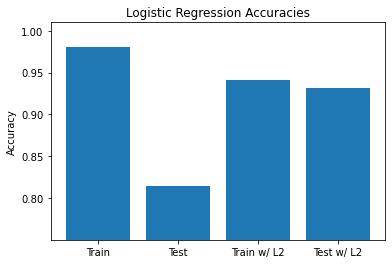

In [287]:
fig, ax = plt.subplots()
xs = np.array(list(range(4)))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1.01])
ax.set_yticks([0.8, 0.85, 0.9, 0.95, 1.0])
ax.set_title('Logistic Regression Accuracies')
ax.set_xticks(xs)
ax.set_xticklabels(['Train', 'Test', 'Train w/ L2', 'Test w/ L2'])
ax.bar(xs,[acc_train, acc_test, acc_train_l2, acc_test_l2])

<BarContainer object of 20 artists>

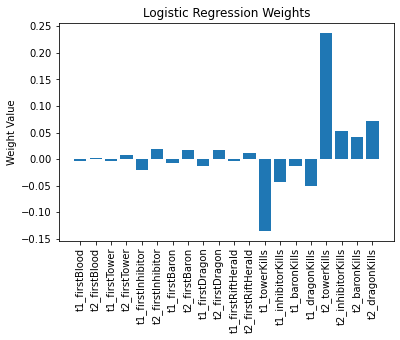

In [289]:
fig, ax = plt.subplots()
xs = np.array(list(range(len(objectives))))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weight Value')
ax.set_title('Logistic Regression Weights')
ax.set_xticks(xs)
ax.set_xticklabels(objectives,rotation = 90)
ax.bar(xs,np.squeeze(model_l2.coef_))
